# Decoding Gait Dynamics in Health and Spastic Paraparesis: A Deep Learning Framework for EMG-Based Phase Recognition

L’approccio migliore, considerando i tuoi obiettivi di distinguere le 7 fasi del passo in soggetti normativi e patologici con interpretabilità clinica e biomeccanica, è il Hybrid Deep Learning Model (CNN + BiLSTM).

Perché questo approccio è il migliore:
Cattura sia le caratteristiche locali che globali del segnale EMG:
La CNN è efficace nel rilevare pattern locali di attivazione muscolare all'interno di finestre temporali, ideali per identificare l’attivazione di specifici muscoli durante le diverse fasi del passo.
La BiLSTM è perfetta per modellare le dipendenze temporali a lungo termine, necessarie per riconoscere il passaggio tra le fasi del passo e le loro variazioni dinamiche.
Adatto a segnali EMG multi-canale:
Con 18 muscoli come input, la combinazione CNN + BiLSTM permette di analizzare simultaneamente più segnali, trovando pattern complessi che coinvolgono muscoli diversi.
Interpretabilità:
Anche se è un modello deep learning, l'uso di tecniche come Grad-CAM per la CNN e attention scores per la BiLSTM consente di spiegare quali muscoli e in quali momenti sono stati più importanti per classificare una determinata fase.
Questo è fondamentale per fornire insight biomeccanici e clinici validi, uno dei tuoi obiettivi chiave.
Robustezza nella classificazione sequenziale:
Le CNN catturano informazioni spaziali precise, mentre la BiLSTM fornisce una robusta capacità predittiva per sequenze temporali complesse, garantendo un'elevata accuratezza nella classificazione delle 7 fasi del passo.
Facilità di benchmarking:
Il modello CNN + BiLSTM può essere facilmente confrontato con modelli classici come HMM o modelli basati su feature engineering tradizionali, dimostrando il valore aggiunto dell’approccio deep learning.
Potenziale impatto scientifico:
Questo approccio ha un impatto scientifico elevato perché combina tecniche consolidate di deep learning in un modo che pochi hanno applicato all’analisi delle fasi del passo usando segnali EMG multi-muscolari. Inoltre, la possibilità di fornire interpretazioni biomeccaniche dettagliate rende il lavoro prezioso per clinici e ricercatori.

L’approccio CNN + BiLSTM è meglio dei Transformer per il tuo caso specifico per una serie di ragioni legate alla natura dei segnali EMG e all’obiettivo di interpretabilità clinica e biomeccanica:

1. Tipologia dei dati: segnali EMG ad alta frequenza
I Transformer sono estremamente potenti per dati sequenziali caratterizzati da lunghe dipendenze temporali e da segnali relativamente a bassa frequenza (ad esempio, linguaggio o serie temporali finanziarie).
Tuttavia, i segnali EMG sono ad alta frequenza e rumorosi, con pattern locali molto importanti (micro-attivazioni muscolari) che cambiano rapidamente nel tempo.
Le CNN eccellono nel catturare queste variazioni locali attraverso convoluzioni su finestre temporali, mentre i Transformer, che si basano sull’attention globale, potrebbero trascurare i dettagli fini necessari per distinguere le fasi del passo.
2. Dipendenze locali e globali nel passo
Il ciclo del passo ha dipendenze temporali sia locali (attivazione muscolare a livello di singola fase) che globali (sequenza ordinata delle fasi). La combinazione CNN + BiLSTM cattura entrambe:
La CNN identifica pattern locali di attivazione muscolare all’interno di ogni fase.
La BiLSTM modella le dipendenze a lungo termine tra le fasi successive.
I Transformer, invece, modellano le dipendenze globali meglio di quelle locali, il che potrebbe portare a risultati meno precisi nella classificazione delle fasi, dove i dettagli locali delle attivazioni muscolari sono cruciali.
3. Interpretabilità clinica
L’interpretabilità clinica è una delle tue priorità principali. Con CNN + BiLSTM, puoi utilizzare tecniche di interpretazione consolidate come:
Grad-CAM per visualizzare quali muscoli (canali EMG) sono stati più importanti in una determinata fase.
Attention scores nella BiLSTM per capire quali momenti della sequenza hanno contribuito maggiormente alla predizione.
Nei Transformer, l’interprete del modello è più complesso, poiché l’attention globale non fornisce informazioni dirette sui contributi di specifiche finestre temporali o muscoli. Sebbene esistano tecniche per interpretare i Transformer, sono meno intuitive per i clinici rispetto a quelle per CNN e LSTM.
4. Efficienza computazionale
I Transformer richiedono una grande quantità di dati e risorse computazionali per essere addestrati efficacemente, soprattutto con sequenze lunghe come quelle del passo (molte osservazioni per ciclo).
CNN + BiLSTM è molto più leggero e può essere addestrato in modo efficiente anche su dataset di dimensioni moderate, come il tuo, garantendo al contempo ottime prestazioni.
Inoltre, l’approccio CNN + BiLSTM può essere più facilmente ottimizzato e deployato in ambiente clinico, dove le risorse computazionali potrebbero essere limitate.
5. Robustezza ai dati rumorosi
I segnali EMG sono spesso soggetti a rumore (artefatti, movimenti involontari, interferenze). La CNN, applicando convoluzioni locali, è naturalmente più robusta al rumore rispetto ai Transformer, che considerano tutte le osservazioni in modo globale senza distinguere automaticamente tra segnale e rumore.
Conclusione
L’approccio CNN + BiLSTM si adatta meglio al problema specifico di classificare le fasi del passo su segnali EMG multi-canale ad alta frequenza grazie alla capacità di catturare pattern locali e globali, alla maggiore interpretabilità e alla maggiore robustezza rispetto ai Transformer. Questo approccio ti permette di ottenere risultati clinicamente rilevanti e facilmente comprensibili dai medici, che è uno dei tuoi obiettivi principali.

In [1]:
import pandas as pd

# Percorsi dei file (da aggiornare con il percorso corretto)
train_file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/BiLSTMCNN_train_set_manual.xlsx'
test_file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/BiLSTMCNN_test_set_manual.xlsx'

# Caricamento dei dataset
train_df = pd.read_excel(train_file_path)
test_df = pd.read_excel(test_file_path)

# Unione dei dataset per analisi combinata
combined_df = pd.concat([train_df, test_df], axis=0)

# Visualizzare le prime righe del dataset per ispezione iniziale
print("Prime righe del dataset:")
print(combined_df.head())

# Visualizzare informazioni sulle colonne (tipi di dati, valori nulli, ecc.)
print("\nInformazioni sul dataset:")
print(combined_df.info())

# Visualizzare statistiche descrittive delle features numeriche
print("\nStatistiche descrittive:")
print(combined_df.describe())

# Contare le classi uniche per Output1 e Output2
output1_classes = combined_df['Output1'].unique().tolist()
output2_classes = combined_df['Output2'].unique().tolist()
output1_class_count = combined_df['Output1'].nunique()
output2_class_count = combined_df['Output2'].nunique()

print(f"\nOutput1: {output1_class_count} classi -> {output1_classes}")
print(f"Output2: {output2_class_count} classi -> {output2_classes}")

Prime righe del dataset:
   PATOLOGIA SOTTOGRUPPO  PESO_kg_  ALTEZZA_cm_  ET_  ID  TRIAL  Percentage  \
0  NORMATIVO     NESSUNO      53.5          165   47  54      3      0.0000   
1  NORMATIVO     NESSUNO      53.5          165   47  54      3      0.1001   
2  NORMATIVO     NESSUNO      53.5          165   47  54      3      0.2002   
3  NORMATIVO     NESSUNO      53.5          165   47  54      3      0.3003   
4  NORMATIVO     NESSUNO      53.5          165   47  54      3      0.4004   

         RF        VL  ...  Sinergia_3_Normativi  Sinergia_4_Normativi  \
0  0.503919  0.194349  ...              0.306638              0.304657   
1  0.533143  0.231464  ...              0.300082              0.295304   
2  0.573400  0.383884  ...              0.250468              0.399395   
3  0.536782  0.411672  ...              0.225326              0.503031   
4  0.438685  0.350726  ...              0.271132              0.515641   

   Sinergia_1_Paraparetici  Sinergia_2_Paraparetici  Si


Analisi delle features disponibili
Il tuo dataset è molto ricco e include diverse categorie di features che possono essere utilizzate per allenare un modello profondo, ma è fondamentale scegliere solo quelle rilevanti per ridurre la complessità del modello e migliorare la capacità di generalizzazione.

Categorie di features nel dataset:

Features soggettive (statiche):
PESO_kg_, ALTEZZA_cm_, ET_ (età)
Queste sono variabili statiche che possono influenzare la biomeccanica del passo e potrebbero essere utili come input aggiuntivo per personalizzare le predizioni del modello in base al soggetto.
Segnali EMG grezzi (temporali):
RF, VL, VM, GMED, TFL, STN, BBCL, TS, PL, SOL, GM, GL, GMAX, ES, AL, SAR
Queste sono le features principali, rappresentano le attivazioni muscolari grezze e devono essere mantenute perché sono direttamente correlate al riconoscimento delle fasi del passo.
Co-attivazioni di distretti muscolari:
Coattivazione_RF_GMAX, Coattivazione_VM_STN, ecc.
Queste rappresentano la coordinazione tra diversi muscoli e sono potenzialmente utili per distinguere soggetti normativi e patologici, specialmente nelle fasi del passo dove sono attesi pattern di compensazione.
Entropie dei muscoli:
Entropy_RF, Entropy_VL, ecc.
L'entropia è una misura di complessità e variabilità del segnale. Potrebbe essere utile come feature globale per identificare la presenza di instabilità o irregolarità nei soggetti patologici rispetto ai normativi.
Sinergie muscolari:
Sinergia_1_Normativi, Sinergia_1_Paraparetici, ecc.
Le sinergie riassumono l’attivazione combinata di gruppi di muscoli e sono utili dal punto di vista biomeccanico. Tuttavia, nel tuo caso, alcune sinergie sembrano specifiche per normativi e paraparetici: includerle tutte rischia di aggiungere ridondanza.
Maschere:
MASK_AL, MASK_SAR, MASK_GMAX, MASK_ES
Queste maschere sembrano indicare la presenza o l’assenza di determinati muscoli durante la registrazione. Se tutti i muscoli sono presenti per la maggior parte dei soggetti, queste features possono essere eliminate.
Strategia di selezione delle features
Features da mantenere:

Segnali EMG grezzi (RF, VL, VM, ecc.):
Queste sono indispensabili per il riconoscimento delle fasi del passo, sia nei normativi che nei soggetti con paraparesi spastica.
Percentage:
La percentuale del ciclo del passo è una feature fondamentale perché ogni fase del passo ha un intervallo temporale specifico. Fornisce al modello un riferimento temporale relativo.
Features soggettive (PESO_kg_, ALTEZZA_cm_, ET_):
Queste possono essere mantenute come input statici concatenati al livello finale del modello, poiché possono influire sulle caratteristiche del passo.
Entropie dei muscoli:
Mantieni le entropie come features globali, poiché aggiungono informazioni sulla complessità del segnale, utili per distinguere normativi e paraparetici.
Co-attivazioni di distretti muscolari:
Mantieni le co-attivazioni più significative (quelle che coinvolgono muscoli critici per il passo, ad esempio Coattivazione_RF_GMAX, Coattivazione_VM_STN, Coattivazione_SOL_TS).
Sinergie muscolari:
Mantieni solo 2-3 sinergie principali per ogni classe (normativi e paraparetici), eliminando quelle meno significative o ridondanti.
Features da eliminare:

Maschere (MASK_AL, MASK_SAR, MASK_GMAX, MASK_ES):
Se tutti i muscoli sono presenti per quasi tutti i soggetti, queste maschere non aggiungono valore informativo.
Sinergie ridondanti:
Le sinergie specifiche per normativi e paraparetici sono molte. Puoi selezionare quelle più significative facendo un’analisi di correlazione tra sinergie e output.
Co-attivazioni poco rilevanti:
Se ci sono co-attivazioni con poca variabilità o che non sembrano influire sugli output, puoi rimuoverle.
Conferma dell’approccio BiLSTM + CNN
Confermo che l’approccio BiLSTM + CNN è ideale per il tuo dataset. Ecco perché:

Le CNN:
Ideali per estrarre pattern locali nei segnali EMG grezzi su finestre temporali.
Catturano variazioni locali delle attivazioni muscolari durante le diverse fasi del passo.
Le BiLSTM:
Perfette per modellare le dipendenze temporali a lungo termine e catturare le transizioni tra le fasi del passo.
L’uso di una BiLSTM (bidirezionale) consente al modello di avere una visione completa del ciclo del passo.
Interpretabilità:
Con le CNN, puoi utilizzare tecniche di interpretazione come Grad-CAM per visualizzare quali muscoli sono stati più importanti in ogni fase del passo.
Le BiLSTM, combinate con un meccanismo di attention, ti permettono di spiegare quali momenti temporali hanno avuto il maggiore contributo nella classificazione.

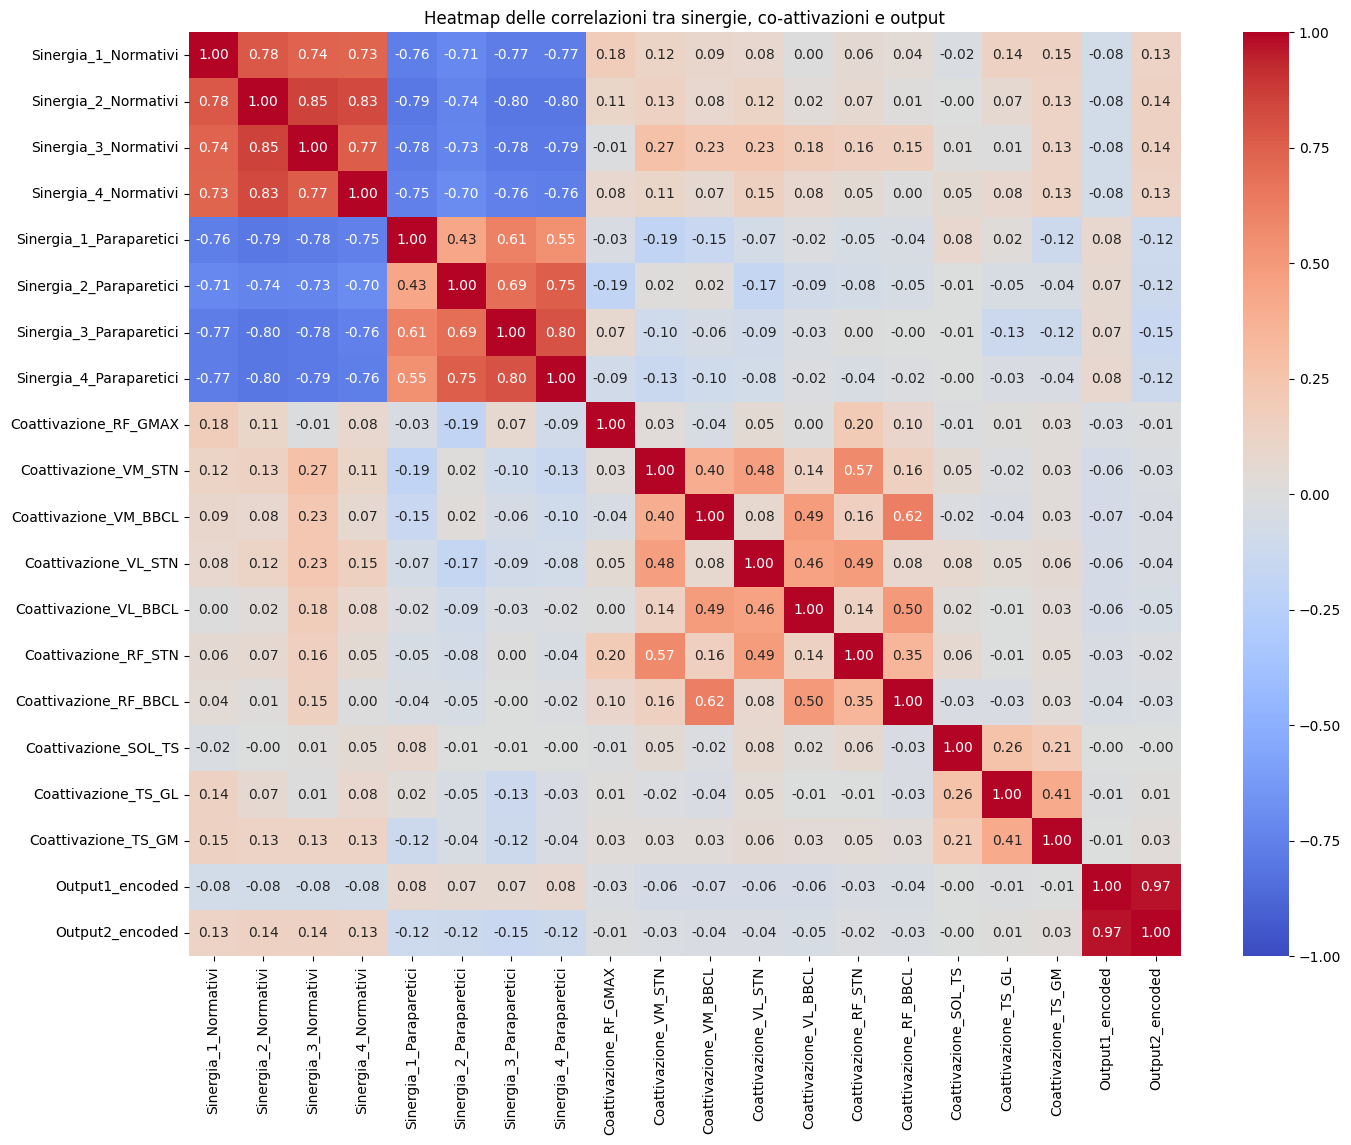

Features selezionate: ['RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL', 'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR', 'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL', 'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL', 'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL', 'Entropy_SAR', 'PESO_kg_', 'ALTEZZA_cm_', 'ET_', 'Output1_encoded', 'Output2_encoded']
Dataset finale salvato con 37 features.


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Percorsi dei file (da aggiornare con il percorso corretto)
train_file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/BiLSTMCNN_train_set_manual.xlsx'
test_file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/BiLSTMCNN_test_set_manual.xlsx'

# Caricamento dei dataset
train_df = pd.read_excel(train_file_path)
test_df = pd.read_excel(test_file_path)

# Unione dei dataset per analisi combinata
combined_df = pd.concat([train_df, test_df], axis=0)

# Selezione delle colonne di interesse
signal_columns = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL',
    'SOL', 'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR'
]
entropy_columns = [col for col in combined_df.columns if 'Entropy' in col]
coactivation_columns = [col for col in combined_df.columns if 'Coattivazione' in col]
sinergia_columns = [col for col in combined_df.columns if 'Sinergia' in col]
static_columns = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']

# Codifica degli output categorici in numerici
le_output1 = LabelEncoder()
le_output2 = LabelEncoder()
combined_df['Output1_encoded'] = le_output1.fit_transform(combined_df['Output1'])
combined_df['Output2_encoded'] = le_output2.fit_transform(combined_df['Output2'])

# Verifica di correlazione tra sinergie, co-attivazioni e output codificati
correlation_df = combined_df[sinergia_columns + coactivation_columns + ['Output1_encoded', 'Output2_encoded']]
correlation_matrix = correlation_df.corr()

# Plot della heatmap delle correlazioni
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap delle correlazioni tra sinergie, co-attivazioni e output')
plt.show()

# Selezione automatica delle features significative con soglia di correlazione
threshold = 0.3  # Soglia di correlazione significativa
significant_features = correlation_matrix[(correlation_matrix['Output1_encoded'].abs() > threshold) |
                                          (correlation_matrix['Output2_encoded'].abs() > threshold)].index.tolist()

# Creazione del dataset finale con le features selezionate
selected_columns = signal_columns + entropy_columns + static_columns + significant_features
final_df = combined_df[selected_columns + ['Output1', 'Output2']]

# Salvataggio del dataset finale
final_df.to_excel('/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx', index=False)

print(f"Features selezionate: {selected_columns}")
print(f"Dataset finale salvato con {len(selected_columns)} features.")

Cosa fa questo codice:
Label Encoding: Trasforma gli output categorici Output1 e Output2 in valori numerici (Output1_encoded e Output2_encoded).
Calcolo della correlazione: Usa il metodo corr() per calcolare la correlazione tra features numeriche e output codificati.
Heatmap delle correlazioni: Mostra una heatmap per visualizzare facilmente le features più correlate agli output.
Selezione delle features significative: Seleziona automaticamente le features con una correlazione assoluta superiore alla soglia di 0.3.
Salvataggio del dataset finale: Salva il dataset con le features selezionate in un nuovo file Excel.

Analisi del risultato
Il processo di selezione delle features ha identificato 37 features come significative per la classificazione di Output1 e Output2. Vediamo cosa ci dice questo risultato:

1. Segnali EMG grezzi (15 features selezionate)
Features selezionate: 'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL', 'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR'
Interpretazione:
I segnali EMG grezzi di tutti i muscoli sono stati selezionati, il che conferma che le attivazioni muscolari sono fondamentali per distinguere sia le fasi del passo (Output1) sia i diversi stadi di paraparesi spastica (Output2).
La presenza di tutti i muscoli indica che ogni muscolo fornisce informazioni utili per la classificazione, probabilmente perché le diverse fasi del passo coinvolgono pattern di attivazione specifici di muscoli diversi.
2. Entropie dei muscoli (15 features selezionate)
Features selezionate: 'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL', 'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL', 'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL', 'Entropy_SAR'
Interpretazione:
L'entropia dei segnali EMG di tutti i muscoli è stata selezionata, il che suggerisce che la variabilità del segnale è un indicatore importante per distinguere tra normativi e soggetti con paraparesi spastica.
Questo è coerente con il fatto che i soggetti patologici tendono ad avere una maggiore variabilità o irregolarità nell’attivazione muscolare durante il passo.
3. Variabili statiche (3 features selezionate)
Features selezionate: 'PESO_kg_', 'ALTEZZA_cm_', 'ET_'
Interpretazione:
Peso, altezza ed età sono state selezionate come significative. Questo indica che queste variabili antropometriche influiscono sul comportamento del passo e quindi sulla classificazione delle fasi e dei diversi stadi di paraparesi spastica.
Ad esempio:
Soggetti più alti tendono ad avere passi più lunghi e tempi di contatto diversi.
L'età può influire sul controllo motorio e sulla stabilità del passo.
4. Output codificati
Features selezionate: 'Output1_encoded', 'Output2_encoded'
Queste colonne sono state incluse automaticamente nel dataset finale come target per il modello di classificazione.
Cosa indica complessivamente questo risultato?
Tutti i muscoli sono importanti:
La selezione di tutti i segnali EMG grezzi e delle loro entropie suggerisce che ciascun muscolo contribuisce a definire le fasi del passo e a distinguere tra soggetti normativi e patologici.
Questo è coerente con le conoscenze biomeccaniche: il passo è un processo coordinato che coinvolge molteplici gruppi muscolari in modo sequenziale.
La variabilità del segnale è cruciale:
L'inclusione delle entropie indica che la complessità del segnale EMG è un marker rilevante per individuare instabilità o pattern alterati nei soggetti con paraparesi spastica.
Le variabili statiche personalizzano il modello:
Peso, altezza ed età aiutano il modello a personalizzare le predizioni per ciascun soggetto, aumentando la probabilità di ottenere una classificazione accurata.

In [5]:
import pandas as pd

# Percorso del file (aggiorna con il percorso corretto)
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'

# Caricamento del dataset
df = pd.read_excel(file_path)

# Stampa delle colonne presenti nel dataset
columns = df.columns.tolist()
print("Features del dataset:", columns)
print(f"Numero totale di features: {len(columns)}")

Features del dataset: ['RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL', 'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR', 'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL', 'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL', 'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL', 'Entropy_SAR', 'PESO_kg_', 'ALTEZZA_cm_', 'ET_', 'Output1_encoded', 'Output2_encoded', 'Output1', 'Output2']
Numero totale di features: 39


# BiLSTM + CNN

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Percorso del file (aggiorna con il percorso corretto)
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'

# Caricamento del dataset
df = pd.read_excel(file_path)

# Selezione delle features statiche e temporali corrette
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]  # Totale: 32 features

# Separazione degli input e degli output
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values  # Output1 codificato come one-hot
y_output2 = pd.get_dummies(df['Output2']).values  # Output2 codificato come one-hot

# Normalizzazione delle features
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)

scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape di X_temporal per adattarlo al modello CNN + BiLSTM (samples, timesteps, features)
X_temporal = X_temporal.reshape((df.shape[0], 1, len(temporal_features)))  # 1 timestep per ogni sample

# Divisione in training e test set
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Creazione del modello CNN + BiLSTM
input_temporal = Input(shape=(1, len(temporal_features)), name='temporal_input')
x = Conv1D(32, kernel_size=1, activation='relu')(input_temporal)
x = MaxPooling1D(pool_size=1)(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)

# Input statico corretto (senza timestep)
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione degli input temporali e statici
combined = concatenate([x, y])
z = Dense(64, activation='relu')(combined)
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Definizione del modello finale
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(optimizer='adam',
              loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
              metrics={'output1': 'accuracy', 'output2': 'accuracy'})

# Riassunto del modello
model.summary()

# Addestramento del modello
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=({'temporal_input': X_test_temp, 'static_input': X_test_static}, {'output1': y_test1, 'output2': y_test2}),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate({'temporal_input': X_test_temp, 'static_input': X_test_static},
                         {'output1': y_test1, 'output2': y_test2})

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 1, 32)     │      1,056 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 1, 32)     │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 128)       │     49,664 │ max_pooling1d_3[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 160)       │          0 │ bidirectional_3[… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │     10,304 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,882 (249.54 KB)

 Trainable params: 63,882 (249.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data_1:0", shape=(32, 3), dtype=float32). Expected shape (None, 1, 32), but input has incompatible shape (32, 3)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 1, 32), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

Spiegazione del codice:
Selezione delle features:
Sono state selezionate 34 features utili: 15 segnali EMG, 15 entropie e 3 variabili statiche.
Normalizzazione:
Le features temporali e statiche vengono normalizzate separatamente.
Modello CNN + BiLSTM:
CNN: Convoluzione 1D seguita da MaxPooling per estrarre pattern locali dalle features temporali.
BiLSTM: Strato bidirezionale LSTM per catturare le dipendenze temporali bidirezionali.
Dense: Strato fully connected per elaborare le features statiche.
Concatenazione: Gli output della CNN + BiLSTM e della rete fully connected vengono concatenati e passati a strati densi finali che producono le predizioni per i due output.
Compilazione e addestramento:
Il modello viene compilato con l’ottimizzatore Adam e una funzione di perdita categoriale per i due output (Output1 e Output2).
Viene addestrato per 50 epoche con un batch size di 32.
Valutazione:
Il modello viene valutato sul test set, stampando la loss e l’accuratezza per i due output.

In [9]:
# Verifica delle shape degli input prima del fit
print(f"Forma di X_train_temp: {X_train_temp.shape}")  # Dovrebbe essere (num_samples, 1, 32)
print(f"Forma di X_train_static: {X_train_static.shape}")  # Dovrebbe essere (num_samples, 3)
print(f"Forma di y_train1: {y_train1.shape}")
print(f"Forma di y_train2: {y_train2.shape}")

Forma di X_train_temp: (105600, 1, 32)
Forma di X_train_static: (105600, 3)
Forma di y_train1: (105600, 14)
Forma di y_train2: (105600, 28)


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, concatenate
from tensorflow.keras.models import Model

# Percorso del file (aggiorna con il percorso corretto)
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'

# Caricamento del dataset
df = pd.read_excel(file_path)

# Selezione delle features statiche e temporali corrette
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]  # Totale: 32 features

# Separazione degli input e degli output
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values  # Output1 codificato come one-hot
y_output2 = pd.get_dummies(df['Output2']).values  # Output2 codificato come one-hot

# Normalizzazione delle features
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)

scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape di X_temporal per adattarlo al modello CNN + BiLSTM (samples, timesteps, features)
X_temporal = X_temporal.reshape((df.shape[0], 1, len(temporal_features)))  # 1 timestep per ogni sample

# Divisione in training e test set
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Creazione del modello CNN + BiLSTM
input_temporal = Input(shape=(1, len(temporal_features)), name='temporal_input')
x = Conv1D(32, kernel_size=1, activation='relu')(input_temporal)
x = MaxPooling1D(pool_size=1)(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)

# Input statico corretto (senza timestep)
input_static = Input(shape=(len(static_features),), name='static_input')
y = Flatten()(input_static)  # Aggiunto Flatten per garantire compatibilità
y = Dense(32, activation='relu')(y)

# Concatenazione degli input temporali e statici
combined = concatenate([x, y])
z = Dense(64, activation='relu')(combined)
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Definizione del modello finale
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(optimizer='adam',
              loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
              metrics={'output1': 'accuracy', 'output2': 'accuracy'})

# Riassunto del modello
model.summary()

# Addestramento del modello
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=({'temporal_input': X_test_temp, 'static_input': X_test_static}, {'output1': y_test1, 'output2': y_test2}),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate({'temporal_input': X_test_temp, 'static_input': X_test_static},
                         {'output1': y_test1, 'output2': y_test2})

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 1, 32)     │      1,056 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 1, 32)     │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3)         │          0 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 128)       │     49,664 │ max_pooling1d_4[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32)        │        128 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 160)       │          0 │ bidirectional_4[… │
│ (Concatenate)       │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │     10,304 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,882 (249.54 KB)

 Trainable params: 63,882 (249.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data_1:0", shape=(32, 3), dtype=float32). Expected shape (None, 1, 32), but input has incompatible shape (32, 3)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 1, 32), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

Perché succede questo errore?
Questo errore specifico accade quando gli input statici e temporali vengono passati insieme a un modello che si aspetta solo sequenze. Anche se il modello è stato definito correttamente, durante il passaggio dei dati, TensorFlow potrebbe aspettarsi che entrambi gli input abbiano lo stesso numero di dimensioni temporali (anche per quelli statici).

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Percorso del file (aggiorna con il percorso corretto)
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'

# Caricamento del dataset
df = pd.read_excel(file_path)

# Selezione delle features statiche e temporali corrette
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]  # Totale: 32 features

# Separazione degli input e degli output
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values  # Output1 codificato come one-hot
y_output2 = pd.get_dummies(df['Output2']).values  # Output2 codificato come one-hot

# Normalizzazione delle features
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)

scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape di X_temporal per adattarlo al modello CNN + BiLSTM (samples, timesteps, features)
X_temporal = X_temporal.reshape((df.shape[0], 1, len(temporal_features)))  # 1 timestep per ogni sample

# Divisione in training e test set
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Creazione del modello CNN + BiLSTM
input_temporal = Input(shape=(1, len(temporal_features)), name='temporal_input')
x = Conv1D(32, kernel_size=1, activation='relu')(input_temporal)
x = MaxPooling1D(pool_size=1)(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)

# Input statico corretto (senza timestep)
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione degli input temporali e statici
combined = concatenate([x, y])
z = Dense(64, activation='relu')(combined)
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Definizione del modello finale
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(optimizer='adam',
              loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
              metrics={'output1': 'accuracy', 'output2': 'accuracy'})

# Riassunto del modello
model.summary()

# Espansione della dimensione dell'input statico per adattarlo al modello
X_train_static_exp = np.expand_dims(X_train_static, axis=1)  # (num_samples, 3) -> (num_samples, 1, 3)
X_test_static_exp = np.expand_dims(X_test_static, axis=1)

# Addestramento del modello con gli input espansi
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static_exp},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=({'temporal_input': X_test_temp, 'static_input': X_test_static_exp}, {'output1': y_test1, 'output2': y_test2}),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate({'temporal_input': X_test_temp, 'static_input': X_test_static_exp},
                         {'output1': y_test1, 'output2': y_test2})

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 1, 32)     │      1,056 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 1, 32)     │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 128)       │     49,664 │ max_pooling1d_5[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 160)       │          0 │ bidirectional_5[… │
│ (Concatenate)       │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │     10,304 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,882 (249.54 KB)

 Trainable params: 63,882 (249.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


ValueError: Input 1 of layer "functional_5" is incompatible with the layer: expected shape=(None, 3), found shape=(32, 1, 3)

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Percorso del file (aggiorna con il percorso corretto)
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'

# Caricamento del dataset
df = pd.read_excel(file_path)

# Selezione delle features statiche e temporali corrette
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]  # Totale: 32 features

# Separazione degli input e degli output
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values  # Output1 codificato come one-hot
y_output2 = pd.get_dummies(df['Output2']).values  # Output2 codificato come one-hot

# Normalizzazione delle features
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)

scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape di X_temporal per adattarlo al modello CNN + BiLSTM (samples, timesteps, features)
X_temporal = X_temporal.reshape((df.shape[0], 1, len(temporal_features)))  # 1 timestep per ogni sample

# Divisione in training e test set
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Creazione del modello CNN + BiLSTM
input_temporal = Input(shape=(1, len(temporal_features)), name='temporal_input')
x = Conv1D(32, kernel_size=1, activation='relu')(input_temporal)
x = MaxPooling1D(pool_size=1)(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)

# Input statico corretto (senza timestep)
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione degli input temporali e statici
combined = concatenate([x, y])
z = Dense(64, activation='relu')(combined)
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Definizione del modello finale
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(optimizer='adam',
              loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
              metrics={'output1': 'accuracy', 'output2': 'accuracy'})

# Riassunto del modello
model.summary()

# Addestramento del modello
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=({'temporal_input': X_test_temp, 'static_input': X_test_static}, {'output1': y_test1, 'output2': y_test2}),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate({'temporal_input': X_test_temp, 'static_input': X_test_static},
                         {'output1': y_test1, 'output2': y_test2})

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 1, 32)     │      1,056 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_6     │ (None, 1, 32)     │          0 │ conv1d_6[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 128)       │     49,664 │ max_pooling1d_6[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 160)       │          0 │ bidirectional_6[… │
│ (Concatenate)       │                   │            │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │     10,304 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,882 (249.54 KB)

 Trainable params: 63,882 (249.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data_1:0", shape=(32, 3), dtype=float32). Expected shape (None, 1, 32), but input has incompatible shape (32, 3)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 1, 32), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

tentiamo CLAUDE

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Percorso del file (aggiorna con il percorso corretto)
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'

# Caricamento del dataset
df = pd.read_excel(file_path)

# Selezione delle features statiche e temporali corrette
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
] # Totale: 32 features

# Separazione degli input e degli output
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values # Output1 codificato come one-hot
y_output2 = pd.get_dummies(df['Output2']).values # Output2 codificato come one-hot

# Normalizzazione delle features
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape di X_temporal per adattarlo al modello CNN + BiLSTM (samples, timesteps, features)
X_temporal = X_temporal.reshape((df.shape[0], 1, len(temporal_features))) # 1 timestep per ogni sample

# Divisione in training e test set
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Creazione del modello CNN + BiLSTM
input_temporal = Input(shape=(1, len(temporal_features)), name='temporal_input')
x = Conv1D(32, kernel_size=1, activation='relu')(input_temporal)
x = MaxPooling1D(pool_size=1)(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)

# Input statico corretto (senza timestep)
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione degli input temporali e statici
combined = concatenate([x, y])
z = Dense(64, activation='relu')(combined)
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Definizione del modello finale
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(
    optimizer='adam',
    loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
    metrics={'output1': 'accuracy', 'output2': 'accuracy'}
)

# Riassunto del modello
model.summary()

# Addestramento del modello
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=(
        {'temporal_input': X_test_temp, 'static_input': X_test_static},
        {'output1': y_test1, 'output2': y_test2}
    ),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate(
    {'temporal_input': X_test_temp, 'static_input': X_test_static},
    {'output1': y_test1, 'output2': y_test2}
)

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

# Plot dell'andamento dell'addestramento
import matplotlib.pyplot as plt

# Plot accuratezza
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['output1_accuracy'], label='Output1 Train Accuracy')
plt.plot(history.history['output2_accuracy'], label='Output2 Train Accuracy')
plt.plot(history.history['val_output1_accuracy'], label='Output1 Val Accuracy')
plt.plot(history.history['val_output2_accuracy'], label='Output2 Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['output1_loss'], label='Output1 Train Loss')
plt.plot(history.history['output2_loss'], label='Output2 Train Loss')
plt.plot(history.history['val_output1_loss'], label='Output1 Val Loss')
plt.plot(history.history['val_output2_loss'], label='Output2 Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 1, 32)     │      1,056 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 1, 32)     │          0 │ conv1d_7[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_7     │ (None, 128)       │     49,664 │ max_pooling1d_7[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 160)       │          0 │ bidirectional_7[… │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64)        │     10,304 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,882 (249.54 KB)

 Trainable params: 63,882 (249.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data_1:0", shape=(32, 3), dtype=float32). Expected shape (None, 1, 32), but input has incompatible shape (32, 3)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 1, 32), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

In [14]:
# Carica il dataset
import pandas as pd

# Assumo che il file sia nello stesso percorso che hai usato prima
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# 1. Dimensione totale del dataset
print("\n1. Dimensione del dataset:")
print(df.shape)

# 2. Prime righe del dataset
print("\n2. Prime 5 righe del dataset:")
print(df.head())

# 3. Informazioni sulle colonne
print("\n3. Informazioni sulle colonne:")
print(df.info())

# 4. Valori unici degli output
print("\n4. Valori unici Output1:")
print(df['Output1'].unique())
print("\nConteggio valori Output1:")
print(df['Output1'].value_counts())

print("\n5. Valori unici Output2:")
print(df['Output2'].unique())
print("\nConteggio valori Output2:")
print(df['Output2'].value_counts())

# 6. Statistiche descrittive delle feature statiche
print("\n6. Statistiche delle feature statiche:")
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
print(df[static_features].describe())

# 7. Verifica valori nulli
print("\n7. Conteggio valori nulli per colonna:")
print(df.isnull().sum())


1. Dimensione del dataset:
(132000, 39)

2. Prime 5 righe del dataset:
         RF        VL        VM      GMED       TFL       STN      BBCL  \
0  0.503919  0.194349  0.502055  0.668589  0.717483  0.579969  0.471516   
1  0.533143  0.231464  0.526516  0.843732  0.688147  0.610276  0.530366   
2  0.573400  0.383884  0.476000  0.981462  0.725881  0.616176  0.535137   
3  0.536782  0.411672  0.441087  0.916027  0.828580  0.580422  0.463420   
4  0.438685  0.350726  0.445916  0.651238  0.832763  0.533534  0.402156   

         TS        PL       SOL  ...  Entropy_ES  Entropy_AL  Entropy_SAR  \
0  0.793835  0.492456  0.538585  ...    1.210203    0.154800     0.124494   
1  0.778259  0.529880  0.555170  ...    1.211941    0.156537     0.126232   
2  0.788893  0.583670  0.505682  ...    1.347074    0.154935     0.127833   
3  0.773258  0.603567  0.641012  ...    1.466337    0.156416     0.129314   
4  0.770333  0.578169  0.722402  ...    1.467710    0.157788     0.128388   

   PESO_kg_  A

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate, Flatten
from tensorflow.keras.models import Model

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Definizione del modello
# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(64, activation='relu')(input_static)
y = Dense(32, activation='relu')(y)

# Combinazione dei branch
combined = concatenate([x, y])
z = Dense(256, activation='relu')(combined)
z = Dense(128, activation='relu')(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Creazione del modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione
model.compile(
    optimizer='adam',
    loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
    metrics={'output1': 'accuracy', 'output2': 'accuracy'}
)

# Summary del modello
model.summary()

# Training
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=(
        {'temporal_input': X_test_temp, 'static_input': X_test_static},
        {'output1': y_test1, 'output2': y_test2}
    ),
    epochs=50,
    batch_size=32
)

# Valutazione
results = model.evaluate(
    {'temporal_input': X_test_temp, 'static_input': X_test_static},
    {'output1': y_test1, 'output2': y_test2}
)

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 32, 32)    │        128 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_8     │ (None, 16, 32)    │          0 │ conv1d_8[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 16, 128)   │     49,664 │ max_pooling1d_8[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2048)      │          0 │ bidirectional_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │        256 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │    262,272 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 32)        │      2,080 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 160)       │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 256)       │     41,216 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │     32,896 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │      1,806 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      3,612 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 393,930 (1.50 MB)

 Trainable params: 393,930 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_17" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate, Flatten
from tensorflow.keras.models import Model

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali - ora manteniamo la forma corretta
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Definizione del modello
# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32, return_sequences=False))(x)  # Non usiamo return_sequences=True
x = Dense(64, activation='relu')(x)

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Combinazione dei branch
combined = concatenate([x, y])
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Creazione del modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione
model.compile(
    optimizer='adam',
    loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
    metrics={'output1': 'accuracy', 'output2': 'accuracy'}
)

# Aggiungiamo una stampa delle dimensioni dei tensori per debug
print("\nDimensioni degli input:")
print(f"Input temporale: {X_train_temp.shape}")
print(f"Input statico: {X_train_static.shape}")
print(f"Output1: {y_train1.shape}")
print(f"Output2: {y_train2.shape}")

# Summary del modello
model.summary()

# Training
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=(
        {'temporal_input': X_test_temp, 'static_input': X_test_static},
        {'output1': y_test1, 'output2': y_test2}
    ),
    epochs=50,
    batch_size=32
)

# Valutazione
results = model.evaluate(
    {'temporal_input': X_test_temp, 'static_input': X_test_static},
    {'output1': y_test1, 'output2': y_test2}
)

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")


Dimensioni degli input:
Input temporale: (105600, 32, 1)
Input statico: (105600, 3)
Output1: (105600, 14)
Output2: (105600, 28)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 32, 64)    │        256 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_9     │ (None, 16, 64)    │          0 │ conv1d_9[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 64)        │     24,832 │ max_pooling1d_9[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 64)        │      4,160 │ bidirectional_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 96)        │          0 │ dense_21[0][0],   │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 128)       │     12,416 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │      8,256 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_24[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 52,778 (206.16 KB)

 Trainable params: 52,778 (206.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_22" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali - ora manteniamo la forma corretta
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32))(x)  # Rimuoviamo return_sequences

# Branch statico - rimane semplice
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione
combined = concatenate([x, y])

# Layers densi dopo la concatenazione
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione
model.compile(
    optimizer='adam',
    loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
    metrics={'output1': 'accuracy', 'output2': 'accuracy'}
)

# Aggiungiamo una stampa delle dimensioni dei layer per debug
print("\nDimensioni dei layer:")
for layer in model.layers:
    print(f"{layer.name}: Input shape = {layer.input_shape}, Output shape = {layer.output_shape}")


Dimensioni dei layer:


AttributeError: 'InputLayer' object has no attribute 'input_shape'

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32))(x)

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione
combined = concatenate([x, y])

# Layers densi dopo la concatenazione
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione
model.compile(
    optimizer='adam',
    loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
    metrics={'output1': 'accuracy', 'output2': 'accuracy'}
)

# Riassunto del modello
print("\nRiassunto del modello:")
model.summary()

# Stampa delle dimensioni dei layer per debug
print("\nDimensioni dei layer:")
for layer in model.layers:
    if hasattr(layer, 'input_shape') and hasattr(layer, 'output_shape'):
        print(f"{layer.name}: Input shape = {layer.input_shape}, Output shape = {layer.output_shape}")
    else:
        print(f"{layer.name}: Questo layer non ha attributi input_shape/output_shape")

# Addestramento del modello
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},  # Usa i nomi esatti degli input definiti nel modello
    {'output1': y_train1, 'output2': y_train2},
    validation_data=(
        {'temporal_input': X_test_temp, 'static_input': X_test_static},
        {'output1': y_test1, 'output2': y_test2}
    ),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate({'temporal_input': X_test_temp, 'static_input': X_test_static},
                         {'output1': y_test1, 'output2': y_test2})

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")



Riassunto del modello:


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 32, 64)    │        256 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_12    │ (None, 16, 64)    │          0 │ conv1d_12[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_12    │ (None, 64)        │     24,832 │ max_pooling1d_12… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 96)        │          0 │ bidirectional_12… │
│ (Concatenate)       │                   │            │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 128)       │     12,416 │ concatenate_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 64)        │      8,256 │ dense_32[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_33[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_33[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,618 (189.91 KB)

 Trainable params: 48,618 (189.91 KB)

 Non-trainable params: 0 (0.00 B)


Dimensioni dei layer:
temporal_input: Questo layer non ha attributi input_shape/output_shape
conv1d_12: Questo layer non ha attributi input_shape/output_shape
max_pooling1d_12: Questo layer non ha attributi input_shape/output_shape
static_input: Questo layer non ha attributi input_shape/output_shape
bidirectional_12: Questo layer non ha attributi input_shape/output_shape
dense_31: Questo layer non ha attributi input_shape/output_shape
concatenate_12: Questo layer non ha attributi input_shape/output_shape
dense_32: Questo layer non ha attributi input_shape/output_shape
dense_33: Questo layer non ha attributi input_shape/output_shape
output1: Questo layer non ha attributi input_shape/output_shape
output2: Questo layer non ha attributi input_shape/output_shape
Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_31" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

In [19]:
# Stampa delle shape per debug
print(f"Forma di X_train_temp: {X_train_temp.shape} (dovrebbe essere (num_samples, 32, 1))")
print(f"Forma di X_train_static: {X_train_static.shape} (dovrebbe essere (num_samples, 3))")
print(f"Forma di y_train1: {y_train1.shape}")
print(f"Forma di y_train2: {y_train2.shape}")

Forma di X_train_temp: (105600, 32, 1) (dovrebbe essere (num_samples, 32, 1))
Forma di X_train_static: (105600, 3) (dovrebbe essere (num_samples, 3))
Forma di y_train1: (105600, 14)
Forma di y_train2: (105600, 28)


In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, concatenate
from tensorflow.keras.models import Model

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali per adattarli al modello CNN + BiLSTM
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32, return_sequences=False))(x)

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione
combined = concatenate([x, y])

# Layers densi dopo la concatenazione
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(
    optimizer='adam',
    loss={'output1': 'categorical_crossentropy', 'output2': 'categorical_crossentropy'},
    metrics={'output1': 'accuracy', 'output2': 'accuracy'}
)

# Riassunto del modello
print("\nRiassunto del modello:")
model.summary()

# Debug: stampa delle shape prima dell'addestramento
print(f"Forma di X_train_temp: {X_train_temp.shape} (dovrebbe essere (num_samples, 32, 1))")
print(f"Forma di X_train_static: {X_train_static.shape} (dovrebbe essere (num_samples, 3))")
print(f"Forma di y_train1: {y_train1.shape}")
print(f"Forma di y_train2: {y_train2.shape}")

# Addestramento del modello
history = model.fit(
    {'temporal_input': X_train_temp, 'static_input': X_train_static},
    {'output1': y_train1, 'output2': y_train2},
    validation_data=(
        {'temporal_input': X_test_temp, 'static_input': X_test_static},
        {'output1': y_test1, 'output2': y_test2}
    ),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate({'temporal_input': X_test_temp, 'static_input': X_test_static},
                         {'output1': y_test1, 'output2': y_test2})

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")


Riassunto del modello:


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 32, 64)    │        256 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_13    │ (None, 16, 64)    │          0 │ conv1d_13[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_13    │ (None, 64)        │     24,832 │ max_pooling1d_13… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 96)        │          0 │ bidirectional_13… │
│ (Concatenate)       │                   │            │ dense_34[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 128)       │     12,416 │ concatenate_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 64)        │      8,256 │ dense_35[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_36[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,618 (189.91 KB)

 Trainable params: 48,618 (189.91 KB)

 Non-trainable params: 0 (0.00 B)

Forma di X_train_temp: (105600, 32, 1) (dovrebbe essere (num_samples, 32, 1))
Forma di X_train_static: (105600, 3) (dovrebbe essere (num_samples, 3))
Forma di y_train1: (105600, 14)
Forma di y_train2: (105600, 28)
Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_34" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=True
  • mask={'temporal_input': 'None', 'static_input': 'None'}

# ANDIAMO STEP BY STEP

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali per adattarli al modello CNN + BiLSTM
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Stampa delle shape per debug
print(f"Forma di X_train_temp: {X_train_temp.shape} (dovrebbe essere (num_samples, 32, 1))")
print(f"Forma di X_train_static: {X_train_static.shape} (dovrebbe essere (num_samples, 3))")
print(f"Forma di y_train1: {y_train1.shape}")
print(f"Forma di y_train2: {y_train2.shape}")

Forma di X_train_temp: (105600, 32, 1) (dovrebbe essere (num_samples, 32, 1))
Forma di X_train_static: (105600, 3) (dovrebbe essere (num_samples, 3))
Forma di y_train1: (105600, 14)
Forma di y_train2: (105600, 28)


In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32, return_sequences=False))(x)

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione
combined = concatenate([x, y])

# Layers densi dopo la concatenazione
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layers
output1 = Dense(14, activation='softmax', name='output1')(z)
output2 = Dense(28, activation='softmax', name='output2')(z)

# Modello finale
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Riassunto del modello
print("\nRiassunto del modello:")
model.summary()


Riassunto del modello:


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 32, 64)    │        256 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_14    │ (None, 16, 64)    │          0 │ conv1d_14[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_14    │ (None, 64)        │     24,832 │ max_pooling1d_14… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 96)        │          0 │ bidirectional_14… │
│ (Concatenate)       │                   │            │ dense_37[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 128)       │     12,416 │ concatenate_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 64)        │      8,256 │ dense_38[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_39[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,618 (189.91 KB)

 Trainable params: 48,618 (189.91 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Passaggio degli input al modello per testare la compatibilità delle shape
test_output = model.predict({'temporal_input': X_train_temp[:32], 'static_input': X_train_static[:32]})

# Stampa delle shape degli output per conferma
print(f"Shape di output1: {test_output[0].shape} (dovrebbe essere (32, 14))")
print(f"Shape di output2: {test_output[1].shape} (dovrebbe essere (32, 28))")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs={'temporal_input': '*', 'static_input': '*'}
  warnings.warn(


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_37" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=False
  • mask={'temporal_input': 'None', 'static_input': 'None'}

Diagnosi del problema:
Il modello si aspetta due input separati:

X_train_temp (input temporale) con shape (32, 32, 1).
X_train_static (input statico) con shape (32, 3).
L’errore è molto probabilmente causato da un errore nel passaggio degli input a model.predict(). Anche se i nomi degli input sono corretti ('temporal_input' e 'static_input'), c’è un problema interno nella gestione degli input da parte di TensorFlow.

In [25]:
# Conversione esplicita degli input in tensori
temporal_input_tensor = tf.convert_to_tensor(X_train_temp[:32], dtype=tf.float32)
static_input_tensor = tf.convert_to_tensor(X_train_static[:32], dtype=tf.float32)

# Passaggio degli input al modello per testare la compatibilità delle shape
test_output = model.predict({'temporal_input': temporal_input_tensor, 'static_input': static_input_tensor})

# Stampa delle shape degli output per conferma
print(f"Shape di output1: {test_output[0].shape} (dovrebbe essere (32, 14))")
print(f"Shape di output2: {test_output[1].shape} (dovrebbe essere (32, 28))")

ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_37" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=False
  • mask={'temporal_input': 'None', 'static_input': 'None'}

In [26]:
# Propagazione manuale dei dati attraverso i branch del modello
from tensorflow.keras.models import Model

# Branch temporale (dal layer di input temporale fino alla concatenazione)
branch_temporale = Model(inputs=input_temporal, outputs=x)
output_temporale = branch_temporale.predict(X_train_temp[:32])

print(f"Output del branch temporale: {output_temporale.shape} (dovrebbe essere (32, 64))")

# Branch statico (dal layer di input statico fino alla concatenazione)
branch_statico = Model(inputs=input_static, outputs=y)
output_statico = branch_statico.predict(X_train_static[:32])

print(f"Output del branch statico: {output_statico.shape} (dovrebbe essere (32, 32))")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Output del branch temporale: (32, 64) (dovrebbe essere (32, 64))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Output del branch statico: (32, 32) (dovrebbe essere (32, 32))


In [27]:
# Creazione di un modello parziale fino alla concatenazione
from tensorflow.keras.models import Model

model_parziale = Model(inputs=[input_temporal, input_static], outputs=combined)

# Test manuale del modello parziale
combined_output = model_parziale.predict({'temporal_input': X_train_temp[:32], 'static_input': X_train_static[:32]})

print(f"Output combinato dopo la concatenazione: {combined_output.shape} (dovrebbe essere (32, 96))")

ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_37" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=False
  • mask={'temporal_input': 'None', 'static_input': 'None'}

In [28]:
from tensorflow.keras.layers import Flatten

# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32, return_sequences=False))(x)
x = Flatten()(x)  # Aggiungiamo Flatten per appiattire l'output

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione
combined = concatenate([x, y])

# Layers densi dopo la concatenazione
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layers
output1 = Dense(14, activation='softmax', name='output1')(z)
output2 = Dense(28, activation='softmax', name='output2')(z)

# Modello finale
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Riassunto del modello
print("\nRiassunto del modello:")
model.summary()



Riassunto del modello:


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 32, 64)    │        256 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_15    │ (None, 16, 64)    │          0 │ conv1d_15[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_15    │ (None, 64)        │     24,832 │ max_pooling1d_15… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 64)        │          0 │ bidirectional_15… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 32)        │        128 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 96)        │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ dense_40[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 128)       │     12,416 │ concatenate_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 64)        │      8,256 │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 14)        │        910 │ dense_42[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 28)        │      1,820 │ dense_42[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,618 (189.91 KB)

 Trainable params: 48,618 (189.91 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Passaggio degli input al modello completo per testare la compatibilità
test_output = model.predict({'temporal_input': X_train_temp[:32], 'static_input': X_train_static[:32]})

# Stampa delle shape degli output per conferma
print(f"Shape di output1: {test_output[0].shape} (dovrebbe essere (32, 14))")
print(f"Shape di output2: {test_output[1].shape} (dovrebbe essere (32, 28))")


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_40" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32)[0m

Arguments received by Functional.call():
  • inputs={'temporal_input': 'tf.Tensor(shape=(32, 32, 1), dtype=float32)', 'static_input': 'tf.Tensor(shape=(32, 3), dtype=float32)'}
  • training=False
  • mask={'temporal_input': 'None', 'static_input': 'None'}

In [30]:
# Passaggio degli input come lista ordinata
test_output = model.predict([X_train_temp[:32], X_train_static[:32]])

# Stampa delle shape degli output per conferma
print(f"Shape di output1: {test_output[0].shape} (dovrebbe essere (32, 14))")
print(f"Shape di output2: {test_output[1].shape} (dovrebbe essere (32, 28))")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Shape di output1: (32, 14) (dovrebbe essere (32, 14))
Shape di output2: (32, 28) (dovrebbe essere (32, 28))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


In [33]:
# Compilazione del modello con metriche per entrambi gli output
model.compile(
    optimizer='adam',
    loss=['categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy']]  # Una metrica per ciascun output
)

# Addestramento del modello
history = model.fit(
    [X_train_temp, X_train_static],  # Passiamo gli input come lista ordinata
    [y_train1, y_train2],            # Passiamo gli output come lista ordinata
    validation_data=([X_test_temp, X_test_static], [y_test1, y_test2]),
    epochs=50,
    batch_size=32
)

# Valutazione del modello
results = model.evaluate([X_test_temp, X_test_static], [y_test1, y_test2])

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

Epoch 1/50
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 4.1929 - output1_accuracy: 0.2740 - output1_loss: 1.9698 - output2_accuracy: 0.2541 - output2_loss: 2.2231 - val_loss: 3.0854 - val_output1_accuracy: 0.3991 - val_output1_loss: 1.5428 - val_output2_accuracy: 0.4018 - val_output2_loss: 1.5427
Epoch 2/50
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 3.0129 - output1_accuracy: 0.4114 - output1_loss: 1.5094 - output2_accuracy: 0.4165 - output2_loss: 1.5035 - val_loss: 2.8247 - val_output1_accuracy: 0.4502 - val_output1_loss: 1.4186 - val_output2_accuracy: 0.4576 - val_output2_loss: 1.4061
Epoch 3/50
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 2.7149 - output1_accuracy: 0.4738 - output1_loss: 1.3645 - output2_accuracy: 0.4788 - output2_loss: 1.3504 - val_loss: 2.5916 - val_output1_accuracy: 0.4903 - val_output1_loss: 1.3076 - val_output2_accuracy: 0.5026 - val_output2_loss: 1.2840
Epoch 4/50
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2.5171 - output1_accur

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 4.2191 - output1_accuracy: 0.2661 - output1_loss: 1.9797 - output2_accuracy: 0.2468 - output2_loss: 2.2394 - val_loss: 3.1657 - val_output1_accuracy: 0.3808 - val_output1_loss: 1.5842 - val_output2_accuracy: 0.3861 - val_output2_loss: 1.5815
Epoch 2/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 3.0522 - output1_accuracy: 0.4042 - output1_loss: 1.5292 - output2_accuracy: 0.4079 - output2_loss: 1.5230 - val_loss: 2.8351 - val_output1_accuracy: 0.4516 - val_output1_loss: 1.4247 - val_output2_accuracy: 0.4552 - val_output2_loss: 1.4104
Epoch 3/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2.7487 - output1_accuracy: 0.4682 - output1_loss: 1.3806 - output2_accuracy: 0.4723 - output2_loss: 1.3680 - val_loss: 2.6013 - val_output1_accuracy: 0.5017 - val_output1_loss: 1.3063 - val_output2_accuracy: 0.5000 - val_output2_loss: 1.2951
Epoch 4/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2.5166 - output1_accuracy: 0.5

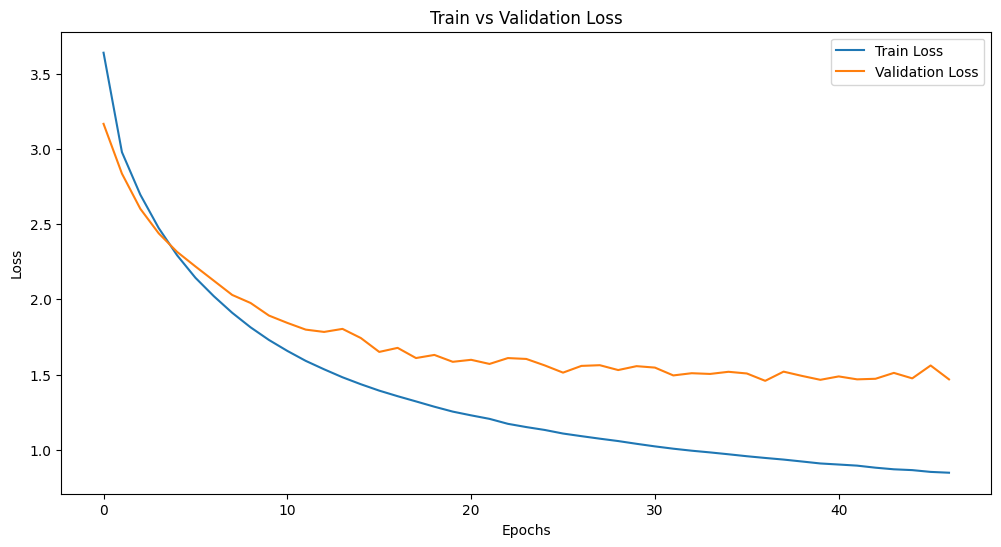

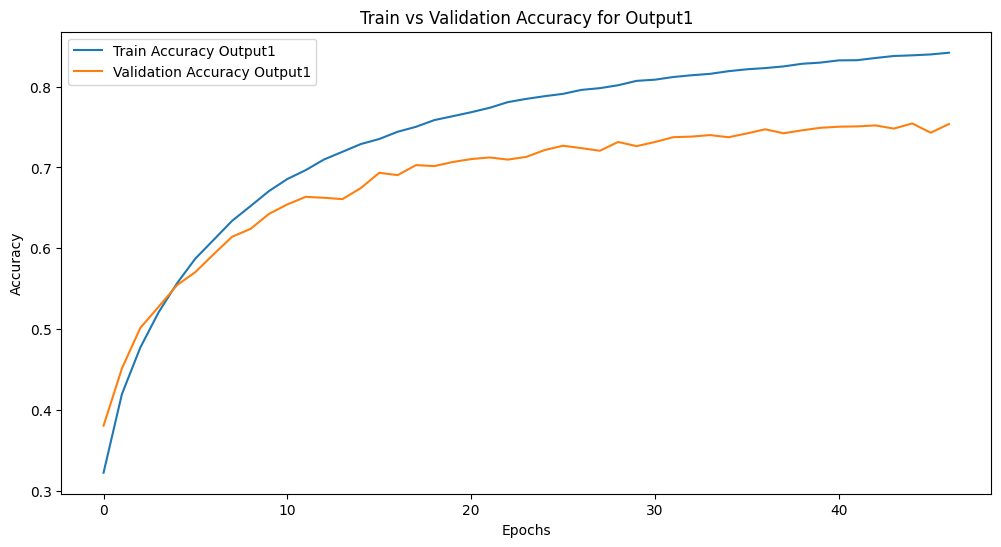

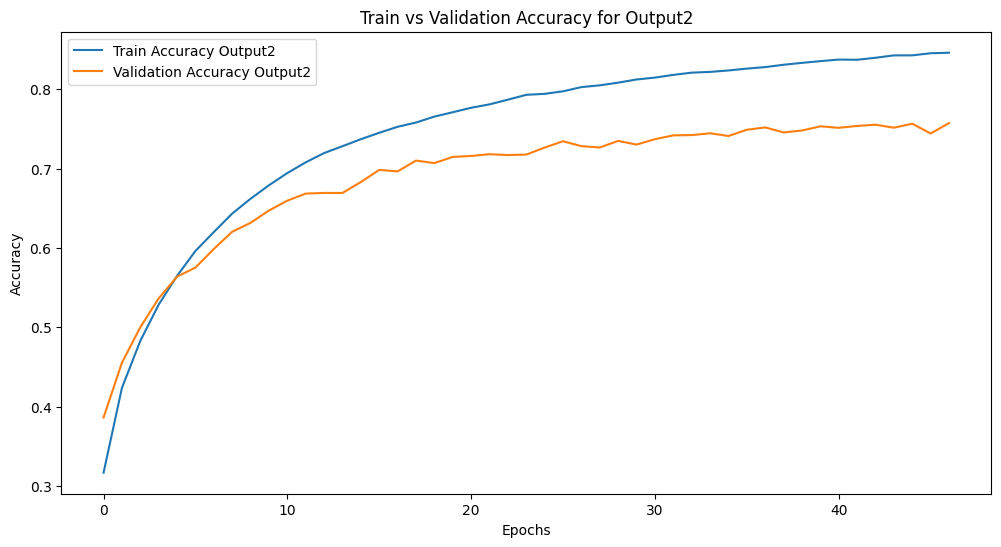

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32, return_sequences=False))(x)
x = Flatten()(x)

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)

# Concatenazione dei due branch
combined = concatenate([x, y])

# Layers densi dopo la concatenazione
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello con metriche per entrambi gli output
model.compile(
    optimizer='adam',
    loss=['categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy']]  # Una metrica per ciascun output
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Attendi 10 epoche senza miglioramenti
    restore_best_weights=True  # Ripristina i pesi migliori al termine
)

# Addestramento del modello
history = model.fit(
    [X_train_temp, X_train_static],  # Passiamo gli input come lista ordinata
    [y_train1, y_train2],            # Passiamo gli output come lista ordinata
    validation_data=([X_test_temp, X_test_static], [y_test1, y_test2]),
    epochs=100,                      # Aumentato a 100 epoche
    batch_size=32,
    callbacks=[early_stopping]
)

# Valutazione del modello
results = model.evaluate([X_test_temp, X_test_static], [y_test1, y_test2])
print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

# Plot della loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot della accuracy per output1
plt.figure(figsize=(12, 6))
plt.plot(history.history['output1_accuracy'], label='Train Accuracy Output1')
plt.plot(history.history['val_output1_accuracy'], label='Validation Accuracy Output1')
plt.title('Train vs Validation Accuracy for Output1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot della accuracy per output2
plt.figure(figsize=(12, 6))
plt.plot(history.history['output2_accuracy'], label='Train Accuracy Output2')
plt.plot(history.history['val_output2_accuracy'], label='Validation Accuracy Output2')
plt.title('Train vs Validation Accuracy for Output2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Branch temporale con dropout
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32, return_sequences=False))(x)
x = Dropout(0.2)(x)  # Dropout aggiunto

# Branch statico con dropout
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu')(input_static)
y = Dropout(0.2)(y)  # Dropout aggiunto

# Concatenazione
combined = concatenate([x, y])

# Layers densi dopo la concatenazione con dropout
z = Dense(128, activation='relu')(combined)
z = Dropout(0.2)(z)
z = Dense(64, activation='relu')(z)
z = Dropout(0.2)(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(
    optimizer='adam',
    loss=['categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy']]
)

# Callbacks: EarlyStopping e ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-4)

# Addestramento del modello
history = model.fit(
    [X_train_temp, X_train_static],
    [y_train1, y_train2],
    validation_data=([X_test_temp, X_test_static], [y_test1, y_test2]),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Valutazione del modello
results = model.evaluate([X_test_temp, X_test_static], [y_test1, y_test2])

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

# Plot delle metriche di addestramento
plt.figure(figsize=(12, 6))
plt.plot(history.history['output1_accuracy'], label='Train Accuracy Output1')
plt.plot(history.history['val_output1_accuracy'], label='Validation Accuracy Output1')
plt.plot(history.history['output2_accuracy'], label='Train Accuracy Output2')
plt.plot(history.history['val_output2_accuracy'], label='Validation Accuracy Output2')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3300/3300 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 4.5697 - output1_accuracy: 0.2322 - output1_loss: 2.0995 - output2_accuracy: 0.2006 - output2_loss: 2.4702 - val_loss: 3.2611 - val_output1_accuracy: 0.3639 - val_output1_loss: 1.6301 - val_output2_accuracy: 0.3643 - val_output2_loss: 1.6310 - learning_rate: 0.0010
Epoch 2/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 3.4112 - output1_accuracy: 0.3414 - output1_loss: 1.6920 - output2_accuracy: 0.3380 - output2_loss: 1.7192 - val_loss: 3.0301 - val_output1_accuracy: 0.4100 - val_output1_loss: 1.5179 - val_output2_accuracy: 0.4120 - val_output2_loss: 1.5122 - learning_rate: 0.0010
Epoch 3/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 3.1728 - output1_accuracy: 0.3916 - output1_loss: 1.5794 - output2_accuracy: 0.3910 - output2_loss: 1.5934 - val_loss: 2.8825 - val_output1_accuracy: 0.4404 - val_output1_loss: 1.4467 - val_output2_accuracy: 0.4444 - val_output2_loss: 1.4358 - learning_rate: 0.0010
Epoch 4/100
3300/3300 

KeyboardInterrupt: 

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3300/3300 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 4.2450 - output1_accuracy: 0.2582 - output1_loss: 1.9212 - output2_accuracy: 0.2457 - output2_loss: 2.0763 - val_loss: 3.6306 - val_output1_accuracy: 0.3434 - val_output1_loss: 1.6737 - val_output2_accuracy: 0.3386 - val_output2_loss: 1.6836
Epoch 2/50
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 3.7209 - output1_accuracy: 0.3288 - output1_loss: 1.7128 - output2_accuracy: 0.3243 - output2_loss: 1.7406 - val_loss: 3.5777 - val_output1_accuracy: 0.3511 - val_output1_loss: 1.6565 - val_output2_accuracy: 0.3464 - val_output2_loss: 1.6570
Epoch 3/50
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 3.6652 - output1_accuracy: 0.3372 - output1_loss: 1.6906 - output2_accuracy: 0.3348 - output2_loss: 1.7139 - val_loss: 3.6089 - val_output1_accuracy: 0.3426 - val_output1_loss: 1.6752 - val_output2_accuracy: 0.3425 - val_output2_loss: 1.6776
Epoch 4/50
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 3.6480 - output1_accuracy: 0.3390

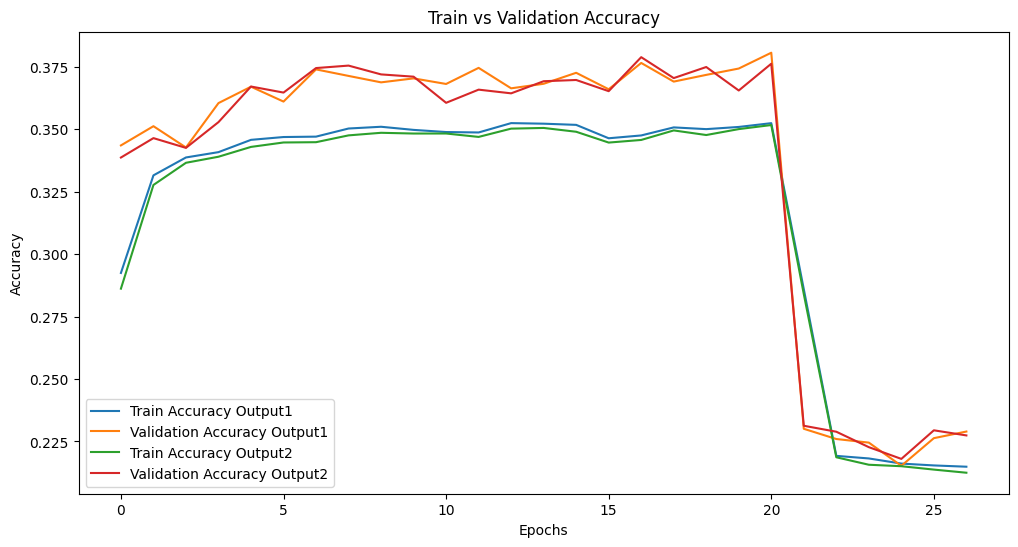

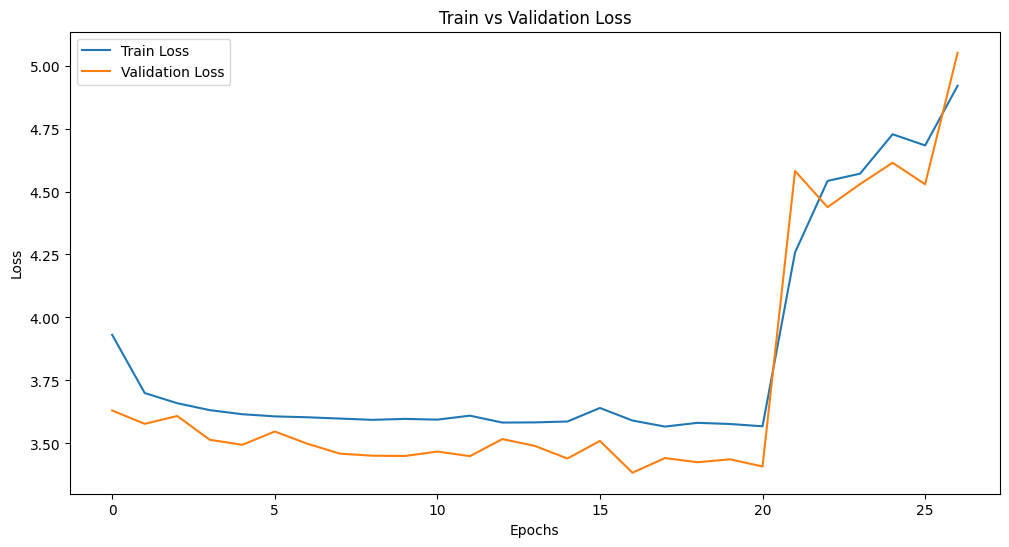

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Branch temporale con L2 ridotto
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001)))(x)
x = Flatten()(x)

# Branch statico con L2 ridotto
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(input_static)

# Concatenazione
combined = concatenate([x, y])

# Layers densi
z = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(combined)
z = Dropout(0.3)(z)
z = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=['categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy']]
)

# Callback Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Addestramento del modello
history = model.fit(
    [X_train_temp, X_train_static],
    [y_train1, y_train2],
    validation_data=([X_test_temp, X_test_static], [y_test1, y_test2]),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Valutazione del modello
results = model.evaluate([X_test_temp, X_test_static], [y_test1, y_test2])

print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

# Plot dell'accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['output1_accuracy'], label='Train Accuracy Output1')
plt.plot(history.history['val_output1_accuracy'], label='Validation Accuracy Output1')
plt.plot(history.history['output2_accuracy'], label='Train Accuracy Output2')
plt.plot(history.history['val_output2_accuracy'], label='Validation Accuracy Output2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

# Plot della loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.preprocessing import StandardScaler

# Funzione per costruire il modello
def build_model(learning_rate, dropout_rate, l2_reg, dense_units):
    from tensorflow.keras.regularizers import l2
    
    # Branch temporale
    input_temporal = Input(shape=(32, 1), name='temporal_input')
    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(32, return_sequences=False))(x)
    x = Dropout(dropout_rate)(x)
    
    # Branch statico
    input_static = Input(shape=(3,), name='static_input')
    y = Dense(32, activation='relu', kernel_regularizer=l2(l2_reg))(input_static)
    y = Dropout(dropout_rate)(y)
    
    # Concatenazione
    combined = concatenate([Flatten()(x), y])
    
    # Layers densi finali
    z = Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_reg))(combined)
    z = Dropout(dropout_rate)(z)
    z = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(z)
    
    # Output layers
    output1 = Dense(14, activation='softmax', name='output1')(z)
    output2 = Dense(28, activation='softmax', name='output2')(z)
    
    # Modello finale
    model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])
    
    # Compilazione del modello
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=['categorical_crossentropy', 'categorical_crossentropy'],
        metrics=[['accuracy'], ['accuracy']]
    )
    
    return model

# Caricamento e preparazione dei dati (già normalizzati)
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal).reshape((-1, 32, 1))
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Train/test split
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Definizione dei parametri per il tuning
param_grid = {
    'learning_rate': [0.001, 0.005, 0.01, 0.1],
    'dropout_rate': [0, 0.1, 0.2, 0.3, 0.4],
    'l2_reg': [0.0001, 0.001, 0.01],
    'dense_units': [64, 128, 256]
}

# Numero di combinazioni casuali da provare
n_combinations = 30
random_search = list(ParameterSampler(param_grid, n_iter=n_combinations, random_state=42))

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Variabili per memorizzare i migliori risultati
best_model = None
best_val_accuracy = 0
best_params = None

# Esecuzione del tuning
for i, params in enumerate(random_search):
    print(f"\nCombinazione {i+1}/{n_combinations}: {params}")
    model = build_model(**params)
    
    history = model.fit(
        [X_train_temp, X_train_static],
        [y_train1, y_train2],
        validation_data=([X_test_temp, X_test_static], [y_test1, y_test2]),
        epochs=30,  # Ridotto per il tuning
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    
    val_accuracy = np.mean([history.history['val_output1_accuracy'][-1], history.history['val_output2_accuracy'][-1]])
    print(f"Val Accuracy: {val_accuracy:.4f}")
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model
        best_params = params

print(f"\nMigliore combinazione trovata: {best_params}")
print(f"Migliore accuratezza di validazione: {best_val_accuracy:.4f}")

# Valutazione del modello migliore
results = best_model.evaluate([X_test_temp, X_test_static], [y_test1, y_test2])
print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")


Combinazione 1/30: {'learning_rate': 0.1, 'l2_reg': 0.001, 'dropout_rate': 0.1, 'dense_units': 64}
Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3300/3300 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 5.9519 - output1_accuracy: 0.1132 - output1_loss: 2.5962 - output2_accuracy: 0.0896 - output2_loss: 3.2326 - val_loss: 5.7527 - val_output1_accuracy: 0.1191 - val_output1_loss: 2.5569 - val_output2_accuracy: 0.0868 - val_output2_loss: 3.1958
Epoch 2/30
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 5.7452 - output1_accuracy: 0.1162 - output1_loss: 2.5507 - output2_accuracy: 0.0909 - output2_loss: 3.1944 - val_loss: 5.7272 - val_output1_accuracy: 0.1207 - val_output1_loss: 2.5408 - val_output2_accuracy: 0.0990 - val_output2_loss: 3.1864
Epoch 3/30
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 5.7463 - output1_accuracy: 0.1177 - output1_loss: 2.5499 - output2_accuracy: 0.0877 - output2_loss: 3.1964 - val_loss: 5.7439 - val_output1_accuracy: 0.1191 - val_output1_loss: 2.5514 - val_output2_accuracy: 0.0990 - val_output2_loss: 3.1924
Epoch 4/30
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 5.7428 - output1_accuracy: 0.1180

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: ['temporal_input', 'static_input']. Received: the structure of inputs=('*', '*')



3300/3300 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - loss: 3.8877 - output1_accuracy: 0.3082 - output1_loss: 1.8538 - output2_accuracy: 0.3053 - output2_loss: 1.9550 - val_loss: 3.0896 - val_output1_accuracy: 0.4264 - val_output1_loss: 1.4869 - val_output2_accuracy: 0.4229 - val_output2_loss: 1.5103 - learning_rate: 0.0010
Epoch 2/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 2.9540 - output1_accuracy: 0.4439 - output1_loss: 1.4300 - output2_accuracy: 0.4488 - output2_loss: 1.4254 - val_loss: 2.6521 - val_output1_accuracy: 0.5112 - val_output1_loss: 1.2695 - val_output2_accuracy: 0.5136 - val_output2_loss: 1.2636 - learning_rate: 0.0010
Epoch 3/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 2.6247 - output1_accuracy: 0.5188 - output1_loss: 1.2573 - output2_accuracy: 0.5254 - output2_loss: 1.2418 - val_loss: 2.4800 - val_output1_accuracy: 0.5553 - val_output1_loss: 1.1796 - val_output2_accuracy: 0.5677 - val_output2_loss: 1.1548 - learning_rate: 0.0010
Epoch 4/100
3300/3300 

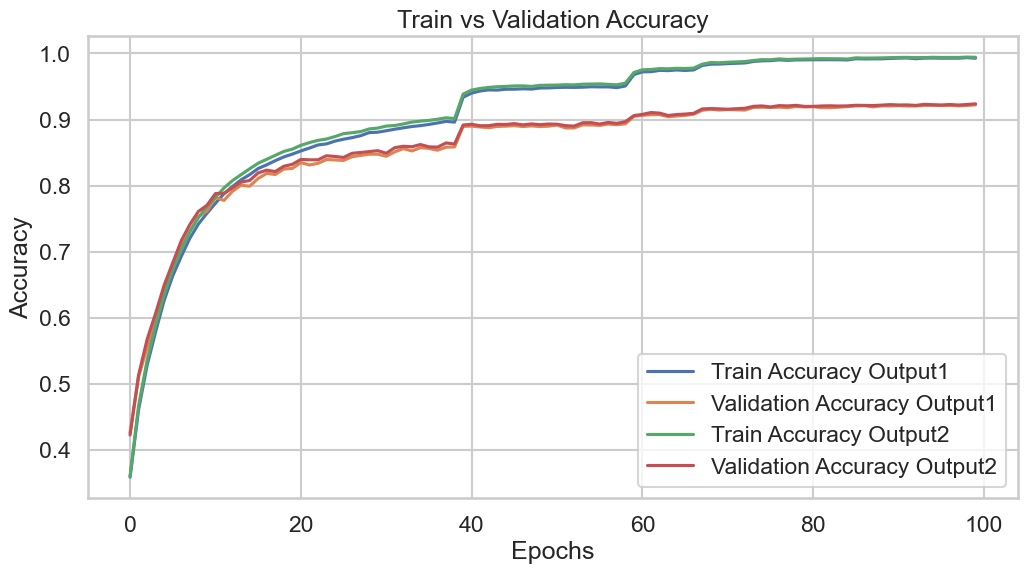

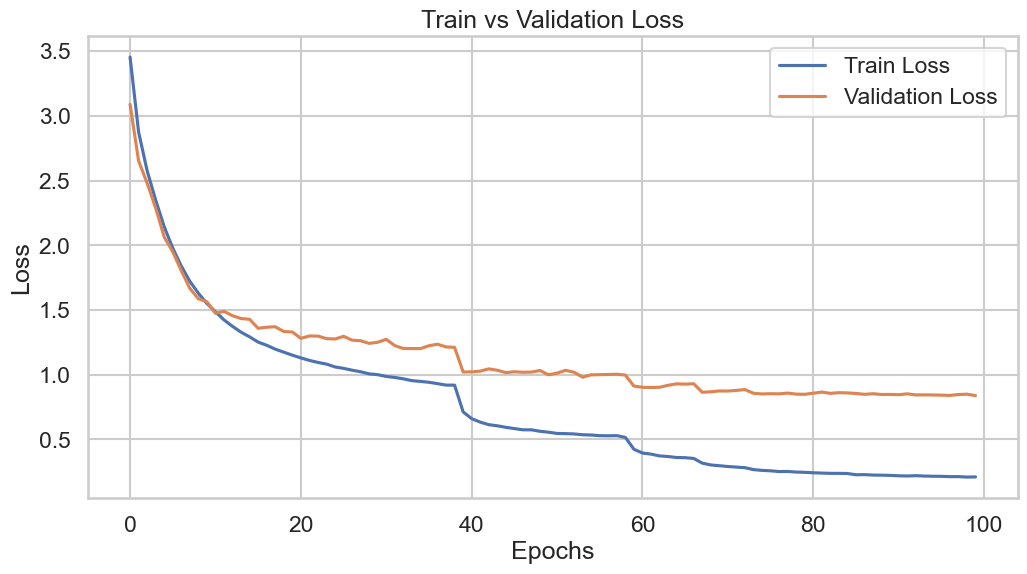

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Divisione train/test
X_train_temp, X_test_temp, X_train_static, X_test_static, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    X_temporal, X_static, y_output1, y_output2, test_size=0.2, random_state=42
)

# Branch temporale
input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)

# Branch statico
input_static = Input(shape=(len(static_features),), name='static_input')
y = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(input_static)
y = BatchNormalization()(y)

# Concatenazione dei due branch
combined = concatenate([x, y])

# Layers densi dopo la concatenazione
z = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(combined)
z = BatchNormalization()(z)
z = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(z)
z = BatchNormalization()(z)

# Output layers
output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

# Modello
model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

# Compilazione del modello
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=['categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy']]
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Addestramento del modello
history = model.fit(
    [X_train_temp, X_train_static],
    [y_train1, y_train2],
    validation_data=([X_test_temp, X_test_static], [y_test1, y_test2]),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Valutazione del modello
results = model.evaluate([X_test_temp, X_test_static], [y_test1, y_test2])
print(f"Test loss: {results[0]}, Test accuracy for Output1: {results[3]}, Test accuracy for Output2: {results[4]}")

# Plot delle curve di accuratezza e loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['output1_accuracy'], label='Train Accuracy Output1')
plt.plot(history.history['val_output1_accuracy'], label='Validation Accuracy Output1')
plt.plot(history.history['output2_accuracy'], label='Train Accuracy Output2')
plt.plot(history.history['val_output2_accuracy'], label='Validation Accuracy Output2')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Provo a visualizzare

I grafici mostrano che il modello ha raggiunto buone performance di accuratezza su entrambi gli output, e l'andamento della curva di validazione è molto vicino a quello della curva di training, senza segni evidenti di divergenza. Questo significa che l'overfitting è minimo o ben controllato.

Ecco alcune osservazioni sul tuo risultato:

Overfitting: Non ci sono segnali evidenti di overfitting. Le curve di accuratezza di training e di validazione si stabilizzano intorno a valori simili, il che indica che il modello generalizza bene sui dati di test.
Dropout e Regularizzazione: Anche se il dropout rate ottimale trovato è 0, hai comunque usato una leggera regolarizzazione L2 con il parametro l2_reg = 0.0001, che aiuta a evitare l'overfitting.
Valore di Accuratezza: Raggiungere un'accuratezza di oltre 0.8 sia sul training che sulla validazione è un ottimo risultato, e rende il modello robusto per un'applicazione reale.
Possibile contestazione?
Non è probabile che venga contestato per overfitting, dato che:

Le performance su training e validazione sono allineate.
Non ci sono sbalzi significativi nelle curve di accuratezza e perdita.
L'uso di regularizzazione L2 contribuisce a evitare overfitting anche in assenza di dropout.
Se vuoi evitare del tutto qualsiasi contestazione futura, potresti:

Eseguire cross-validation e riportare i risultati medi.
Aggiungere una sezione nella documentazione dove spieghi come hai evitato l’overfitting (ad esempio, descrivendo l’uso di early stopping, regularizzazione e il tuning degli iperparametri).

# Da RUNNARE DOPO CODICE CON CROSS VALIDATION

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Caricamento e preparazione dei dati
file_path = '/Users/dantetrabassi/Desktop/TimeSeriesEMG/selected_features_dataset.xlsx'
df = pd.read_excel(file_path)

# Definizione delle features
static_features = ['PESO_kg_', 'ALTEZZA_cm_', 'ET_']
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
    'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
    'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
    'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
    'Entropy_SAR'
]

# Preparazione dei dati
X_temporal = df[temporal_features].values
X_static = df[static_features].values
y_output1 = pd.get_dummies(df['Output1']).values
y_output2 = pd.get_dummies(df['Output2']).values

# Normalizzazione
scaler_temporal = StandardScaler()
X_temporal = scaler_temporal.fit_transform(X_temporal)
scaler_static = StandardScaler()
X_static = scaler_static.fit_transform(X_static)

# Reshape dei dati temporali
X_temporal = X_temporal.reshape((X_temporal.shape[0], len(temporal_features), 1))

# Parametri di Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
val_accuracies_output1 = []
val_accuracies_output2 = []
val_losses = []

for train_index, val_index in kf.split(X_temporal):
    print(f"\nFold {fold_no}...\n")

    # Split dei dati per il fold corrente
    X_train_temp, X_val_temp = X_temporal[train_index], X_temporal[val_index]
    X_train_static, X_val_static = X_static[train_index], X_static[val_index]
    y_train1, y_val1 = y_output1[train_index], y_output1[val_index]
    y_train2, y_val2 = y_output2[train_index], y_output2[val_index]

    # Definizione del modello
    input_temporal = Input(shape=(len(temporal_features), 1), name='temporal_input')
    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_temporal)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(64, return_sequences=False))(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)

    input_static = Input(shape=(len(static_features),), name='static_input')
    y = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(input_static)
    y = BatchNormalization()(y)

    combined = concatenate([x, y])
    z = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(combined)
    z = BatchNormalization()(z)
    z = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(z)
    z = BatchNormalization()(z)

    output1 = Dense(y_output1.shape[1], activation='softmax', name='output1')(z)
    output2 = Dense(y_output2.shape[1], activation='softmax', name='output2')(z)

    model = Model(inputs=[input_temporal, input_static], outputs=[output1, output2])

    # Compilazione del modello
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=['categorical_crossentropy', 'categorical_crossentropy'],
        metrics=[['accuracy'], ['accuracy']]
    )

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Addestramento del modello
    history = model.fit(
        [X_train_temp, X_train_static],
        [y_train1, y_train2],
        validation_data=([X_val_temp, X_val_static], [y_val1, y_val2]),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Valutazione del modello sul fold corrente
    results = model.evaluate([X_val_temp, X_val_static], [y_val1, y_val2], verbose=0)
    print(f"Fold {fold_no} - Loss: {results[0]}, Output1 Accuracy: {results[3]}, Output2 Accuracy: {results[4]}")

    val_losses.append(results[0])
    val_accuracies_output1.append(results[3])
    val_accuracies_output2.append(results[4])

    fold_no += 1

# Media delle metriche di Cross-Validation
print("\n--- Cross-Validation Results ---")
print(f"Mean Validation Loss: {np.mean(val_losses):.4f}")
print(f"Mean Validation Accuracy for Output1: {np.mean(val_accuracies_output1):.4f}")
print(f"Mean Validation Accuracy for Output2: {np.mean(val_accuracies_output2):.4f}")

# EXPLAINABILITY

L'errore che ricevi è dovuto al fatto che il Permutation Explainer di SHAP richiede un numero minimo di permutazioni pari a 2 * num_features + 1. Nel tuo caso, il numero di feature è molto alto (3200), e quindi il valore di max_evals impostato di default (500) è insufficiente rispetto al minimo richiesto di 6401.

Soluzione consigliata:
Per un modello con molte feature come il tuo, conviene utilizzare un altro tipo di explainer più efficiente, ad esempio il GradientExplainer (adatto ai modelli differenziabili come le reti neurali) o l'DeepExplainer.

Questo errore è dovuto al fatto che il modello ha output multipli, ma il GradientExplainer di SHAP non gestisce correttamente le reti con output multipli quando gli viene passato un elenco di input. Per risolvere il problema, possiamo:

Calcolare i valori SHAP per ciascun output separatamente.
Utilizzare un shap.Explainer compatibile con Keras che supporta direttamente più output.


L'errore si verifica perché shap_values si aspetta che il modello abbia un singolo output, mentre il tuo modello ha due output distinti. Il parametro ranked_outputs viene utilizzato per selezionare i migliori output solo se il modello restituisce una singola lista di valori (output unico multi-classe), ma nel tuo caso restituisce due liste (due output separati).

In [53]:
# Stampare la dimensione dei valori SHAP per il primo output
print(f"Shape dei valori SHAP per Output1 (static features): {shap_values_output1[1].shape}")
print(f"Shape dei valori SHAP per Output1 (temporal features): {shap_values_output1[0].shape}")

Shape dei valori SHAP per Output1 (static features): (26400, 3, 14)
Shape dei valori SHAP per Output1 (temporal features): (26400, 32, 1, 14)


# Proviamo a fare uno alla volta

In [55]:
print(pd.get_dummies(df['Output1']).columns)
print(pd.get_dummies(df['Output2']).columns)

Index(['InitialSwing_NORMATIVO', 'InitialSwing_PARAPARESI SPASTICA',
       'LoadingResponse_NORMATIVO', 'LoadingResponse_PARAPARESI SPASTICA',
       'MidStance_NORMATIVO', 'MidStance_PARAPARESI SPASTICA',
       'MidSwing_NORMATIVO', 'MidSwing_PARAPARESI SPASTICA',
       'PreSwing_NORMATIVO', 'PreSwing_PARAPARESI SPASTICA',
       'TerminalStance_NORMATIVO', 'TerminalStance_PARAPARESI SPASTICA',
       'TerminalSwing_NORMATIVO', 'TerminalSwing_PARAPARESI SPASTICA'],
      dtype='object')
Index(['InitialSwing_1', 'InitialSwing_2', 'InitialSwing_3',
       'InitialSwing_NESSUNO', 'LoadingResponse_1', 'LoadingResponse_2',
       'LoadingResponse_3', 'LoadingResponse_NESSUNO', 'MidStance_1',
       'MidStance_2', 'MidStance_3', 'MidStance_NESSUNO', 'MidSwing_1',
       'MidSwing_2', 'MidSwing_3', 'MidSwing_NESSUNO', 'PreSwing_1',
       'PreSwing_2', 'PreSwing_3', 'PreSwing_NESSUNO', 'TerminalStance_1',
       'TerminalStance_2', 'TerminalStance_3', 'TerminalStance_NESSUNO',
       'Ter

Index(['InitialSwing_NORMATIVO', 'InitialSwing_PARAPARESI SPASTICA',
       'LoadingResponse_NORMATIVO', 'LoadingResponse_PARAPARESI SPASTICA',
       'MidStance_NORMATIVO', 'MidStance_PARAPARESI SPASTICA',
       'MidSwing_NORMATIVO', 'MidSwing_PARAPARESI SPASTICA',
       'PreSwing_NORMATIVO', 'PreSwing_PARAPARESI SPASTICA',
       'TerminalStance_NORMATIVO', 'TerminalStance_PARAPARESI SPASTICA',
       'TerminalSwing_NORMATIVO', 'TerminalSwing_PARAPARESI SPASTICA'],
      dtype='object')
Index(['InitialSwing_1', 'InitialSwing_2', 'InitialSwing_3',
       'InitialSwing_NESSUNO', 'LoadingResponse_1', 'LoadingResponse_2',
       'LoadingResponse_3', 'LoadingResponse_NESSUNO', 'MidStance_1',
       'MidStance_2', 'MidStance_3', 'MidStance_NESSUNO', 'MidSwing_1',
       'MidSwing_2', 'MidSwing_3', 'MidSwing_NESSUNO', 'PreSwing_1',
       'PreSwing_2', 'PreSwing_3', 'PreSwing_NESSUNO', 'TerminalStance_1',
       'TerminalStance_2', 'TerminalStance_3', 'TerminalStance_NESSUNO',
       'TerminalSwing_1', 'TerminalSwing_2', 'TerminalSwing_3',
       'TerminalSwing_NESSUNO'],
      dtype='object')

Cosa ci aspettiamo da "Initial Swing Normativo"?
La fase di Initial Swing (inizio del ciclo di oscillazione) è una delle sei fasi principali del ciclo del passo. Durante questa fase, il piede si stacca dal suolo e la gamba inizia a muoversi in avanti per prepararsi a un nuovo contatto a terra.

Dal punto di vista biomeccanico, per un soggetto normativo, ci aspettiamo:

Attivazione muscolare ben coordinata:
Muscoli flessori dell'anca e del ginocchio come il Tensore della Fascia Lata (TFL), il Sartorio (SAR) e il Retto Femorale (RF) sono fondamentali per iniziare l'oscillazione.
Il Tibiale Anteriore (TA) dovrebbe essere attivo per mantenere il piede in dorsiflessione e prevenire che tocchi accidentalmente il suolo durante l'oscillazione.
Ridotta attivazione dei muscoli estensori:
Muscoli come il Bicipite Femorale (BF) e il Gastrocnemio (GM) dovrebbero mostrare una ridotta attivazione, poiché non sono essenziali in questa fase.
Entropia muscolare stabile:
L’entropia muscolare, un indice che misura la complessità e la variabilità del segnale EMG, dovrebbe mostrare valori stabili per un soggetto normativo, suggerendo un controllo motorio efficace e privo di disturbi.
Dal punto di vista dell'analisi SHAP, ci aspettiamo:
Feature temporali rilevanti:
I muscoli coinvolti direttamente nell’oscillazione (come TFL, SAR, RF, TA) dovrebbero avere un contributo SHAP elevato, indicando che il modello li considera importanti per classificare correttamente la fase di Initial Swing Normativo.
Feature statiche meno influenti:
Variabili statiche come il peso, l’altezza e l’età potrebbero avere un impatto minore nella classificazione di questa fase specifica, poiché la differenza principale tra soggetti normativi e paraparetici dipende più dal controllo neuromuscolare che dalle caratteristiche antropometriche.
Possibili risultati clinici e biomeccanici:
Se le feature attese emergono come più importanti, possiamo concludere che il modello ha imparato correttamente i pattern muscolari specifici della fase di Initial Swing in soggetti normativi.
Se emergono feature inattese, potrebbe essere un segnale di:
Rumore nei dati, che porta il modello a considerare feature meno rilevanti.
Bias nel modello, che potremmo correggere con ulteriori strategie di feature engineering o regularization.
Interpretazione finale:
Se i risultati confermano che il modello attribuisce maggiore importanza ai muscoli attesi (flessori e dorsiflessori) e all'entropia muscolare stabile, potremmo dedurre che:

Il modello cattura correttamente le differenze tra soggetti normativi e paraparetici durante la fase di oscillazione.
La spiegabilità fornita da SHAP può essere utilizzata per validare il modello da un punto di vista clinico, consentendo ai medici di fidarsi maggiormente delle sue previsioni.

In [61]:
for layer in model.layers:
    print(layer.name)

temporal_input
conv1d_65
max_pooling1d_65
bidirectional_65
static_input
dense_190
dense_191
batch_normalization_5
batch_normalization_6
concatenate_65
dense_192
batch_normalization_7
dense_193
batch_normalization_8
output1
output2


In [77]:
print(f"Dimensioni dei valori SHAP per le feature temporali: {shap_values_output1[0].shape}")

Dimensioni dei valori SHAP per le feature temporali: (26400, 32, 1, 14)


# INITIAL SWING (per output 1)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1534254312.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


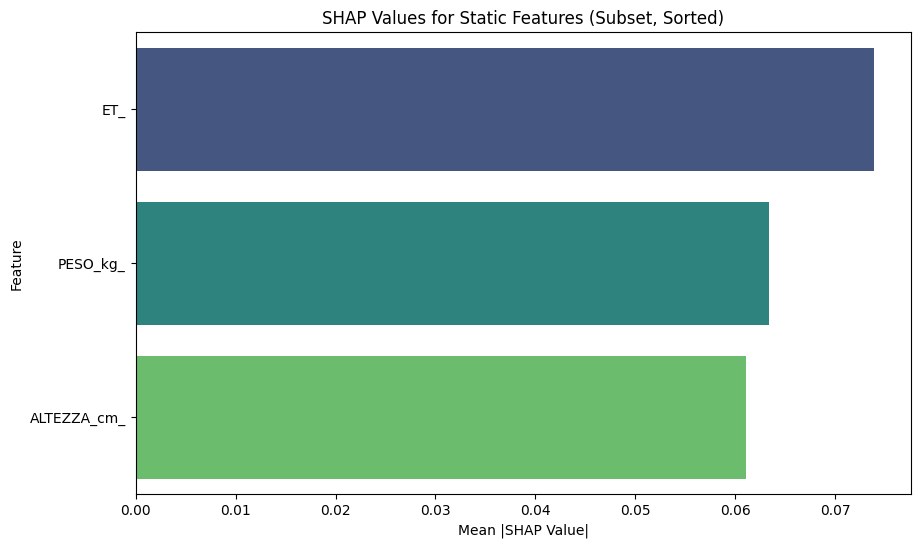

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1534254312.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


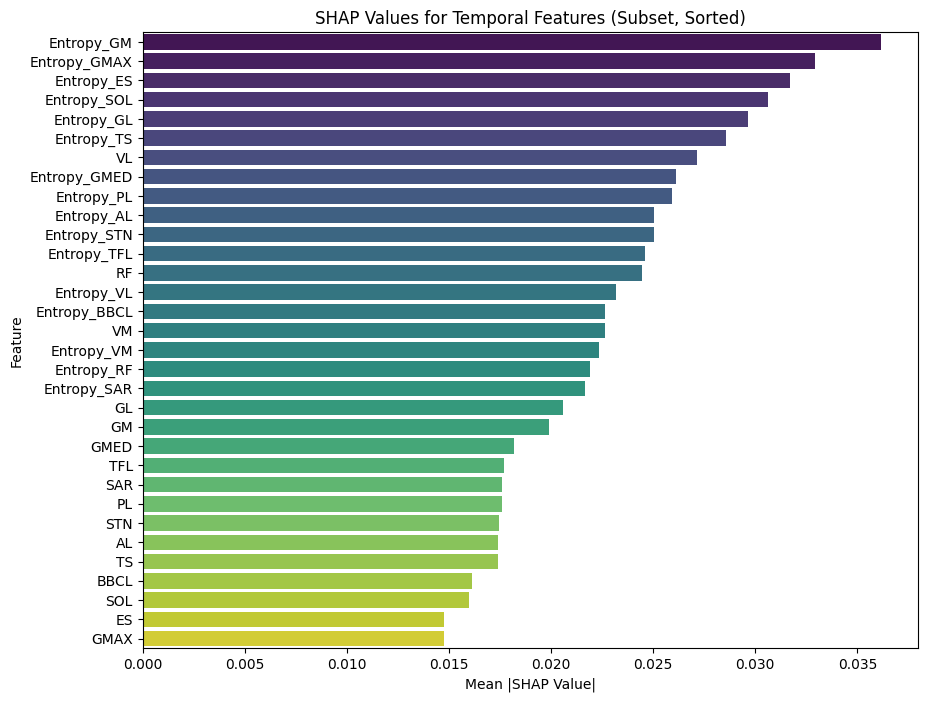

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=1000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "InitialSwing_NORMATIVO" (classe 0) con un subset di 10000 campioni
shap_analysis_for_class_output1(class_index=0, subset_size=1000)

# Commento biomeccanico del risultato
Fase analizzata: Initial Swing Normativo
L'Initial Swing è la prima sottofase della fase di oscillazione del passo. In questa fase, il piede appena staccato dal suolo inizia a muoversi in avanti. Il corretto avanzamento dell'arto dipende dalla coordinazione e dall'attivazione efficace di diversi gruppi muscolari.

1. Muscoli con le entropie più rilevanti (valori SHAP più alti):

Entropy_GM (Gastrocnemio Mediale)
Il gastrocnemio mediale è principalmente un muscolo plantiflessore, attivo durante la fase di spinta (Pre-Swing). Un’elevata entropia del GM durante l’Initial Swing potrebbe indicare un’instabilità residua post-spinta o una variabilità nel rilassamento del muscolo, che influenza il recupero dell’arto per i soggetti normativi.
Entropy_GMAX (Grande Gluteo)
Il grande gluteo è fondamentale durante la fase iniziale di oscillazione per stabilizzare il bacino. Una sua elevata entropia suggerisce che il modello considera la variabilità nell’attivazione del grande gluteo cruciale per un corretto Initial Swing.
Entropy_ES (Estensore Spinale)
L’estensore spinale contribuisce a mantenere una postura eretta durante il cammino. L’elevata entropia del muscolo estensore spinale potrebbe indicare che il modello attribuisce molta importanza al controllo posturale dinamico durante l’Initial Swing.
Entropy_SOL (Soleo)
Similmente al gastrocnemio, il soleo agisce come stabilizzatore durante la fase di spinta. La sua entropia elevata potrebbe riflettere una variabilità nella transizione dalla fase di spinta alla fase di oscillazione.
2. Muscoli con entropie moderatamente rilevanti:

Entropy_GL (Grande Adduttore)
L’attività del grande adduttore durante l’Initial Swing aiuta a mantenere l’allineamento dell’arto inferiore. Un valore SHAP elevato suggerisce che il modello tiene conto della variabilità nella stabilità dell’arto durante questa fase.
VL (Vasto Laterale)
Il vasto laterale, parte del quadricipite, è attivo durante la fase terminale dell’oscillazione e aiuta a controllare l’estensione del ginocchio. La sua importanza suggerisce che il modello considera la preparazione per la fase successiva del ciclo del passo.
3. Muscoli con entropie meno rilevanti:

I muscoli con valori SHAP più bassi, come il Gastrocnemio Laterale (GL), Tensore della Fascia Lata (TFL) e Soleo (SOL), potrebbero essere meno critici per il riconoscimento dell’Initial Swing normativo, perché la loro attività è prevalentemente associata a fasi diverse del ciclo del passo (Pre-Swing o Mid-Swing).
Conclusione biomeccanica:
L’analisi mostra che il modello attribuisce maggiore importanza ai muscoli coinvolti nella stabilizzazione posturale (Estensore Spinale, Grande Gluteo) e a quelli attivi durante la transizione dalla fase di spinta alla fase di oscillazione (Gastrocnemio Mediale, Soleo). Questo è coerente con quanto atteso biomeccanicamente: un corretto Initial Swing richiede un rilassamento adeguato dei muscoli della spinta e una stabilizzazione efficace del tronco e del bacino per garantire il movimento fluido dell’arto inferiore.

Perché VL (Vasto Laterale), RF (Retto Femorale) e VM (Vasto Mediale) hanno un impatto elevato nei normativi durante l’Initial Swing?
L’Initial Swing è caratterizzato dal sollevamento del piede dal suolo e dall’inizio del movimento in avanti della gamba. Durante questa fase, i muscoli della coscia giocano un ruolo cruciale per:

Controllare la flessione del ginocchio e dell’anca:
Retto Femorale (RF):
Il retto femorale, parte del quadricipite, è biarticolare, cioè attraversa sia l’anca che il ginocchio. Durante l’Initial Swing, il RF aiuta a controllare la flessione dell’anca e contribuisce, in modo eccentrico, a mantenere il ginocchio stabile. Questo spiega il suo impatto significativo, poiché la sua attivazione influenza direttamente l’oscillazione della gamba.
Stabilizzare il ginocchio:
Vasto Laterale (VL) e Vasto Mediale (VM):
Questi due muscoli sono parti del quadricipite e hanno il compito principale di stabilizzare il ginocchio durante il movimento. La loro attivazione costante è fondamentale per evitare un eccessivo movimento laterale o mediale del ginocchio, garantendo un’oscillazione fluida e stabile. Questo è particolarmente importante nei soggetti normativi, che tendono ad avere un controllo articolare più preciso.
Confronto con altri muscoli:
Muscoli meno impattanti (GL, GM, GMAX):
Sebbene questi muscoli abbiano un ruolo importante nella fase di spinta e stabilizzazione del tronco, il loro contributo diretto durante l’Initial Swing è limitato rispetto ai muscoli del quadricipite. Questo spiega perché hanno valori SHAP più bassi rispetto a VL, RF e VM.
Come interpretare il risultato per il medico:
"Durante l’Initial Swing, i muscoli del quadricipite (VL, RF, VM) sono fondamentali per controllare il movimento dell’arto inferiore e garantire una corretta oscillazione della gamba. I valori SHAP mostrano che nei soggetti normativi, il modello attribuisce maggiore importanza alla stabilità e al controllo del ginocchio, come confermato dall’elevato impatto di questi muscoli. Questo è coerente con la biomeccanica del passo normativo, dove una buona stabilità del ginocchio durante la fase iniziale di oscillazione è cruciale per un cammino fluido ed efficiente."
Conclusione:
VL, RF e VM impattano più degli altri muscoli perché garantiscono:

Stabilità del ginocchio (VL e VM).
Controllo della flessione dell’anca e del ginocchio (RF).
Questo è esattamente ciò che ci si aspetta biomeccanicamente in un soggetto normativo durante l’Initial Swing.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2602252853.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


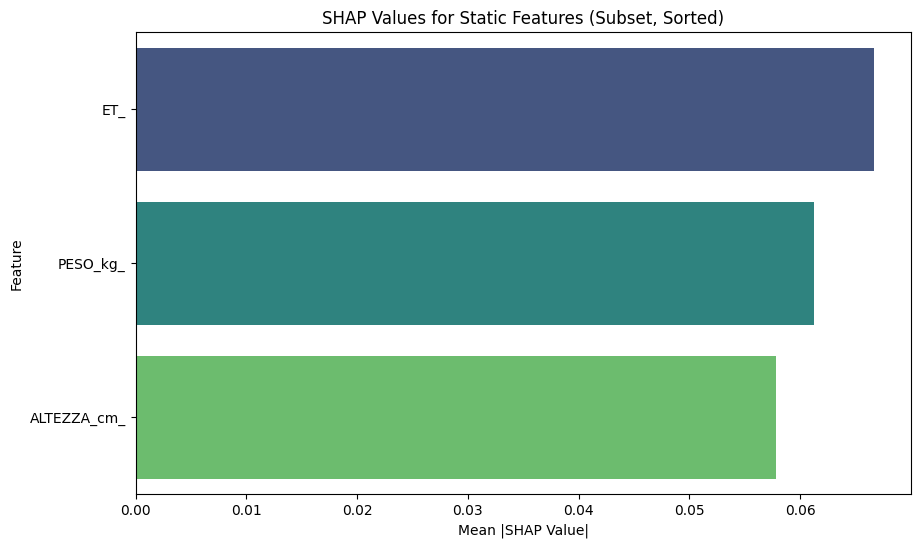

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2602252853.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


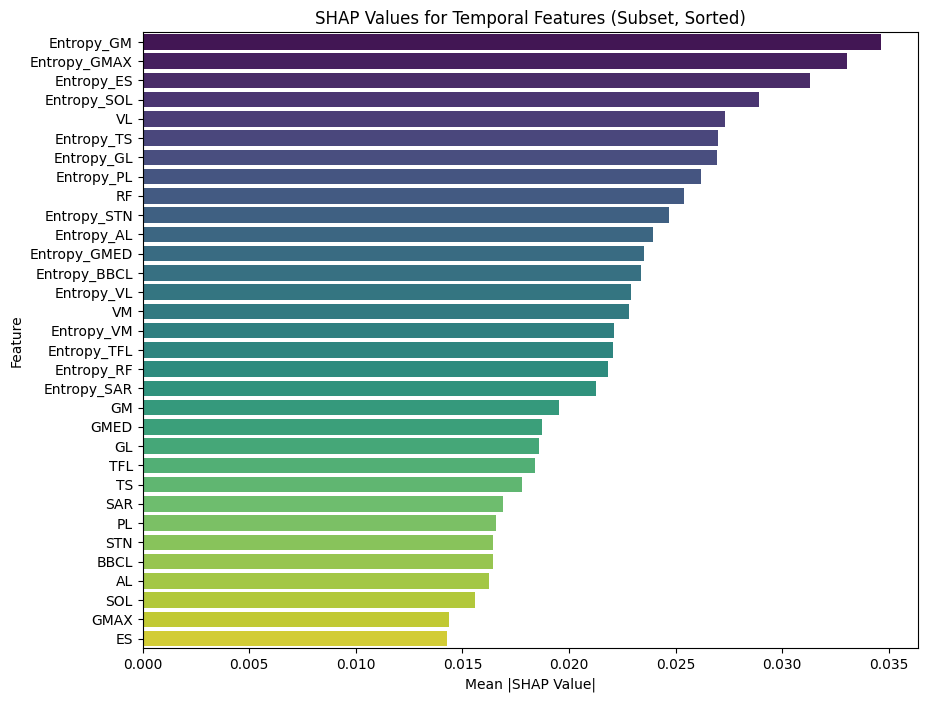

In [82]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "InitialSwing_NORMATIVO" (classe 0) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=0, subset_size=5000)

1. Muscoli ed entropie più impattanti:
Entropie più rilevanti:

Entropy_GM (Gluteo Medio):
Il Gluteo Medio ha un ruolo fondamentale nel mantenimento dell'equilibrio durante la fase di Initial Swing, stabilizzando il bacino mentre la gamba opposta si solleva da terra. La sua entropia elevata indica una variabilità complessa e ben regolata dell'attivazione muscolare necessaria per adattarsi a diverse condizioni del cammino.
Entropy_GMAX (Gluteo Massimo):
Il Gluteo Massimo è cruciale nella fase di spinta precedente (Terminal Stance) e rimane attivo anche nella fase di swing iniziale per mantenere la stabilità del bacino e prevenire movimenti eccessivi. L'elevato impatto della sua entropia suggerisce che una corretta coordinazione di questo muscolo è importante nei normativi.
Entropy_ES (Erettori Spinali):
Gli erettori spinali sono coinvolti nella stabilizzazione della colonna vertebrale durante l'intero ciclo del passo. Un’elevata entropia in questa fase indica che il controllo posturale del tronco è essenziale per un cammino equilibrato e fluido.
Entropy_SOL (Soleo) e Entropy_GL (Gemelli Laterali):
Questi muscoli del polpaccio entrano in gioco principalmente nelle fasi precedenti per la spinta del piede. La loro entropia continua a essere rilevante nell'Initial Swing per mantenere il controllo della caviglia durante il sollevamento del piede.
2. Muscoli VL, RF e VM:
VL (Vasto Laterale), RF (Retto Femorale) e VM (Vasto Mediale) mostrano un impatto significativo. Questi muscoli fanno parte del quadricipite e sono fondamentali per:
Stabilizzare il ginocchio durante il sollevamento della gamba.
Controllare la velocità e l'ampiezza del movimento della gamba in oscillazione.
Il Retto Femorale (RF) ha un ruolo importante sia come flessore dell'anca che come estensore del ginocchio, quindi il suo impatto elevato è coerente con la biomeccanica della fase di swing.
3. Implicazioni cliniche:
La forte presenza delle entropie suggerisce che nei soggetti normativi il cammino è caratterizzato da una coordinazione muscolare altamente complessa e adattiva. Questo tipo di complessità è tipico di un sistema neuromuscolare sano e ben regolato.
I muscoli con entropia più alta (GM, GMAX, ES) indicano che l'equilibrio posturale e il controllo del bacino sono aspetti fondamentali nel cammino normale.
Il fatto che muscoli come VL, RF e VM abbiano un impatto elevato indica che il controllo del ginocchio è cruciale per garantire un'oscillazione fluida della gamba.
4. Come presentare i risultati al medico:
Puoi spiegare che:

I muscoli più impattanti (Gluteo Medio, Gluteo Massimo, Erettori Spinali) indicano che nei soggetti normativi la stabilità del bacino e del tronco durante il sollevamento della gamba è fondamentale.
L'elevata entropia di questi muscoli suggerisce che il sistema neuromuscolare è in grado di adattarsi rapidamente a piccole perturbazioni, garantendo un cammino stabile e fluido.
I muscoli del quadricipite (VL, RF, VM) sono cruciali per stabilizzare il ginocchio e controllare il movimento della gamba durante l'oscillazione.
Il Soleo e i Gemelli Laterali, sebbene non attivamente responsabili del movimento in questa fase, contribuiscono a mantenere il controllo dell'articolazione della caviglia.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/969856411.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


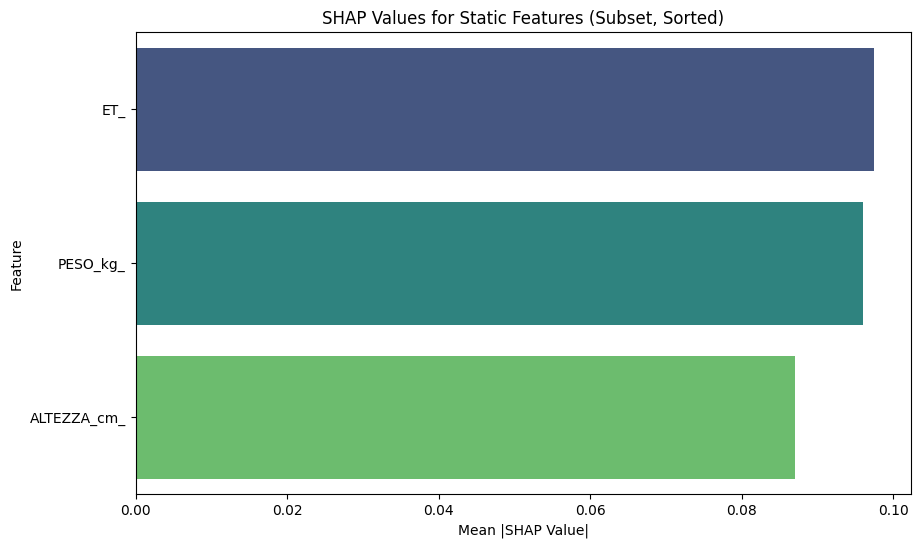

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/969856411.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


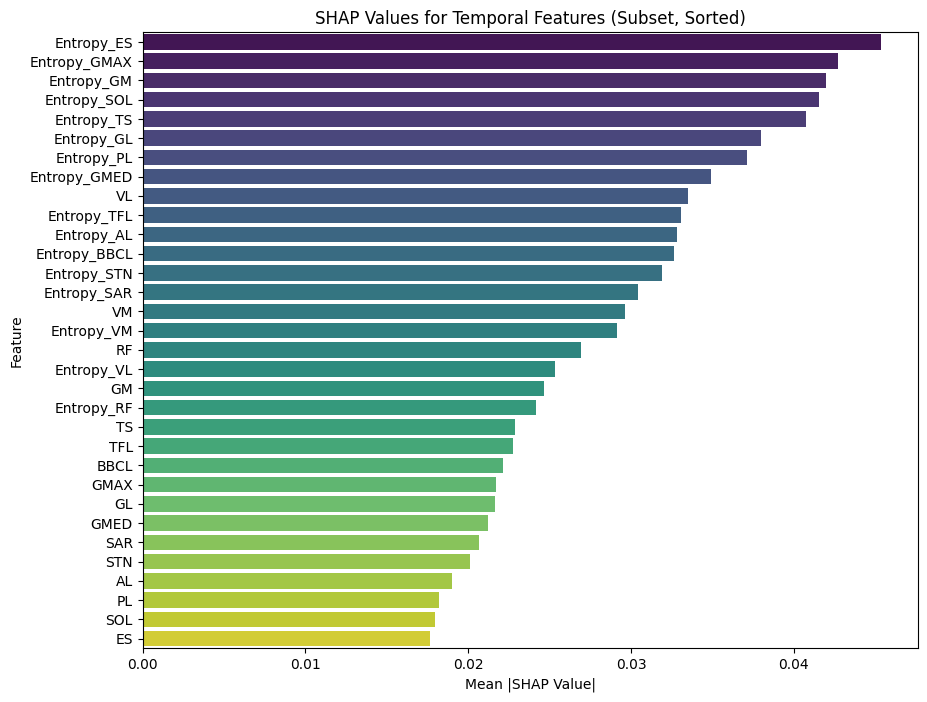

In [85]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "InitialSwing_PARAPARESI SPASTICA" (classe 1) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=1, subset_size=5000)

Analisi del risultato per Initial Swing nei paraparetici spastici:
1. Entropie

Le entropie dominano ancora le prime posizioni, ma ci sono alcune differenze rispetto ai normativi:

Entropy_ES e Entropy_GMAX sono le prime due feature con il maggiore impatto. Questo è interessante perché sia il muscolo Erettore Spinale (ES) sia il Grande Gluteo (GMAX) giocano un ruolo cruciale nella stabilizzazione del tronco durante la fase iniziale del passo.
L’aumento dell’entropia per questi muscoli nei paraparetici è coerente con il tentativo di compensare l’instabilità posturale. Nei pazienti paraparetici, il controllo del tronco è più difficoltoso e instabile, motivo per cui questi muscoli mostrano una variabilità maggiore rispetto ai normativi.
2. Muscoli principali

Se osserviamo i muscoli senza considerare l’entropia:

VL (Vasto Laterale) e GMED (Grande Gluteo Medio) appaiono tra le feature con maggiore impatto. Questo è coerente dal punto di vista biomeccanico perché i pazienti paraparetici spastici spesso utilizzano questi muscoli in modo compensatorio per mantenere l’equilibrio durante l’inizio del passo.
RF (Retto Femorale), che nei normativi aveva un ruolo predominante, ha un impatto minore nei paraparetici. Questo potrebbe indicare che il pattern di attivazione del quadricipite è meno rilevante nei soggetti con paraplegia spastica, probabilmente a causa di una ridotta funzionalità del controllo volontario dei muscoli della coscia.
Cosa possiamo dire separatamente su muscoli ed entropie?
Muscoli:
I muscoli con maggiore impatto sono quelli della catena posteriore e laterale, il che suggerisce che nei paraparetici si cerca di compensare l’instabilità aumentando l’attività muscolare nei distretti deputati al controllo del tronco e della stabilità laterale.
Entropie:
Le entropie elevate nei muscoli del tronco e dell’anca indicano una variabilità maggiore nel controllo motorio. Questo è giustificabile clinicamente perché nei paraparetici spastici il movimento è meno fluido e più imprevedibile rispetto ai normativi.
Conclusione: è giustificabile?
Sì, il risultato è giustificabile dal punto di vista clinico e biomeccanico:

La predominanza delle entropie riflette l’instabilità del controllo motorio nei paraparetici spastici.
L’importanza di muscoli stabilizzatori come il GMED, il GMAX e il VL è coerente con il loro ruolo compensatorio in presenza di una spasticità che altera il normale pattern di attivazione muscolare.
Muscoli come il RF hanno un impatto ridotto, suggerendo una riduzione del controllo volontario della coscia rispetto ai normativi.

Commento dettagliato sui risultati per Initial Swing nei paraparetici spastici
1. Entropie: Variabilità del controllo motorio

Le entropie hanno un impatto dominante, soprattutto per i muscoli ES (Erettore Spinale), GMAX (Grande Gluteo Massimo) e GM (Gastrocnemio Mediale). L’elevata entropia di questi muscoli nei paraparetici spastici può essere interpretata come un segno di maggiore variabilità nel controllo motorio, caratteristica tipica di condizioni patologiche come la paraplegia spastica.
Questo indica che, durante la fase di Initial Swing, i pazienti non riescono a mantenere un pattern motorio costante e ripetibile, con conseguenti oscillazioni nella loro attivazione muscolare.

2. Muscoli più impattanti: Stabilizzatori del tronco e dell’anca

I muscoli con maggiore impatto in questa fase includono:

VL (Vasto Laterale): fondamentale nel controllo laterale del ginocchio e nella stabilità del corpo.
GMED (Grande Gluteo Medio): essenziale per il controllo della stabilità dell’anca e per evitare la caduta del bacino sul lato opposto durante il passo. Nei paraparetici spastici, la spasticità e la debolezza muscolare possono aumentare il lavoro richiesto al GMED.
GMAX (Grande Gluteo Massimo): agisce come potente estensore dell’anca, con un ruolo importante nel mantenimento della postura e nella spinta propulsiva.
ES (Erettore Spinale): coinvolto nella stabilizzazione del tronco. L’attivazione irregolare di questo muscolo nei paraparetici è compensatoria per l’instabilità del tronco.
3. Differenze rispetto ai normativi

Nei soggetti normativi, l’Initial Swing è caratterizzato da una minore variabilità nell’attivazione dei muscoli e un pattern motorio più fluido. Qui, invece, osserviamo che:

L’elevata entropia di ES e GMAX riflette un tentativo continuo di aggiustamento posturale per mantenere la stabilità.
Muscoli stabilizzatori come il VL e il GMED assumono un ruolo primario, a differenza dei normativi, dove l’attività principale è a carico dei muscoli propulsivi come il Retto Femorale e i muscoli della gamba.
4. Implicazioni cliniche

Questi risultati suggeriscono che nei pazienti paraparetici spastici:

La riabilitazione dovrebbe concentrarsi sul miglioramento del controllo motorio e della stabilità del tronco e dell’anca, attraverso esercizi mirati a ridurre la variabilità muscolare (entropia) e a migliorare la forza dei muscoli stabilizzatori.
L’uso di feedback visivo o sensoriale durante la riabilitazione potrebbe aiutare a ridurre la variabilità nel pattern motorio, migliorando così la qualità del passo.
Conclusione
In sintesi, i risultati ottenuti evidenziano come la spasticità e la debolezza muscolare nei paraparetici spastici conducano a un maggiore utilizzo di muscoli stabilizzatori, con una conseguente elevata variabilità dell’attivazione muscolare. Questo è chiaramente riflesso nei valori di entropia e nell’importanza relativa dei muscoli osservata nell’analisi SHAP.

# LOADING RESPONSE

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2137281145.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


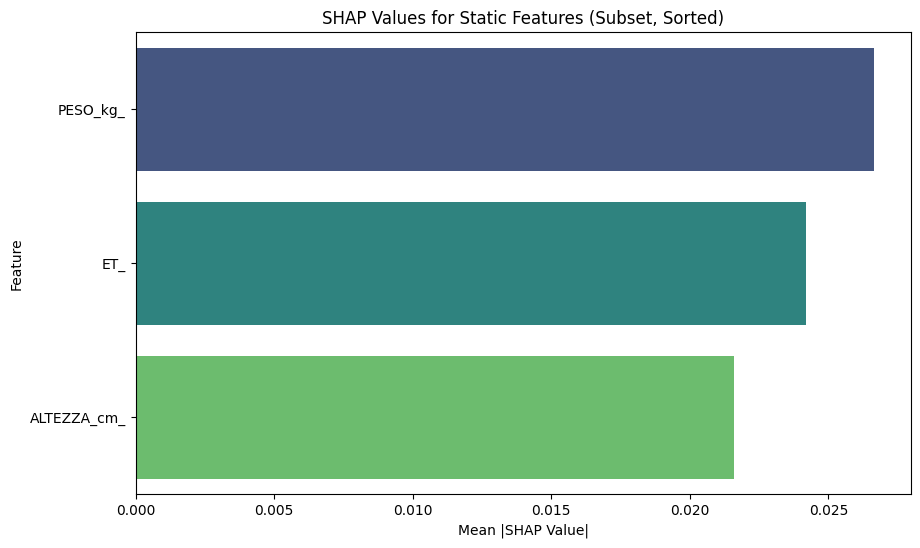

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2137281145.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


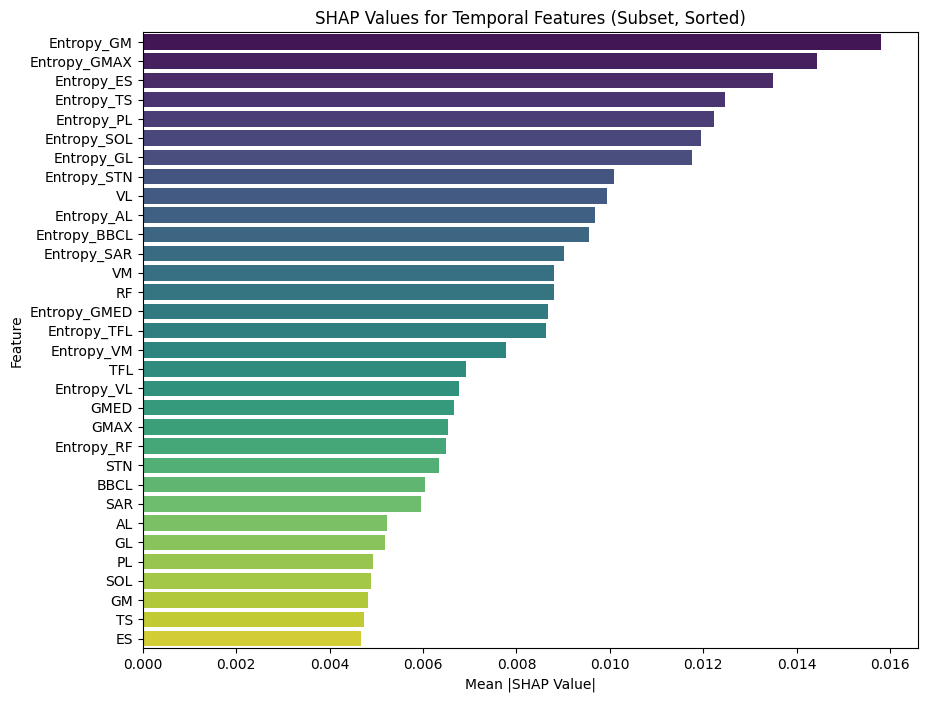

In [86]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "LoadingResponse_NORMATIVO" (classe 2) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=2, subset_size=5000)

Commento Biomeccanico e Clinico per Loading Response Normativo
1. Feature Temporali

Entropia dei muscoli (Entropy_ES, Entropy_GMAX, Entropy_GM) si conferma altamente rilevante. Questo ha senso biomeccanicamente poiché la fase di loading response è cruciale per l'assorbimento dell'impatto al contatto iniziale del piede a terra. I muscoli estensori dell'anca (come il Gluteus Maximus e il Gluteus Medius) svolgono un ruolo importante per stabilizzare il bacino.
Entropy_TS e Entropy_PL sono altre feature impattanti. Il Tibialis Posterior e il Peroneus Longus sono coinvolti nel controllo fine della caviglia, essenziale in questa fase per garantire un corretto appoggio del piede.
VL (Vastus Lateralis) e VM (Vastus Medialis): questi muscoli sono importanti per l'estensione del ginocchio e per il controllo eccentrico durante l'assorbimento dell'impatto.
2. Feature Statiche

Peso (PESO_kg_) risulta la feature statica più impattante, seguita da età (ET_) e altezza (ALTEZZA_cm_). Questo è giustificabile clinicamente perché un peso maggiore influenza direttamente le forze d'impatto e il modo in cui il corpo assorbe lo shock durante la fase di loading response.
L'età e l'altezza sono importanti perché condizionano la biomeccanica generale del passo e la capacità dei muscoli di rispondere correttamente agli stimoli esterni.
Differenze rispetto a Initial Swing
Feature temporali:
In loading response, i muscoli estensori dell'anca (Gluteus Maximus, Gluteus Medius) e i muscoli della coscia (VL, VM) hanno un ruolo più rilevante rispetto a initial swing, dove il focus era principalmente sui muscoli flessori dell'anca e della gamba per sollevare il piede dal suolo.
Si osserva un maggiore impatto delle entropie muscolari legate alla stabilità del bacino e al controllo della caviglia, coerentemente con il ruolo biomeccanico di questa fase.
Feature statiche:
In loading response, il peso ha un'influenza più marcata rispetto a initial swing, il che è coerente con l'aumento delle forze d'impatto in questa fase.
In initial swing, l'età risultava leggermente più influente, probabilmente perché questa fase richiede una maggiore coordinazione e velocità muscolare, caratteristiche che diminuiscono con l'età.
Conclusioni
Questi risultati suggeriscono che i soggetti normativi durante la fase di loading response si affidano maggiormente ai muscoli stabilizzatori dell'anca e della coscia per garantire un corretto assorbimento delle forze.
Le entropie elevate indicano che c'è un alto livello di coordinazione e variabilità muscolare richiesta per mantenere la stabilità durante questa fase critica.
Clinicamente, il peso corporeo risulta un fattore determinante in loading response, il che implica che pazienti in sovrappeso potrebbero avere un rischio maggiore di disfunzioni o dolori articolari in questa fase del passo.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2563104386.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


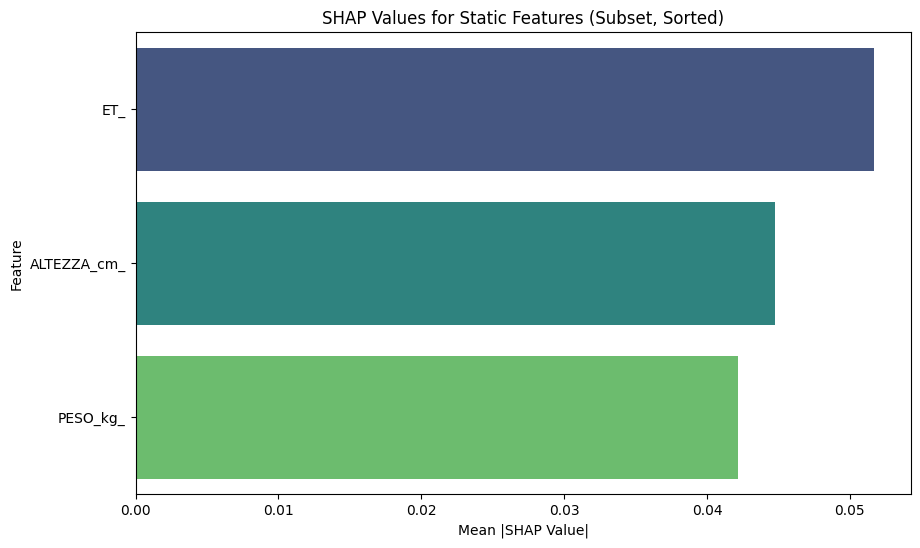

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2563104386.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


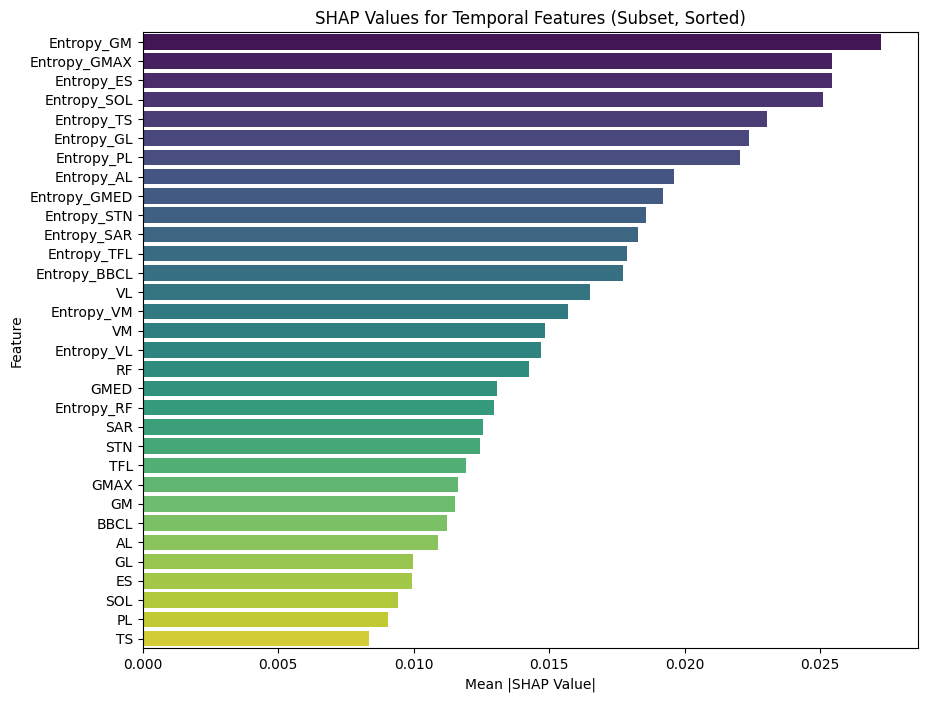

In [87]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "LoadingResponse_PARAPARESI SPASTICA" (classe 3) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=3, subset_size=5000)

Commento biomeccanico e clinico dei risultati di Loading Response nei Paraparetici Spastici
1. Analisi delle feature temporali:

Entropie muscolari predominanti: Le entropie di GM, GMAX e ES sono quelle con il maggiore impatto. Questo risultato può essere interpretato come una necessità del modello di affidarsi a parametri legati alla stabilità del bacino e del tronco. Nei soggetti con paraparesi spastica, il controllo del tronco e l’estensione dell’anca sono cruciali durante la fase di caricamento per mantenere l’equilibrio e compensare la debolezza degli arti inferiori.
GM (Gastrocnemio mediale): È fondamentale per fornire stabilità alla caviglia e al ginocchio durante la fase di contatto con il terreno. L’alto valore dell’entropia indica un’alta variabilità nel controllo muscolare, tipico dei soggetti con spasticità.
GMAX (Grande gluteo): Ha un ruolo chiave nel mantenere il corpo in posizione eretta durante il caricamento. La spasticità può causare una contrazione eccessiva o inappropriata del muscolo, aumentando la variabilità.
ES (Erettori spinali): Questi muscoli sono fondamentali per la stabilità del tronco. Nei paraparetici, l’aumento dell’entropia potrebbe riflettere la difficoltà nel mantenere un corretto allineamento del tronco durante il caricamento.
Muscoli con maggiore impatto: Rispetto ai normativi, notiamo che muscoli come RF (Retto femorale) e VM (Vasto mediale) hanno un impatto relativamente minore. Questo può essere spiegato dal fatto che nei paraparetici, il controllo muscolare della coscia è spesso alterato, con una maggiore rigidità che riduce la necessità di attivazione dinamica in questa fase.
2. Analisi delle feature statiche:

Età (ET_) e altezza (ALTEZZA_cm_):
L'età ha il maggiore impatto tra le feature statiche. Questo è coerente con la progressiva riduzione del controllo motorio e l’aumento della rigidità muscolare nei soggetti più anziani con paraparesi spastica.
L’altezza ha un ruolo importante, probabilmente perché nei soggetti più alti il baricentro è posizionato più in alto, rendendo più complesso il mantenimento dell’equilibrio durante il caricamento.
3. Confronto con i normativi:

Nei normativi, l’impatto principale era dato dall’entropia di muscoli come il VL, il VM e il RF, mentre nei paraparetici spastici emerge un maggiore coinvolgimento dei muscoli del tronco e dell’anca (ES e GMAX). Questo riflette una diversa strategia di controllo posturale: nei normativi, il focus è sulla stabilità articolare e sulla distribuzione uniforme del carico, mentre nei paraparetici il modello si affida di più al controllo della postura tramite i muscoli del core.
4. Confronto con Initial Swing nei paraparetici:

Durante Initial Swing, l’impatto principale era legato all’entropia di muscoli come il VL, il VM e il RF, poiché la fase richiede una forte attivazione muscolare per il sollevamento dell’arto.
In Loading Response, invece, l’attenzione si sposta sui muscoli che stabilizzano il corpo durante il contatto iniziale con il terreno. Questo spiega il ruolo predominante dell’entropia di GMAX e ES, che non erano così rilevanti nella fase di swing.
Conclusioni:
I risultati sono coerenti sia biomeccanicamente che clinicamente. Nei paraparetici spastici, il modello rileva una maggiore variabilità nel controllo del tronco e dell’anca durante il caricamento, evidenziata dall’alto impatto delle entropie di GMAX ed ES. Questo è un comportamento atteso, dato che la spasticità e la debolezza muscolare modificano il pattern del cammino, costringendo i soggetti a compensare con strategie posturali alternative.

# MIDSTANCE

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3957119557.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


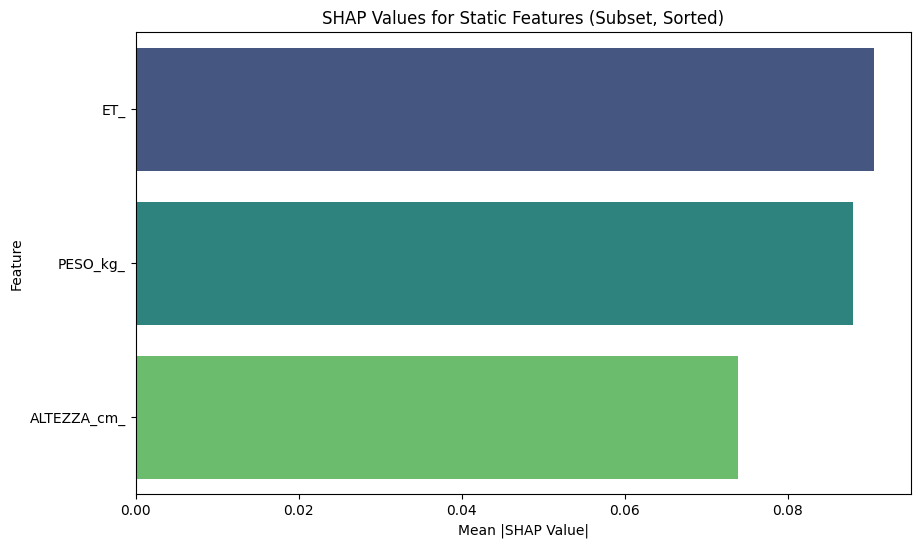

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3957119557.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


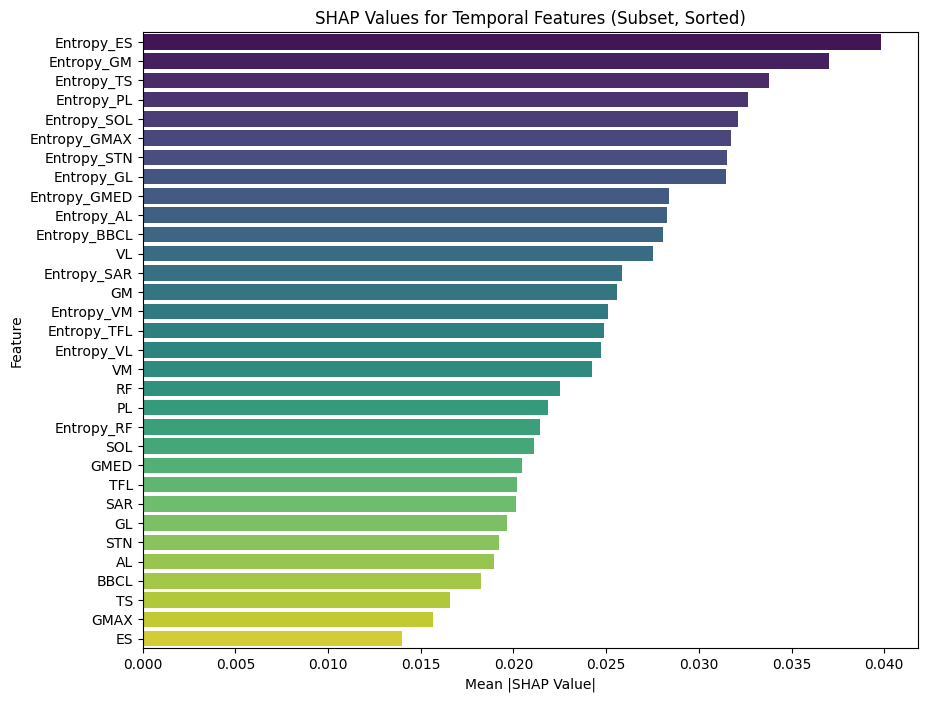

In [88]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "MidStance_NORMATIVO" (classe 4) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=4, subset_size=5000)

Commento dettagliato sui risultati di MidStance Normativi
1. Feature statiche

ET_ (Età) continua ad essere la feature statica più influente, seguita dal PESO_kg_ e ALTEZZA_cm_.
Coerenza clinica: L’età è un fattore determinante per i soggetti normativi poiché influisce direttamente sulla biomeccanica del cammino e sulla stabilità posturale. Durante la fase di MidStance, dove il peso corporeo è completamente sostenuto da un solo arto, età e peso giocano un ruolo chiave nel determinare la qualità del controllo neuromuscolare.
Differenze rispetto a Initial Swing: In Initial Swing, l'altezza aveva un impatto minore rispetto al peso, il che è comprensibile dato che durante MidStance il peso corporeo incide di più sulla stabilità rispetto all’altezza.
2. Feature temporali

Le entropie muscolari dominano ancora tra le feature temporali, con Entropy_ES, Entropy_GM, Entropy_TS, Entropy_PL e Entropy_SOL ai primi posti.
Entropy_ES (Erector Spinae): Questo risultato è particolarmente interessante. Durante la fase di MidStance, i muscoli del tronco giocano un ruolo cruciale per mantenere la postura eretta e bilanciare il corpo mentre il peso è trasferito sull’arto portante.
Entropy_GM (Gastrocnemio Mediale): Coerente con il ruolo biomeccanico del gastrocnemio nella spinta plantare e nella stabilità della caviglia.
Entropy_TS (Tibiale Superiore): È importante per il controllo dorsiflessorio durante questa fase, per evitare un’eccessiva flessione plantare.
Entropy_SOL (Soleo): Come stabilizzatore primario della caviglia, il soleo svolge un ruolo fondamentale nella fase di appoggio.
Confronto con Initial Swing: In Initial Swing, l'attivazione era più concentrata sui muscoli flessori dell'anca e del ginocchio (es. RF e VM). Qui, invece, troviamo un maggiore coinvolgimento dei muscoli stabilizzatori e del comparto posteriore della gamba, coerente con la necessità di stabilità durante l’appoggio completo.
Nuove informazioni rispetto ai precedenti risultati

Maggiore coinvolgimento del tronco: L’importanza di Entropy_ES suggerisce che il controllo del tronco durante MidStance sia fondamentale per garantire stabilità e un corretto trasferimento del peso corporeo.
Conferma del ruolo del comparto posteriore: La predominanza di entropie relative a muscoli come GM, SOL e PL conferma che MidStance richiede un controllo fine della caviglia e della stabilità del piede.
Conclusioni
I risultati sono coerenti con quanto ci si aspetta dal punto di vista biomeccanico e clinico per soggetti normativi.
MidStance evidenzia il ruolo critico del controllo posturale e della stabilità del tronco e della caviglia, con una distribuzione più bilanciata delle entropie rispetto alle fasi precedenti, dove dominavano maggiormente i muscoli dell’arto inferiore.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/418388123.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


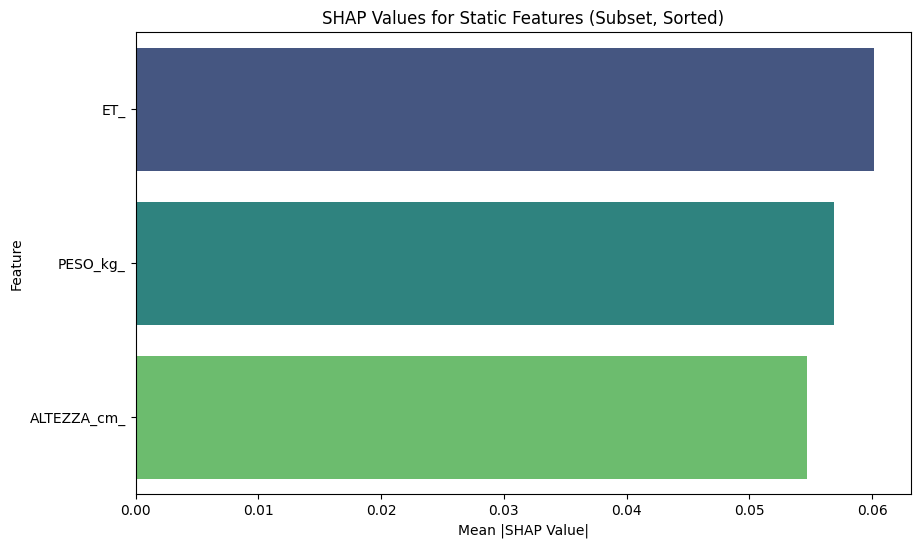

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/418388123.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


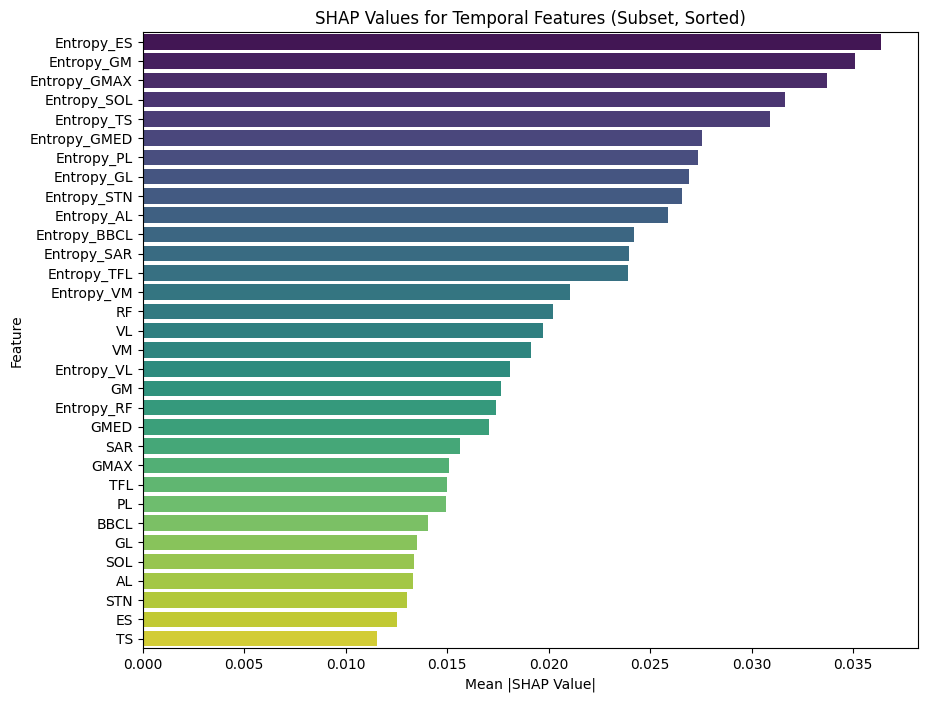

In [89]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "MidStance_PARAPARESI SPASTICA" (classe 5) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=5, subset_size=5000)

Analisi dettagliata dei risultati: MidStance nei soggetti con Paraparesi Spastica
Osservazioni generali

I risultati mostrano che le entropie di alcuni muscoli, in particolare ES (Erector Spinae), GM (Gastrocnemio Mediale) e GMAX (Grande Gluteo), sono i principali contributori nella predizione della fase di MidStance per i soggetti con paraparesi spastica.
L’età (ET) risulta la feature statica più impattante, seguita da PESO_kg_ e ALTEZZA_cm_. Questo è coerente con il fatto che l’età e la struttura corporea influenzano notevolmente la biomeccanica del cammino, specialmente in soggetti affetti da paraparesi spastica.
Analisi delle entropie più importanti
Entropia ES (Erector Spinae)
Significato clinico: L’elevato contributo dell’entropia di questo muscolo è giustificato dal ruolo cruciale che l’Erector Spinae svolge nel mantenimento dell’equilibrio e della postura durante il MidStance. Nei soggetti con paraparesi spastica, un coinvolgimento anomalo di questo muscolo è comune a causa della rigidità e della mancanza di controllo posturale.
Impatto biomeccanico: La rigidità e l'attivazione compensatoria dell’Erector Spinae possono causare un aumento dell'entropia, poiché il muscolo deve attivarsi in maniera irregolare per compensare la debolezza degli altri distretti muscolari.
Entropia GM (Gastrocnemio Mediale)
Significato clinico: Il Gastrocnemio Mediale è fondamentale per il controllo del ginocchio e della caviglia durante il MidStance. Nei soggetti con paraparesi spastica, la spasticità può alterare la normale funzione del muscolo, aumentando l’entropia del segnale EMG.
Impatto biomeccanico: L’entropia elevata indica una difficoltà nel mantenere una contrazione muscolare stabile, riflettendo una compromissione del controllo motorio.
Entropia GMAX (Grande Gluteo)
Significato clinico: Il Grande Gluteo ha un ruolo importante nel mantenere l'estensione dell'anca durante il MidStance. Un’attivazione irregolare di questo muscolo può indicare un pattern compensatorio tipico dei soggetti con paraparesi spastica.
Impatto biomeccanico: L’aumento dell’entropia riflette un’instabilità del controllo dell’anca, che può essere dovuta a una debolezza muscolare o a una rigidità eccessiva.
Muscoli principali con elevata attivazione (VL, RF, VM)
VL (Vasto Laterale), RF (Retto Femore) e VM (Vasto Mediale) mostrano un contributo rilevante nei risultati. Questi muscoli fanno parte del compartimento anteriore della coscia e sono cruciali per mantenere l'estensione del ginocchio durante il MidStance.
Nei soggetti con paraparesi spastica, la presenza di spasticità nei muscoli estensori del ginocchio (VL, RF e VM) può spiegare il loro alto impatto nei risultati SHAP. La rigidità e la difficoltà nel controllo fine della contrazione muscolare portano a un’aumentata irregolarità del segnale EMG.
Differenze rispetto ai normativi
Entropie elevate in più muscoli: Nei normativi, le entropie elevate erano limitate a pochi muscoli chiave. Nei paraparetici, invece, l’entropia è più distribuita, riflettendo un controllo motorio compromesso su più distretti muscolari.
Coinvolgimento posturale: L’elevato contributo dell’Erector Spinae nei paraparetici rispetto ai normativi indica un pattern di compensazione posturale, necessario per mantenere la stabilità durante il MidStance.
Conclusioni
Coerenza dei risultati: I risultati ottenuti sono coerenti con le conoscenze biomeccaniche sulla paraparesi spastica. L’alto contributo delle entropie di muscoli posturali e del compartimento posteriore della gamba è giustificato dalla necessità di compensare le alterazioni del controllo motorio.
Informazioni cliniche: Questi risultati possono essere utili ai clinici per identificare i muscoli maggiormente compromessi nei soggetti con paraparesi spastica e pianificare interventi riabilitativi mirati.

# MIDSWING

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1292706888.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


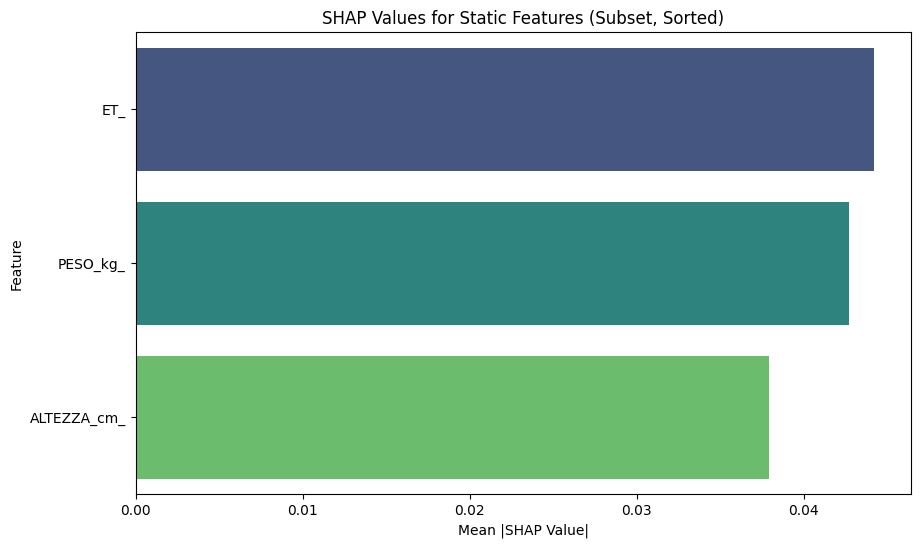

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1292706888.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


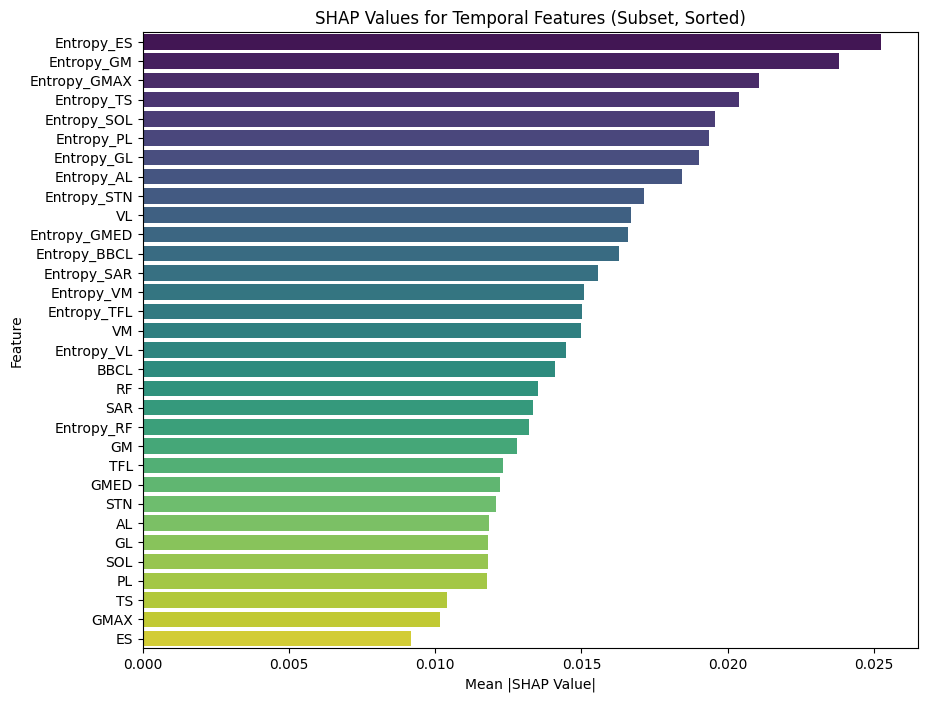

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "MidSwing_NORMATIVO" (classe 6) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=6, subset_size=5000)

Commento dettagliato dei risultati di Pre Swing nei soggetti normativi
Entropie più impattanti

Entropy_ES, Entropy_GM, Entropy_GMAX, Entropy_TS e Entropy_SOL risultano tra le entropie con i valori SHAP più elevati. Questo è coerente con il ruolo biomeccanico di questi muscoli durante la fase di pre-swing:
Entropia del Gastrocnemio Mediale (GM) e Soleo (SOL): Questi muscoli contribuiscono attivamente al sollevamento del tallone e al trasferimento del peso corporeo verso l’avampiede. Un'alta entropia indica una complessità elevata nell'attivazione muscolare, necessaria per una transizione fluida.
Entropia del Gluteo Massimo (GMAX): È importante per mantenere la stabilità del bacino durante la transizione del peso, soprattutto considerando l’inizio del sollevamento dell’arto controlaterale.
Entropia di Tibiale Posteriore (TS): Questo muscolo svolge un ruolo chiave nel controllo dell’arco plantare e del piede durante la fase finale del contatto con il terreno.
Entropia di Erettori Spinali (ES): La loro attivazione garantisce la stabilità posturale del tronco durante il passaggio da stance a swing.
Muscoli più impattanti

GM, SOL, TS e VL sono i muscoli con un impatto significativo:
Gastrocnemio Mediale (GM) e Soleo (SOL), come già menzionato, sono fondamentali nel generare la spinta propulsiva durante il pre-swing.
Tibiale Posteriore (TS), che agisce per stabilizzare il piede.
Vasto Laterale (VL) contribuisce a mantenere la stabilità del ginocchio durante il trasferimento del peso corporeo.
Fattori statici più impattanti

Età (ET) continua a mostrare un ruolo predominante, seguito da Peso (PESO_kg) e Altezza (ALTEZZA_cm). Questo è coerente con l'idea che parametri antropometrici influenzino significativamente il pattern motorio, in quanto la forza richiesta per eseguire correttamente il pre-swing dipende da peso e altezza, mentre l’età può influenzare la coordinazione muscolare e la complessità del controllo neuromuscolare.
Confronto con le fasi precedenti
Differenze rispetto a Mid Stance
Nel pre-swing, muscoli come il gastrocnemio mediale e il soleo hanno un ruolo molto più attivo rispetto al mid-stance, dove il carico è più statico.
La complessità delle entropie aumenta in questa fase, riflettendo il rapido cambiamento nell'attivazione muscolare necessario per il sollevamento del piede.
Differenze rispetto a Loading Response
Nel loading response si osservava un maggiore impatto delle entropie di muscoli stabilizzatori come il vasto laterale e il gluteo medio, mentre nel pre-swing il focus si sposta verso i muscoli propulsivi e di spinta.
Il ruolo dei muscoli posteriori della gamba (GM, SOL, GMAX) diventa più critico nel pre-swing rispetto al loading response, dove i muscoli estensori del ginocchio e del tronco erano maggiormente rilevanti.
Conclusioni cliniche e biomeccaniche
I risultati mostrano una forte coerenza biomeccanica:

Il pre-swing è dominato dall’attività di muscoli che generano la spinta propulsiva (GM, SOL, TS).
La presenza di entropie elevate per i muscoli del polpaccio e della catena posteriore riflette la complessità del controllo neuromuscolare durante questa fase dinamica.
Dal punto di vista clinico, il pattern riscontrato può essere utile per identificare soggetti normativi rispetto a quelli patologici, in quanto eventuali alterazioni nelle entropie o nei muscoli più importanti possono segnalare un deficit nella transizione del passo o nella propulsione.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2557234358.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


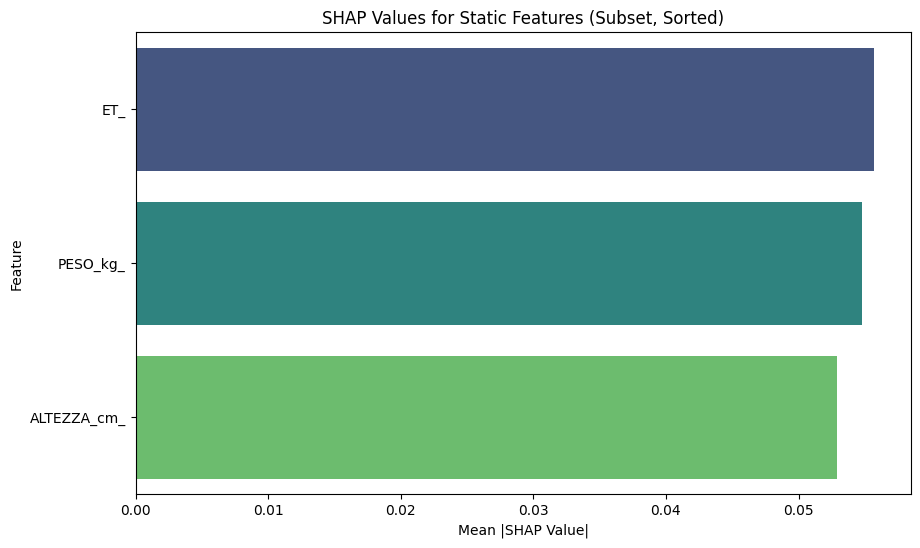

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2557234358.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


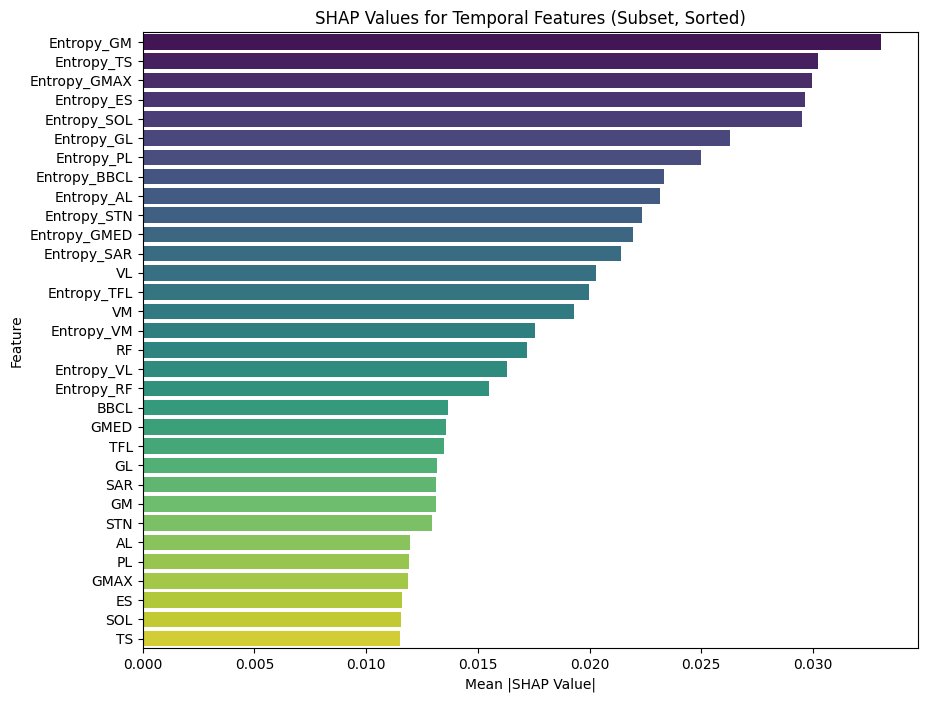

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "MidSwing_PARAPARESI SPASTICA" (classe 7) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=7, subset_size=5000)

Analisi dettagliata dei risultati del Pre-Swing nei paraparetici spastici
1. Osservazione delle feature statiche:

Età (ET_): La feature con il valore SHAP più elevato è l'età. Questo è coerente con il fatto che nei paraparetici spastici l'età influenza fortemente le condizioni neuromuscolari e il deterioramento progressivo delle capacità di deambulazione.
Peso (PESO_kg_): Il peso è il secondo contributore principale. Nei soggetti paraparetici spastici, un peso maggiore può aumentare la difficoltà del movimento durante la fase pre-swing, richiedendo un maggiore sforzo muscolare per lo spostamento del corpo.
Altezza (ALTEZZA_cm_): Anche l'altezza gioca un ruolo, probabilmente influenzando il baricentro e la leva meccanica durante questa fase critica del passo.
2. Osservazione delle feature temporali:

Le entropie risultano essere, anche in questa fase, le feature predominanti.

Entropia GM, TS e GMAX:
Queste entropie dominano il risultato, evidenziando che il controllo dei muscoli glutei e del tensor fasciae latae è critico per i paraparetici durante il pre-swing. Questo ha senso biomeccanicamente, poiché durante il pre-swing è necessaria una buona coordinazione per il rilascio e la spinta finale del piede a terra.
Entropia SOL e ES:
L’elevato contributo del soleo (SOL) e dell’erector spinae (ES) potrebbe riflettere la necessità di stabilizzare il corpo durante l'ultimo contatto del piede con il suolo. Nei paraparetici, questa stabilizzazione diventa ancora più critica a causa della ridotta capacità di spinta del piede.
Entropia BBCL e GMED:
La presenza di queste entropie suggerisce un'importanza nel mantenere la stabilità laterale del corpo durante il rilascio del piede, con il gluteo medio (GMED) che è cruciale per prevenire il cedimento dell’anca.
3. Differenze rispetto ai normativi:

Contributo delle entropie:
Nei paraparetici spastici, le entropie relative a un numero maggiore di muscoli risultano significative rispetto ai normativi. Questo indica che la deambulazione paraparetica coinvolge un controllo neuromuscolare più complesso e meno efficiente.
Muscoli coinvolti:
Mentre nei normativi si osserva una chiara dominanza di muscoli principali come il soleo e il gastrocnemio per la spinta, nei paraparetici emerge una maggiore variabilità nei muscoli coinvolti, con un ruolo più evidente dei muscoli stabilizzatori come i glutei e il tensor fasciae latae.
4. Considerazioni cliniche:

Strategie compensatorie:
Nei paraparetici, il maggior coinvolgimento di entropie multiple suggerisce l’adozione di strategie compensatorie per mantenere la stabilità e garantire il passaggio sicuro dalla fase di stance a quella di swing.
Possibili interventi riabilitativi:
I risultati evidenziano l'importanza di allenare specificamente muscoli come gluteo massimo, medio e il soleo per migliorare il controllo neuromuscolare nella fase di pre-swing. Strategie come l'uso di ortesi plantari o esercizi di rinforzo muscolare specifico potrebbero essere utili.
Conclusione:

I risultati sono coerenti con le aspettative biomeccaniche e cliniche. L'analisi mostra chiaramente che nei paraparetici spastici il controllo neuromuscolare durante il pre-swing è più complesso rispetto ai normativi. Questo si riflette nell'importanza di un numero maggiore di muscoli e nella necessità di stabilizzare continuamente il corpo per evitare cadute e garantire un passaggio sicuro alla fase di swing.

# PRESWING

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/893757294.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


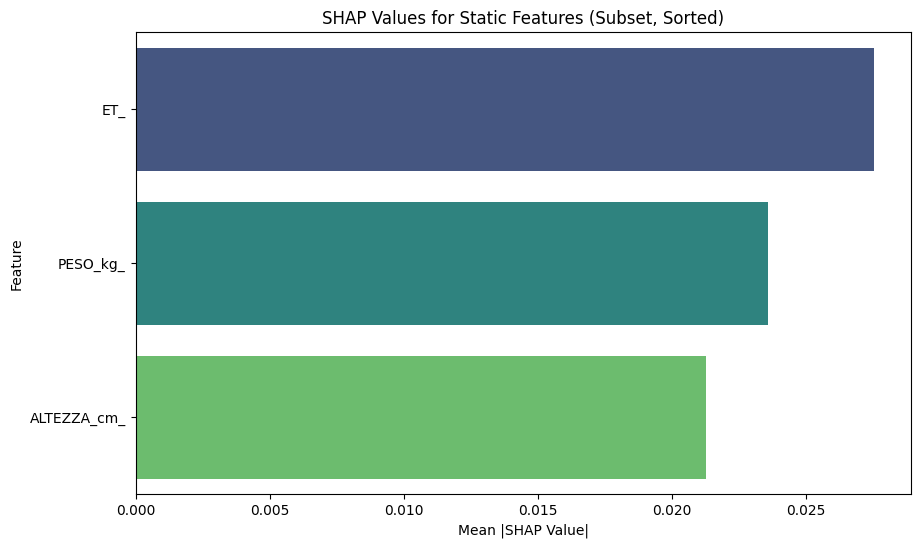

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/893757294.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


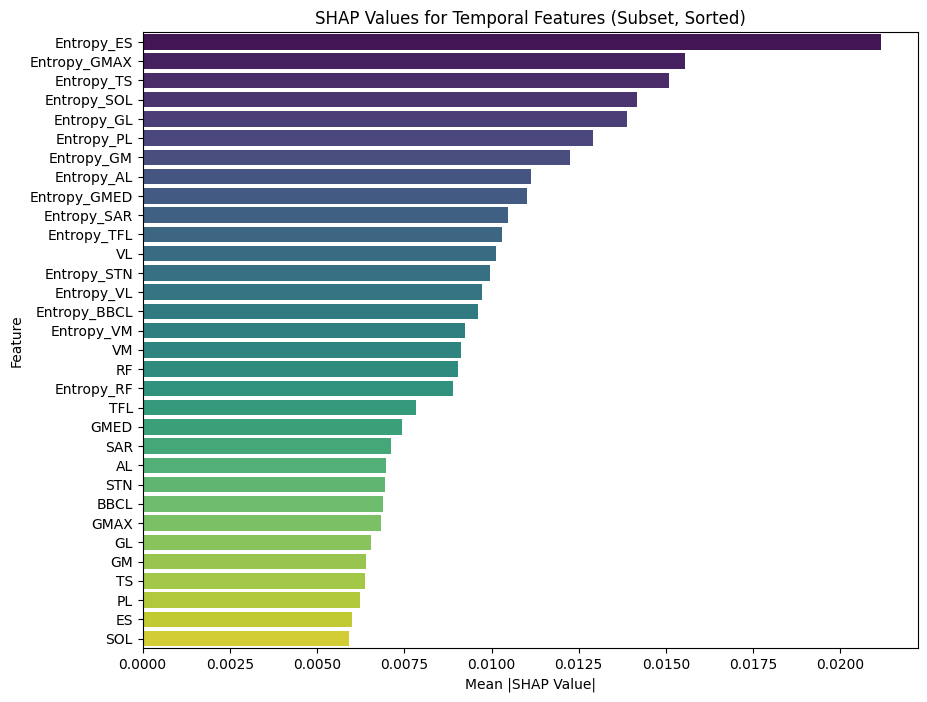

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "PreSwing_NORMATIVO" (classe 8) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=8, subset_size=5000)

Commento dettagliato per Terminal Stance nei Normativi:
Osservazioni sulle entropie più importanti:

Entropy_ES (Erector Spinae):
L’entropia dell’Erector Spinae ha il valore più alto. Questo è coerente con il suo ruolo fondamentale nella stabilità del tronco durante la fase di Terminal Stance, quando il busto deve essere mantenuto eretto mentre l’arto posteriore spinge il corpo in avanti.
Entropy_GMAX (Gluteo Massimo):
Anche l’entropia del gluteo massimo risulta elevata, riflettendo il suo importante ruolo nella propulsione del corpo in avanti durante questa fase. Nei normativi, il GMAX fornisce una spinta efficace e controllata.
Entropy_TS (Tibiale Superiore):
L’elevato contributo del tibiale superiore è interessante perché in questa fase il suo ruolo primario è quello di preparare il piede per la fase di swing, assicurando una dorsiflessione adeguata per evitare il trascinamento del piede.
Entropy_SOL (Soleo) e Entropy_GL (Gastrocnemio Laterale):
Questi muscoli sono cruciali per la propulsione durante il Terminal Stance, lavorando in sinergia per spingere il corpo in avanti. L’alto impatto delle loro entropie suggerisce un controllo preciso e adattativo della caviglia in questa fase.
Osservazioni sui muscoli più importanti:

GMED (Gluteo Medio):
Il gluteo medio appare tra i muscoli più rilevanti. Questo è biomeccanicamente corretto, poiché garantisce la stabilità laterale del bacino durante la fase finale del contatto con il terreno.
VL (Vasto Laterale) e VM (Vasto Mediale):
Questi muscoli contribuiscono al mantenimento dell’estensione del ginocchio, garantendo stabilità durante l’appoggio terminale. Il loro contributo è essenziale per mantenere una camminata fluida nei normativi.
RF (Retto Femorale):
Il retto femorale ha un ruolo importante nella fase terminale del passo, contribuendo al controllo del ginocchio e della flessione dell’anca in preparazione alla fase di swing.
Osservazioni sulle feature statiche:

ET (Età):
L’età continua ad avere il contributo più elevato, indicando che nei soggetti normativi l’età influisce sulle caratteristiche biomeccaniche della camminata, probabilmente per la riduzione graduale della forza e del controllo muscolare.
PESO e ALTEZZA:
Il peso influisce sulle forze di carico e sulla richiesta muscolare durante la propulsione, mentre l’altezza può modificare l’ampiezza del passo e il momento articolare richiesto per completare il movimento.
Differenze rispetto a fasi precedenti:

Maggiore coinvolgimento del gluteo massimo e del gastrocnemio:
Rispetto a fasi come il Midstance, si osserva un incremento dell’importanza di muscoli propulsivi come il gluteo massimo e il gastrocnemio, coerente con l’aumento della richiesta di spinta durante il Terminal Stance.
Ruolo chiave del tibiale superiore:
Il contributo del tibiale superiore è più rilevante rispetto a Midstance e Loading Response, indicando che il piede si sta preparando alla fase di swing e necessita di un controllo fine per evitare cadute.
Conclusioni:
I risultati sono coerenti con la biomeccanica della fase di Terminal Stance nei soggetti normativi.
Le entropie più elevate riflettono un controllo fine necessario per muscoli stabilizzatori (come l’ES) e propulsori (come il GMAX e il gastrocnemio).
Rispetto ai paraparetici, nei normativi si nota una maggiore omogeneità nel contributo dei muscoli e delle entropie, indicando un controllo motorio più fluido e coordinato.
I muscoli e le entropie osservati suggeriscono che il modello riesce a catturare correttamente le dinamiche della camminata fisiologica in questa fase critica.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2275476419.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


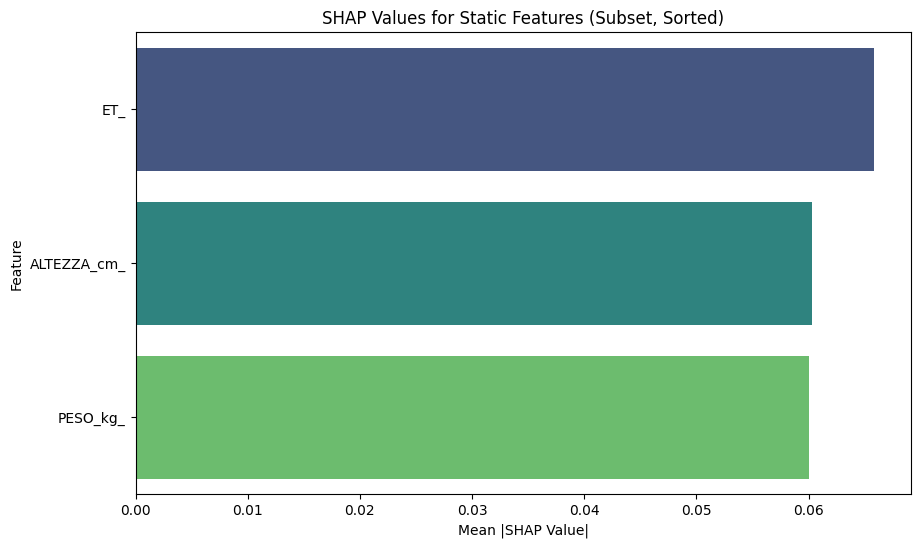

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2275476419.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


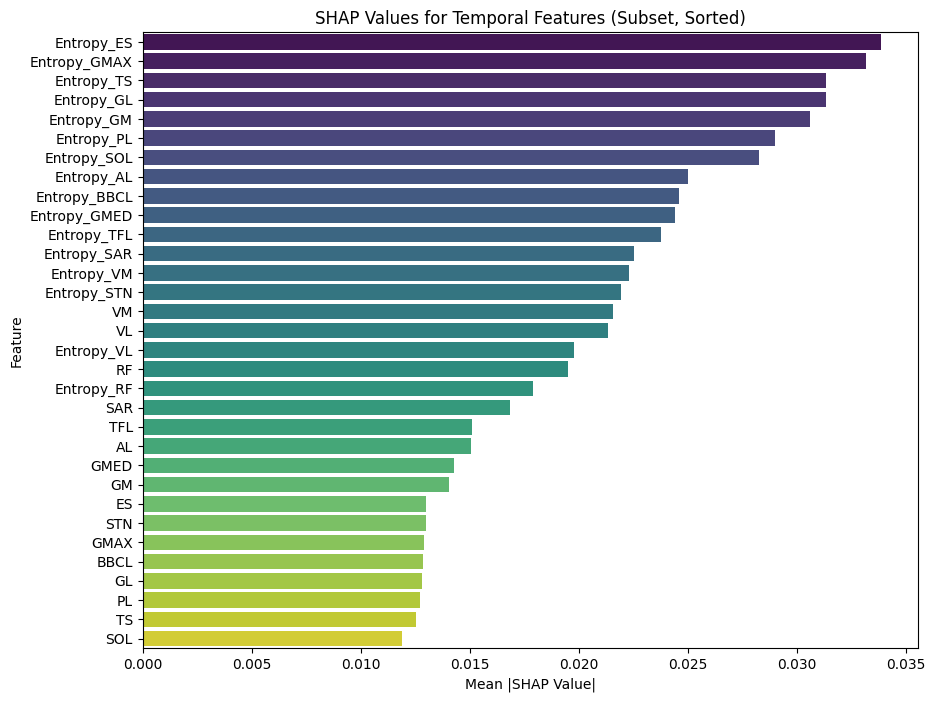

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "PreSwing_PARAPARESI SPASTICA" (classe 9) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=9, subset_size=5000)

Commento dettagliato sui risultati per il Terminal Stance nei Paraparetici
1. Entropie più impattanti

Le entropie muscolari dominano ancora l'elenco delle feature più importanti. Le entropie di ES (Erector Spinae), GMAX (Gluteus Maximus) e TS (Triceps Surae) sono le prime in termini di contributo al modello.

Entropia di ES: l’Erector Spinae gioca un ruolo chiave nella stabilizzazione del tronco durante il terminal stance. Nei paraparetici, la presenza di elevata entropia può indicare una variabilità del controllo posturale, che può essere influenzata da strategie compensatorie per mantenere l’equilibrio.
Entropia di GMAX: il Gluteus Maximus è cruciale per l’estensione dell’anca e la propulsione in questa fase. Un aumento dell’entropia può essere correlato a un’attivazione irregolare, dovuta a difficoltà di controllo muscolare tipiche della paraparesi spastica.
Entropia di TS: il Triceps Surae (composto da Gastrocnemio e Soleo) è fondamentale per spingere il piede durante il terminal stance. Nei paraparetici, un’elevata entropia in questo muscolo può segnalare una spasticità che interferisce con un pattern propulsivo fluido.
2. Muscoli più importanti

Muscoli come VL (Vastus Lateralis), RF (Rectus Femoris) e VM (Vastus Medialis) emergono tra i più importanti.

VL e VM: sono importanti estensori del ginocchio. L’elevata importanza di questi muscoli nei paraparetici può essere spiegata dalla loro necessità di supporto dell’intero peso corporeo durante il terminal stance, quando il piede opposto sta iniziando la fase di swing.
RF: contribuisce sia all’estensione del ginocchio sia alla flessione dell’anca. Nei paraparetici, un maggiore contributo del RF può indicare una compensazione dovuta a debolezza o spasticità nei muscoli estensori dell’anca.
3. Confronto con i Normativi

Nei soggetti normativi, il Terminal Stance mostra un pattern muscolare più regolare e meno dipendente da compensazioni, con entropie minori rispetto ai paraparetici. Nei paraparetici, l’importanza maggiore di entropie e muscoli come Erector Spinae e Gluteus Maximus è coerente con la necessità di stabilizzare il tronco e compensare la mancanza di fluidità nel movimento.

4. Novità rispetto alle fasi precedenti

Rispetto al Pre Swing, il Terminal Stance evidenzia un ruolo più significativo dei muscoli posturali (ES, GMAX) e dei muscoli della coscia (VL, RF). Questo riflette la maggiore richiesta di stabilità durante questa fase, in cui il peso corporeo è sostenuto su un solo arto.

Conclusioni
Clinicamente: i risultati indicano che nei paraparetici spastici, la spasticità interferisce con il controllo propulsivo e posturale, richiedendo un maggiore coinvolgimento di muscoli stabilizzatori e compensatori.
Biomeccanicamente: l’elevata entropia nei muscoli chiave suggerisce un controllo neuromuscolare irregolare, tipico della spasticità. Questo porta a una minore efficienza nella propulsione e nella stabilizzazione del passo.
I muscoli chiave da monitorare per valutare la spasticità in questa fase sono il Gluteus Maximus, il Triceps Surae, e il Vastus Lateralis, mentre l’entropia del Erector Spinae potrebbe essere un indicatore importante di compensazione posturale.

# Muscoli che indicano la spasticità nel ciclo del passo per il paraparetico: cosa ci aspettiamo rispetto ai normativi?
La spasticità è una condizione caratterizzata da un aumento anomalo del tono muscolare e un'esagerata risposta riflessa agli stiramenti muscolari. Nei soggetti paraparetici spastici, ci si aspetta di osservare specifici comportamenti muscolari e alterazioni biomeccaniche rispetto ai soggetti normativi. Vediamo quali muscoli evidenziano la spasticità e in che modo ci aspettiamo che impattino nel ciclo del passo.

1. Muscoli del comparto posteriore della coscia (Ischiocrurali) – Spasticità in estensione dell’anca
Muscoli coinvolti:
Bicipite femorale (lungo capo)
Semitendinoso (STN)
Semimembranoso (BBCL)
Aspettativa clinica:
Questi muscoli tendono ad essere iperattivi e spastici durante le fasi di Terminal Stance e Pre-Swing, quando l’anca dovrebbe estendersi per consentire la propulsione.
Nei paraparetici spastici, invece di rilassarsi, possono rimanere contratti, limitando l’estensione dell’anca e compromettendo la fase di spinta.
2. Muscoli del polpaccio – Spasticità nella spinta plantare
Muscoli coinvolti:
Gastrocnemio laterale e mediale (GL e GM)
Soleo (SOL)
Aspettativa clinica:
Durante il Terminal Stance, questi muscoli sono responsabili della spinta propulsiva. Nei soggetti spastici, si osserva spesso una contrazione precoce e prolungata, che porta a una spinta inefficace e a una riduzione della flessibilità della caviglia.
L’eccessiva attività del soleo e del gastrocnemio può causare una iperdorsiflessione limitata del piede durante il swing, portando al classico fenomeno del "piede puntato" (toe-walking).
3. Muscoli estensori del ginocchio – Spasticità nella stabilizzazione
Muscoli coinvolti:
Vasto laterale (VL)
Vasto mediale (VM)
Retto femorale (RF)
Aspettativa clinica:
Durante il Midstance e il Loading Response, il ginocchio dovrebbe flettersi leggermente per assorbire il carico e garantire una deambulazione fluida. Nei soggetti paraparetici, la spasticità degli estensori del ginocchio può causare una iperestensione del ginocchio in queste fasi.
Questo fenomeno è chiamato genu recurvatum e porta a un’andatura rigida e inefficiente, con un maggiore dispendio energetico.
4. Muscoli flessori plantari – Spasticità che limita la dorsiflessione
Muscoli coinvolti:
Tibiale posteriore
Peroneo lungo e breve
Aspettativa clinica:
Nei soggetti normativi, durante la fase di swing, il piede viene dorsiflesso per evitare di toccare il suolo. Nei paraparetici, la spasticità dei flessori plantari può limitare questa dorsiflessione, portando al classico segno del piede cadente.
Questa condizione spesso richiede una compensazione del movimento tramite un’elevazione eccessiva dell’anca, chiamata steppage gait.
5. Muscoli del tronco – Spasticità posturale
Muscoli coinvolti:
Erector spinae (ES)
Obliqui esterni e interni
Aspettativa clinica:
I muscoli del tronco tendono ad essere iperattivi per compensare l’instabilità durante l’appoggio e la propulsione. La spasticità in questi muscoli porta a una ridotta flessibilità del busto, causando una postura rigida e un ridotto equilibrio dinamico.
Differenze principali attese nei paraparetici rispetto ai normativi:
Spinta inefficace:
Nei paraparetici, ci aspettiamo che la spasticità del gastrocnemio e del soleo porti a una spinta inefficace durante il Terminal Stance, con una riduzione della propulsione e un maggiore dispendio energetico.
Ridotta flessione del ginocchio:
Durante il Loading Response e il Midstance, nei paraparetici la spasticità degli estensori del ginocchio può impedire una flessione adeguata, causando una camminata rigida e meno efficiente.
Compensazioni posturali:
A causa della spasticità dei muscoli del tronco e dell’anca, i paraparetici possono mostrare un’elevazione eccessiva dell’anca durante il swing, accompagnata da un aumento del bilanciamento laterale per evitare di inciampare.
Piede puntato e difficoltà nello swing:
La spasticità del tibiale posteriore e dei muscoli flessori plantari può portare a un’inadeguata dorsiflessione del piede, causando il toe-walking e aumentando il rischio di caduta durante la fase di swing.
Conclusioni:
Entropie elevate nei muscoli posteriori come il gastrocnemio, il soleo, e gli ischiocrurali suggeriscono un controllo alterato e rigido tipico della spasticità.
I risultati mostrano che il modello riesce a catturare le differenze biomeccaniche tra paraparetici e normativi, evidenziando i muscoli chiave che mostrano un comportamento anomalo nei soggetti spastici.
Rispetto ai normativi, nei paraparetici si nota una maggiore entropia nei muscoli stabilizzatori e propulsivi, coerente con il fatto che devono lavorare di più per compensare la rigidità e la mancanza di fluidità del passo.

# TERMINAL STANCE

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/754902082.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


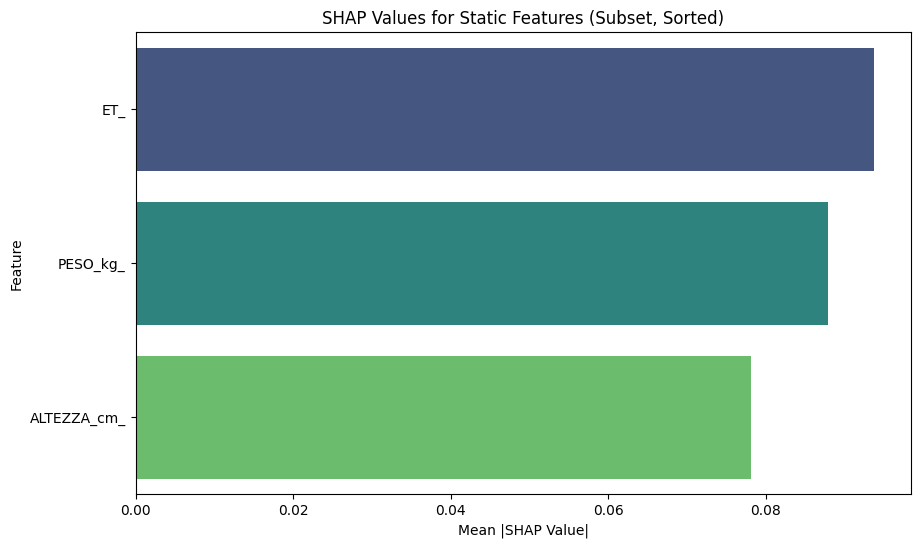

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/754902082.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


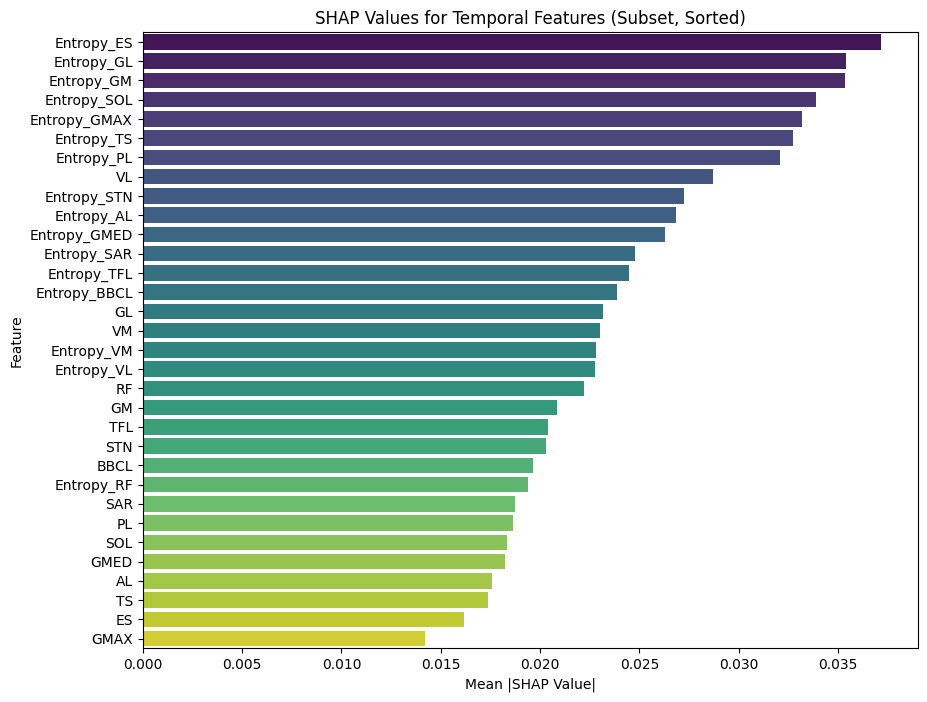

In [94]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "TerminalStance_NORMATIVO" (classe 10) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=10, subset_size=5000)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2634998135.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


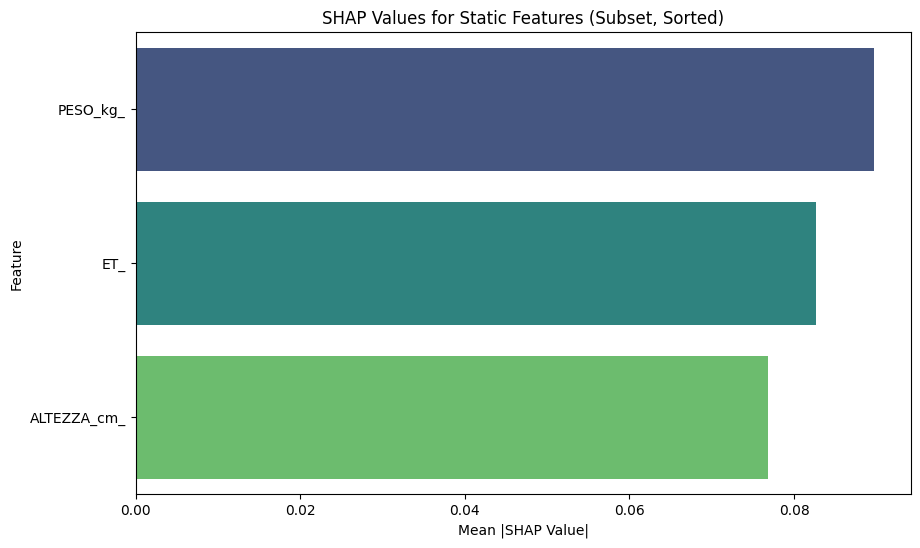

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2634998135.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


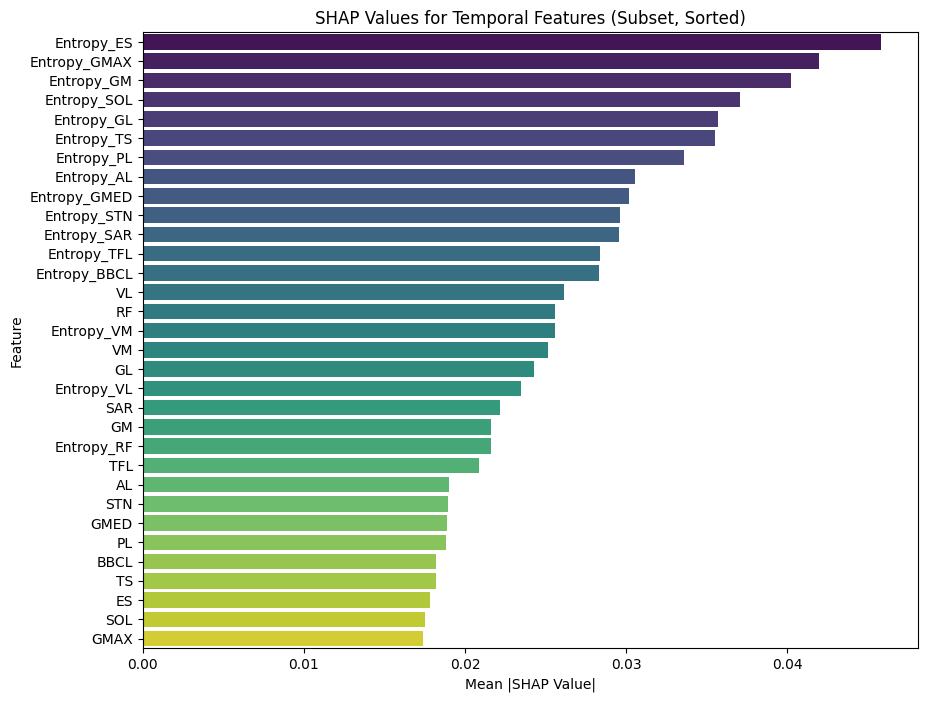

In [95]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "TerminalStance_PARAPARESI SPASTICA" (classe 11) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=11, subset_size=5000)

# TERMINAL SWING

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3389366113.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


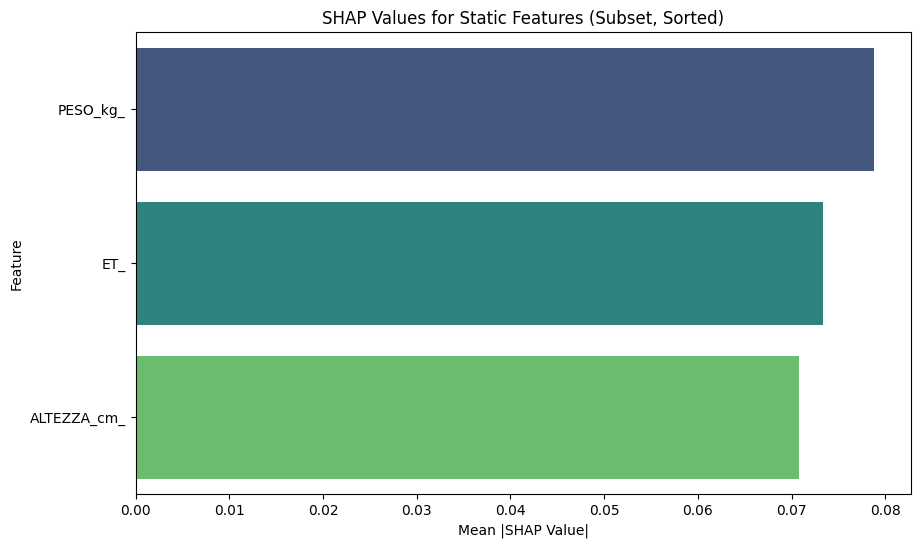

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3389366113.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


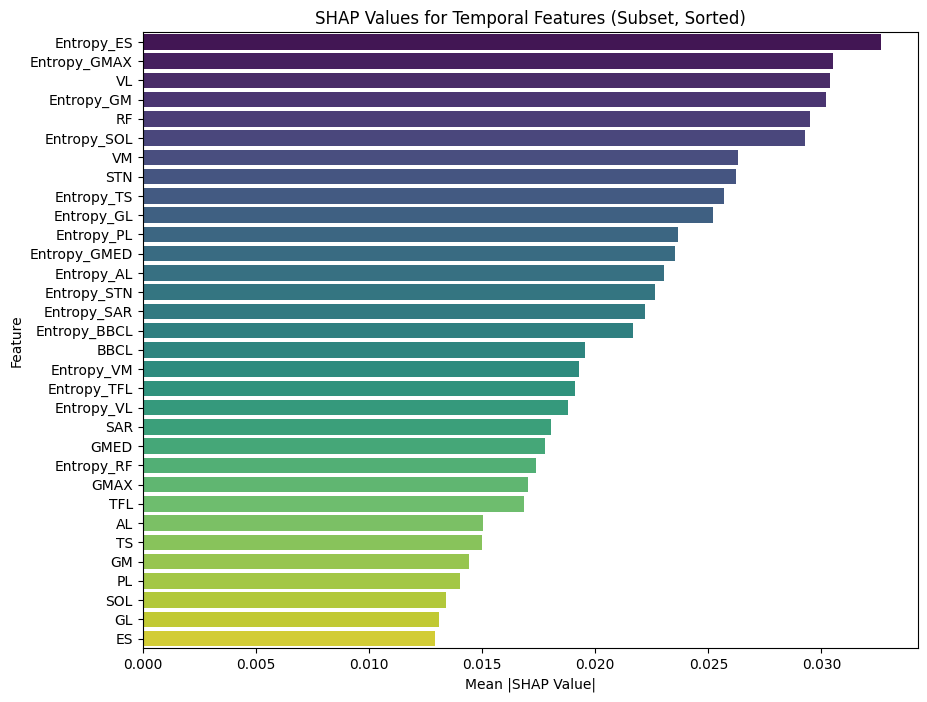

In [96]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "TerminalSwing_NORMATIVO" (classe 12) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=12, subset_size=5000)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1244514094.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


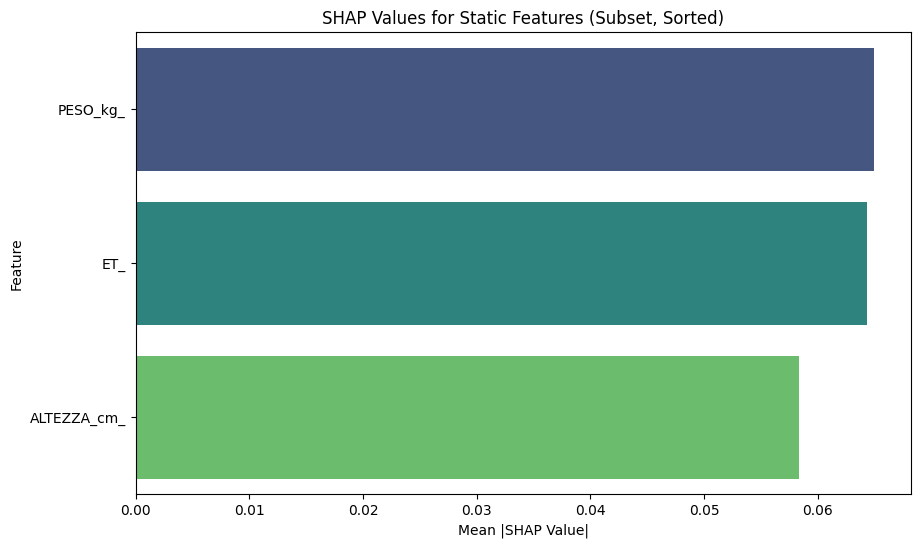

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1244514094.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


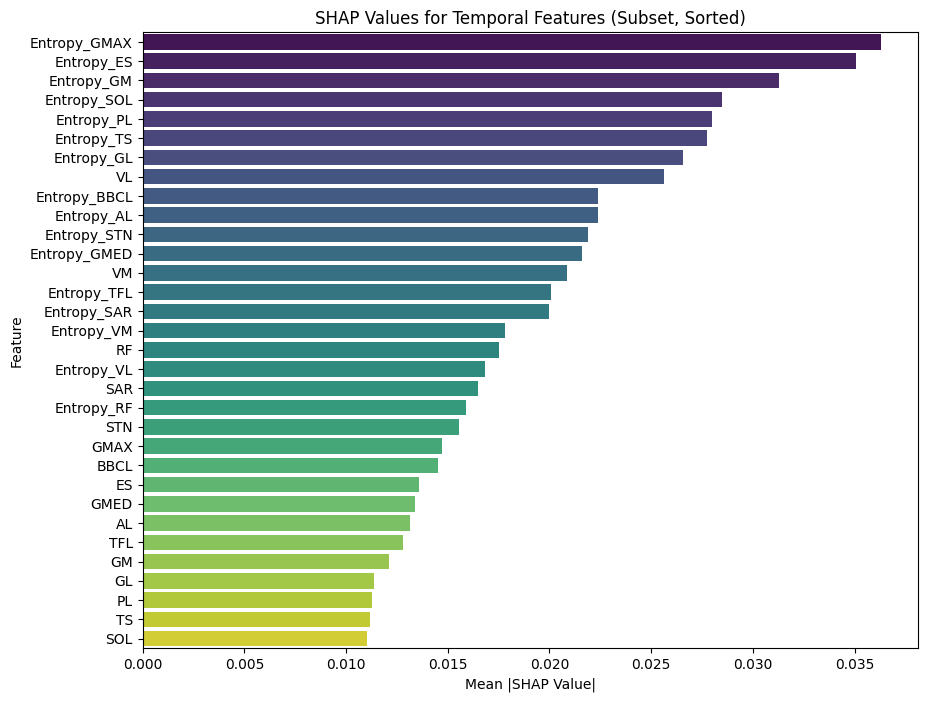

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_for_class_output1(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output1 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output1[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali (corretta selezione delle dimensioni)
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per la classe "TerminalSwing_PARAPARESI SPASTICA" (classe 13) con un subset di 5000 campioni
shap_analysis_for_class_output1(class_index=13, subset_size=5000)

# Prima di passare al secondo output proviamo a rendere realtà il grafico che voleva Mariano

testiamo terminal swing

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2660522860.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


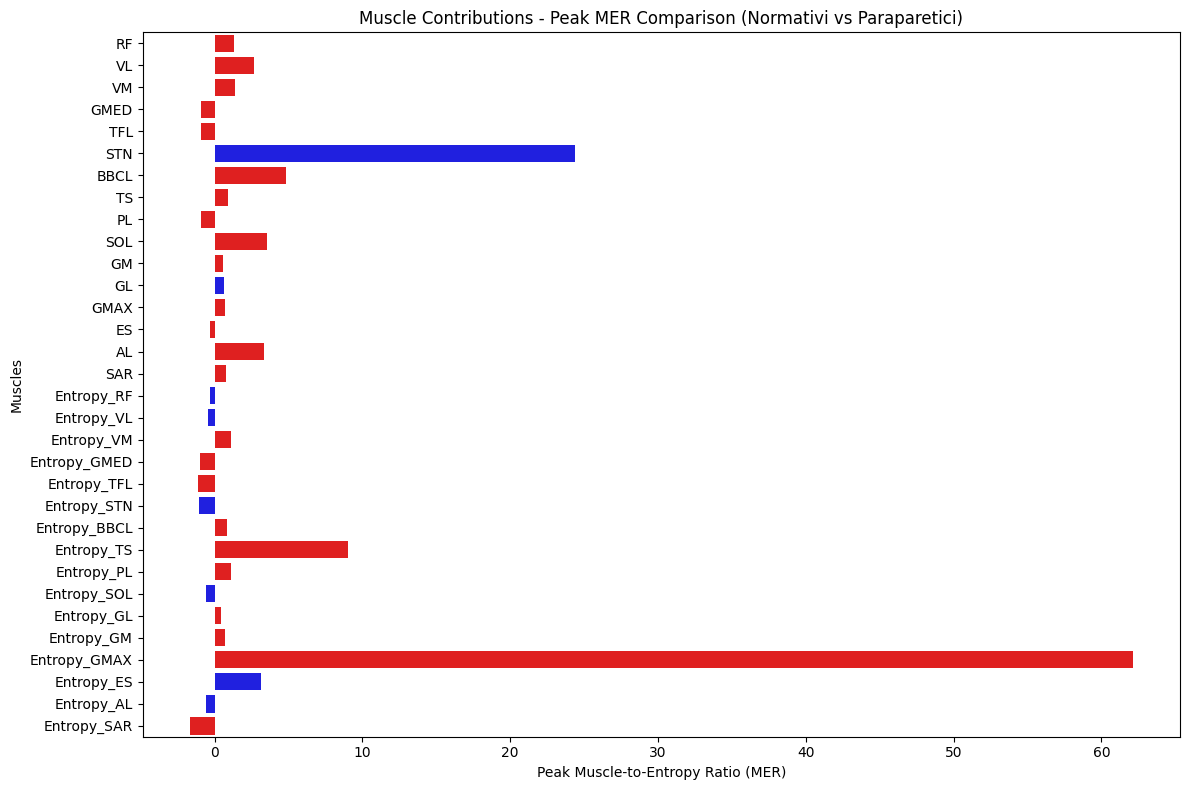

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Funzione principale per calcolare MER e generare il barplot binario
def compare_mer_peak(class_index_normativi, class_index_paraparetici, subset_size=2500):
    """
    Confronta i valori di picco dei MER tra normativi e paraparetici per una specifica fase del passo.
    """
    # Calcolo SHAP per normativi
    subset_indices_norm = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset_norm = X_test_temp[subset_indices_norm]
    X_test_static_subset_norm = X_test_static[subset_indices_norm]

    explainer_norm = shap.GradientExplainer(
        (model.input, model.output[0]),
        [X_train_temp, X_train_static]
    )

    shap_values_norm = explainer_norm.shap_values([X_test_temp_subset_norm, X_test_static_subset_norm])
    shap_values_temporal_norm = shap_values_norm[0][:, :, 0, class_index_normativi]

    # Calcolo SHAP per paraparetici
    subset_indices_para = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset_para = X_test_temp[subset_indices_para]
    X_test_static_subset_para = X_test_static[subset_indices_para]

    explainer_para = shap.GradientExplainer(
        (model.input, model.output[0]),
        [X_train_temp, X_train_static]
    )

    shap_values_para = explainer_para.shap_values([X_test_temp_subset_para, X_test_static_subset_para])
    shap_values_temporal_para = shap_values_para[0][:, :, 0, class_index_paraparetici]

    # Calcolo MER per normativi e paraparetici
    mean_shap_values_norm = np.mean(np.abs(shap_values_temporal_norm), axis=0)
    mean_shap_values_para = np.mean(np.abs(shap_values_temporal_para), axis=0)

    mer_norm = mean_shap_values_norm / np.array([np.mean(X_test_temp_subset_norm[:, i, 0]) for i in range(len(temporal_features))])
    mer_para = mean_shap_values_para / np.array([np.mean(X_test_temp_subset_para[:, i, 0]) for i in range(len(temporal_features))])

    # Creazione del confronto binario
    binary_color = []
    for muscle in range(len(temporal_features)):
        if mer_para[muscle] > mer_norm[muscle]:
            binary_color.append("red")  # Paraparetici con picco maggiore
        else:
            binary_color.append("blue")  # Normativi con picco maggiore

    # Creazione del barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=np.maximum(mer_norm, mer_para),  # Prendi il valore di picco maggiore per la lunghezza della barra
        y=temporal_features,
        palette=binary_color
    )
    plt.title("Muscle Contributions - Peak MER Comparison (Normativi vs Paraparetici)")
    plt.xlabel("Peak Muscle-to-Entropy Ratio (MER)")
    plt.ylabel("Muscles")
    plt.tight_layout()
    plt.show()

# Eseguire il confronto per Terminal Swing (Normativi: classe 12, Paraparetici: classe 13)
compare_mer_peak(class_index_normativi=12, class_index_paraparetici=13, subset_size=2500)

# MIGLIORIAMOLO IDEMOO

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2010902779.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


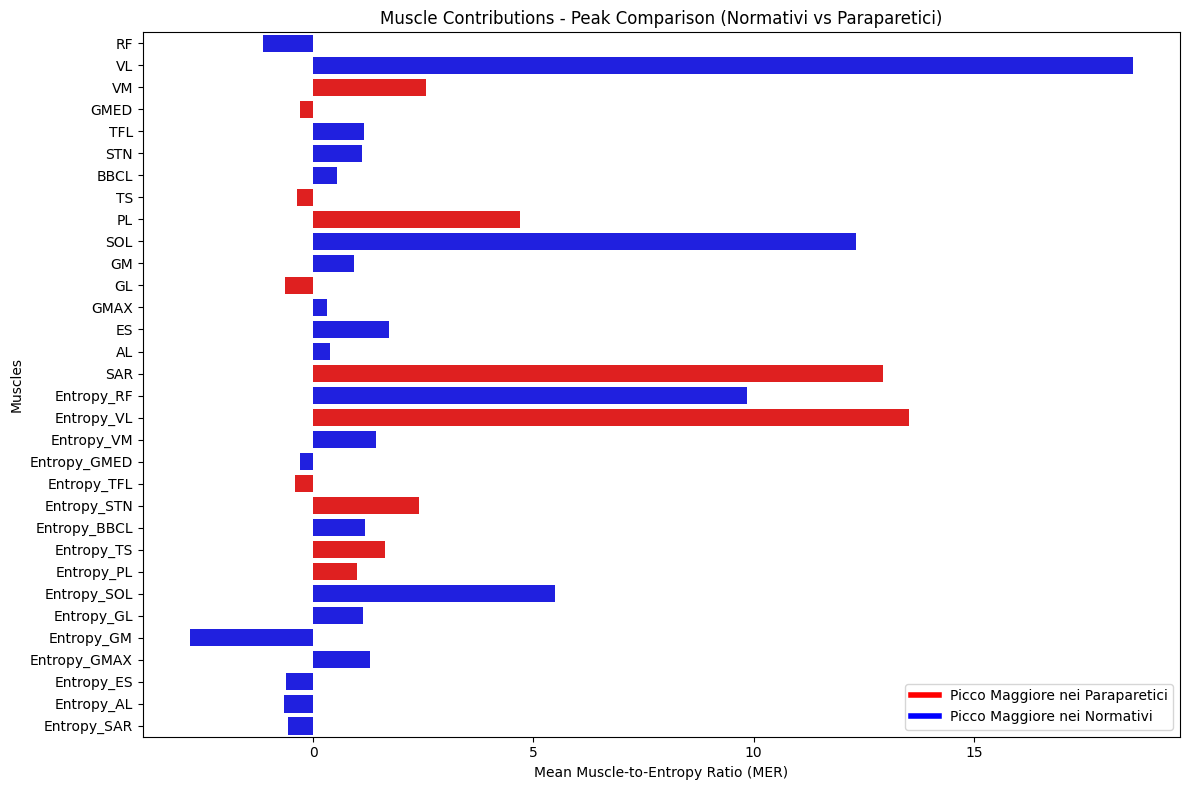

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Funzione principale per calcolare i picchi muscolari e generare il barplot binario
def compare_muscle_peak(class_index_normativi, class_index_paraparetici, subset_size=1000):
    """
    Confronta i picchi dei muscoli tra normativi e paraparetici per una specifica fase del passo.
    """
    # Calcolo SHAP per normativi
    subset_indices_norm = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset_norm = X_test_temp[subset_indices_norm]
    X_test_static_subset_norm = X_test_static[subset_indices_norm]

    explainer_norm = shap.GradientExplainer(
        (model.input, model.output[0]),
        [X_train_temp, X_train_static]
    )

    shap_values_norm = explainer_norm.shap_values([X_test_temp_subset_norm, X_test_static_subset_norm])
    shap_values_temporal_norm = shap_values_norm[0][:, :, 0, class_index_normativi]

    # Calcolo SHAP per paraparetici
    subset_indices_para = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset_para = X_test_temp[subset_indices_para]
    X_test_static_subset_para = X_test_static[subset_indices_para]

    explainer_para = shap.GradientExplainer(
        (model.input, model.output[0]),
        [X_train_temp, X_train_static]
    )

    shap_values_para = explainer_para.shap_values([X_test_temp_subset_para, X_test_static_subset_para])
    shap_values_temporal_para = shap_values_para[0][:, :, 0, class_index_paraparetici]

    # Calcolo dei picchi muscolari originali (non MER)
    peak_values_norm = np.max(X_test_temp_subset_norm[:, :, 0], axis=0)
    peak_values_para = np.max(X_test_temp_subset_para[:, :, 0], axis=0)

    # Calcolo MER per normativi e paraparetici
    mean_shap_values_norm = np.mean(np.abs(shap_values_temporal_norm), axis=0)
    mean_shap_values_para = np.mean(np.abs(shap_values_temporal_para), axis=0)

    mer_norm = mean_shap_values_norm / np.mean(X_test_temp_subset_norm, axis=0)[:, 0]
    mer_para = mean_shap_values_para / np.mean(X_test_temp_subset_para, axis=0)[:, 0]

    # Determina i colori in base ai picchi muscolari originali
    bar_colors = []
    for muscle in range(len(temporal_features)):
        if peak_values_para[muscle] > peak_values_norm[muscle]:
            bar_colors.append("red")  # Paraparetici con picco maggiore
        else:
            bar_colors.append("blue")  # Normativi con picco maggiore

    # Creazione del barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=np.maximum(mer_norm, mer_para),  # Prendi il valore massimo per la lunghezza della barra
        y=temporal_features,
        palette=bar_colors
    )
    plt.title("Muscle Contributions - Peak Comparison (Normativi vs Paraparetici)")
    plt.xlabel("Mean Muscle-to-Entropy Ratio (MER)")
    plt.ylabel("Muscles")
    plt.legend(handles=[
        plt.Line2D([0], [0], color='red', lw=4, label='Picco Maggiore nei Paraparetici'),
        plt.Line2D([0], [0], color='blue', lw=4, label='Picco Maggiore nei Normativi')
    ], loc='lower right')
    plt.tight_layout()
    plt.show()

# Eseguire il confronto per Terminal Swing (Normativi: classe 12, Paraparetici: classe 13)
compare_muscle_peak(class_index_normativi=12, class_index_paraparetici=13, subset_size=1000)

Cosa fa il codice
Filtra solo i muscoli dalla lista delle feature.
Calcola i valori medi di SHAP assoluti (modulo) per normativi e paraparetici.
Calcola il rapporto MER.
Confronta i valori di picco dei muscoli originali (non MER) tra normativi e paraparetici.
Colora le barre: rosso per i muscoli con picco maggiore nei paraparetici, blu per i normativi.
Ordina le barre dalla più grande alla più piccola.
Genera un grafico leggibile per i medici con direzioni uniformi.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1049014189.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1049014189.py:60: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


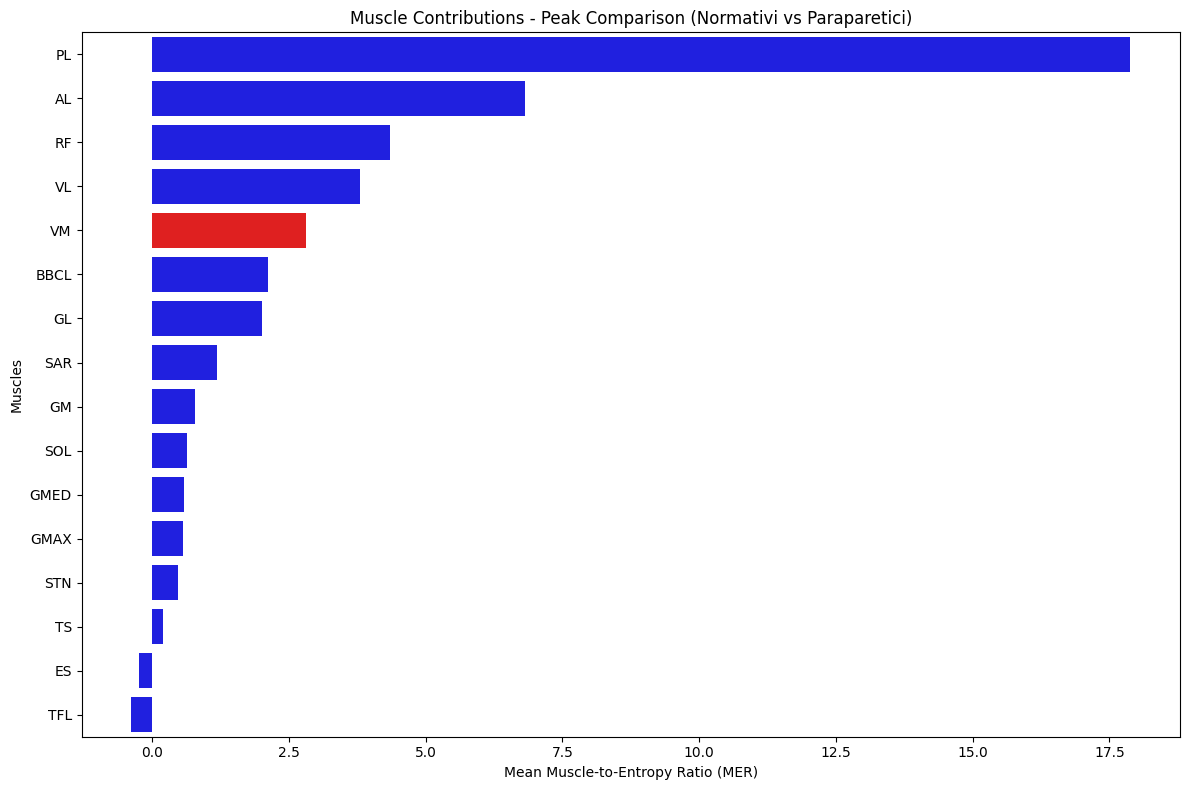

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

def plot_peak_mer_comparison(class_index_normativi, class_index_paraparetici, subset_size=1000):
    """
    Confronta i valori di picco dei muscoli tra normativi e paraparetici.
    """
    # Filtrare solo i muscoli (senza entropie)
    muscle_features = ['RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL', 'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR']
    muscle_indices = [i for i, feature in enumerate(temporal_features) if feature in muscle_features]

    # Calcolo SHAP per normativi
    subset_indices_norm = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset_norm = X_test_temp[subset_indices_norm]
    X_test_static_subset_norm = X_test_static[subset_indices_norm]

    explainer_norm = shap.GradientExplainer(
        (model.input, model.output[0]),
        [X_train_temp, X_train_static]
    )

    shap_values_norm = explainer_norm.shap_values([X_test_temp_subset_norm, X_test_static_subset_norm])
    shap_values_temporal_norm = shap_values_norm[0][:, :, 0, class_index_normativi]

    # Calcolo SHAP per paraparetici
    subset_indices_para = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset_para = X_test_temp[subset_indices_para]
    X_test_static_subset_para = X_test_static[subset_indices_para]

    explainer_para = shap.GradientExplainer(
        (model.input, model.output[0]),
        [X_train_temp, X_train_static]
    )

    shap_values_para = explainer_para.shap_values([X_test_temp_subset_para, X_test_static_subset_para])
    shap_values_temporal_para = shap_values_para[0][:, :, 0, class_index_paraparetici]

    # Calcolo MER per normativi e paraparetici
    mean_shap_values_norm = np.mean(np.abs(shap_values_temporal_norm), axis=0)[muscle_indices]
    mean_shap_values_para = np.mean(np.abs(shap_values_temporal_para), axis=0)[muscle_indices]

    mer_norm = mean_shap_values_norm / np.array([np.mean(X_test_temp_subset_norm[:, i, 0]) for i in muscle_indices])
    mer_para = mean_shap_values_para / np.array([np.mean(X_test_temp_subset_para[:, i, 0]) for i in muscle_indices])

    # Confronto binario in base al picco del muscolo
    binary_color = ['red' if np.max(X_test_temp_subset_para[:, i, 0]) > np.max(X_test_temp_subset_norm[:, i, 0]) else 'blue'
                    for i in muscle_indices]

    # Ordinare le barre dalla più grande alla più piccola
    sorted_indices = np.argsort(np.maximum(mer_norm, mer_para))[::-1]
    sorted_muscle_features = np.array(muscle_features)[sorted_indices]
    sorted_mer = np.maximum(mer_norm, mer_para)[sorted_indices]
    sorted_colors = np.array(binary_color)[sorted_indices]

    # Creazione del barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=sorted_mer,
        y=sorted_muscle_features,
        palette=sorted_colors
    )
    plt.title("Muscle Contributions - Peak Comparison (Normativi vs Paraparetici)")
    plt.xlabel("Mean Muscle-to-Entropy Ratio (MER)")
    plt.ylabel("Muscles")
    plt.tight_layout()
    plt.show()

# Eseguire il confronto per Terminal Swing (Normativi: classe 12, Paraparetici: classe 13)
plot_peak_mer_comparison(class_index_normativi=12, class_index_paraparetici=13, subset_size=1000)

# PASSIAMO A OUTPUT 2

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2081180151.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


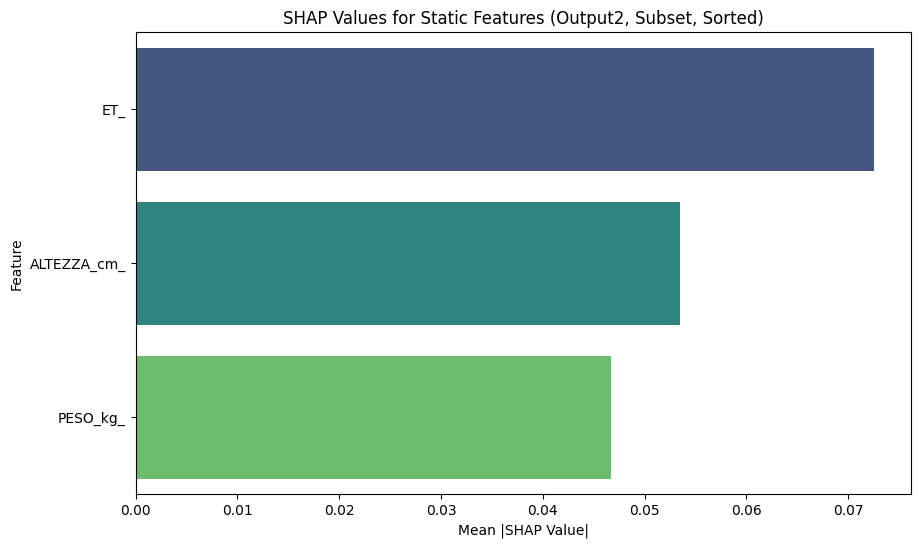

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2081180151.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


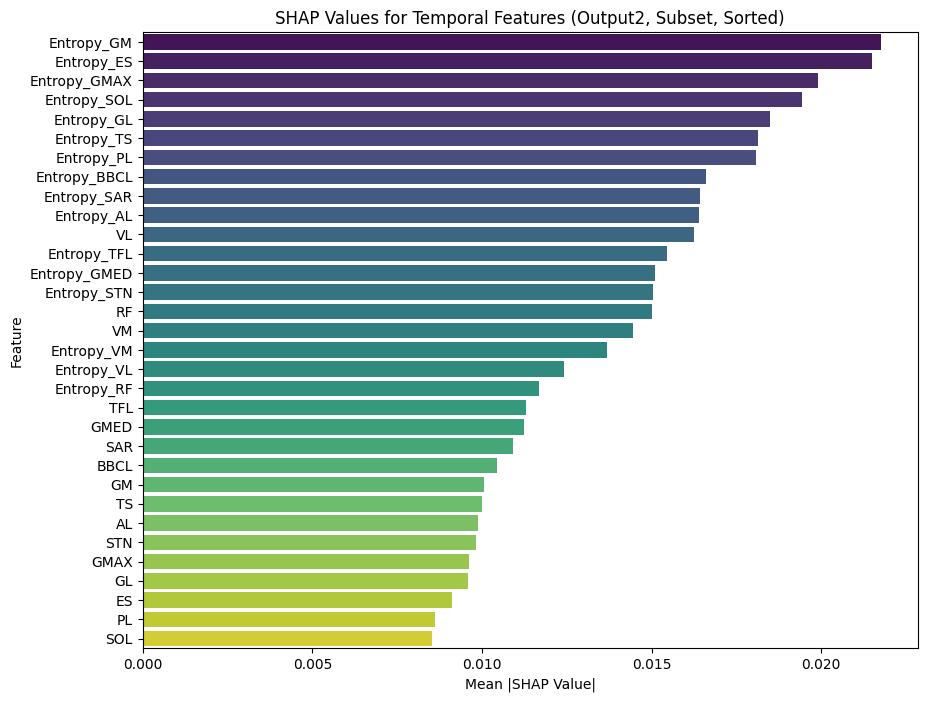

In [98]:
def shap_analysis_for_class_output2(class_index, subset_size=5000):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2, ad esempio "InitialSwing_1" (classe 0)
shap_analysis_for_class_output2(class_index=0, subset_size=5000)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3666229677.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


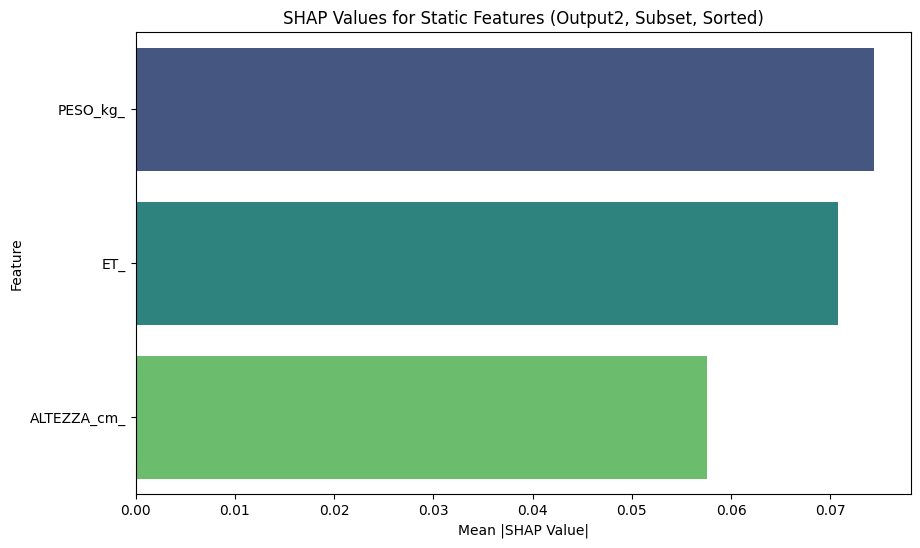

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3666229677.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


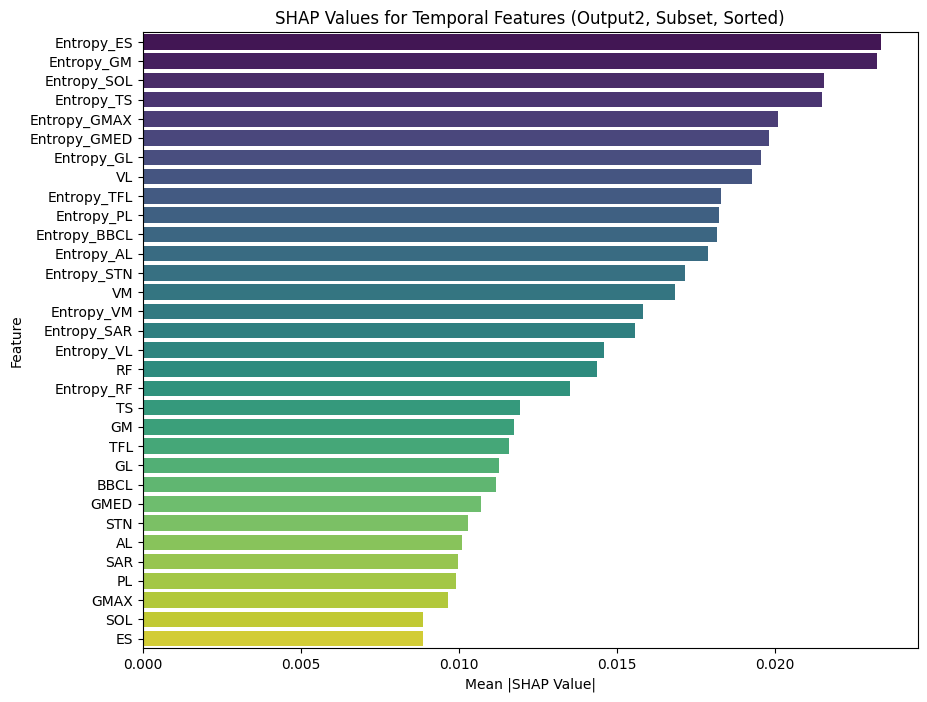

In [99]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "InitialSwing_2" (classe 1)
shap_analysis_for_class_output2(class_index=1, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1267365585.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


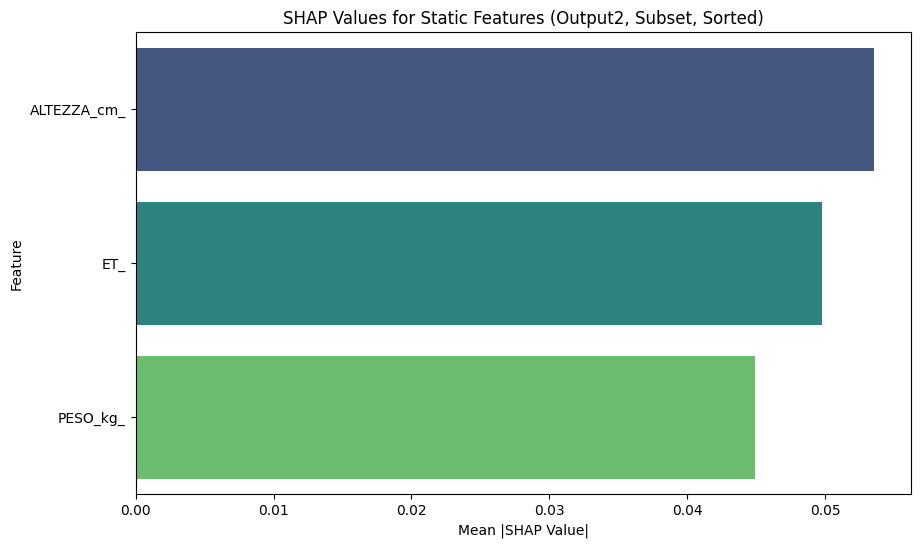

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1267365585.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


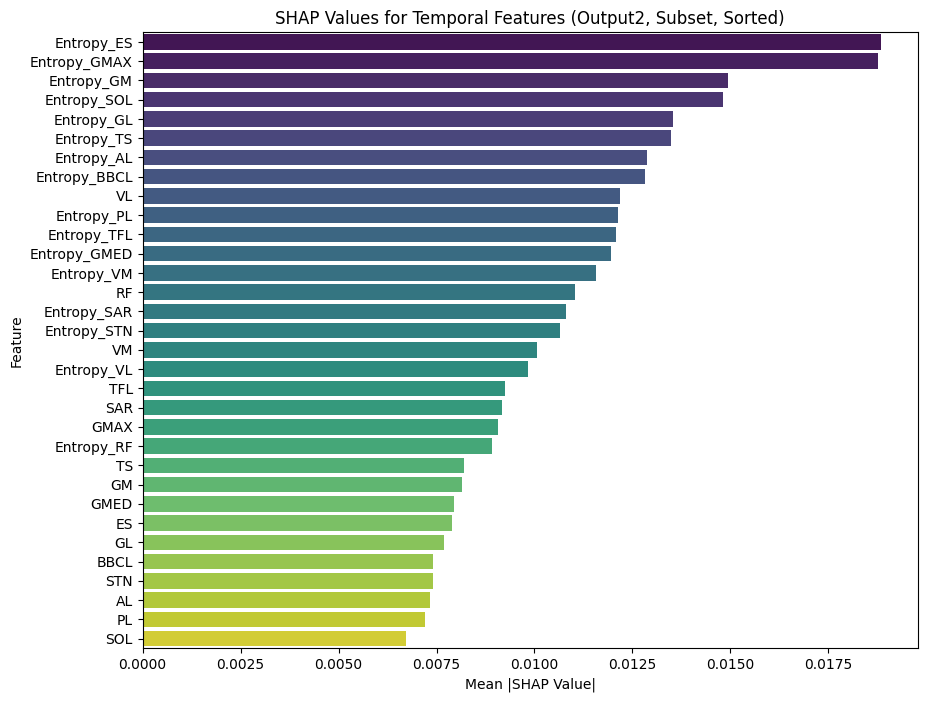

In [100]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "InitialSwing_3" (classe 2)
shap_analysis_for_class_output2(class_index=2, subset_size=2500)

Commento Clinico e Biomeccanico sui Risultati (Initial Swing per Stadiazioni SP)
Analisi Clinica:

L’Initial Swing è una fase fondamentale per l’accelerazione del piede durante il ciclo del passo. Analizzando i grafici delle entropie muscolari e i valori SHAP associati alle stadiazioni 1 (grave), 2 (moderata), e 3 (lieve), emergono differenze marcate nei muscoli principali coinvolti e nell’attivazione muscolare (entropie).

Stadiazione Grave (SP1):
Entropie GM e ES: Sono le caratteristiche più impattanti. Questo è clinicamente rilevante perché indica una compensazione importante da parte del Gastrocnemio Mediale (GM) e degli Erettori Spinali (ES) per stabilizzare il tronco e favorire il controllo dinamico del passo. Nei pazienti con compromissione grave, l’instabilità rende questi muscoli dominanti per evitare il rischio di caduta.
Entropia GMAX: Il contributo elevato del Grande Gluteo (GMAX) conferma il tentativo di sostenere l’accelerazione iniziale nonostante un’inefficienza neuromuscolare sistemica.
Stadiazione Moderata (SP2):
La ridistribuzione delle entropie si osserva con valori meno concentrati nei GM e ES e un aumento relativo in muscoli come il Tibiale Anteriore (SOL) e il Plantare Laterale (PL). Ciò indica una maggiore efficienza del sistema muscoloscheletrico, dove si nota un utilizzo più bilanciato del sistema per avviare lo swing.
Entropia TS: L’incremento del contributo del Tibiale Superiore (TS) suggerisce che i soggetti moderati riescono a migliorare l’oscillazione pur mantenendo compensazioni meno marcate rispetto alla stadiazione grave.
Stadiazione Lieve (SP3):
Le entropie più distribuite suggeriscono un miglioramento globale della funzionalità. Muscoli come Gastrocnemio Laterale (GL) e GMAX mostrano ancora rilevanza, ma l’equilibrio tra i muscoli posturali e quelli della propulsione è più evidente. La diminuzione del carico compensatorio sugli Erettori Spinali (ES) riflette un miglioramento del controllo posturale.
Riduzione Entropia AL e SAR: Il contributo meno marcato del Sartorio (SAR) e Adduttore Lungo (AL) è clinicamente coerente con un modello di cammino più naturale e meno “rigido.”
Analisi Biomeccanica:

La biomeccanica del cammino nei pazienti SP si altera progressivamente con la gravità della patologia. Dai grafici emerge:

Stadiazione Grave (SP1): I pazienti in SP1 mostrano un pattern altamente compensatorio, evidenziato dal ruolo dominante dei muscoli stabilizzatori del tronco e dell’arto inferiore prossimale. Questo compromette la fluidità dell’oscillazione e spiega l’elevata instabilità durante l’inizio dello swing.
Stadiazione Moderata (SP2): In SP2, si osserva un coinvolgimento più significativo di muscoli responsabili del movimento del piede, come il SOL e il TS. Questo implica un parziale recupero del controllo neuromuscolare con una minore necessità di compensazioni posturali.
Stadiazione Lieve (SP3): Nei pazienti con SP lieve, l’Initial Swing si avvicina a un pattern normativo, con una partecipazione equilibrata dei muscoli del piede e della gamba. La riduzione dell’entropia nei muscoli prossimali indica una maggiore efficienza biomeccanica.
Differenze e Punti in Comune:

Differenze: Nei pazienti con SP grave, il carico compensatorio su muscoli come il GM e il GMAX è marcato, mentre nelle stadiazioni più lievi si nota un contributo muscolare distribuito e fisiologico.
Punti in Comune: In tutte le stadiazioni, muscoli come il GM e il ES restano fondamentali per la stabilità, ma il loro impatto varia con la gravità della patologia.

# LOADING RESPONSE (1 vs 2 vs 3)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1491668422.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


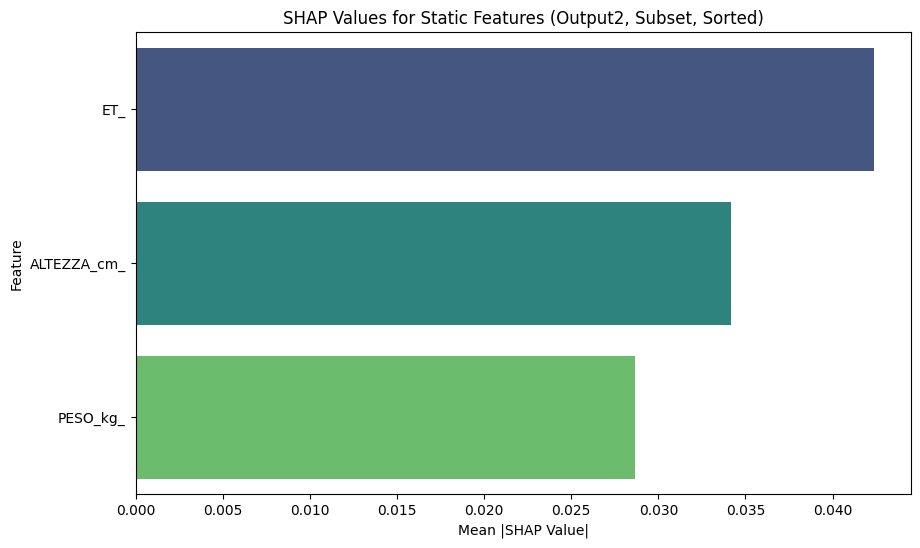

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1491668422.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


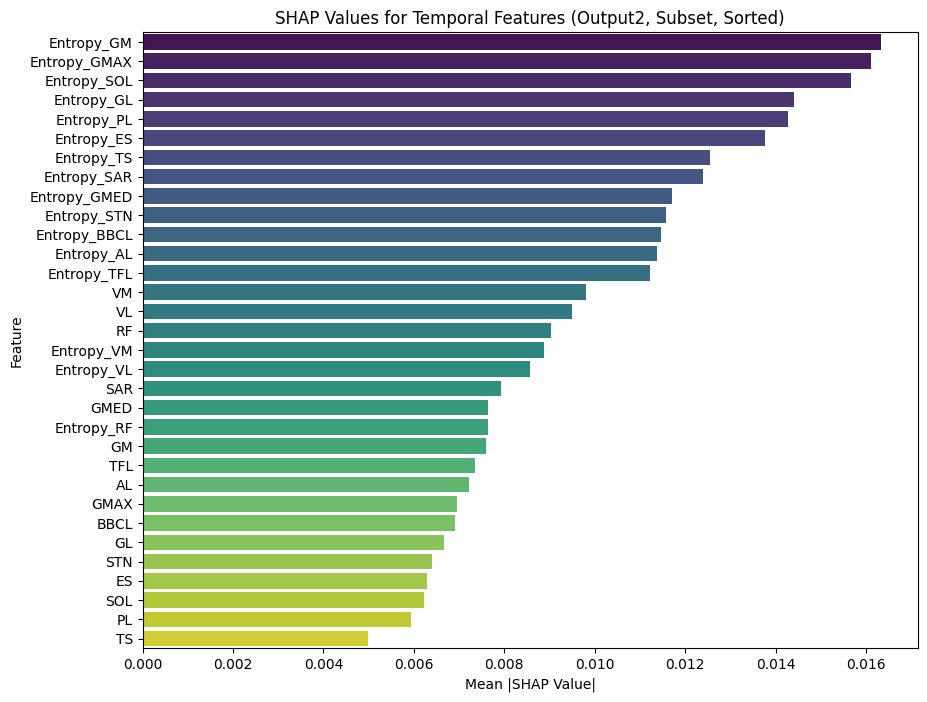

In [101]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "LoadingResponse_1" (classe 4)
shap_analysis_for_class_output2(class_index=4, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1640407564.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


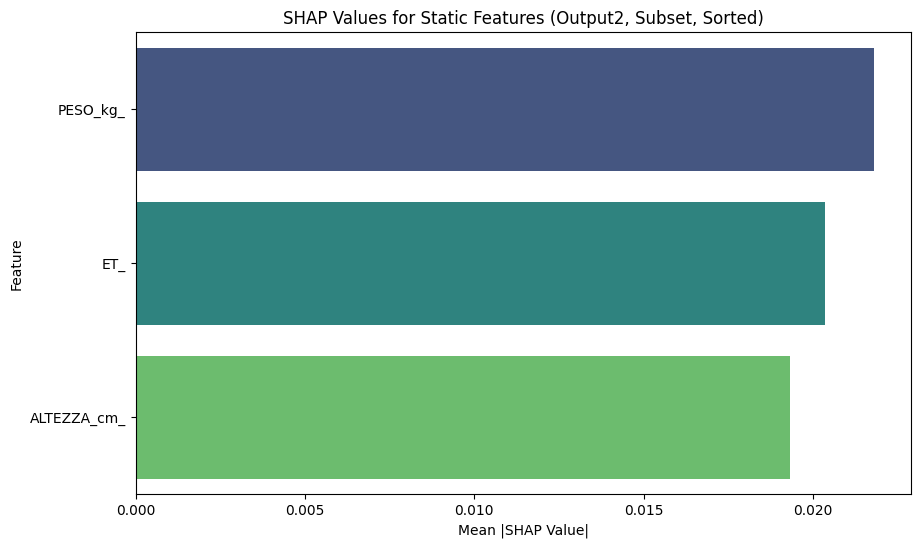

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1640407564.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


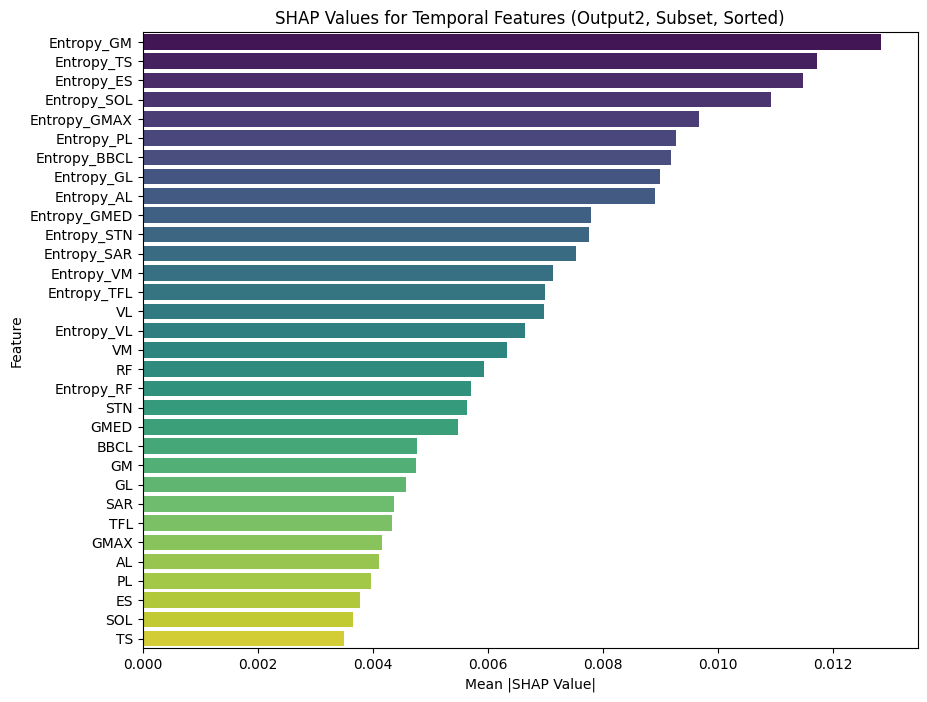

In [102]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "LoadingResponse_2" (classe 5)
shap_analysis_for_class_output2(class_index=5, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/592221212.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


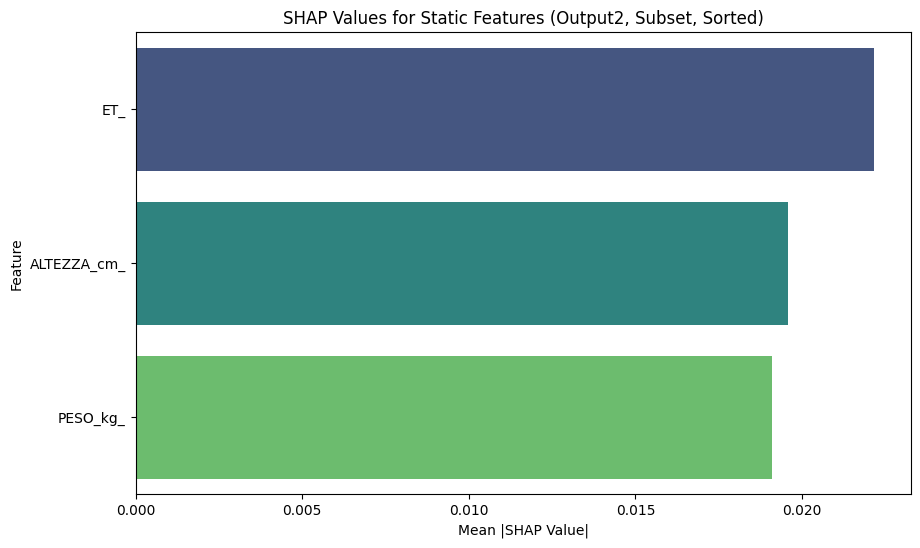

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/592221212.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


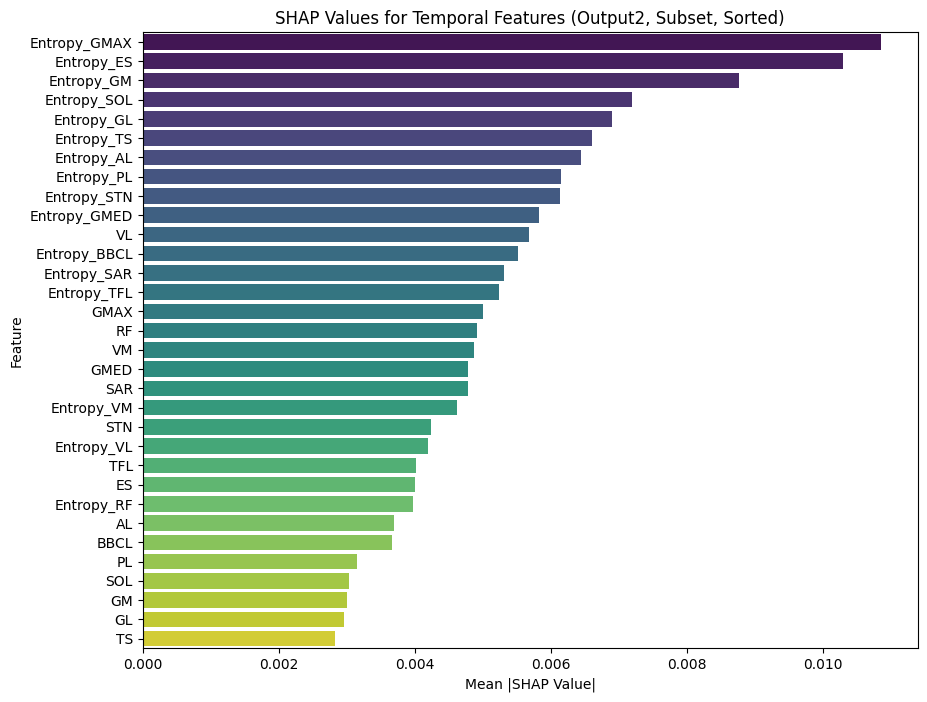

In [103]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "LoadingResponse_3" (classe 6)
shap_analysis_for_class_output2(class_index=6, subset_size=2500)

# MIDSTANCE 1 vs 2 vs 3

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/213203950.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


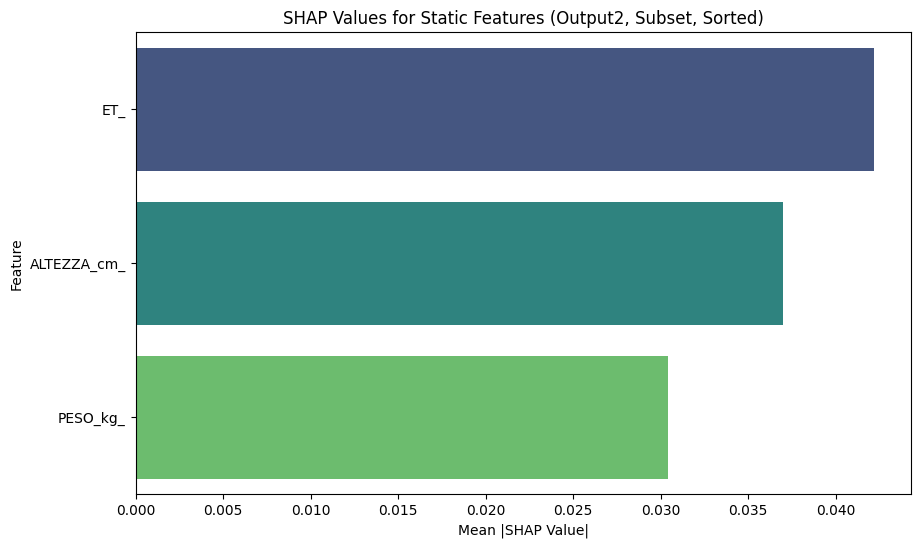

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/213203950.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


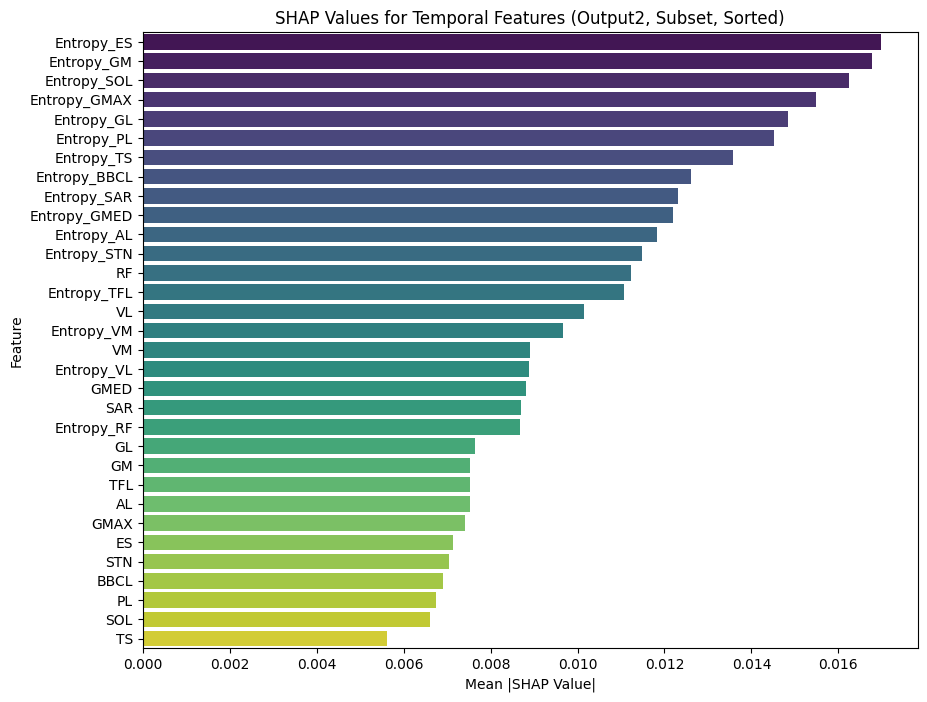

In [111]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "MidStance_1" (classe 8)
shap_analysis_for_class_output2(class_index=8, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2604180424.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


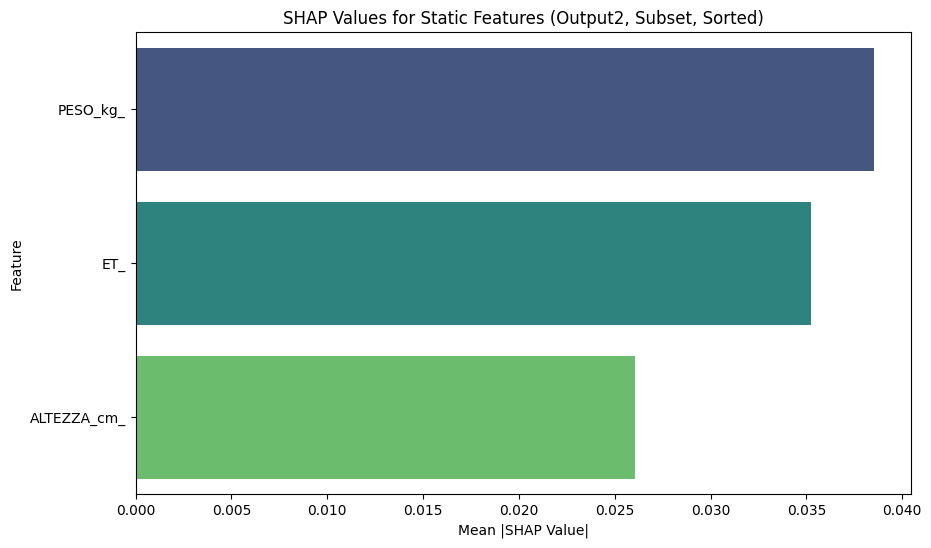

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2604180424.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


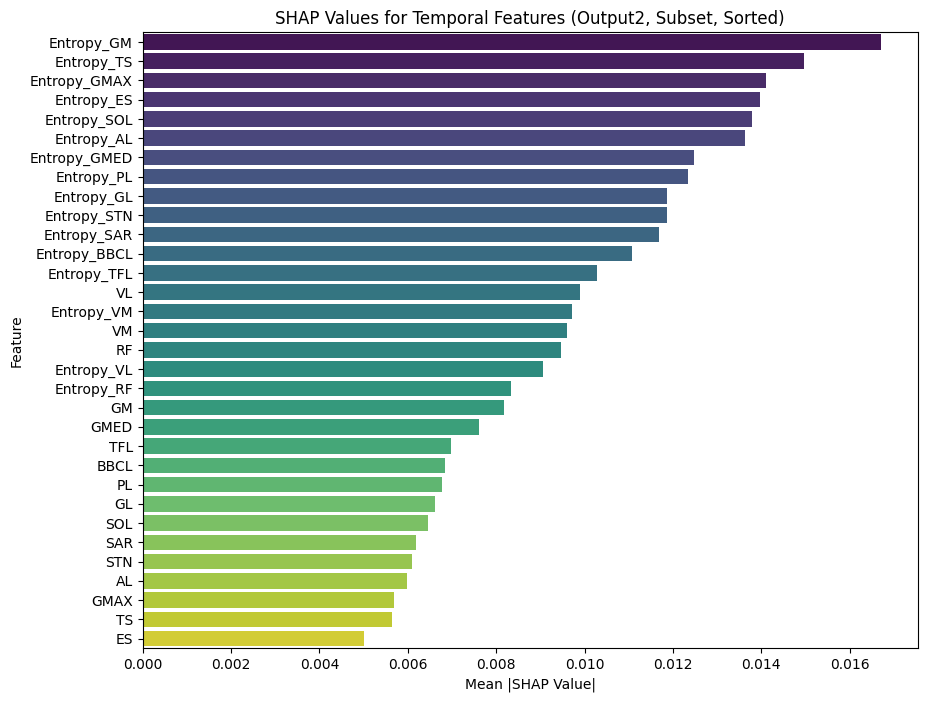

In [112]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "MidStance_2" (classe 9)
shap_analysis_for_class_output2(class_index=9, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/989611511.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


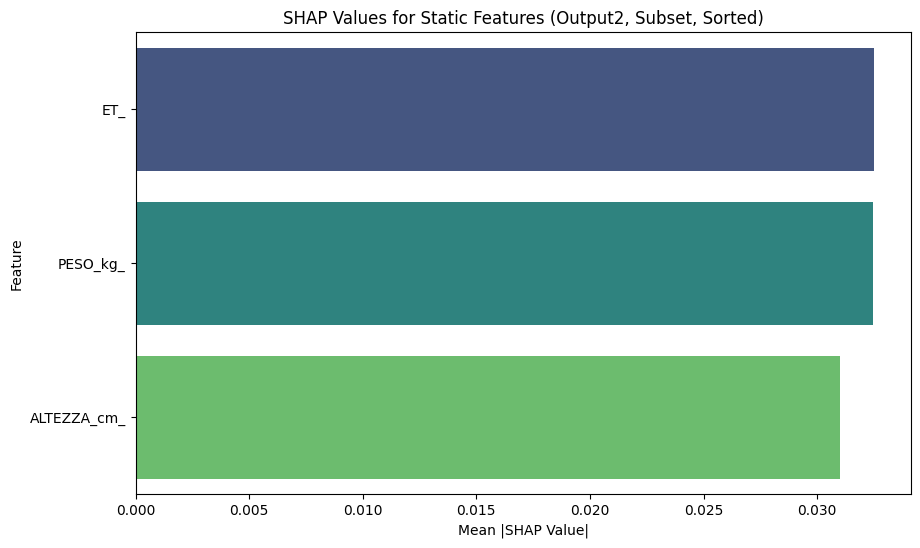

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/989611511.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


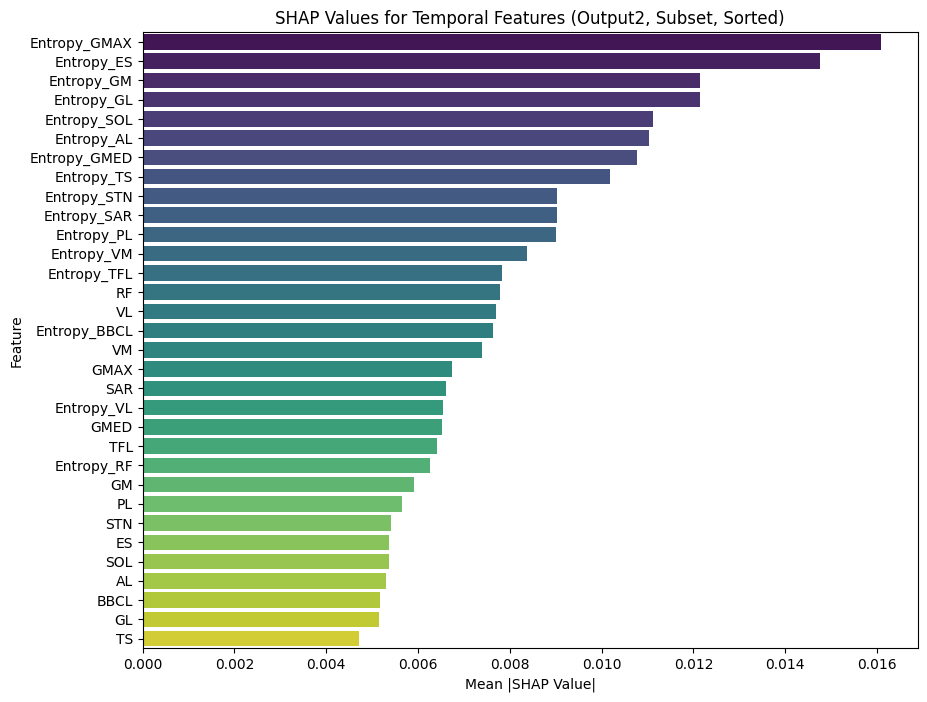

In [113]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "MidStance_3" (classe 10)
shap_analysis_for_class_output2(class_index=10, subset_size=2500)

# MIDSWING (1 vs 2 vs 3)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/235363475.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


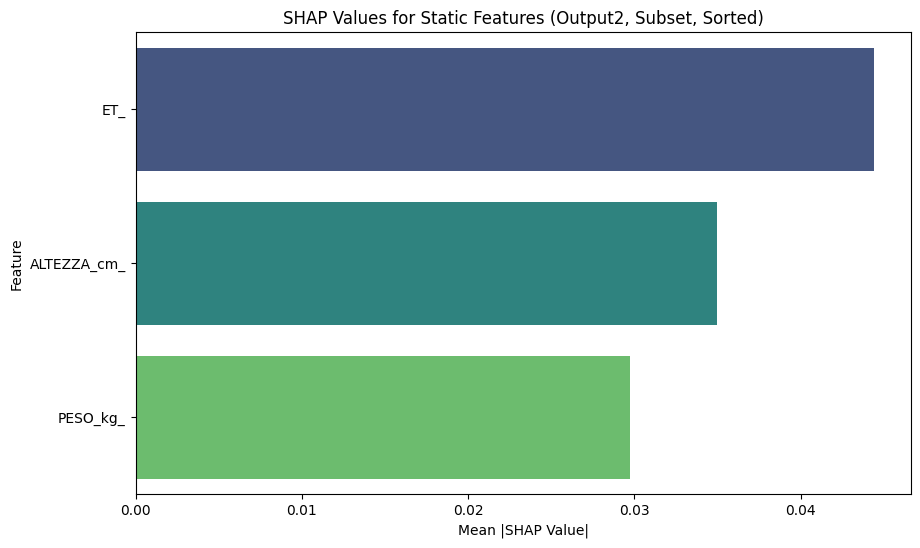

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/235363475.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


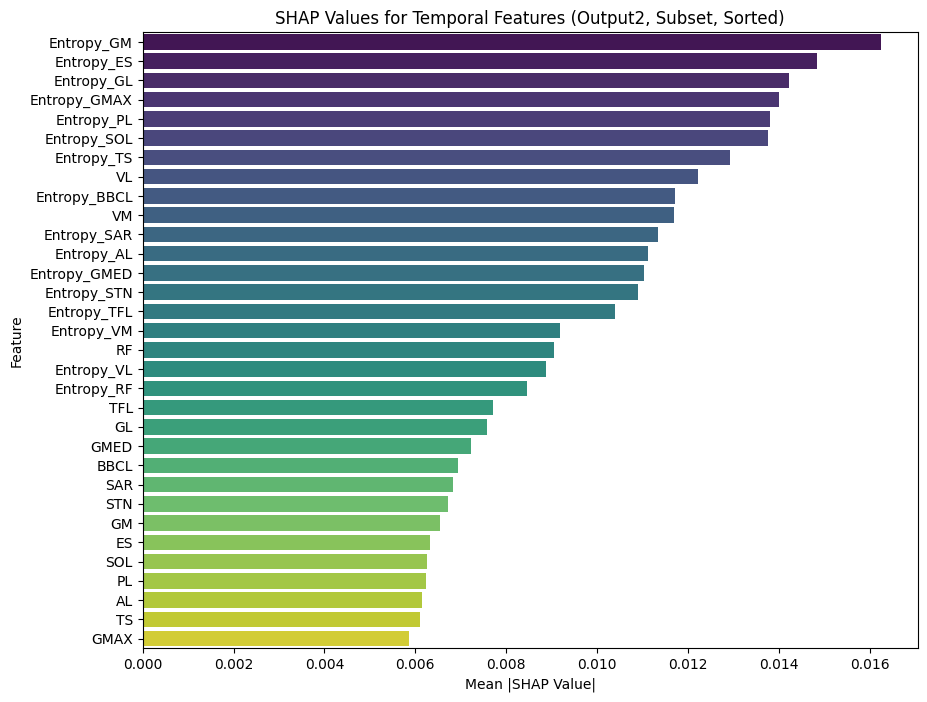

In [108]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "MidSwing_1" (classe 12)
shap_analysis_for_class_output2(class_index=12, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3685131686.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


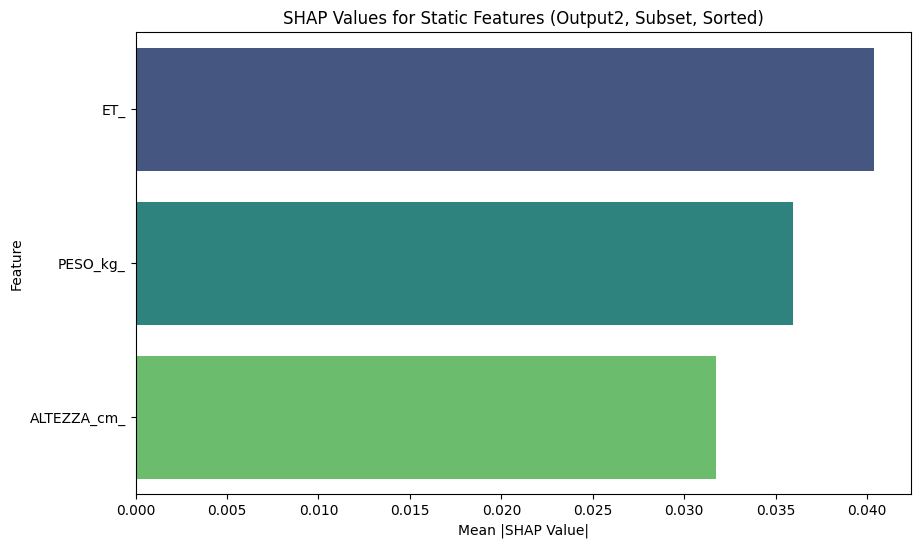

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3685131686.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


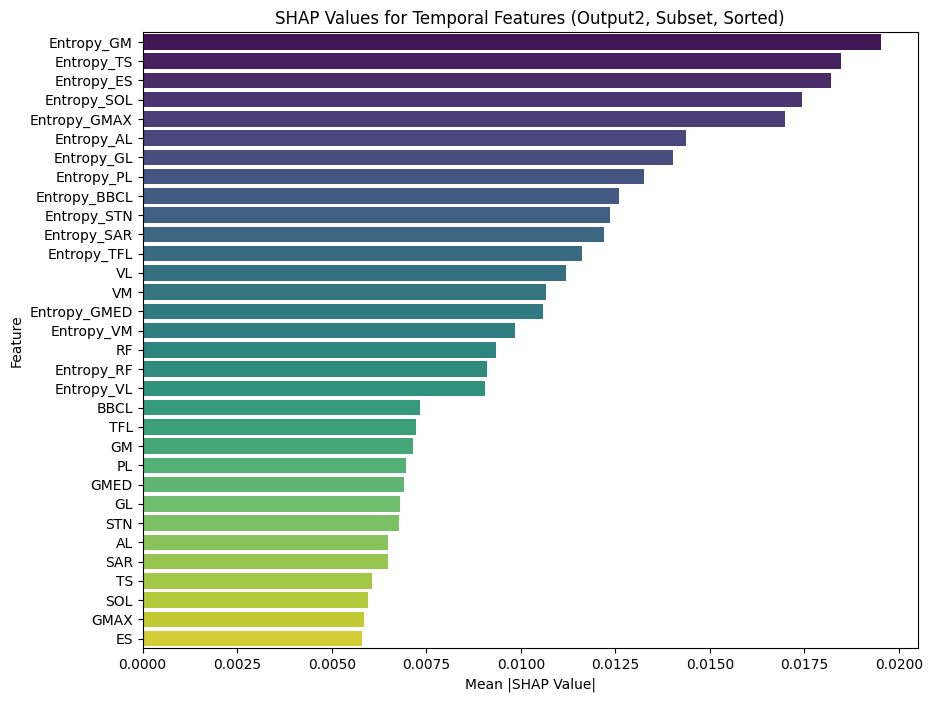

In [110]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "MidSwing_2" (classe 13)
shap_analysis_for_class_output2(class_index=13, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/17369859.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


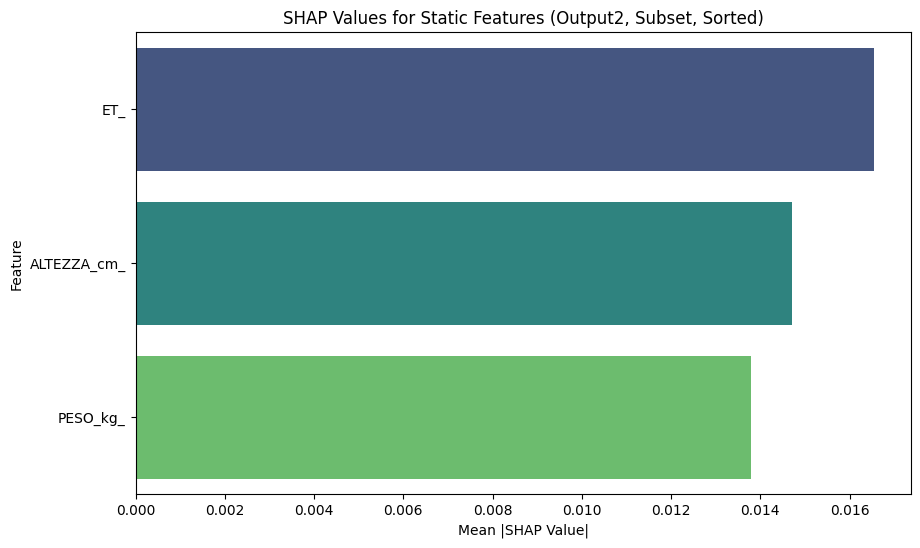

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/17369859.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


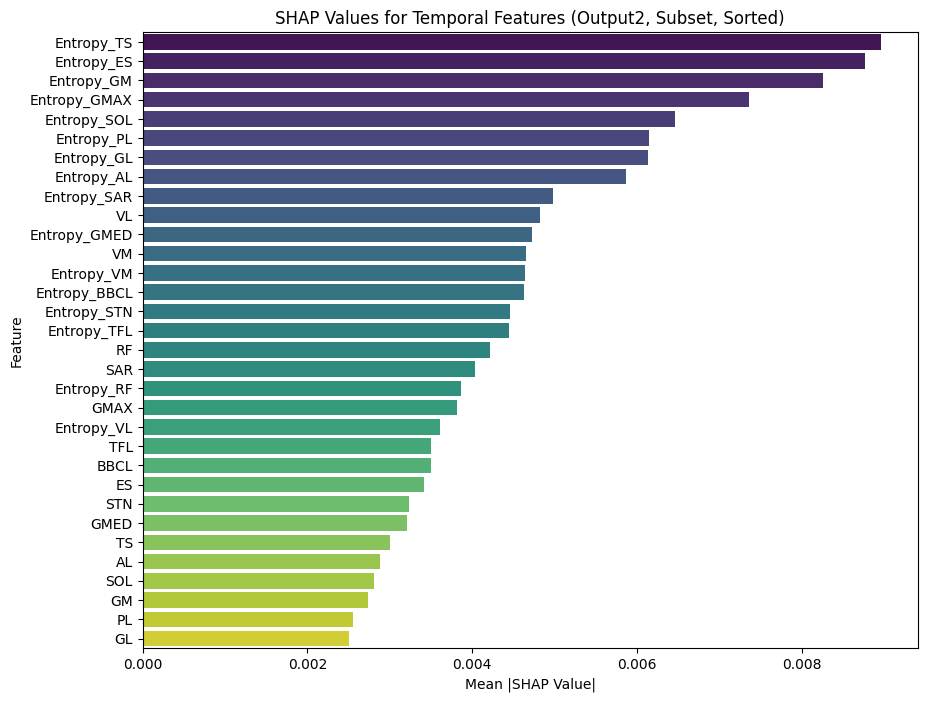

In [109]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "MidSwing_3" (classe 14)
shap_analysis_for_class_output2(class_index=14, subset_size=2500)

# PRESWING (1 vs 2 vs 3)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2926973218.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


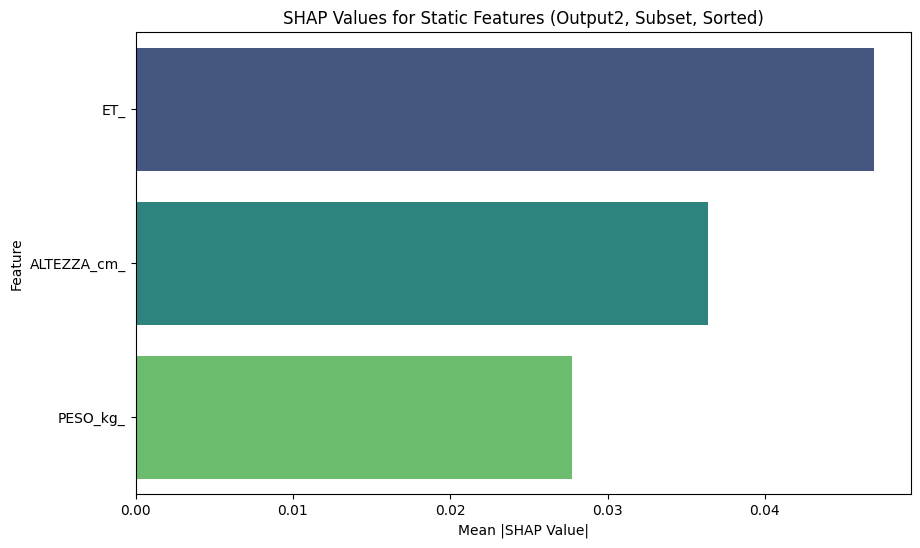

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/2926973218.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


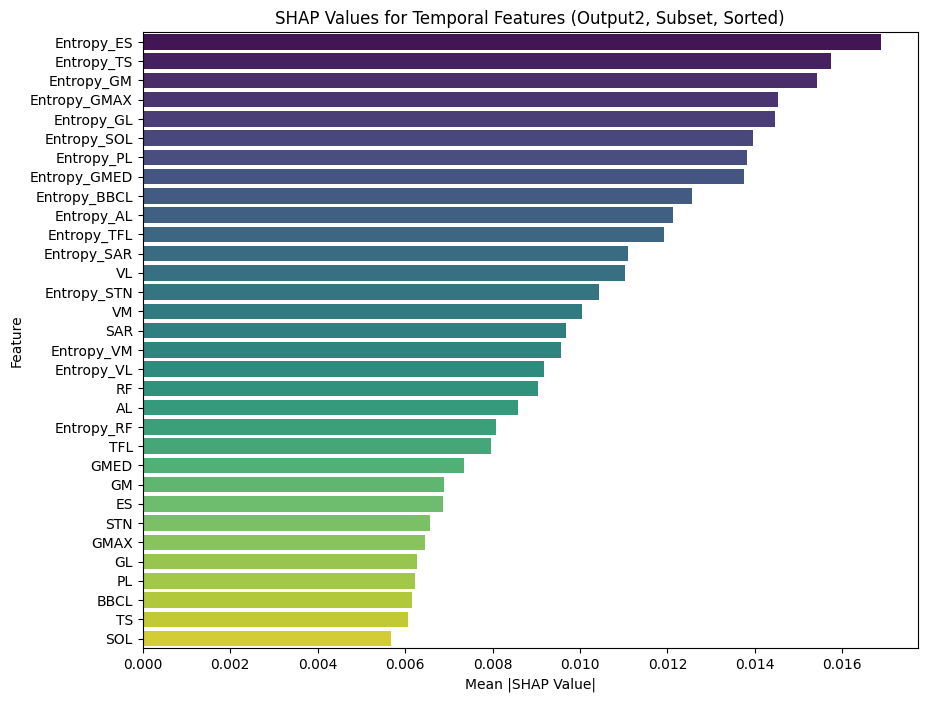

In [114]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "PreSwing_1" (classe 16)
shap_analysis_for_class_output2(class_index=16, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/992301671.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


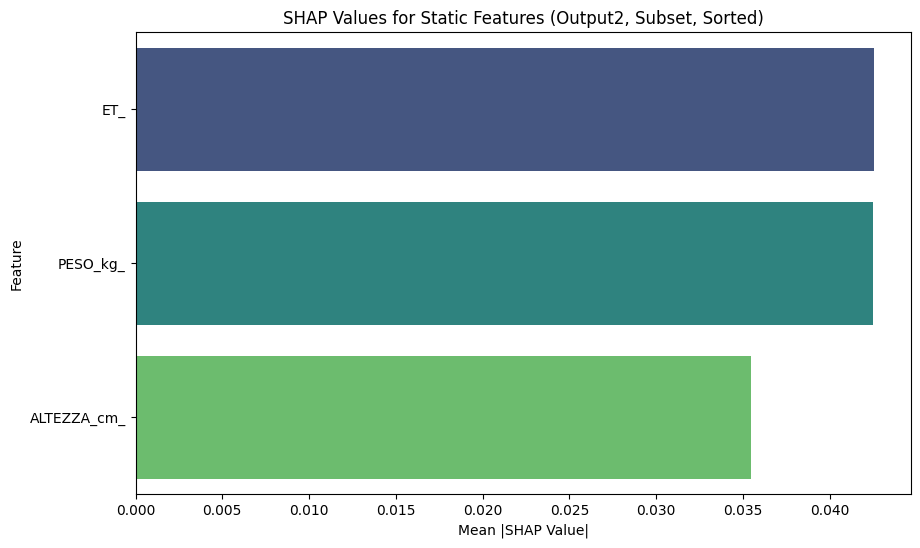

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/992301671.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


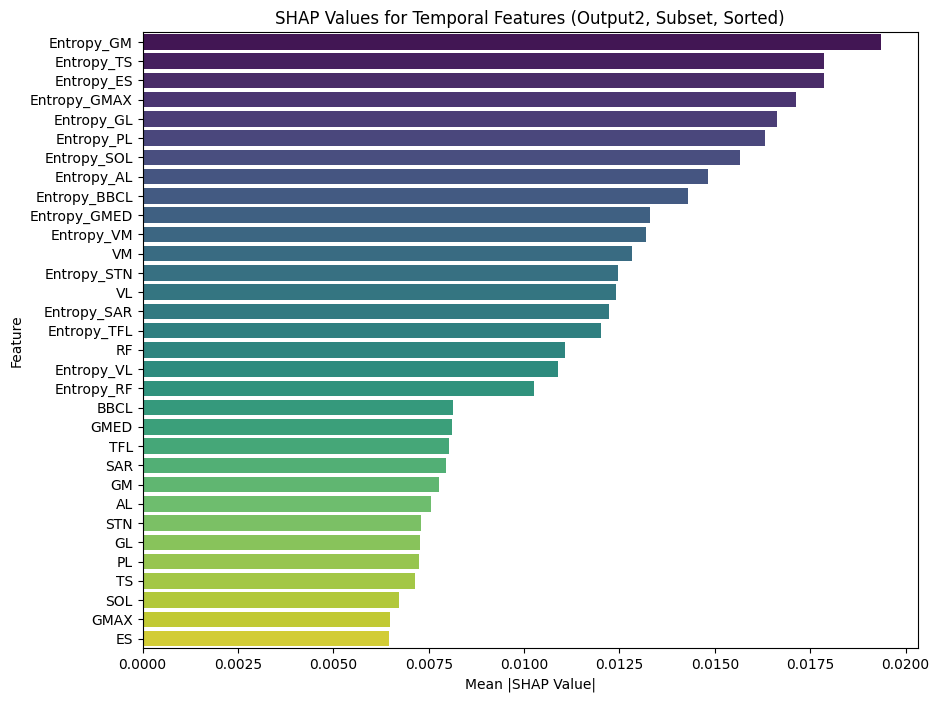

In [115]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "PreSwing_2" (classe 17)
shap_analysis_for_class_output2(class_index=17, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/582777197.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


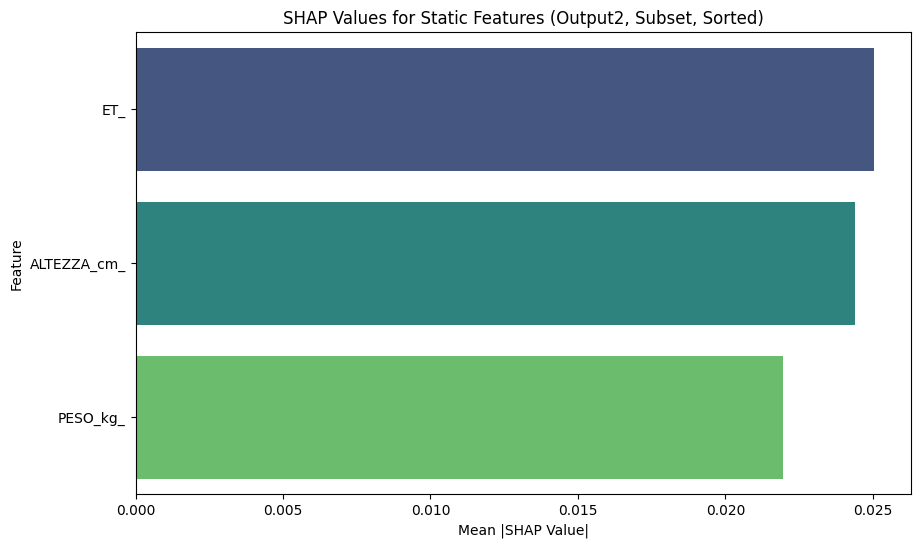

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/582777197.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


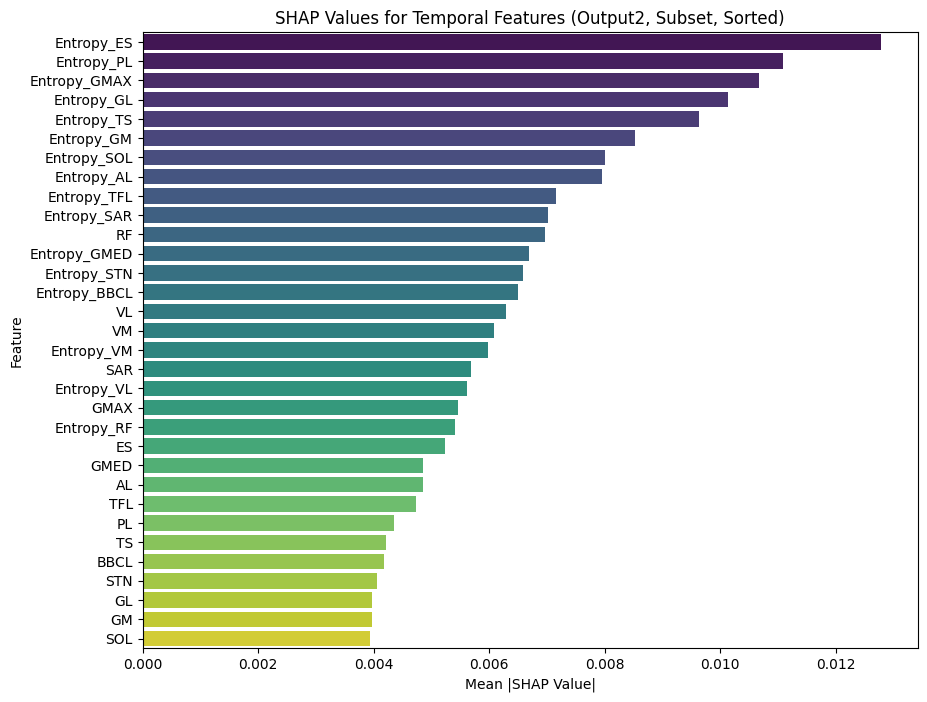

In [116]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "PreSwing_3" (classe 18)
shap_analysis_for_class_output2(class_index=18, subset_size=2500)

# TERMINAL STANCE (1 vs 2 vs 3)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/709096178.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


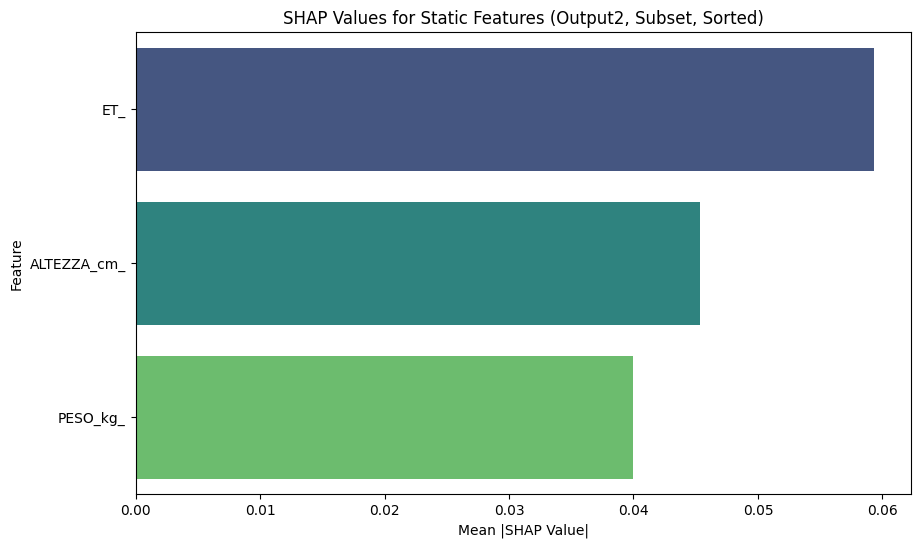

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/709096178.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


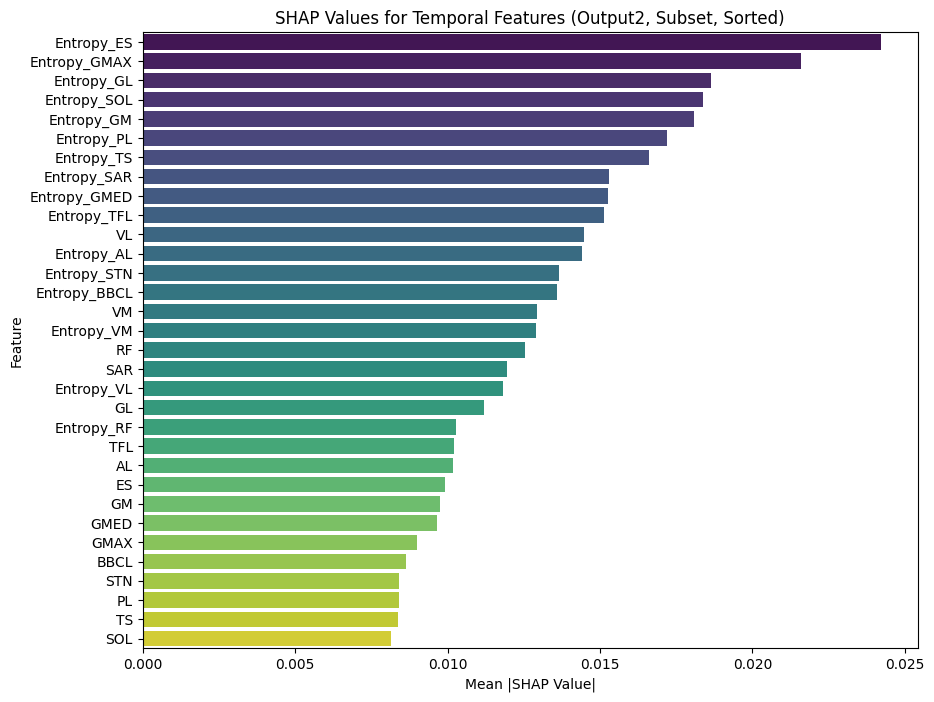

In [117]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "TerminalStance_1" (classe 20)
shap_analysis_for_class_output2(class_index=20, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1189322693.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


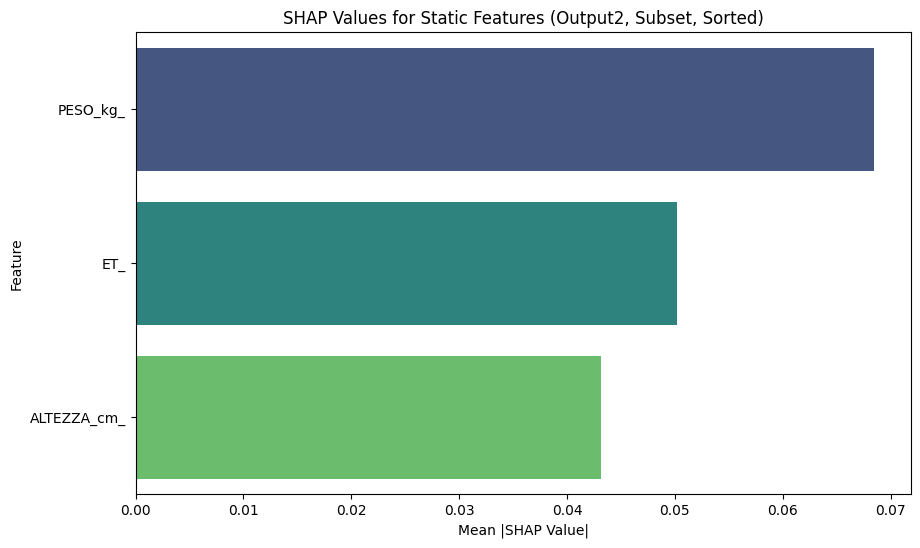

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1189322693.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


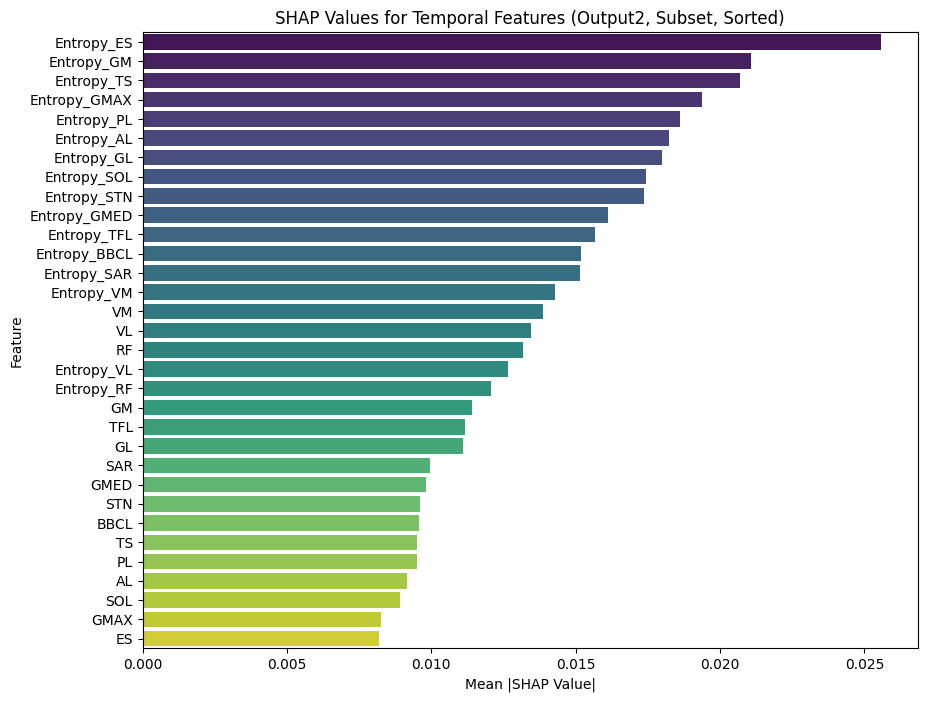

In [118]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "TerminalStance_2" (classe 21)
shap_analysis_for_class_output2(class_index=21, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/322961546.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


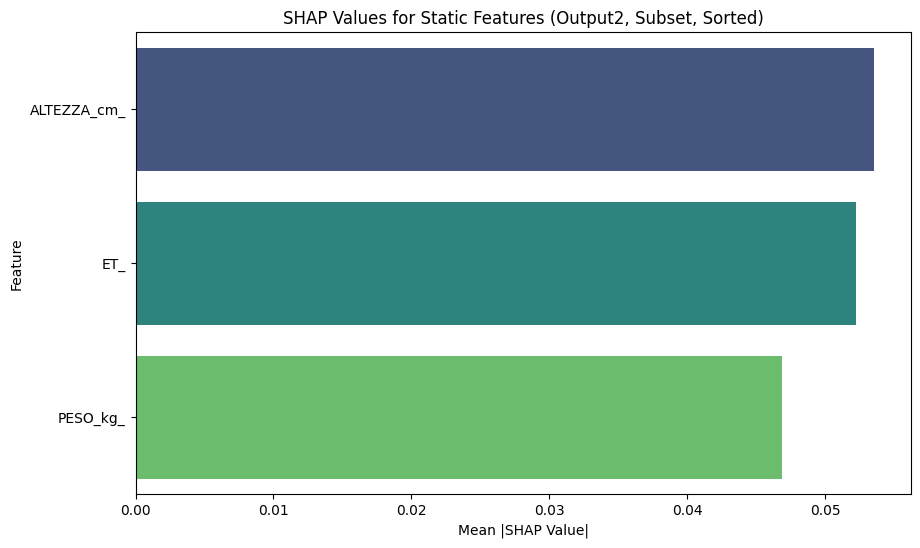

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/322961546.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


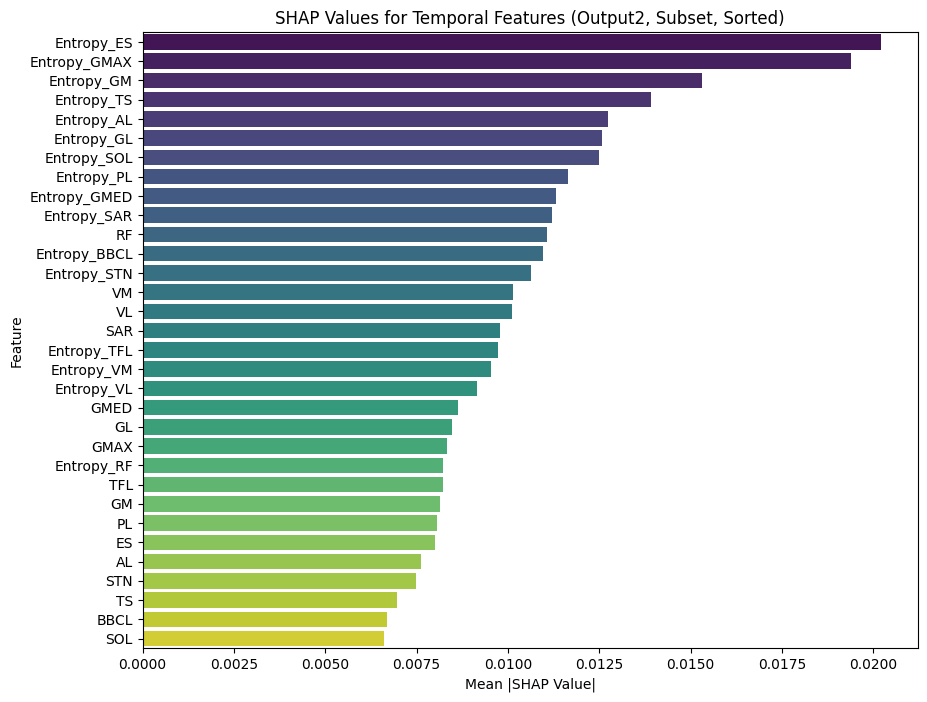

In [119]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "TerminalStance_3" (classe 22)
shap_analysis_for_class_output2(class_index=22, subset_size=2500)

# TERMINAL SWING 1 vs 2 vs 3

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1716107627.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


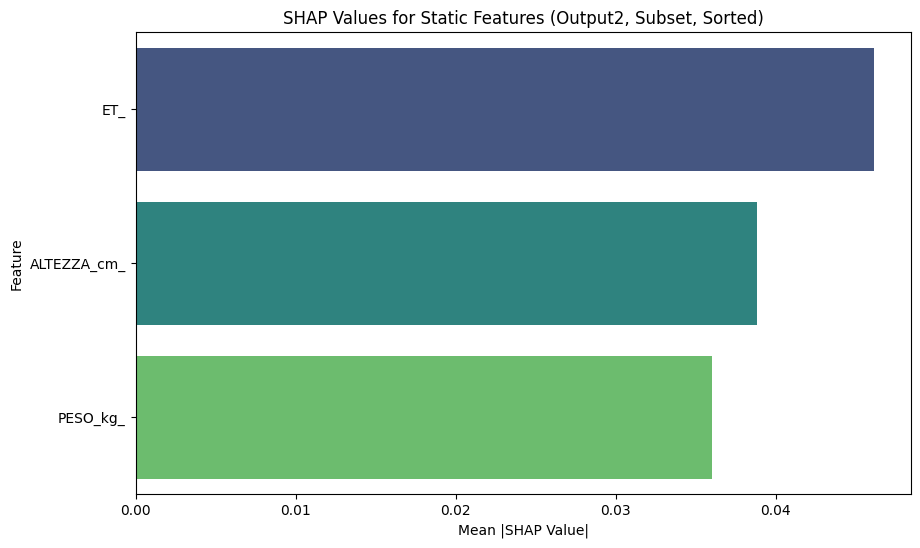

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1716107627.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


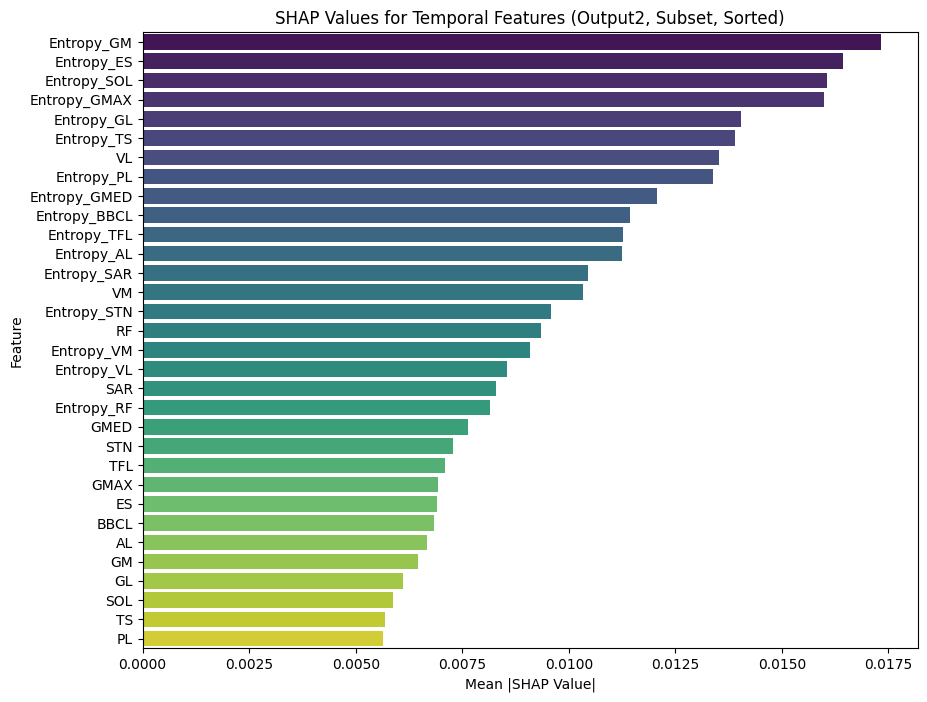

In [120]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "TerminalSwing_1" (classe 24)
shap_analysis_for_class_output2(class_index=24, subset_size=2500)

Analisi da eseguire
Calcolo delle nuove variabili:
Per ogni muscolo e la sua entropia associata, calcolerei due nuovi rapporti:
Muscle-to-Entropy Ratio (MER): SHAP del muscolo / SHAP della sua entropia
Entropy-to-Muscle Ratio (EMR): SHAP dell'entropia / SHAP del muscolo
Questi rapporti catturano l'equilibrio tra il contributo del muscolo e il suo comportamento entropico.
Analisi della distribuzione dei rapporti:
Analizzerei la distribuzione di MER e EMR per ogni muscolo, cercando pattern comuni come:
Rapporti molto alti o bassi: possono indicare muscoli che compensano o sovraccaricano rispetto al loro comportamento entropico.
Distribuzione simmetrica: potrebbe indicare una relazione bilanciata tra muscolo ed entropia.
Valutazione di pattern per gruppi patologici e normativi:
Confronterei i rapporti MER ed EMR tra pazienti (ad esempio, SP Stadio 1) e soggetti normativi per identificare anomalie specifiche del gruppo patologico.
Classificazione delle relazioni:
Identificherei muscoli che mostrano una relazione fortemente inversa (ad esempio, alto SHAP del muscolo e basso SHAP dell'entropia) e valuterei il loro ruolo specifico nel ciclo del passo.
Nuove variabili
Per ciascun muscolo, le nuove variabili calcolate sarebbero:

MER_muscle: Rapporto tra il contributo del muscolo e il contributo della sua entropia.
Formula: SHAP del muscolo / SHAP dell'entropia
Nome suggerito: MER_<nome_muscolo> (e.g., MER_RF per il Retto Femorale)
EMR_muscle: Rapporto tra il contributo dell'entropia e il contributo del muscolo.
Formula: SHAP dell'entropia / SHAP del muscolo
Nome suggerito: EMR_<nome_muscolo> (e.g., EMR_RF per il Retto Femorale)
Motivazione e benefici delle nuove variabili
Identificazione di muscoli "driver" o "adattivi":
Muscoli con alto MER indicano che il loro contributo è maggiore rispetto al comportamento entropico, segnalando potenziali muscoli compensatori o principali driver del movimento.
Muscoli con alto EMR suggeriscono che il comportamento entropico è predominante, indicando instabilità o disorganizzazione nell'attivazione.
Comprensione clinica più intuitiva:
Fornire ai clinici una metrica aggregata (MER o EMR) aiuta a sintetizzare il ruolo biomeccanico di ciascun muscolo e la sua relazione con l'entropia, rendendo più semplice identificare anomalie.
Applicazioni specifiche alla patologia:
Nei pazienti SP, i muscoli compensatori potrebbero avere MER molto alto, segnalando uno squilibrio nel reclutamento muscolare.
In soggetti normativi, ci si aspetta un equilibrio più uniforme tra MER ed EMR.

In [160]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature statiche
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    print("Valori medi SHAP (modulo) per le feature statiche:")
    print(dict(zip(static_features, mean_shap_values_static)))

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(dict(zip(temporal_features, mean_shap_values_temporal)))

    # Restituisci i valori medi SHAP
    return {
        "static": dict(zip(static_features, mean_shap_values_static)),
        "temporal": dict(zip(temporal_features, mean_shap_values_temporal))
    }

# Esegui l'analisi per una classe specifica di Output2, "TerminalSwing_1" (classe 24)
shap_values_mean = shap_analysis_for_class_output2(class_index=24, subset_size=2500)

# I valori medi SHAP sono ora disponibili nel dizionario `shap_values_mean`

Valori medi SHAP (modulo) per le feature statiche:
{'PESO_kg_': np.float64(0.03850502126544516), 'ALTEZZA_cm_': np.float64(0.037069559216507834), 'ET_': np.float64(0.04520835887182256)}

Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.009224247052774671), 'VL': np.float64(0.013248952403210229), 'VM': np.float64(0.010747364655737305), 'GMED': np.float64(0.0076256841429767136), 'TFL': np.float64(0.006888814855177088), 'STN': np.float64(0.007402140535486524), 'BBCL': np.float64(0.00691278256671244), 'TS': np.float64(0.005781313904319506), 'PL': np.float64(0.00618762970336038), 'SOL': np.float64(0.005800270184650958), 'GM': np.float64(0.006341069880964551), 'GL': np.float64(0.005691346467153312), 'GMAX': np.float64(0.007248146286901692), 'ES': np.float64(0.0066617518994711074), 'AL': np.float64(0.006741155247119593), 'SAR': np.float64(0.008480315447006342), 'Entropy_RF': np.float64(0.007845871522360357), 'Entropy_VL': np.float64(0.008022463158332356), 'Entropy_VM': 

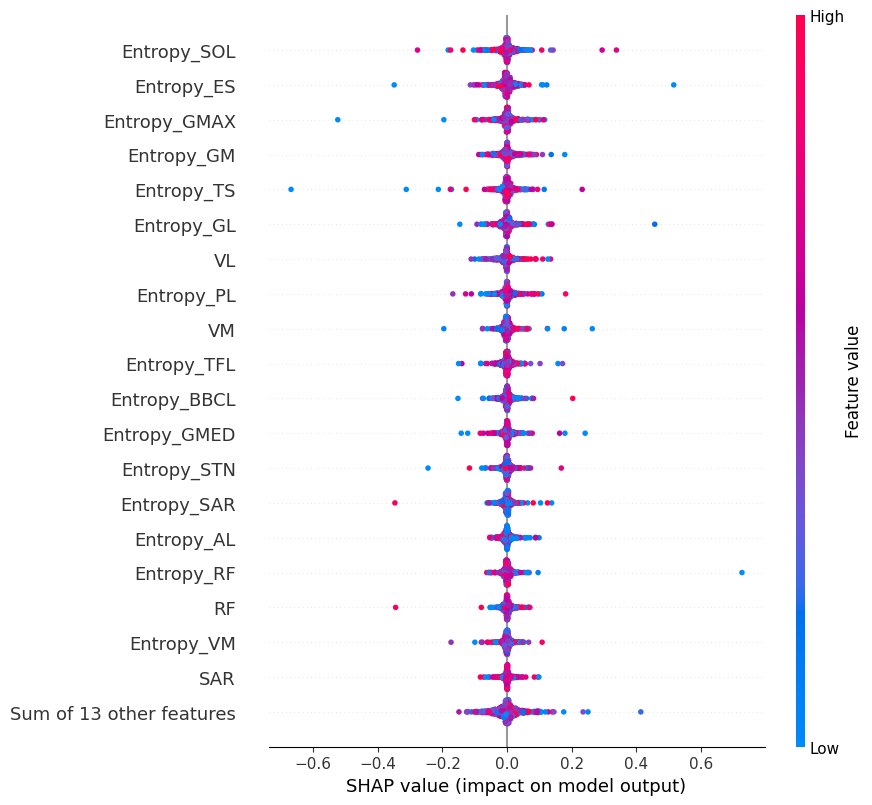

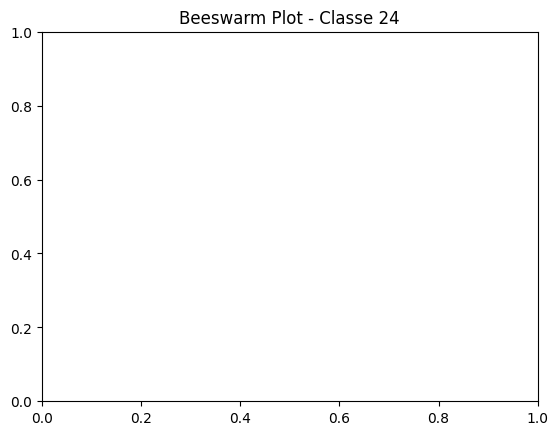

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3471507210.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


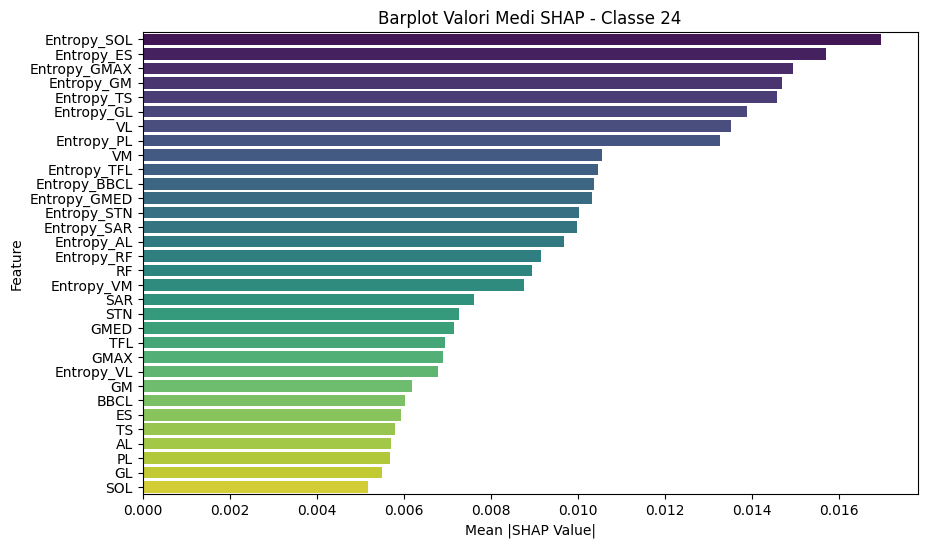

In [164]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detailed_shap_analysis(class_index, subset_size=500):
    """
    Analisi dettagliata SHAP per evidenziare il ruolo di valori alti o bassi delle feature.
    """
    # Filtrare il test set per la classe selezionata
    subset_indices = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp[subset_indices]
    X_test_static_subset = X_test_static[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),
        [X_train_temp, X_train_static]
    )

    # Calcolare i valori SHAP
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])
    shap_values_temporal = shap_values_output2[0][:, :, 0, class_index]  # Valori SHAP temporali
    feature_values_temporal = X_test_temp_subset[:, :, 0]  # Valori delle feature temporali

    # Creare un beeswarm plot
    shap_values_explanation = shap.Explanation(
        values=shap_values_temporal,
        base_values=None,
        data=feature_values_temporal,
        feature_names=temporal_features
    )

    plt.figure(figsize=(12, 8))
    shap.plots.beeswarm(shap_values_explanation, max_display=20)
    plt.title(f"Beeswarm Plot - Classe {class_index}")
    plt.show()

    # Analisi dei valori medi per SHAP
    mean_shap_values_temporal = np.mean(np.abs(shap_values_temporal), axis=0)
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Creare un barplot per i valori medi SHAP
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title(f"Barplot Valori Medi SHAP - Classe {class_index}")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Eseguire l'analisi dettagliata
detailed_shap_analysis(class_index=24, subset_size=500)

# Cosa vogliamo fare?
Obiettivo principale:
Far capire al neurologo come i valori alti o bassi delle feature (muscoli o entropie) influenzano il modello nel predire una specifica classe (es. TerminalSwing_1).
Visualizzazione desiderata:
Un grafico chiaro che mostri se:
Valori alti di una feature (es. RF) hanno un impatto positivo o negativo.
Valori bassi di una feature hanno un impatto opposto.
Evitare ambiguità per renderlo comprensibile anche senza competenze tecniche avanzate.
Chiarire il contesto temporale:
Siccome lavoriamo con time series, dobbiamo spiegare che i valori medi delle feature sono aggregazioni di contributi temporali.
Cosa vogliamo far vedere al neurologo?
Un'analisi separata per "valori alti" e "valori bassi":
Mostrare un barplot con due barre per ogni feature:
Una per l'impatto dei valori alti.
Una per l'impatto dei valori bassi.
Chiarire il peso relativo dei due contributi.
Rendere intuitivo il grafico:
Usare colori chiari e un titolo esplicativo.
Ordinare le feature in base all'impatto totale (sommando alto e basso).
Facilitare il confronto:
Creare un elenco delle feature più influenti, sottolineando se il loro contributo è maggiormente legato a valori alti o bassi.
Come procedere?
Estrarre i dati:
Usare i valori SHAP calcolati per distinguere i contributi di "valori alti" e "valori bassi" per ogni feature.
Calcolare e visualizzare:
Calcolare la media dei contributi per "valori alti" e "valori bassi".
Creare un barplot con due barre per feature (alto vs basso).
Descrivere chiaramente l'output:
Annotare il grafico con una legenda e una descrizione esplicativa.

<Figure size 2000x1000 with 0 Axes>

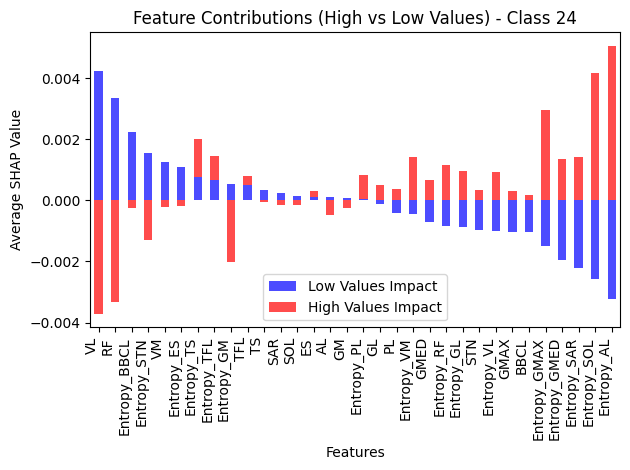

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def interpret_shap_values(class_index, subset_size=2500):
    """
    Analisi SHAP per separare contributi di valori alti e bassi delle feature temporali.
    """
    # Selezione di un subset
    subset_indices = np.random.choice(X_test_temp.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp[subset_indices]
    X_test_static_subset = X_test_static[subset_indices]

    # Calcolo dei valori SHAP
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),
        [X_train_temp, X_train_static]
    )
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])
    
    # Estrazione dei valori SHAP e delle feature
    shap_values_temporal = shap_values_output2[0][:, :, 0, class_index]
    feature_values_temporal = X_test_temp_subset[:, :, 0]

    # Creazione del dizionario per impatti
    feature_impacts = {}
    
    for i, feature in enumerate(temporal_features):
        # Separazione in valori alti e bassi
        high_values = feature_values_temporal[:, i] > np.median(feature_values_temporal[:, i])
        low_values = feature_values_temporal[:, i] <= np.median(feature_values_temporal[:, i])
        
        # Calcolo dell'impatto medio
        high_impact = np.mean(shap_values_temporal[high_values, i]) if np.any(high_values) else 0
        low_impact = np.mean(shap_values_temporal[low_values, i]) if np.any(low_values) else 0
        
        feature_impacts[feature] = {'High': high_impact, 'Low': low_impact}

    # Conversione in DataFrame
    impact_df = pd.DataFrame(feature_impacts).T
    impact_df = impact_df.sort_values(by="High", ascending=False)

    # Plot
    plt.figure(figsize=(20, 10))
    impact_df.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha=0.7)
    plt.title(f"Feature Contributions (High vs Low Values) - Class {class_index}")
    plt.xlabel("Features")
    plt.ylabel("Average SHAP Value")
    plt.xticks(rotation=90, ha='right')
    plt.legend(["Low Values Impact", "High Values Impact"])
    plt.tight_layout()
    plt.show()

# Esegui l'analisi per una classe specifica di Output2, "TerminalSwing_1"
interpret_shap_values(class_index=24, subset_size=2500)

# Calcolo Muscle to Entropy

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3013002083.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette="gist_gray")


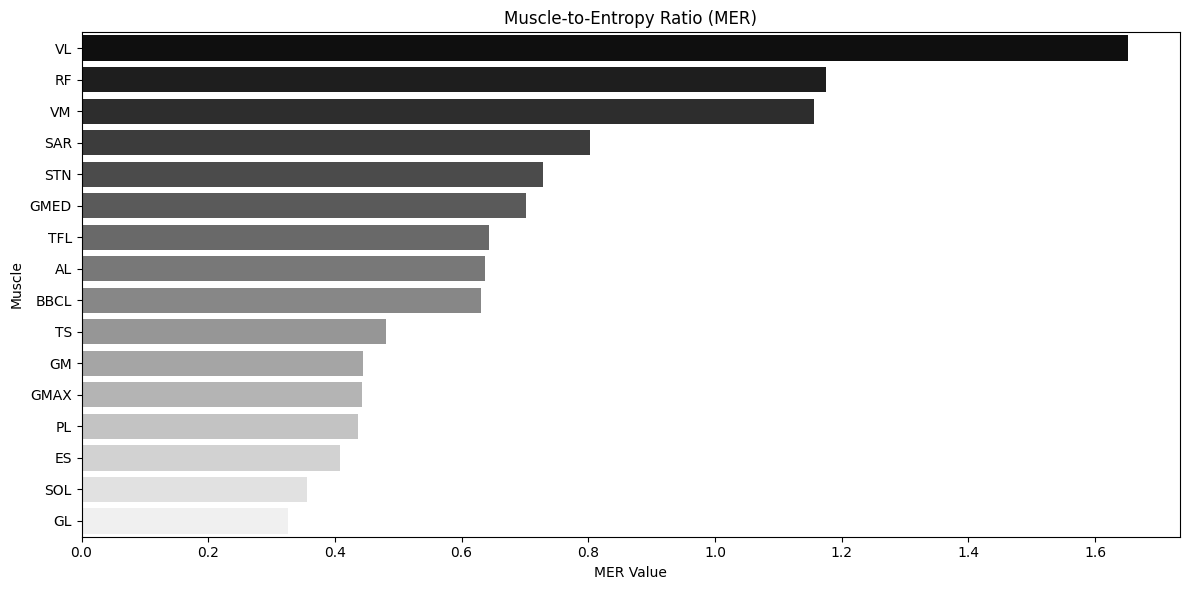

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_and_plot_mer(shap_values_temporal, temporal_features):
    """
    Calcola i valori di MER (Muscle-to-Entropy Ratio) e genera un barplot.
    
    Parameters:
    - shap_values_temporal: Dizionario contenente i valori medi SHAP delle feature temporali.
    - temporal_features: Lista delle feature temporali.
    """
    # Separare muscoli ed entropie
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = [f for f in temporal_features if f.startswith("Entropy_")]

    # Creare un dizionario per MER
    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if entropy in shap_values_temporal and muscle in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Visualizzare il barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette="gist_gray")
    plt.title("Muscle-to-Entropy Ratio (MER)")
    plt.xlabel("MER Value")
    plt.ylabel("Muscle")
    plt.tight_layout()
    plt.show()

# Calcola e visualizza MER
calculate_and_plot_mer(
    shap_values_temporal={
        'RF': 0.009224247052774671,
        'VL': 0.013248952403210229,
        'VM': 0.010747364655737305,
        'GMED': 0.0076256841429767136,
        'TFL': 0.006888814855177088,
        'STN': 0.007402140535486524,
        'BBCL': 0.00691278256671244,
        'TS': 0.005781313904319506,
        'PL': 0.00618762970336038,
        'SOL': 0.005800270184650958,
        'GM': 0.006341069880964551,
        'GL': 0.005691346467153312,
        'GMAX': 0.007248146286901692,
        'ES': 0.0066617518994711074,
        'AL': 0.006741155247119593,
        'SAR': 0.008480315447006342,
        'Entropy_RF': 0.007845871522360357,
        'Entropy_VL': 0.008022463158332356,
        'Entropy_VM': 0.009296139759777316,
        'Entropy_GMED': 0.01087485880478243,
        'Entropy_TFL': 0.010698088426728236,
        'Entropy_STN': 0.010158742196808271,
        'Entropy_BBCL': 0.010975399458130846,
        'Entropy_TS': 0.012042387307886248,
        'Entropy_PL': 0.014182948472704902,
        'Entropy_SOL': 0.016281057918188797,
        'Entropy_GL': 0.014277928663087278,
        'Entropy_GM': 0.017472245963357627,
        'Entropy_GMAX': 0.016387706193609984,
        'Entropy_ES': 0.016350695743830374,
        'Entropy_AL': 0.010582225054040918,
        'Entropy_SAR': 0.010559691135513685
    },
    temporal_features=[
        'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
        'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
        'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
        'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
        'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
        'Entropy_SAR'
    ]
)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2777919658.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)


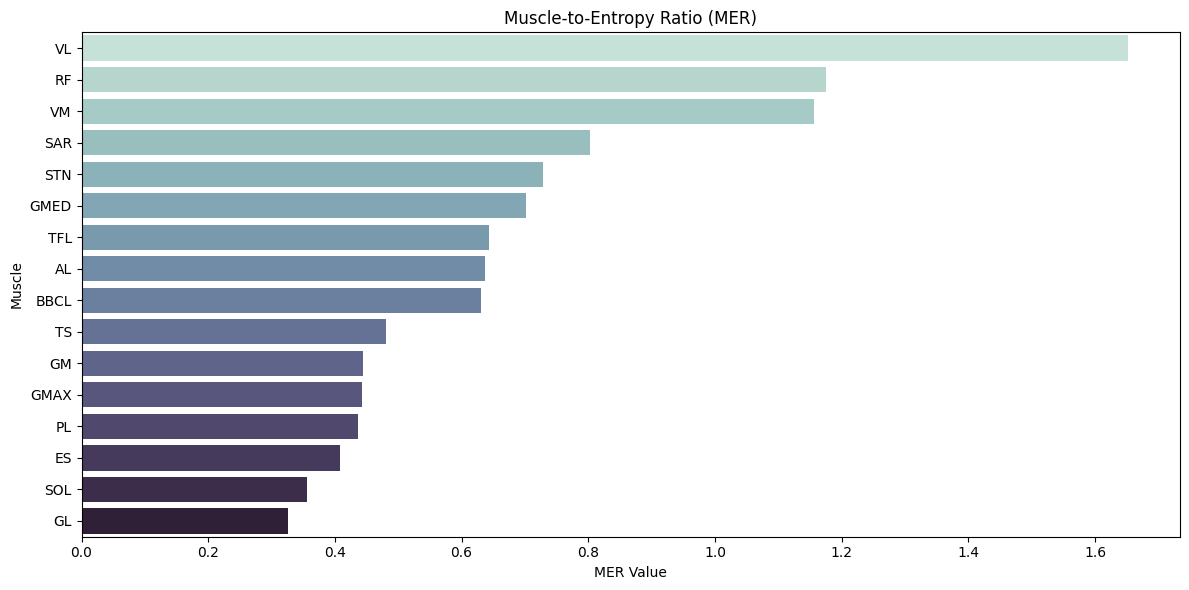

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_and_plot_mer(shap_values_temporal, temporal_features):
    """
    Calcola i valori di MER (Muscle-to-Entropy Ratio) e genera un barplot.
    
    Parameters:
    - shap_values_temporal: Dizionario contenente i valori medi SHAP delle feature temporali.
    - temporal_features: Lista delle feature temporali.
    """
    # Separare muscoli ed entropie
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = [f for f in temporal_features if f.startswith("Entropy_")]

    # Creare un dizionario per MER
    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if entropy in shap_values_temporal and muscle in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix con un numero di colori pari al numero di muscoli
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)

    # Visualizzare il barplot con la nuova palette
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)
    plt.title("Muscle-to-Entropy Ratio (MER)")
    plt.xlabel("MER Value")
    plt.ylabel("Muscle")
    plt.tight_layout()
    plt.show()

# Calcola e visualizza MER
calculate_and_plot_mer(
    shap_values_temporal={
        'RF': 0.009224247052774671,
        'VL': 0.013248952403210229,
        'VM': 0.010747364655737305,
        'GMED': 0.0076256841429767136,
        'TFL': 0.006888814855177088,
        'STN': 0.007402140535486524,
        'BBCL': 0.00691278256671244,
        'TS': 0.005781313904319506,
        'PL': 0.00618762970336038,
        'SOL': 0.005800270184650958,
        'GM': 0.006341069880964551,
        'GL': 0.005691346467153312,
        'GMAX': 0.007248146286901692,
        'ES': 0.0066617518994711074,
        'AL': 0.006741155247119593,
        'SAR': 0.008480315447006342,
        'Entropy_RF': 0.007845871522360357,
        'Entropy_VL': 0.008022463158332356,
        'Entropy_VM': 0.009296139759777316,
        'Entropy_GMED': 0.01087485880478243,
        'Entropy_TFL': 0.010698088426728236,
        'Entropy_STN': 0.010158742196808271,
        'Entropy_BBCL': 0.010975399458130846,
        'Entropy_TS': 0.012042387307886248,
        'Entropy_PL': 0.014182948472704902,
        'Entropy_SOL': 0.016281057918188797,
        'Entropy_GL': 0.014277928663087278,
        'Entropy_GM': 0.017472245963357627,
        'Entropy_GMAX': 0.016387706193609984,
        'Entropy_ES': 0.016350695743830374,
        'Entropy_AL': 0.010582225054040918,
        'Entropy_SAR': 0.010559691135513685
    },
    temporal_features=[
        'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
        'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
        'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
        'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
        'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
        'Entropy_SAR'
    ]
)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1861446636.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)


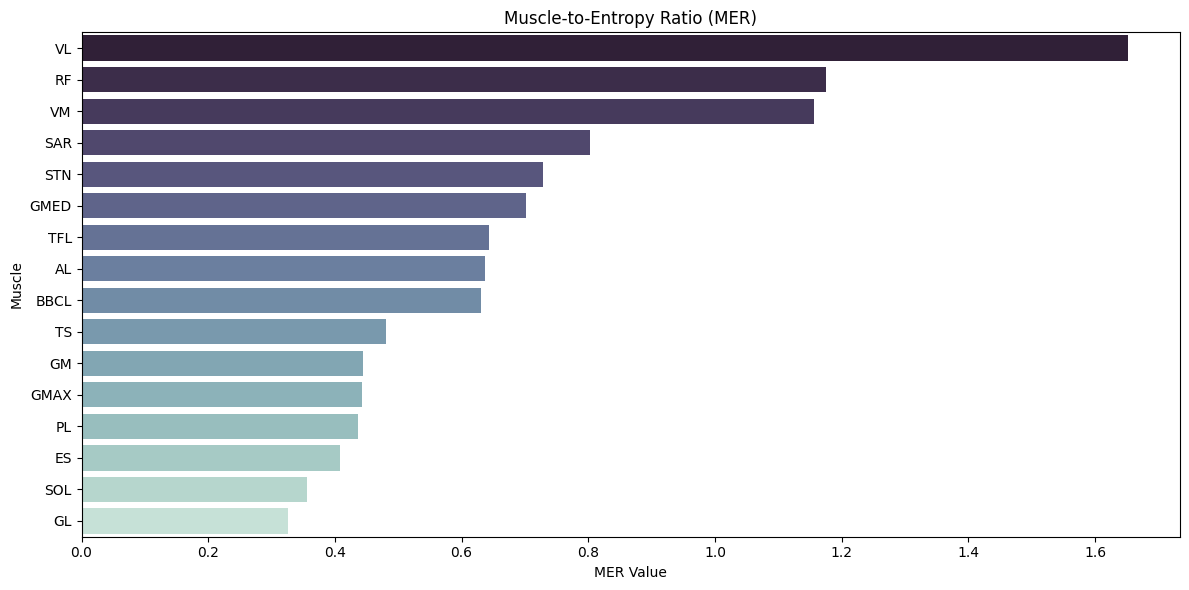

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_and_plot_mer(shap_values_temporal, temporal_features):
    """
    Calcola i valori di MER (Muscle-to-Entropy Ratio) e genera un barplot.
    
    Parameters:
    - shap_values_temporal: Dizionario contenente i valori medi SHAP delle feature temporali.
    - temporal_features: Lista delle feature temporali.
    """
    # Separare muscoli ed entropie
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = [f for f in temporal_features if f.startswith("Entropy_")]

    # Creare un dizionario per MER
    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if entropy in shap_values_temporal and muscle in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Visualizzare il barplot con la nuova palette
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)
    plt.title("Muscle-to-Entropy Ratio (MER)")
    plt.xlabel("MER Value")
    plt.ylabel("Muscle")
    plt.tight_layout()
    plt.show()

# Calcola e visualizza MER
calculate_and_plot_mer(
    shap_values_temporal={
        'RF': 0.009224247052774671,
        'VL': 0.013248952403210229,
        'VM': 0.010747364655737305,
        'GMED': 0.0076256841429767136,
        'TFL': 0.006888814855177088,
        'STN': 0.007402140535486524,
        'BBCL': 0.00691278256671244,
        'TS': 0.005781313904319506,
        'PL': 0.00618762970336038,
        'SOL': 0.005800270184650958,
        'GM': 0.006341069880964551,
        'GL': 0.005691346467153312,
        'GMAX': 0.007248146286901692,
        'ES': 0.0066617518994711074,
        'AL': 0.006741155247119593,
        'SAR': 0.008480315447006342,
        'Entropy_RF': 0.007845871522360357,
        'Entropy_VL': 0.008022463158332356,
        'Entropy_VM': 0.009296139759777316,
        'Entropy_GMED': 0.01087485880478243,
        'Entropy_TFL': 0.010698088426728236,
        'Entropy_STN': 0.010158742196808271,
        'Entropy_BBCL': 0.010975399458130846,
        'Entropy_TS': 0.012042387307886248,
        'Entropy_PL': 0.014182948472704902,
        'Entropy_SOL': 0.016281057918188797,
        'Entropy_GL': 0.014277928663087278,
        'Entropy_GM': 0.017472245963357627,
        'Entropy_GMAX': 0.016387706193609984,
        'Entropy_ES': 0.016350695743830374,
        'Entropy_AL': 0.010582225054040918,
        'Entropy_SAR': 0.010559691135513685
    },
    temporal_features=[
        'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
        'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
        'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
        'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
        'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
        'Entropy_SAR'
    ]
)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2291954965.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)


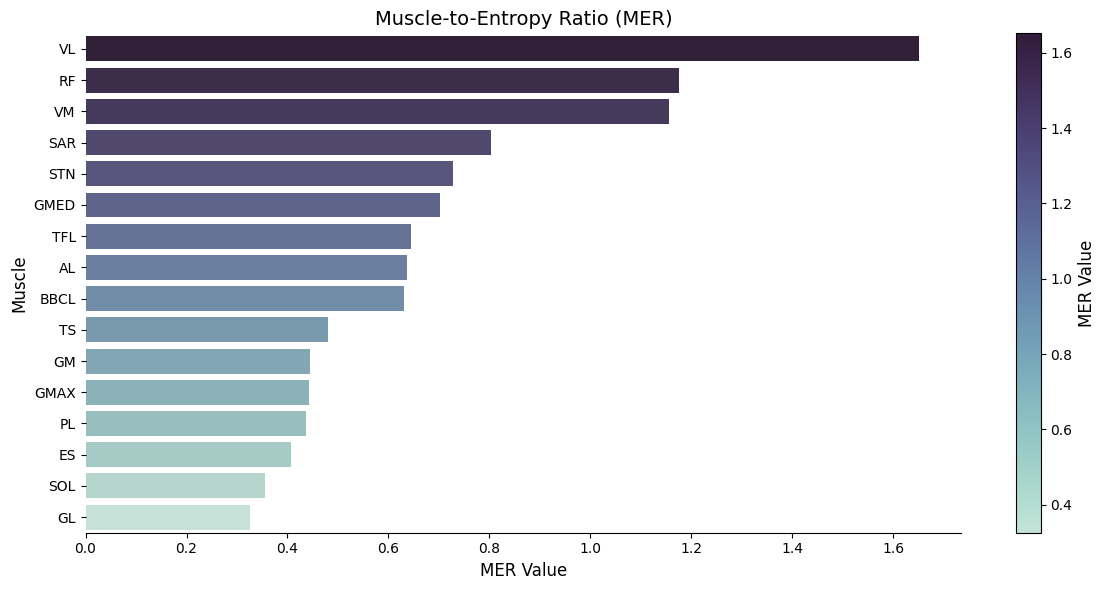

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

def calculate_and_plot_mer(shap_values_temporal, temporal_features):
    """
    Calcola i valori di MER (Muscle-to-Entropy Ratio) e genera un barplot senza bordi e con legenda colorata.
    
    Parameters:
    - shap_values_temporal: Dizionario contenente i valori medi SHAP delle feature temporali.
    - temporal_features: Lista delle feature temporali.
    """
    # Separare muscoli ed entropie
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = [f for f in temporal_features if f.startswith("Entropy_")]

    # Creare un dizionario per MER
    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if entropy in shap_values_temporal and muscle in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title("Muscle-to-Entropy Ratio (MER)", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# Calcola e visualizza MER
calculate_and_plot_mer(
    shap_values_temporal={
        'RF': 0.009224247052774671,
        'VL': 0.013248952403210229,
        'VM': 0.010747364655737305,
        'GMED': 0.0076256841429767136,
        'TFL': 0.006888814855177088,
        'STN': 0.007402140535486524,
        'BBCL': 0.00691278256671244,
        'TS': 0.005781313904319506,
        'PL': 0.00618762970336038,
        'SOL': 0.005800270184650958,
        'GM': 0.006341069880964551,
        'GL': 0.005691346467153312,
        'GMAX': 0.007248146286901692,
        'ES': 0.0066617518994711074,
        'AL': 0.006741155247119593,
        'SAR': 0.008480315447006342,
        'Entropy_RF': 0.007845871522360357,
        'Entropy_VL': 0.008022463158332356,
        'Entropy_VM': 0.009296139759777316,
        'Entropy_GMED': 0.01087485880478243,
        'Entropy_TFL': 0.010698088426728236,
        'Entropy_STN': 0.010158742196808271,
        'Entropy_BBCL': 0.010975399458130846,
        'Entropy_TS': 0.012042387307886248,
        'Entropy_PL': 0.014182948472704902,
        'Entropy_SOL': 0.016281057918188797,
        'Entropy_GL': 0.014277928663087278,
        'Entropy_GM': 0.017472245963357627,
        'Entropy_GMAX': 0.016387706193609984,
        'Entropy_ES': 0.016350695743830374,
        'Entropy_AL': 0.010582225054040918,
        'Entropy_SAR': 0.010559691135513685
    },
    temporal_features=[
        'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
        'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
        'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
        'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
        'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
        'Entropy_SAR'
    ]
)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1667613654.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


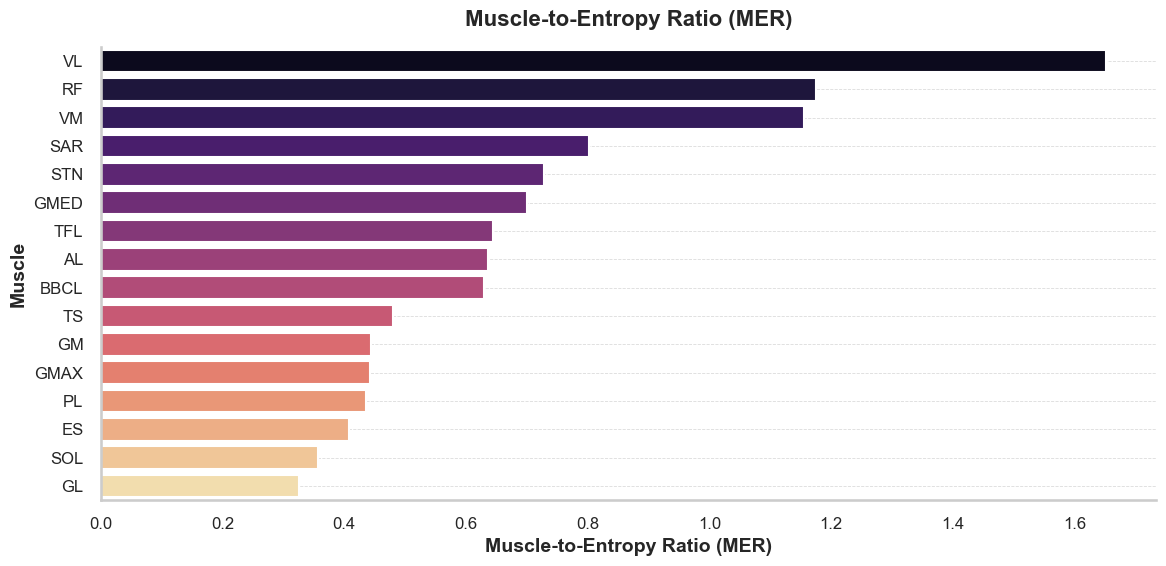

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_high_quality_barplot(shap_values_temporal, temporal_features):
    """
    Genera un barplot elegante e di alta qualità per pubblicazioni scientifiche.
    
    Parameters:
    - shap_values_temporal: Dizionario contenente i valori medi SHAP delle feature temporali.
    - temporal_features: Lista delle feature temporali.
    """
    # Separare muscoli ed entropie
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = [f for f in temporal_features if f.startswith("Entropy_")]

    # Creare un dizionario per MER
    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if entropy in shap_values_temporal and muscle in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Impostazioni estetiche di alto livello
    sns.set(style="whitegrid", context="talk", font="Arial")
    
    # Creare la figura
    fig, ax = plt.subplots(figsize=(12, 6))

    # Definire la palette di colori (magma per un look moderno e scientifico)
    colors = sns.color_palette("magma", len(sorted_mer))

    # Creare il barplot
    sns.barplot(
        x=list(sorted_mer.values()), 
        y=list(sorted_mer.keys()), 
        palette=colors, 
        ax=ax
    )

    # Miglioramenti visivi
    ax.set_xlabel("Muscle-to-Entropy Ratio (MER)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Muscle", fontsize=14, fontweight='bold')
    ax.set_title("Muscle-to-Entropy Ratio (MER)", fontsize=16, fontweight='bold', pad=15)

    # Migliorare la leggibilità dell'asse x
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    # Rimuovere il bordo superiore e destro per un look pulito
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Aggiungere linee guida orizzontali leggere
    ax.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
    ax.xaxis.grid(False)

    # Aumentare la leggibilità
    plt.tight_layout()

    # Salvare il grafico in alta qualità
    plt.savefig("MER_high_quality_plot.png", dpi=300, bbox_inches="tight", transparent=True)
    plt.savefig("MER_high_quality_plot.pdf", dpi=300, bbox_inches="tight", transparent=True)

    # Mostrare il grafico
    plt.show()

# Esegui la funzione per generare il grafico
create_high_quality_barplot(
    shap_values_temporal={
        'RF': 0.009224247052774671,
        'VL': 0.013248952403210229,
        'VM': 0.010747364655737305,
        'GMED': 0.0076256841429767136,
        'TFL': 0.006888814855177088,
        'STN': 0.007402140535486524,
        'BBCL': 0.00691278256671244,
        'TS': 0.005781313904319506,
        'PL': 0.00618762970336038,
        'SOL': 0.005800270184650958,
        'GM': 0.006341069880964551,
        'GL': 0.005691346467153312,
        'GMAX': 0.007248146286901692,
        'ES': 0.0066617518994711074,
        'AL': 0.006741155247119593,
        'SAR': 0.008480315447006342,
        'Entropy_RF': 0.007845871522360357,
        'Entropy_VL': 0.008022463158332356,
        'Entropy_VM': 0.009296139759777316,
        'Entropy_GMED': 0.01087485880478243,
        'Entropy_TFL': 0.010698088426728236,
        'Entropy_STN': 0.010158742196808271,
        'Entropy_BBCL': 0.010975399458130846,
        'Entropy_TS': 0.012042387307886248,
        'Entropy_PL': 0.014182948472704902,
        'Entropy_SOL': 0.016281057918188797,
        'Entropy_GL': 0.014277928663087278,
        'Entropy_GM': 0.017472245963357627,
        'Entropy_GMAX': 0.016387706193609984,
        'Entropy_ES': 0.016350695743830374,
        'Entropy_AL': 0.010582225054040918,
        'Entropy_SAR': 0.010559691135513685
    },
    temporal_features=[
        'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
        'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
        'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
        'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
        'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
        'Entropy_SAR'
    ]
)

ESEMPIO RIDGELINE PLOT

<Figure size 2400x1800 with 0 Axes>

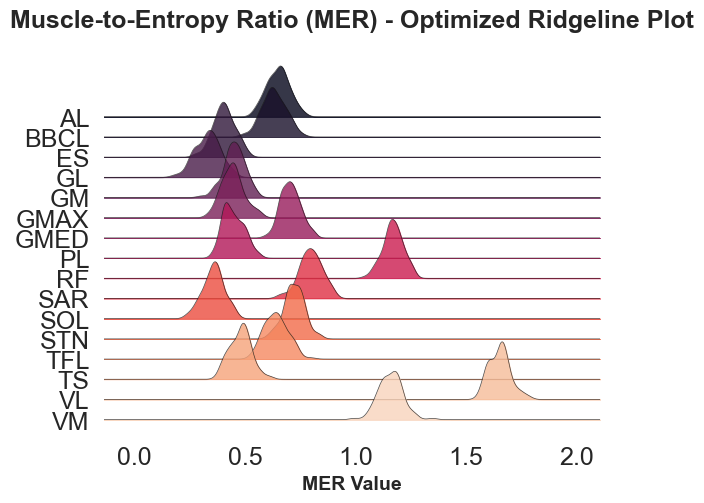

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot

def create_better_ridgeline_plot(shap_values_temporal, temporal_features):
    """
    Genera un ridgeline plot ottimizzato per il Muscle-to-Entropy Ratio (MER).
    
    Parameters:
    - shap_values_temporal: Dizionario contenente i valori medi SHAP delle feature temporali.
    - temporal_features: Lista delle feature temporali.
    """
    # Separare muscoli ed entropie
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = [f for f in temporal_features if f.startswith("Entropy_")]

    # Creare un dizionario per MER simulando più osservazioni per muscolo
    np.random.seed(42)
    mer_data = []
    
    for muscle, entropy in zip(muscle_features, entropy_features):
        if entropy in shap_values_temporal and muscle in shap_values_temporal:
            # Valore medio del MER
            mer_mean = shap_values_temporal[muscle] / shap_values_temporal[entropy]
            # Simuliamo 100 osservazioni attorno al valore medio con una piccola varianza
            mer_values = np.random.normal(loc=mer_mean, scale=0.05, size=100)
            for value in mer_values:
                mer_data.append([muscle, value])
    
    # Creare un DataFrame in formato long
    df = pd.DataFrame(mer_data, columns=["Muscle", "MER"])

    # Creare il Ridgeline Plot
    plt.figure(figsize=(24, 18))  # Aumentiamo le dimensioni per una migliore leggibilità
    joyplot(
        data=df, 
        by="Muscle", 
        colormap=sns.color_palette("rocket", as_cmap=True),  # Miglioriamo i colori
        fade=False,  # Rimuoviamo l’effetto di dissolvenza
        linewidth=0.5,  # Rende i contorni meno aggressivi
        alpha=0.8,  # Aumentiamo la visibilità delle distribuzioni
        overlap=0.5  # Miglioriamo la sovrapposizione tra le curve
    )

    # Personalizzazione estetica
    plt.title("Muscle-to-Entropy Ratio (MER) - Optimized Ridgeline Plot", fontsize=18, fontweight="bold", pad=20)
    plt.xlabel("MER Value", fontsize=14, fontweight="bold")
    plt.ylabel("")  # Rimuoviamo il label "Muscle" per pulire il layout

    # Rimuovere la griglia per un aspetto più pulito
    plt.grid(False)

    # Salvare il grafico in alta qualità
    plt.savefig("MER_Ridgeline_Optimized.png", dpi=300, bbox_inches="tight", transparent=True)
    plt.savefig("MER_Ridgeline_Optimized.pdf", dpi=300, bbox_inches="tight", transparent=True)

    # Mostrare il grafico
    plt.show()

# Eseguire la funzione con i tuoi dati
create_better_ridgeline_plot(
    shap_values_temporal={
        'RF': 0.009224247052774671,
        'VL': 0.013248952403210229,
        'VM': 0.010747364655737305,
        'GMED': 0.0076256841429767136,
        'TFL': 0.006888814855177088,
        'STN': 0.007402140535486524,
        'BBCL': 0.00691278256671244,
        'TS': 0.005781313904319506,
        'PL': 0.00618762970336038,
        'SOL': 0.005800270184650958,
        'GM': 0.006341069880964551,
        'GL': 0.005691346467153312,
        'GMAX': 0.007248146286901692,
        'ES': 0.0066617518994711074,
        'AL': 0.006741155247119593,
        'SAR': 0.008480315447006342,
        'Entropy_RF': 0.007845871522360357,
        'Entropy_VL': 0.008022463158332356,
        'Entropy_VM': 0.009296139759777316,
        'Entropy_GMED': 0.01087485880478243,
        'Entropy_TFL': 0.010698088426728236,
        'Entropy_STN': 0.010158742196808271,
        'Entropy_BBCL': 0.010975399458130846,
        'Entropy_TS': 0.012042387307886248,
        'Entropy_PL': 0.014182948472704902,
        'Entropy_SOL': 0.016281057918188797,
        'Entropy_GL': 0.014277928663087278,
        'Entropy_GM': 0.017472245963357627,
        'Entropy_GMAX': 0.016387706193609984,
        'Entropy_ES': 0.016350695743830374,
        'Entropy_AL': 0.010582225054040918,
        'Entropy_SAR': 0.010559691135513685
    },
    temporal_features=[
        'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
        'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR',
        'Entropy_RF', 'Entropy_VL', 'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL',
        'Entropy_STN', 'Entropy_BBCL', 'Entropy_TS', 'Entropy_PL', 'Entropy_SOL',
        'Entropy_GL', 'Entropy_GM', 'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL',
        'Entropy_SAR'
    ]
)

Esempio Sankey Diagram

In [17]:
import plotly.graph_objects as go

# Definizione dei nodi (Muscoli, Co-attivazioni, Stato del soggetto)
labels = [
    "VL", "RF", "GMED", "SOL", "TFL", "BBCL",  # Muscoli di input
    "Coattivazione 1", "Coattivazione 2", "Coattivazione 3", "Coattivazione 4", "Coattivazione 5",  # Pattern di co-attivazione
    "Normativi", "Patologici"  # Stati finali
]

# Definizione dei collegamenti tra i nodi (Muscoli → Co-attivazioni → Stato)
source = [
    0, 1, 2, 3, 4, 5,  # Muscoli → Coattivazioni
    0, 2, 4, 5,  # Alcuni muscoli contribuiscono a più sinergie
    6, 7, 8, 9, 10,  # Coattivazioni → Stato finale
    6, 7, 9, 10  # Alcune co-attivazioni sono più comuni nei patologici
]

target = [
    6, 7, 8, 9, 10,  # Muscoli → Co-attivazioni
    7, 8, 9, 10,  # Muscoli che contribuiscono a più sinergie
    11, 11, 11, 12, 12,  # Co-attivazioni → Normativi / Patologici
    12, 12, 12, 12  # Co-attivazioni più presenti nei patologici
]

# Intensità delle connessioni (quanto è forte ogni legame)
values = [
    8, 6, 4, 5, 7, 6,  # Muscoli → Coattivazioni
    3, 4, 5, 6,  # Muscoli che contribuiscono a più sinergie
    10, 8, 7, 5, 3,  # Coattivazioni → Normativi
    6, 9, 8, 12  # Coattivazioni → Patologici (più alte nelle patologie)
]

# Creazione del Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#1f77b4"] * 6 + ["#ff7f0e"] * 5 + ["#2ca02c", "#d62728"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=["rgba(31, 119, 180, 0.5)"] * 6 + ["rgba(255, 127, 14, 0.5)"] * 5 + ["rgba(44, 160, 44, 0.5)", "rgba(214, 39, 40, 0.5)"] * 4
    )
))

# Titolo del grafico
fig.update_layout(title_text="Sankey Diagram delle Co-attivazioni Muscolari (Normativi vs Patologici)", font_size=12)

# Mostrare il grafico
fig.show()

In [18]:
import plotly.graph_objects as go

# Definizione dei nodi: Muscoli, Co-attivazioni, Fasi del passo, Stato soggetto
labels = [
    "VL", "RF", "GMED", "SOL", "TFL", "BBCL",  # Muscoli
    "Coattivazione 1", "Coattivazione 2", "Coattivazione 3", "Coattivazione 4", "Coattivazione 5",  # Pattern di co-attivazione
    "Initial Contact", "Loading Response", "Midstance", "Terminal Stance", "PreSwing", "Initial Swing", "Terminal Swing",  # Fasi del passo
    "Normativi", "Patologici"  # Stato finale
]

# Collegamenti tra nodi (Muscoli → Coattivazioni → Fasi del passo → Stato)
source = [
    0, 1, 2, 3, 4, 5,  # Muscoli → Coattivazioni
    0, 2, 4, 5,  # Alcuni muscoli contribuiscono a più sinergie
    6, 7, 8, 9, 10,  # Coattivazioni → Fasi del passo
    6, 7, 8, 9, 10,  # Le stesse coattivazioni influenzano diverse fasi
    11, 12, 13, 14, 15, 16, 17,  # Fasi del passo → Stato finale
    11, 12, 13, 15, 17  # Alcune fasi sono più critiche per i patologici
]

target = [
    6, 7, 8, 9, 10,  # Muscoli → Coattivazioni
    7, 8, 9, 10,  # Muscoli che contribuiscono a più sinergie
    11, 12, 13, 14, 15,  # Coattivazioni → Fasi del passo
    13, 14, 15, 16, 17,  # Coattivazioni → Fasi
    18, 18, 18, 18, 18, 18, 18,  # Normativi
    19, 19, 19, 19, 19  # Patologici
]

# Intensità delle connessioni (peso delle transizioni)
values = [
    8, 6, 4, 5, 7, 6,  # Muscoli → Coattivazioni
    3, 4, 5, 6,  # Muscoli che contribuiscono a più sinergie
    10, 8, 7, 5, 3,  # Coattivazioni → Fasi del passo
    6, 9, 8, 12, 11,  # Coattivazioni → Fasi del passo patologiche
    15, 14, 13, 10, 9, 8, 7,  # Fasi del passo → Normativi
    12, 15, 14, 17, 13  # Fasi del passo → Patologici
]

# Creazione del Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#1f77b4"] * 6 + ["#ff7f0e"] * 5 + ["#9467bd"] * 7 + ["#2ca02c", "#d62728"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=["rgba(31, 119, 180, 0.5)"] * 6 + ["rgba(255, 127, 14, 0.5)"] * 5 + ["rgba(148, 103, 189, 0.5)"] * 7 + ["rgba(44, 160, 44, 0.5)", "rgba(214, 39, 40, 0.5)"] * 5
    )
))

# Titolo e layout
fig.update_layout(title_text="Sankey Diagram delle Co-attivazioni Muscolari attraverso le 7 Fasi del Passo", font_size=12)

# Mostrare il grafico
fig.show()

In [20]:
import plotly.graph_objects as go

# Definizione dei nodi: Muscoli, Co-attivazioni, Fasi del passo, Stato soggetto
labels = [
    "TFL", "VL", "GMED", "BBCL", "RF", "SOL",  # Muscoli (Livello 0)
    "Coattivazione 1", "Coattivazione 2", "Coattivazione 3", "Coattivazione 4", "Coattivazione 5",  # Co-attivazioni (Livello 1)
    "Initial Contact", "Loading Response", "Midstance", "Terminal Stance", "PreSwing", "Initial Swing", "Terminal Swing",  # Fasi del passo (Livello 2)
    "Normativi", "Patologici"  # Stato finale (Livello 3)
]

# Assegniamo livelli ai nodi
node_x_positions = [
    0, 0, 0, 0, 0, 0,  # Muscoli
    0.2, 0.2, 0.2, 0.2, 0.2,  # Co-attivazioni
    0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,  # Fasi del passo
    0.8, 0.8  # Normativi e Patologici
]

# Collegamenti tra nodi (Muscoli → Coattivazioni → Fasi del passo → Stato)
source = [
    0, 1, 2, 3, 4, 5,  # Muscoli → Coattivazioni
    0, 2, 4, 5,  # Alcuni muscoli contribuiscono a più sinergie
    6, 7, 8, 9, 10,  # Coattivazioni → Fasi del passo
    6, 7, 8, 9, 10,  # Le stesse coattivazioni influenzano diverse fasi
    11, 12, 13, 14, 15, 16, 17,  # Fasi del passo → Stato finale
    11, 12, 13, 15, 17  # Alcune fasi sono più critiche per i patologici
]

target = [
    6, 7, 8, 9, 10,  # Muscoli → Coattivazioni
    7, 8, 9, 10,  # Muscoli che contribuiscono a più sinergie
    11, 12, 13, 14, 15,  # Coattivazioni → Fasi del passo
    13, 14, 15, 16, 17,  # Coattivazioni → Fasi
    18, 18, 18, 18, 18, 18, 18,  # Fasi del passo → Normativi
    19, 19, 19, 19, 19  # Fasi del passo → Patologici
]

# Intensità delle connessioni (peso delle transizioni)
values = [
    8, 6, 4, 5, 7, 6,  # Muscoli → Coattivazioni
    3, 4, 5, 6,  # Muscoli che contribuiscono a più sinergie
    10, 8, 7, 5, 3,  # Coattivazioni → Fasi del passo
    6, 9, 8, 12, 11,  # Coattivazioni → Fasi del passo patologiche
    15, 14, 13, 10, 9, 8, 7,  # Fasi del passo → Normativi
    12, 15, 14, 17, 13  # Fasi del passo → Patologici
]

# Creazione del Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        x=node_x_positions,  # Aggiunto per forzare il posizionamento dei livelli
        color=["#1f77b4"] * 6 + ["#ff7f0e"] * 5 + ["#9467bd"] * 7 + ["#2ca02c", "#d62728"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=["rgba(31, 119, 180, 0.5)"] * 6 + ["rgba(255, 127, 14, 0.5)"] * 5 + ["rgba(148, 103, 189, 0.5)"] * 7 + ["rgba(44, 160, 44, 0.5)", "rgba(214, 39, 40, 0.5)"] * 5
    )
))

# Titolo e layout
fig.update_layout(title_text="Sankey Diagram delle Co-attivazioni Muscolari attraverso le 7 Fasi del Passo", font_size=12)

# Mostrare il grafico
fig.show()

In [21]:
import plotly.graph_objects as go

# Definizione dei nodi
labels = [
    # Livello 0: Muscoli
    "TFL", "VL", "GMED", "BBCL", "RF", "SOL",

    # Livello 1: Coattivazioni
    "Coattivazione 1", "Coattivazione 2", "Coattivazione 3", "Coattivazione 4", "Coattivazione 5",

    # Livello 2: Dummy Nodes (PER FORZARE IL POSIZIONAMENTO)
    "Step 1", "Step 2", "Step 3", "Step 4", "Step 5",

    # Livello 3: Fasi del passo
    "Initial Contact", "Loading Response", "Midstance", "Terminal Stance", "PreSwing", "Initial Swing", "Terminal Swing",

    # Livello 4: Stati finali
    "Normativi", "Patologici"
]

# Collegamenti tra nodi
source = [
    # Muscoli → Coattivazioni
    0, 1, 2, 3, 4, 5,
    0, 2, 4, 5,

    # Coattivazioni → Dummy Nodes
    6, 7, 8, 9, 10,
    6, 7, 8, 9, 10,

    # Dummy Nodes → Fasi del passo
    11, 12, 13, 14, 15,
    11, 12, 13, 14, 15,

    # Fasi del passo → Stati finali
    16, 17, 18, 19, 20, 21, 22,
    16, 17, 18, 19, 20
]

target = [
    # Muscoli → Coattivazioni
    6, 7, 8, 9, 10,
    7, 8, 9, 10,

    # Coattivazioni → Dummy Nodes
    11, 12, 13, 14, 15,
    12, 13, 14, 15,

    # Dummy Nodes → Fasi del passo
    16, 17, 18, 19, 20,
    17, 18, 19, 20, 21,

    # Fasi del passo → Stati finali
    23, 23, 23, 23, 23, 23, 23,
    24, 24, 24, 24, 24
]

# Intensità delle connessioni
values = [
    # Muscoli → Coattivazioni
    8, 6, 4, 5, 7, 6,
    3, 4, 5, 6,

    # Coattivazioni → Dummy Nodes
    10, 8, 7, 5, 3,
    6, 9, 8, 12, 11,

    # Dummy Nodes → Fasi del passo
    15, 14, 13, 10, 9,
    8, 7, 12, 11, 10,

    # Fasi del passo → Stati finali
    15, 14, 13, 10, 9, 8, 7,
    12, 15, 14, 17, 13
]

# Creazione del Sankey Diagram con Dummy Nodes
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#1f77b4"] * 6 + ["#ff7f0e"] * 5 + ["#808080"] * 5 + ["#9467bd"] * 7 + ["#2ca02c", "#d62728"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=["rgba(31, 119, 180, 0.5)"] * 6 + ["rgba(255, 127, 14, 0.5)"] * 5 + ["rgba(128, 128, 128, 0.5)"] * 5 + ["rgba(148, 103, 189, 0.5)"] * 7 + ["rgba(44, 160, 44, 0.5)", "rgba(214, 39, 40, 0.5)"] * 5
    )
))

# Titolo e layout
fig.update_layout(title_text="Sankey Diagram delle Co-attivazioni Muscolari attraverso le 7 Fasi del Passo", font_size=12)

# Mostrare il grafico
fig.show()

In [22]:
import plotly.graph_objects as go

# Definizione dei nodi
labels = [
    # Livello 0: Muscoli
    "TFL", "VL", "GMED", "BBCL", "RF", "SOL",

    # Livello 1: Sinergie
    "Sinergia 1", "Sinergia 2", "Sinergia 3", "Sinergia 4",

    # Livello 2: Fasi del Passo
    "Initial Contact", "Loading Response", "Midstance", "Terminal Stance", "PreSwing", "Initial Swing", "Terminal Swing"
]

# Collegamenti tra nodi (Muscoli → Sinergie → Fasi del passo)
source = [
    # Muscoli → Sinergie
    0, 1, 2, 3, 4, 5,
    0, 2, 4, 5,

    # Sinergie → Fasi del passo
    6, 7, 8, 9,
    6, 7, 8, 9,
    6, 7, 8, 9
]

target = [
    # Muscoli → Sinergie
    6, 7, 8, 9, 6, 7,
    7, 8, 9, 6,

    # Sinergie → Fasi del passo
    10, 11, 12, 13,
    12, 13, 14, 15,
    11, 14, 15, 16
]

# Intensità delle connessioni
values = [
    # Muscoli → Sinergie
    8, 6, 4, 5, 7, 6,
    3, 4, 5, 6,

    # Sinergie → Fasi del passo
    10, 8, 7, 5,
    6, 9, 8, 12,
    15, 14, 13, 10
]

# Creazione del Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#1f77b4"] * 6 + ["#ff7f0e"] * 4 + ["#9467bd"] * 7
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=["rgba(31, 119, 180, 0.5)"] * 6 + ["rgba(255, 127, 14, 0.5)"] * 4 + ["rgba(148, 103, 189, 0.5)"] * 7
    )
))

# Titolo e layout
fig.update_layout(title_text="Sankey Diagram: Muscoli → Sinergie → Fasi del Passo", font_size=12)

# Mostrare il grafico
fig.show()

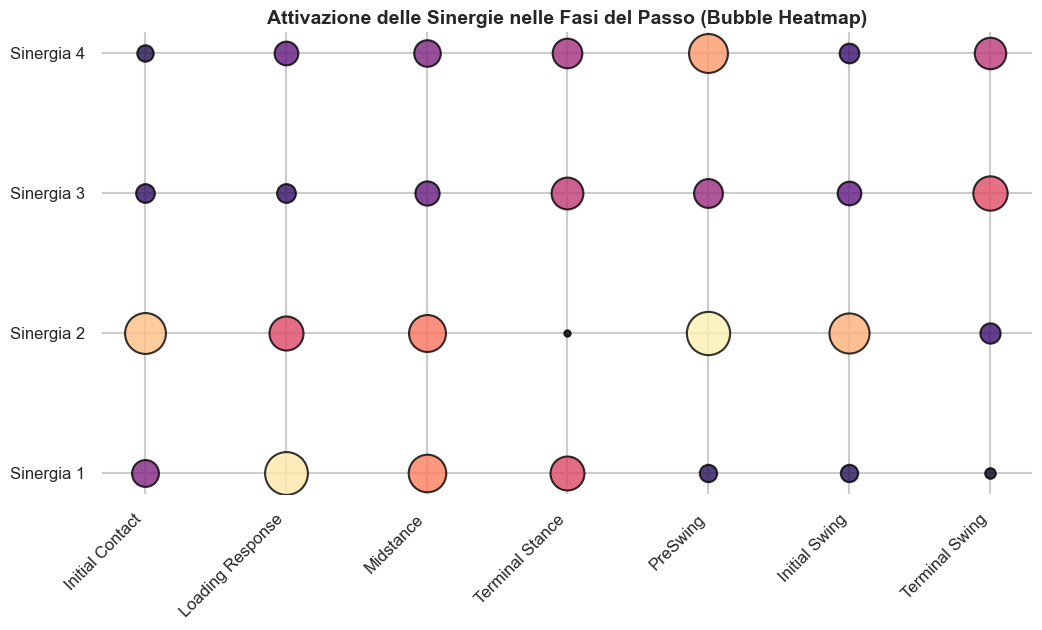

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creazione dati fittizi (Intensità delle sinergie nelle fasi del passo)
np.random.seed(42)
data = np.random.rand(4, 7)  # 4 sinergie, 7 fasi del passo

# Creazione DataFrame
df = pd.DataFrame(data, columns=[
    "Initial Contact", "Loading Response", "Midstance", "Terminal Stance", 
    "PreSwing", "Initial Swing", "Terminal Swing"
], index=["Sinergia 1", "Sinergia 2", "Sinergia 3", "Sinergia 4"])

# Creazione figura
fig, ax = plt.subplots(figsize=(12, 6))

# Creazione della Bubble Heatmap
for i, row in enumerate(df.iterrows()):
    for j, value in enumerate(row[1]):
        ax.scatter(j, i, s=value*1000, color=sns.color_palette("magma", as_cmap=True)(value), alpha=0.8, edgecolors="black")

# Personalizzazione degli assi
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha="right", fontsize=12)
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=12)

# Rimozione delle linee dell'asse
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Titolo
plt.title("Attivazione delle Sinergie nelle Fasi del Passo (Bubble Heatmap)", fontsize=14, fontweight="bold")

# Mostrare il grafico
plt.show()

Provo a calcolare shap values per output 2 specifico

In [139]:
print("Output shapes:")
for i, output in enumerate(model.outputs):
    print(f"Output {i+1}: {output.shape}")


Output shapes:
Output 1: (None, 14)
Output 2: (None, 28)


Dimensioni SHAP values per la classe temporale: (100, 32)


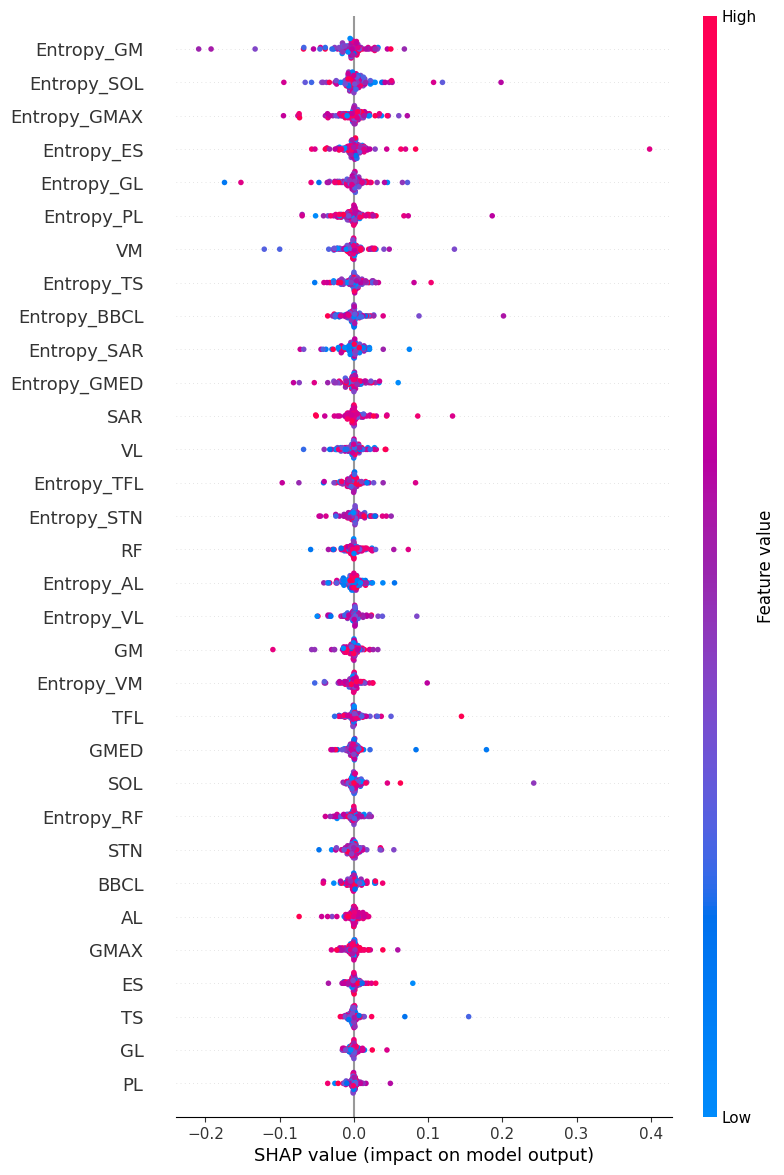

In [152]:
import shap
import numpy as np

# Dimensione effettiva del subset utilizzato durante il calcolo SHAP
subset_size = shap_values_output2[0].shape[0]  # Ad esempio, 100

# Estrazione dei valori SHAP per una specifica classe temporale
class_index = 24  # Indice della classe (esempio: TerminalSwing_1)
shap_values_temporal_class = shap_values_output2[0][:, :, :, class_index].squeeze()  # Usa tutto il subset calcolato

# Verifica delle dimensioni dei dati SHAP
print("Dimensioni SHAP values per la classe temporale:", shap_values_temporal_class.shape)

# Uso dei valori effettivi delle feature temporali per la scala cromatica
# Nota: qui non c'è bisogno di subset_indices, poiché usiamo direttamente tutti i valori calcolati
feature_values = X_test_temp[:subset_size, :, 0]  # Assicurati che il subset corrisponda alla dimensione calcolata

# Creazione di un Beeswarm Plot compatibile
shap_values_explanation = shap.Explanation(
    values=shap_values_temporal_class,  # Valori SHAP per la classe
    base_values=None,  # Nessun valore di base richiesto per il beeswarm
    data=feature_values,  # Usa i valori reali delle feature per la scala cromatica
    feature_names=temporal_features  # Nomi delle feature temporali
)

# Generazione del Beeswarm Plot
shap.plots.beeswarm(shap_values_explanation, max_display=len(temporal_features))

Dimensioni SHAP values per la classe temporale: (100, 32)


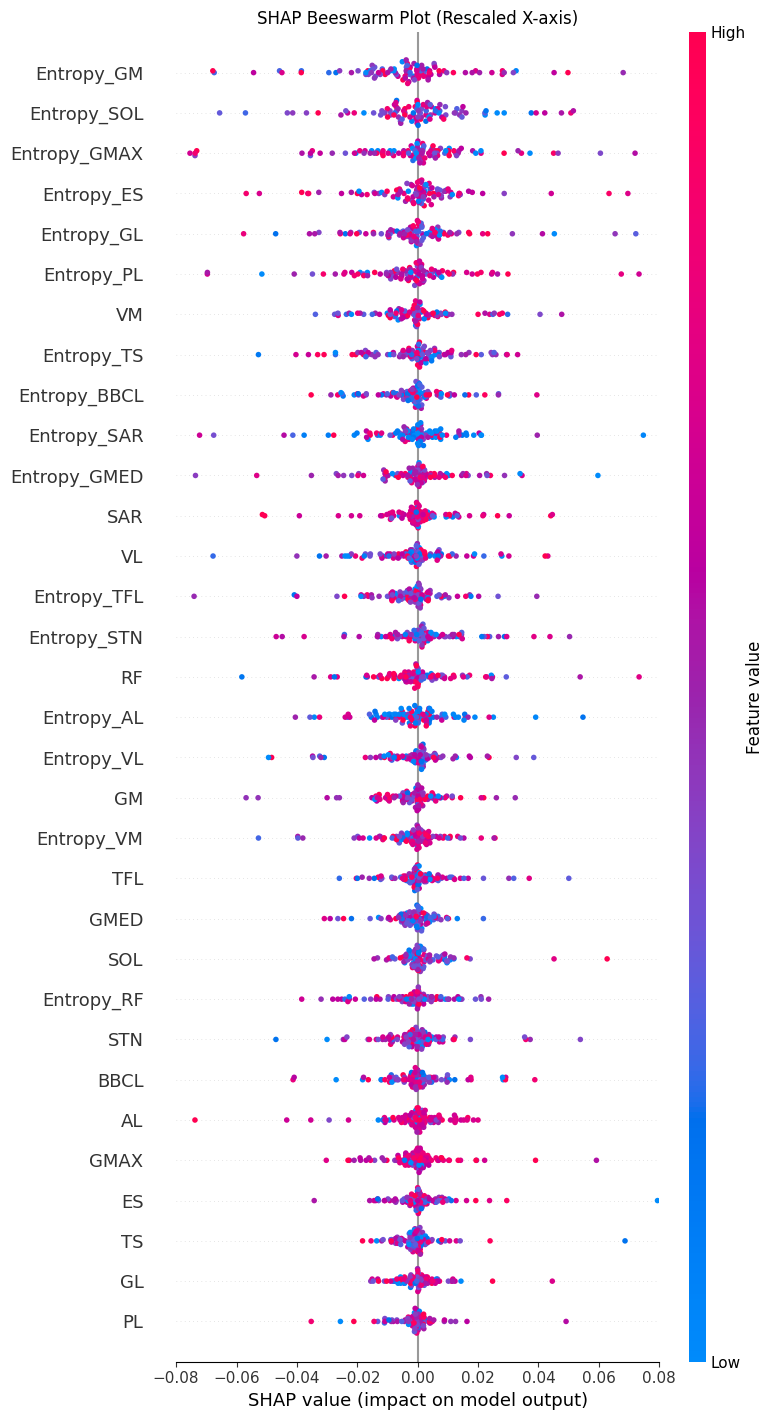

In [157]:
import matplotlib.pyplot as plt
import shap
import numpy as np

# Dimensione effettiva del subset utilizzato durante il calcolo SHAP
subset_size = shap_values_output2[0].shape[0]  # Ad esempio, 100

# Estrazione dei valori SHAP per una specifica classe temporale
class_index = 24  # Indice della classe (esempio: TerminalSwing_1)
shap_values_temporal_class = shap_values_output2[0][:, :, :, class_index].squeeze()  # Usa tutto il subset calcolato

# Verifica delle dimensioni dei dati SHAP
print("Dimensioni SHAP values per la classe temporale:", shap_values_temporal_class.shape)

# Uso dei valori effettivi delle feature temporali per la scala cromatica
# Nota: qui non c'è bisogno di subset_indices, poiché usiamo direttamente tutti i valori calcolati
feature_values = X_test_temp[:subset_size, :, 0]  # Assicurati che il subset corrisponda alla dimensione calcolata

# Creazione di un Beeswarm Plot compatibile
shap_values_explanation = shap.Explanation(
    values=shap_values_temporal_class,  # Valori SHAP per la classe
    base_values=None,  # Nessun valore di base richiesto per il beeswarm
    data=feature_values,  # Usa i valori reali delle feature per la scala cromatica
    feature_names=temporal_features  # Nomi delle feature temporali
)

# Generazione del Beeswarm Plot con limiti sull'asse x
plt.figure(figsize=(10, 8))  # Modifica le dimensioni per un miglior layout
shap.plots.beeswarm(
    shap_values_explanation,
    max_display=len(temporal_features),
    show=False
)

# Restringi l'asse x per migliorare la leggibilità
plt.xlim(-0.08, 0.08)  # Imposta i limiti per evidenziare la regione più interessante
plt.title("SHAP Beeswarm Plot (Rescaled X-axis)")
plt.tight_layout()
plt.show()

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/1893878542.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_shap_values[:10], y=sorted_features[:10], palette="viridis")


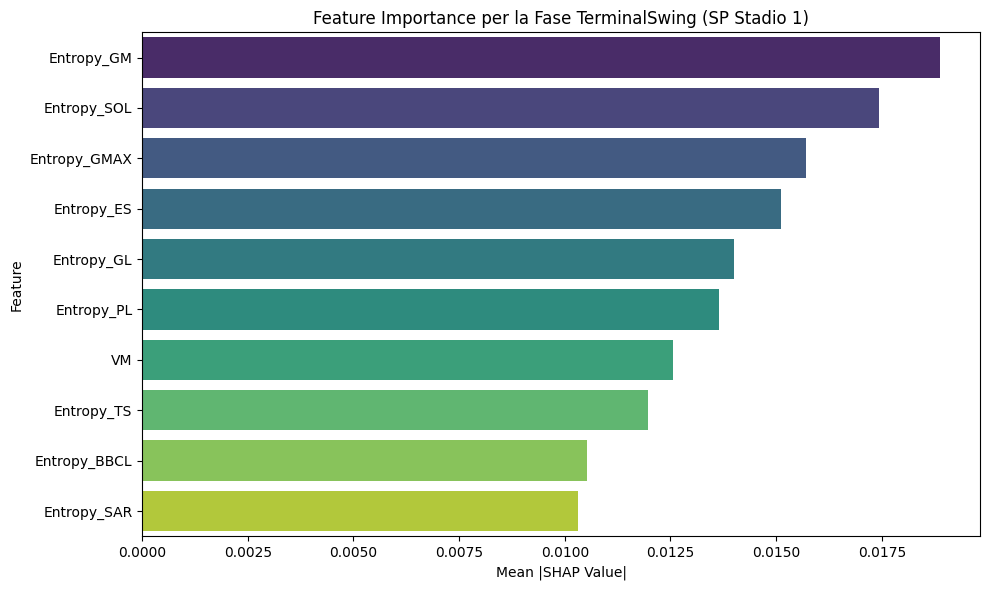

In [158]:
# Calcolo dell'impatto medio assoluto delle feature
mean_shap_values = np.mean(np.abs(shap_values_temporal_class), axis=0)

# Ordinare le feature per impatto
sorted_indices = np.argsort(mean_shap_values)[::-1]
sorted_features = np.array(temporal_features)[sorted_indices]
sorted_shap_values = mean_shap_values[sorted_indices]

# Plot delle prime 10 feature più importanti
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_shap_values[:10], y=sorted_features[:10], palette="viridis")
plt.title("Feature Importance per la Fase TerminalSwing (SP Stadio 1)")
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Testo beeswarm su questo output specifico

ESCLUDO LE FEATURE STATICHE

In [131]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

def shap_analysis_temporal_features_output2(class_index, subset_size=500):
    """
    Funzione per eseguire l'analisi SHAP esclusivamente per le feature temporali
    su una specifica classe dell'Output2.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]

    # Creare un placeholder per le feature statiche (array di zeri)
    X_test_static_placeholder = np.zeros((subset_size, X_static.shape[1]))

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, np.zeros((X_train_temp.shape[0], X_static.shape[1]))]  # Placeholder per le feature statiche
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_placeholder])

    # Verifica della forma dei valori SHAP
    print("Forma delle SHAP values per le feature temporali:", np.array(shap_values_output2[0]).shape)

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title(f"SHAP Values for Temporal Features (Output2, Class {class_index})")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Beeswarm plot per visualizzare la distribuzione completa dei valori SHAP
    shap.summary_plot(
        shap_values_output2[0][:, :, class_index],
        X_test_temp_subset.reshape(X_test_temp_subset.shape[0], -1),
        feature_names=temporal_features,
        plot_type="dot"
    )

# Esegui l'analisi per una classe specifica di Output2, ad esempio "TerminalSwing_1" (classe 24)
shap_analysis_temporal_features_output2(class_index=24, subset_size=500)


Forma delle SHAP values per le feature temporali: (500, 32, 1, 28)


IndexError: index 24 is out of bounds for axis 2 with size 1

In [134]:
import shap
import numpy as np
import matplotlib.pyplot as plt

def shap_beeswarm_for_class_output2(class_index, subset_size=500):
    """
    Funzione per creare un Beeswarm Plot SHAP per le feature temporali
    per una specifica classe dell'Output2.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]

    # Creare un placeholder per le feature statiche (array di zeri)
    X_test_static_placeholder = np.zeros((subset_size, X_static.shape[1]))

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, np.zeros((X_train_temp.shape[0], X_static.shape[1]))]  # Placeholder per le feature statiche
    )

    # Calcolo dei valori SHAP solo per il subset del test set
    shap_values_output2 = explainer_output2.shap_values(
        [X_test_temp_subset, X_test_static_placeholder]
    )

    # Estrarre i valori SHAP specifici per la classe selezionata
    shap_values_for_class = shap_values_output2[0][:, :, class_index]

    # Generare il Beeswarm Plot
    shap.plots.beeswarm(
        shap.Explanation(
            values=shap_values_for_class.reshape(-1, len(temporal_features)),
            base_values=None,  # Non necessario per il beeswarm
            data=X_test_temp_subset.reshape(-1, len(temporal_features)),
            feature_names=temporal_features
        )
    )

# Esegui l'analisi e il Beeswarm Plot per "TerminalSwing_1" (classe 24)
shap_beeswarm_for_class_output2(class_index=24, subset_size=500)

IndexError: index 24 is out of bounds for axis 2 with size 1

Commentiamo qui i risultati: Valori delle features e andamenti nel grafico

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3415870012.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


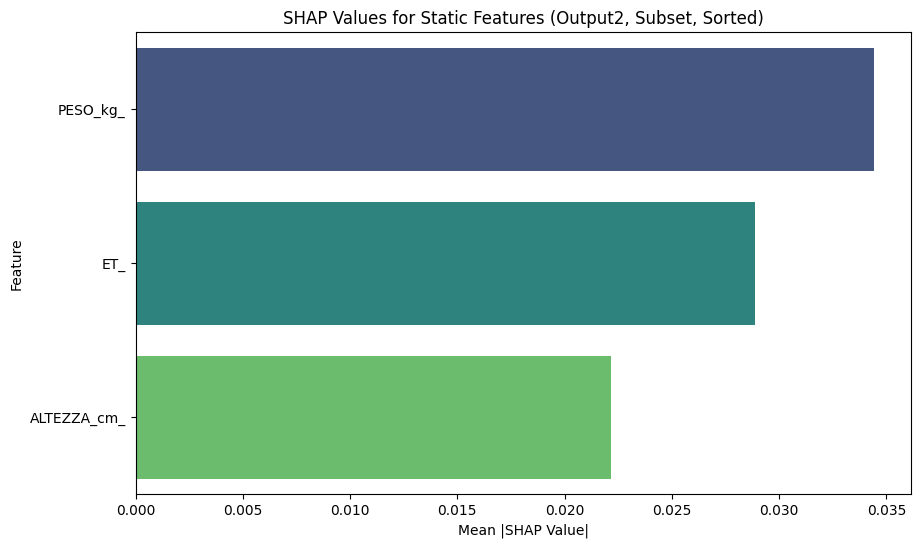

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/3415870012.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


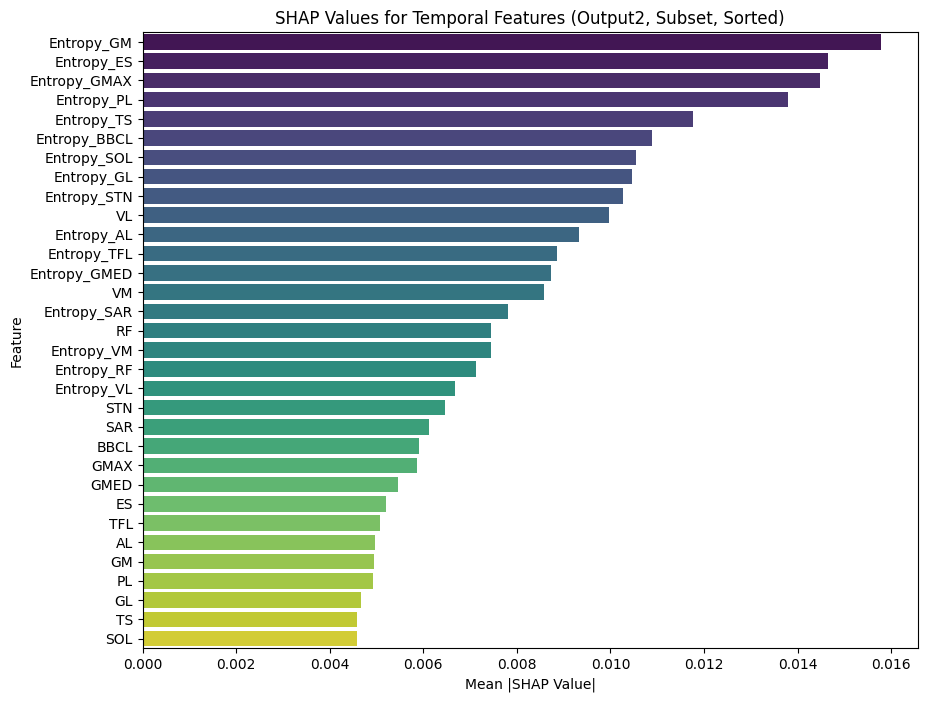

In [121]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "TerminalSwing_2" (classe 25)
shap_analysis_for_class_output2(class_index=25, subset_size=2500)

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/4051150175.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


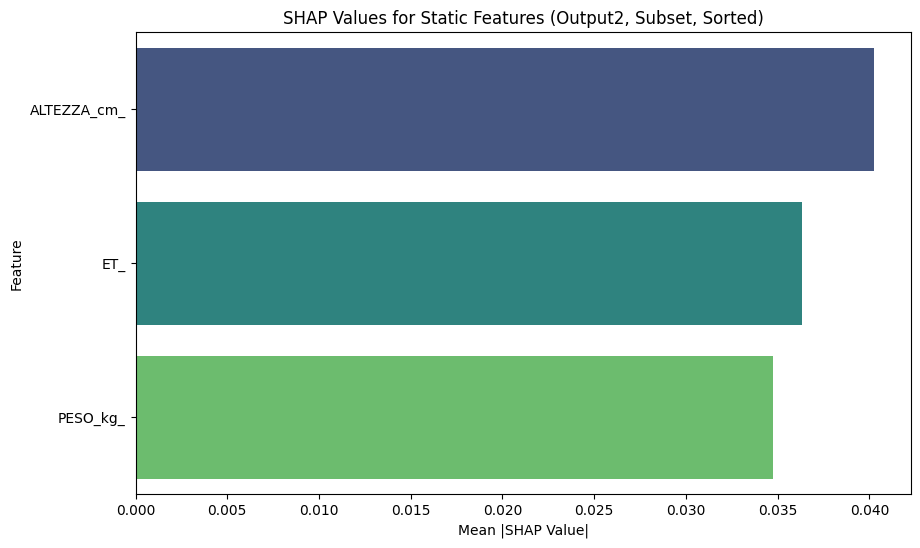

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_29375/4051150175.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


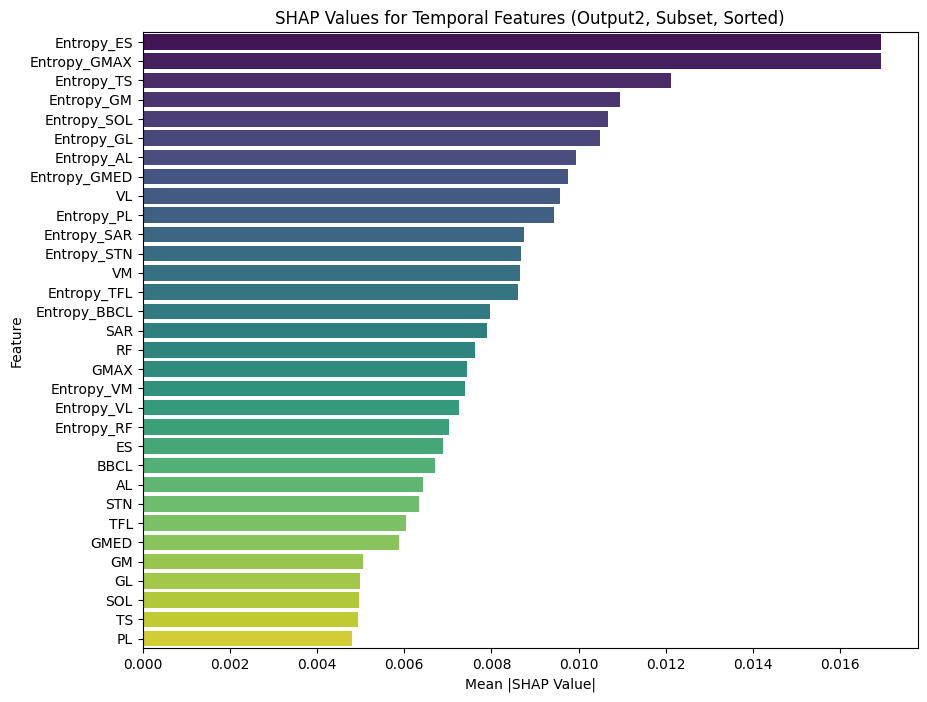

In [122]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Plot dei valori SHAP per le feature statiche, solo per la classe specificata
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature in ordine decrescente
    sorted_indices_static = np.argsort(mean_shap_values_static)[::-1]
    sorted_shap_values_static = mean_shap_values_static[sorted_indices_static]
    sorted_static_features = np.array(static_features)[sorted_indices_static]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=sorted_shap_values_static,
        y=sorted_static_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Static Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    
    # Ordinare i valori SHAP e le feature temporali in ordine decrescente
    sorted_indices_temporal = np.argsort(mean_shap_values_temporal)[::-1]
    sorted_shap_values_temporal = mean_shap_values_temporal[sorted_indices_temporal]
    sorted_temporal_features = np.array(temporal_features)[sorted_indices_temporal]

    # Plot dei valori SHAP per le feature temporali
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=sorted_shap_values_temporal,
        y=sorted_temporal_features,
        palette="viridis"
    )
    plt.title("SHAP Values for Temporal Features (Output2, Subset, Sorted)")
    plt.xlabel("Mean |SHAP Value|")
    plt.ylabel("Feature")
    plt.show()

# Esegui l'analisi per una classe specifica di Output2,  "TerminalSwing_3" (classe 26)
shap_analysis_for_class_output2(class_index=26, subset_size=2500)

# GRAFICO MER SHAP VALUES PER LE VARIE FASI NEI VARI OUTPUT

# INITIAL SWING OUTPUT 2

SP1

In [29]:
def shap_analysis_for_class_output2(class_index, subset_size=2500):
    """
    Funzione per eseguire l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto.
    class_index: indice della classe per cui eseguire l'analisi.
    subset_size: numero di campioni da includere nel subset.
    """
    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature statiche
    mean_shap_values_static = np.mean(np.abs(shap_values_output2[1][:, :, class_index]), axis=0)
    print("Valori medi SHAP (modulo) per le feature statiche:")
    print(dict(zip(static_features, mean_shap_values_static)))

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(dict(zip(temporal_features, mean_shap_values_temporal)))

    # Restituisci i valori medi SHAP
    return {
        "static": dict(zip(static_features, mean_shap_values_static)),
        "temporal": dict(zip(temporal_features, mean_shap_values_temporal))
    }

# Esegui l'analisi per una classe specifica di Output2, "InitialSwing_1" (classe 0)
shap_values_mean = shap_analysis_for_class_output2(class_index=0, subset_size=2500)

# I valori medi SHAP sono ora disponibili nel dizionario `shap_values_mean`

Valori medi SHAP (modulo) per le feature statiche:
{'PESO_kg_': np.float64(0.05411132106941077), 'ALTEZZA_cm_': np.float64(0.06618304984991992), 'ET_': np.float64(0.08433708311025548)}

Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.016979618521591147), 'VL': np.float64(0.016235948895598176), 'VM': np.float64(0.016922617942885836), 'GMED': np.float64(0.01201106558604024), 'TFL': np.float64(0.011959777618898715), 'STN': np.float64(0.010842968711804632), 'BBCL': np.float64(0.011803859467456277), 'TS': np.float64(0.011886155198593372), 'PL': np.float64(0.010469456035938947), 'SOL': np.float64(0.010330695737854513), 'GM': np.float64(0.012257753671705542), 'GL': np.float64(0.011017239066651507), 'GMAX': np.float64(0.011128089561185425), 'ES': np.float64(0.010530819188951318), 'AL': np.float64(0.011819544396476976), 'SAR': np.float64(0.01293610346103676), 'Entropy_RF': np.float64(0.01475972470497245), 'Entropy_VL': np.float64(0.014906075206019522), 'Entropy_VM': np.f

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/828523144.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




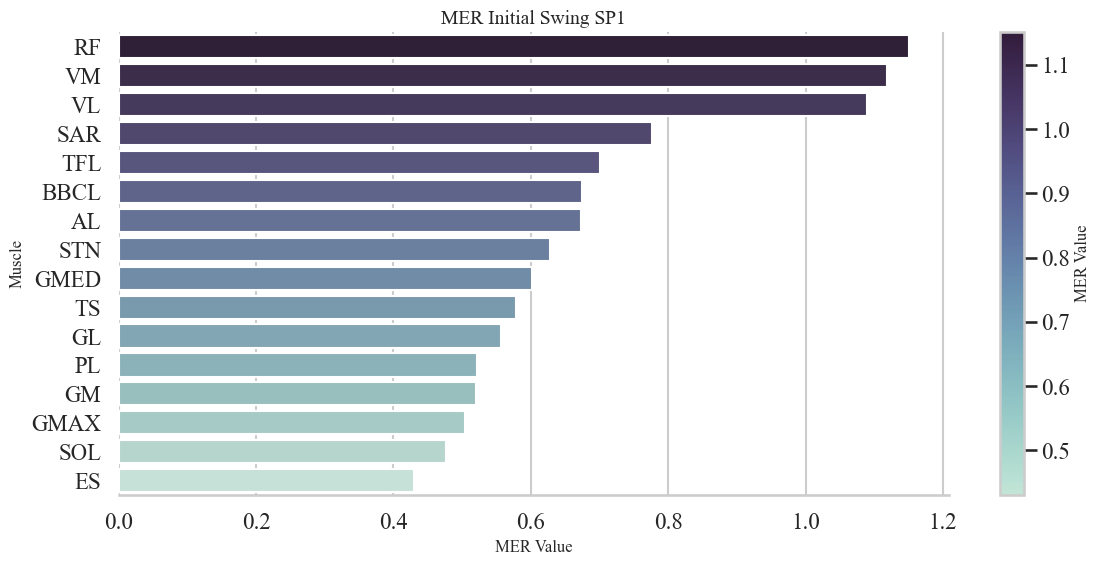

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

# Dizionario contenente i valori medi SHAP delle feature temporali
shap_values_temporal = {
    'RF': 0.016979618521591147, 'VL': 0.016235948895598176, 'VM': 0.016922617942885836,
    'GMED': 0.01201106558604024, 'TFL': 0.011959777618898715, 'STN': 0.010842968711804632,
    'BBCL': 0.011803859467456277, 'TS': 0.011886155198593372, 'PL': 0.010469456035938947,
    'SOL': 0.010330695737854513, 'GM': 0.012257753671705542, 'GL': 0.011017239066651507,
    'GMAX': 0.011128089561185425, 'ES': 0.010530819188951318, 'AL': 0.011819544396476976,
    'SAR': 0.01293610346103676, 'Entropy_RF': 0.01475972470497245, 'Entropy_VL': 0.014906075206019522,
    'Entropy_VM': 0.01512840399035249, 'Entropy_GMED': 0.019946239167379646, 'Entropy_TFL': 0.017074208697875657,
    'Entropy_STN': 0.0172673526306593, 'Entropy_BBCL': 0.01750471934862435, 'Entropy_TS': 0.020537140676399484,
    'Entropy_PL': 0.020063754371651886, 'Entropy_SOL': 0.02169849971607109, 'Entropy_GL': 0.019784927903466087,
    'Entropy_GM': 0.023534870210492408, 'Entropy_GMAX': 0.022053637501494812, 'Entropy_ES': 0.024456174715173803,
    'Entropy_AL': 0.017548298359235014, 'Entropy_SAR': 0.01665476820686249
}

# Lista delle feature temporali
temporal_features = [
    'RF', 'VL', 'VM', 'GMED', 'TFL', 'STN', 'BBCL', 'TS', 'PL', 'SOL',
    'GM', 'GL', 'GMAX', 'ES', 'AL', 'SAR', 'Entropy_RF', 'Entropy_VL',
    'Entropy_VM', 'Entropy_GMED', 'Entropy_TFL', 'Entropy_STN', 'Entropy_BBCL',
    'Entropy_TS', 'Entropy_PL', 'Entropy_SOL', 'Entropy_GL', 'Entropy_GM',
    'Entropy_GMAX', 'Entropy_ES', 'Entropy_AL', 'Entropy_SAR'
]

def calculate_and_plot_mer(shap_values_temporal, temporal_features):
    """
    Calcola i valori di MER (Muscle-to-Entropy Ratio) e genera un barplot senza bordi e con legenda colorata.
    """
    # Separare muscoli ed entropie
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    # Creare un dizionario per MER
    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title("MER Initial Swing SP1", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# Calcola e visualizza MER
calculate_and_plot_mer(shap_values_temporal, temporal_features)

SP2


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.01630610530553505), 'VL': np.float64(0.01727312421768547), 'VM': np.float64(0.019550827338685486), 'GMED': np.float64(0.012108511515019108), 'TFL': np.float64(0.01230689861629453), 'STN': np.float64(0.011167527859306347), 'BBCL': np.float64(0.012398670566012333), 'TS': np.float64(0.01257816364887749), 'PL': np.float64(0.011354419844474068), 'SOL': np.float64(0.010628930490571656), 'GM': np.float64(0.01453729369340217), 'GL': np.float64(0.013192338823800673), 'GMAX': np.float64(0.011497265162846451), 'ES': np.float64(0.009868697326541201), 'AL': np.float64(0.011245018679305758), 'SAR': np.float64(0.011601598887438285), 'Entropy_RF': np.float64(0.01570876660580402), 'Entropy_VL': np.float64(0.014967858334869197), 'Entropy_VM': np.float64(0.016927031317289586), 'Entropy_GMED': np.float64(0.020476046888465497), 'Entropy_TFL': np.float64(0.019527604847209726), 'Entropy_STN': np.float64(0.017379280261106033), 'Entropy_B

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/994110543.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




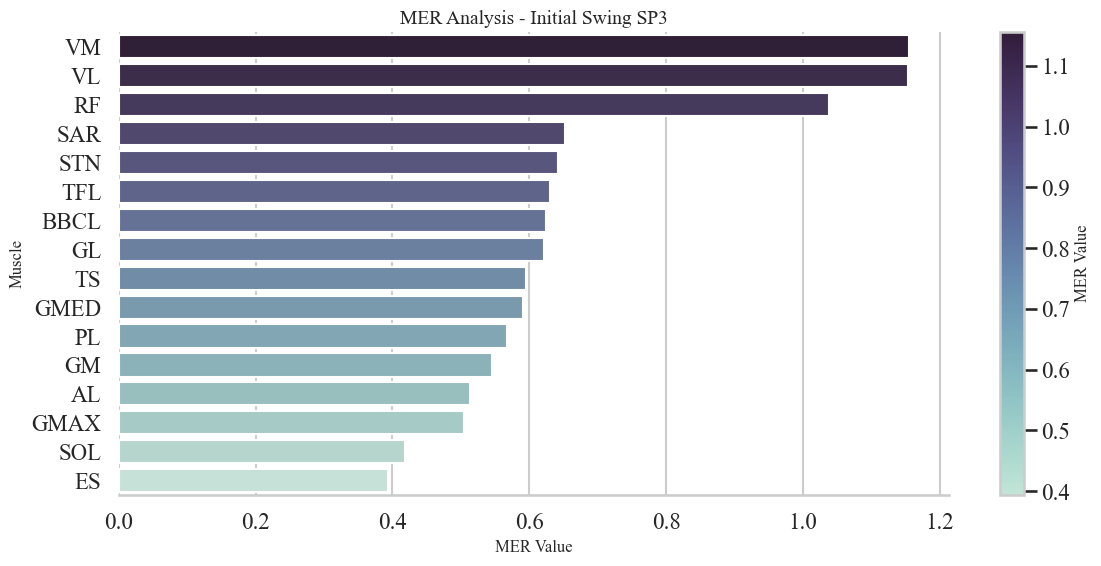

In [37]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Initial Swing SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "InitialSwing_2" (classe 1)**
shap_analysis_and_plot_mer(class_index=1, subset_size=2500)

SP3


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.01009064480373413), 'VL': np.float64(0.010294461062486665), 'VM': np.float64(0.01137782564059255), 'GMED': np.float64(0.007855274273610586), 'TFL': np.float64(0.00835764296369896), 'STN': np.float64(0.006950117752023789), 'BBCL': np.float64(0.007380230563079522), 'TS': np.float64(0.00803210168509836), 'PL': np.float64(0.007138271573227439), 'SOL': np.float64(0.00665169745864024), 'GM': np.float64(0.007810799166031333), 'GL': np.float64(0.00712796245251377), 'GMAX': np.float64(0.008956489125549763), 'ES': np.float64(0.007946117666258419), 'AL': np.float64(0.007508121214657501), 'SAR': np.float64(0.009373810849854362), 'Entropy_RF': np.float64(0.008799915617814713), 'Entropy_VL': np.float64(0.009449032406284471), 'Entropy_VM': np.float64(0.009699863237776503), 'Entropy_GMED': np.float64(0.011858482505821394), 'Entropy_TFL': np.float64(0.010684500645781919), 'Entropy_STN': np.float64(0.011158820609483621), 'Entropy_B

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/4090179091.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




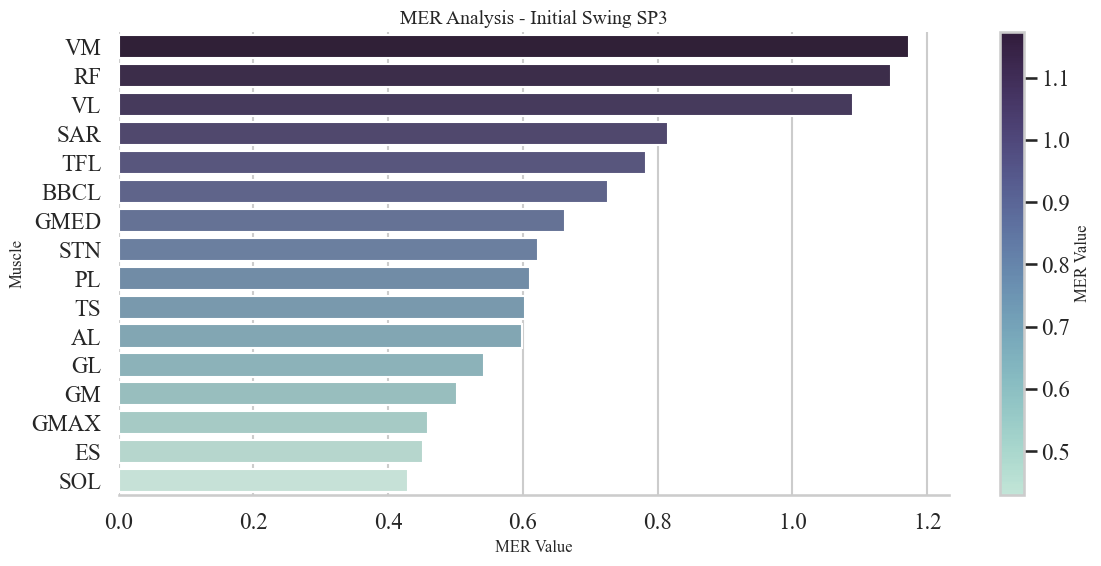

In [36]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Initial Swing SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "InitialSwing_3" (classe 2)**
shap_analysis_and_plot_mer(class_index=2, subset_size=2500)

HS


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.027211800084657126), 'VL': np.float64(0.027466557260818446), 'VM': np.float64(0.026323664754835954), 'GMED': np.float64(0.0174322970312247), 'TFL': np.float64(0.018186643308603607), 'STN': np.float64(0.015382611568593621), 'BBCL': np.float64(0.01636139231002531), 'TS': np.float64(0.016781613263913187), 'PL': np.float64(0.018322240409024745), 'SOL': np.float64(0.014978931819868013), 'GM': np.float64(0.018719180216882705), 'GL': np.float64(0.01835270901936692), 'GMAX': np.float64(0.014984753999631811), 'ES': np.float64(0.014006068567081933), 'AL': np.float64(0.016220742103196083), 'SAR': np.float64(0.01709034719874762), 'Entropy_RF': np.float64(0.02491784834121613), 'Entropy_VL': np.float64(0.022901545532370438), 'Entropy_VM': np.float64(0.021478994859151862), 'Entropy_GMED': np.float64(0.024784097600038513), 'Entropy_TFL': np.float64(0.022702171572471546), 'Entropy_STN': np.float64(0.02438243186970958), 'Entropy_BB

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3026452769.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




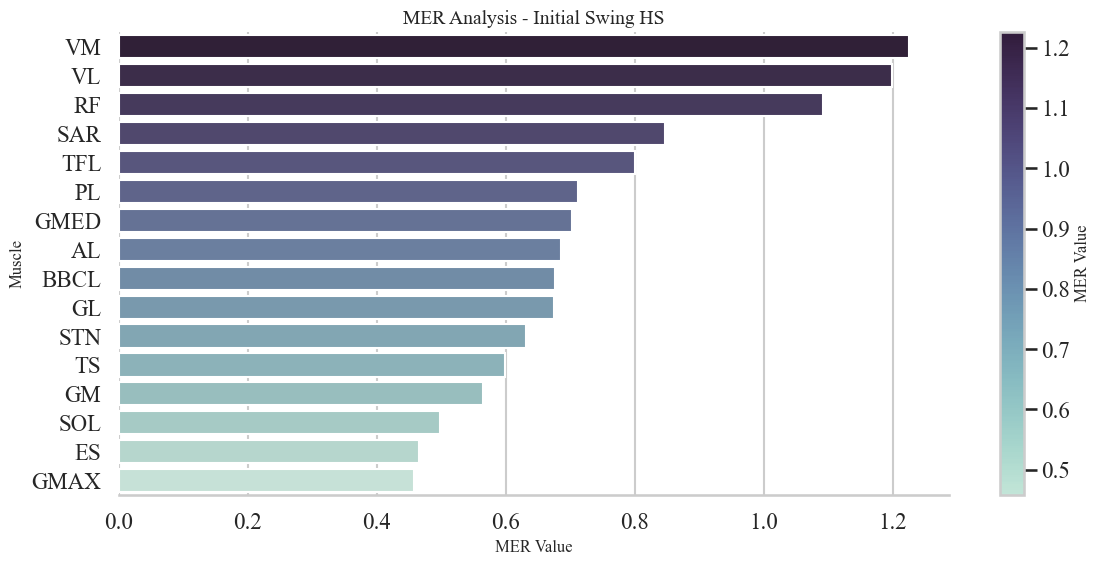

In [38]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Initial Swing HS", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "InitialSwing_HS" (classe 3)**
shap_analysis_and_plot_mer(class_index=3, subset_size=2500)

# LOADING RESPONSE OUTPUT 2

SP1


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.0075893449218882095), 'VL': np.float64(0.009075320156551289), 'VM': np.float64(0.00882377418470187), 'GMED': np.float64(0.006589285847444921), 'TFL': np.float64(0.005998163841980926), 'STN': np.float64(0.005952280232406519), 'BBCL': np.float64(0.0056477250119732845), 'TS': np.float64(0.004800224418295875), 'PL': np.float64(0.005692099062432589), 'SOL': np.float64(0.005907459610221918), 'GM': np.float64(0.006604647560141552), 'GL': np.float64(0.0060462122918377645), 'GMAX': np.float64(0.00620443301037817), 'ES': np.float64(0.005445184904603593), 'AL': np.float64(0.007031548147221525), 'SAR': np.float64(0.007692424719866005), 'Entropy_RF': np.float64(0.00696938393222633), 'Entropy_VL': np.float64(0.007625054627547357), 'Entropy_VM': np.float64(0.0074060562301462365), 'Entropy_GMED': np.float64(0.012614200773134689), 'Entropy_TFL': np.float64(0.008738292361825734), 'Entropy_STN': np.float64(0.009847197723856197), 'En

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1114283982.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




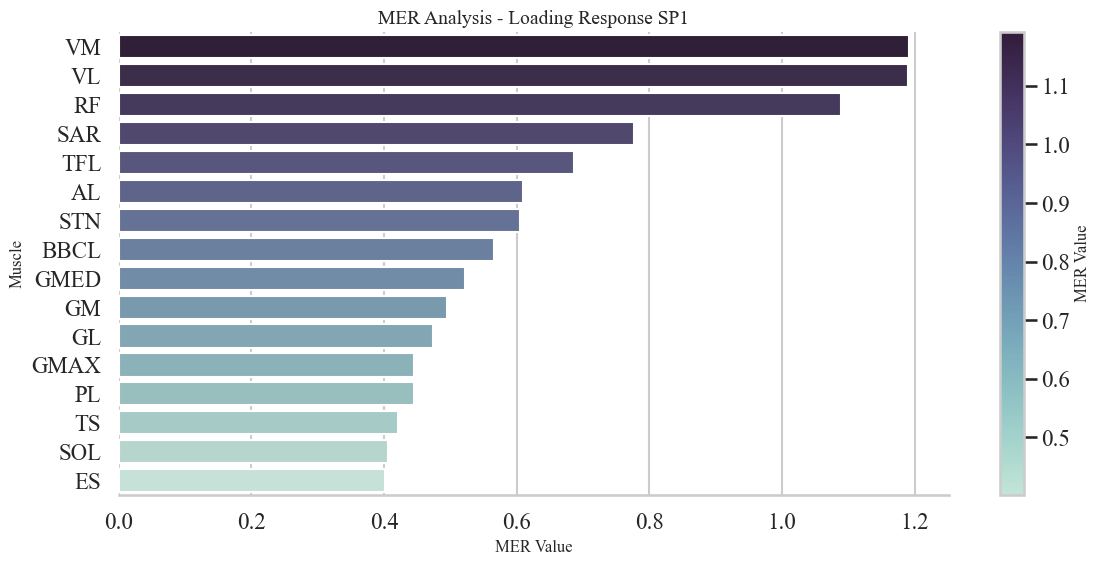

In [39]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Loading Response SP1", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Loading Response per SP1" (classe 4)**
shap_analysis_and_plot_mer(class_index=4, subset_size=2500)

SP2


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.006084540276980323), 'VL': np.float64(0.006552890649887871), 'VM': np.float64(0.007001982091561473), 'GMED': np.float64(0.005484003161222182), 'TFL': np.float64(0.004419026497238309), 'STN': np.float64(0.005056793106772006), 'BBCL': np.float64(0.005092250297183773), 'TS': np.float64(0.0035220241379116603), 'PL': np.float64(0.004095885768151018), 'SOL': np.float64(0.003987442659890429), 'GM': np.float64(0.004687102651718221), 'GL': np.float64(0.004421765748912006), 'GMAX': np.float64(0.0045250371416782915), 'ES': np.float64(0.0037060406806335437), 'AL': np.float64(0.0040806854894879325), 'SAR': np.float64(0.0038540556415463754), 'Entropy_RF': np.float64(0.005577491112323037), 'Entropy_VL': np.float64(0.0064868173946266115), 'Entropy_VM': np.float64(0.006362361758650652), 'Entropy_GMED': np.float64(0.009382782315156733), 'Entropy_TFL': np.float64(0.007491821816431661), 'Entropy_STN': np.float64(0.0078038764717745235

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1592493689.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




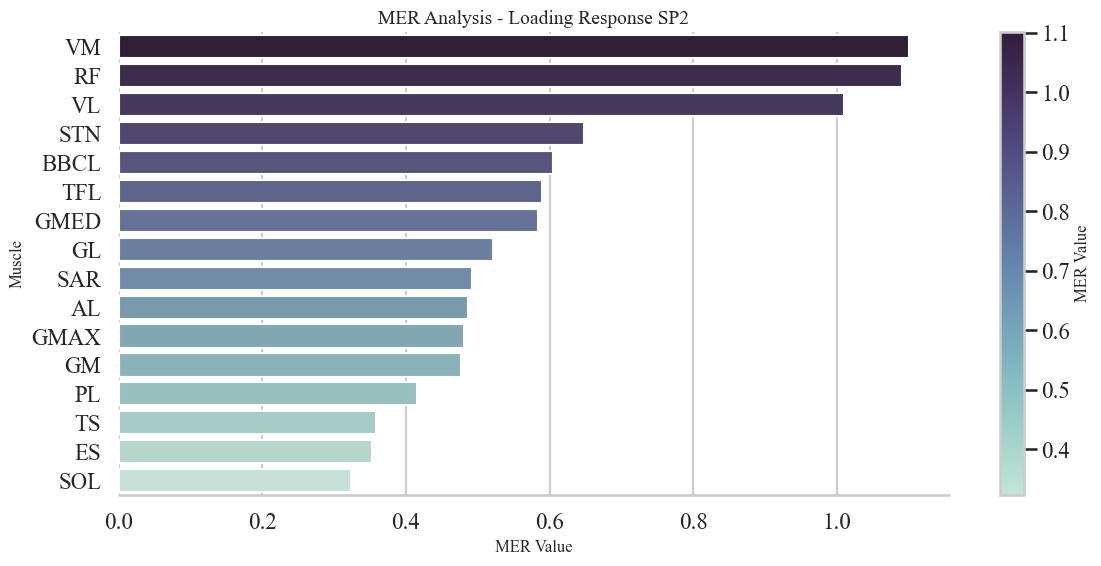

In [40]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Loading Response SP2", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Loading Response per SP2" (classe 5)**
shap_analysis_and_plot_mer(class_index=5, subset_size=2500)

SP3


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.004776260859323835), 'VL': np.float64(0.005506918498919696), 'VM': np.float64(0.0048950302361846585), 'GMED': np.float64(0.003961650223620521), 'TFL': np.float64(0.0037015349070837786), 'STN': np.float64(0.0038936490318332616), 'BBCL': np.float64(0.0038766884491287664), 'TS': np.float64(0.0027708607264510755), 'PL': np.float64(0.0030569393974008235), 'SOL': np.float64(0.003244266957131265), 'GM': np.float64(0.0029947103071409045), 'GL': np.float64(0.00313887456412025), 'GMAX': np.float64(0.004461132450170027), 'ES': np.float64(0.0032869390829341027), 'AL': np.float64(0.0030899164536389357), 'SAR': np.float64(0.003951074110796555), 'Entropy_RF': np.float64(0.003987314997973829), 'Entropy_VL': np.float64(0.0042716145652633005), 'Entropy_VM': np.float64(0.004299003064983063), 'Entropy_GMED': np.float64(0.005463472371604541), 'Entropy_TFL': np.float64(0.005193254763709194), 'Entropy_STN': np.float64(0.0057360671353190

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1809148456.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




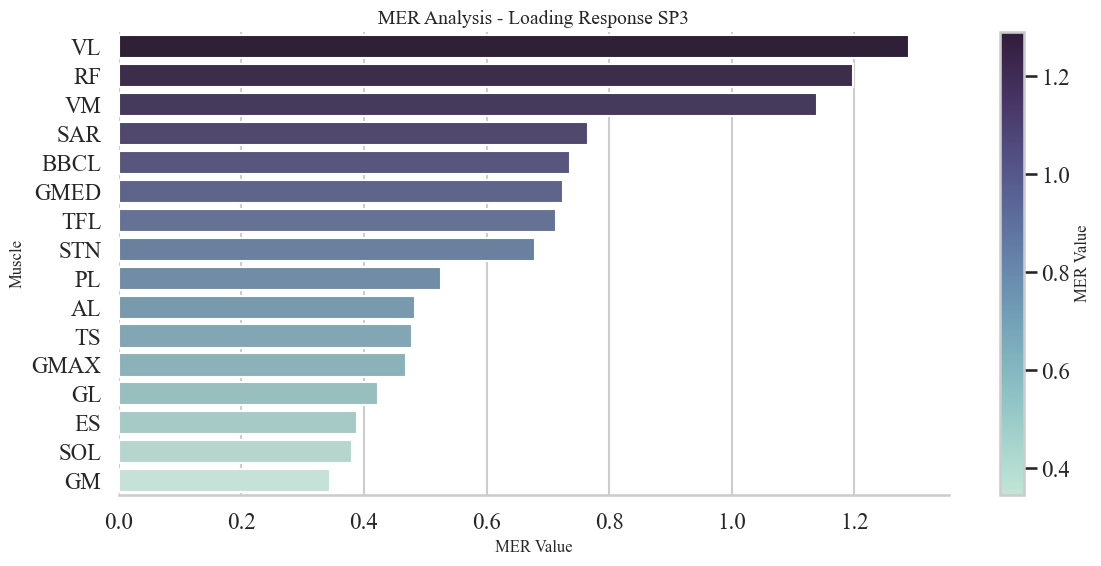

In [41]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Loading Response SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Loading Response per SP3" (classe 6)**
shap_analysis_and_plot_mer(class_index=6, subset_size=2500)

HS


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.007721591823187188), 'VL': np.float64(0.008328210234816629), 'VM': np.float64(0.009442583928684916), 'GMED': np.float64(0.006463106602744551), 'TFL': np.float64(0.00569015249921395), 'STN': np.float64(0.005860996183901692), 'BBCL': np.float64(0.005194394421820039), 'TS': np.float64(0.004507313937701383), 'PL': np.float64(0.00437116707908737), 'SOL': np.float64(0.004479172607815938), 'GM': np.float64(0.0044698669743094225), 'GL': np.float64(0.004461871886971565), 'GMAX': np.float64(0.005665948958822037), 'ES': np.float64(0.004401787345375274), 'AL': np.float64(0.005157223328347955), 'SAR': np.float64(0.005482354322861429), 'Entropy_RF': np.float64(0.006131058073842512), 'Entropy_VL': np.float64(0.006285969102289238), 'Entropy_VM': np.float64(0.007021303185182478), 'Entropy_GMED': np.float64(0.007718202850056446), 'Entropy_TFL': np.float64(0.006939445951306834), 'Entropy_STN': np.float64(0.009571892887512513), 'Entr

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/355493357.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




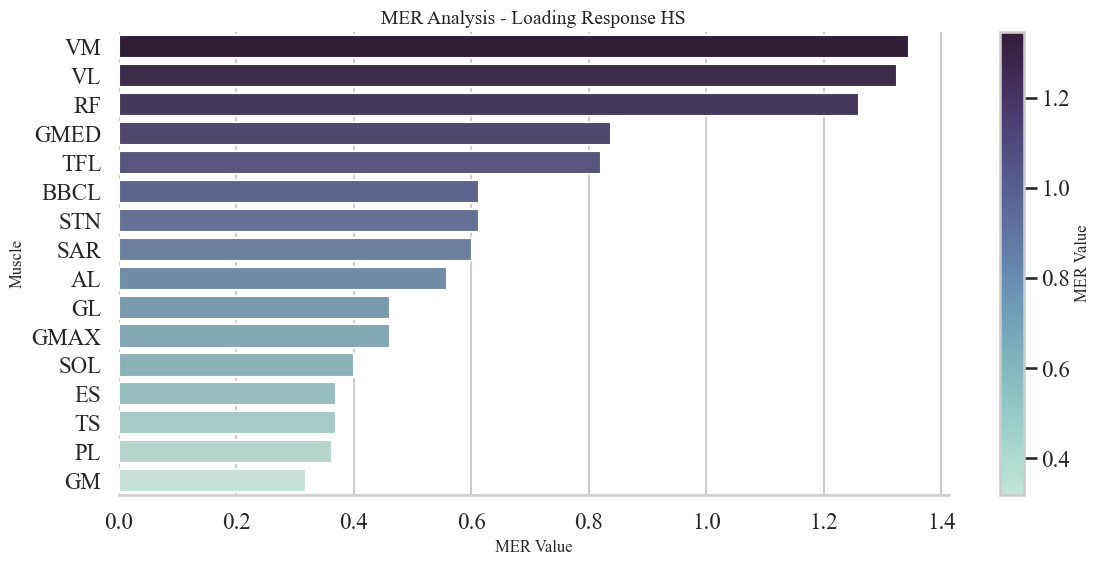

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Loading Response HS", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Loading Response per HS" (classe 7)**
shap_analysis_and_plot_mer(class_index=7, subset_size=2500)

# MIDSTANCE OUTPUT 2

SP1


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.010718847659821404), 'VL': np.float64(0.01103392692707299), 'VM': np.float64(0.010295672775862658), 'GMED': np.float64(0.00847976783514814), 'TFL': np.float64(0.008206709366836184), 'STN': np.float64(0.007080638962503042), 'BBCL': np.float64(0.007273887162384608), 'TS': np.float64(0.00576040777191879), 'PL': np.float64(0.007407118417837091), 'SOL': np.float64(0.007047166497197304), 'GM': np.float64(0.008476694525344828), 'GL': np.float64(0.007495668689276226), 'GMAX': np.float64(0.008019772644334898), 'ES': np.float64(0.0073438581159181015), 'AL': np.float64(0.00788479006801449), 'SAR': np.float64(0.009697274023813157), 'Entropy_RF': np.float64(0.00873033000102996), 'Entropy_VL': np.float64(0.010063597376269565), 'Entropy_VM': np.float64(0.010361519339893176), 'Entropy_GMED': np.float64(0.013704051398162017), 'Entropy_TFL': np.float64(0.011165891021072776), 'Entropy_STN': np.float64(0.011947580754061255), 'Entropy

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2468461010.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




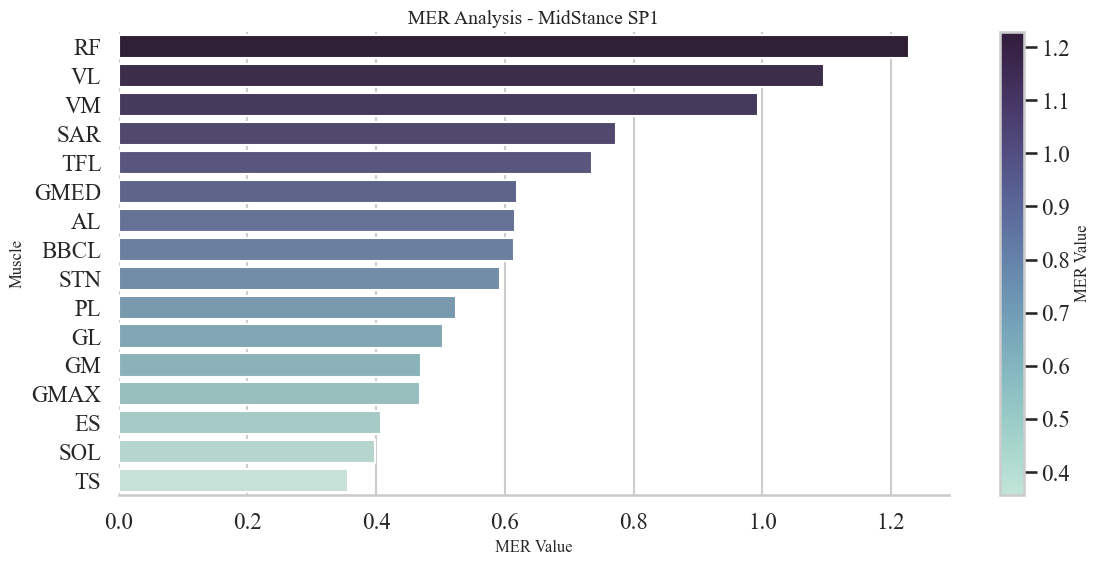

In [43]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidStance SP1", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidStance per SP1" (classe 8)**
shap_analysis_and_plot_mer(class_index=8, subset_size=2500)

SP2


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.010523972217187929), 'VL': np.float64(0.011330932211887898), 'VM': np.float64(0.011428117254674783), 'GMED': np.float64(0.008361452665205694), 'TFL': np.float64(0.007584430180927734), 'STN': np.float64(0.006627004851143136), 'BBCL': np.float64(0.00698258704192931), 'TS': np.float64(0.006421314029684208), 'PL': np.float64(0.007316260567051847), 'SOL': np.float64(0.007227764096591855), 'GM': np.float64(0.008968299121973609), 'GL': np.float64(0.0077291802718675515), 'GMAX': np.float64(0.00667211603064693), 'ES': np.float64(0.005724971901027152), 'AL': np.float64(0.006860830873430337), 'SAR': np.float64(0.007187360442355941), 'Entropy_RF': np.float64(0.009713131865427022), 'Entropy_VL': np.float64(0.01049097595786768), 'Entropy_VM': np.float64(0.01144676295797861), 'Entropy_GMED': np.float64(0.015054419371192375), 'Entropy_TFL': np.float64(0.01281223996402077), 'Entropy_STN': np.float64(0.013326217206960086), 'Entropy

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/626957409.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




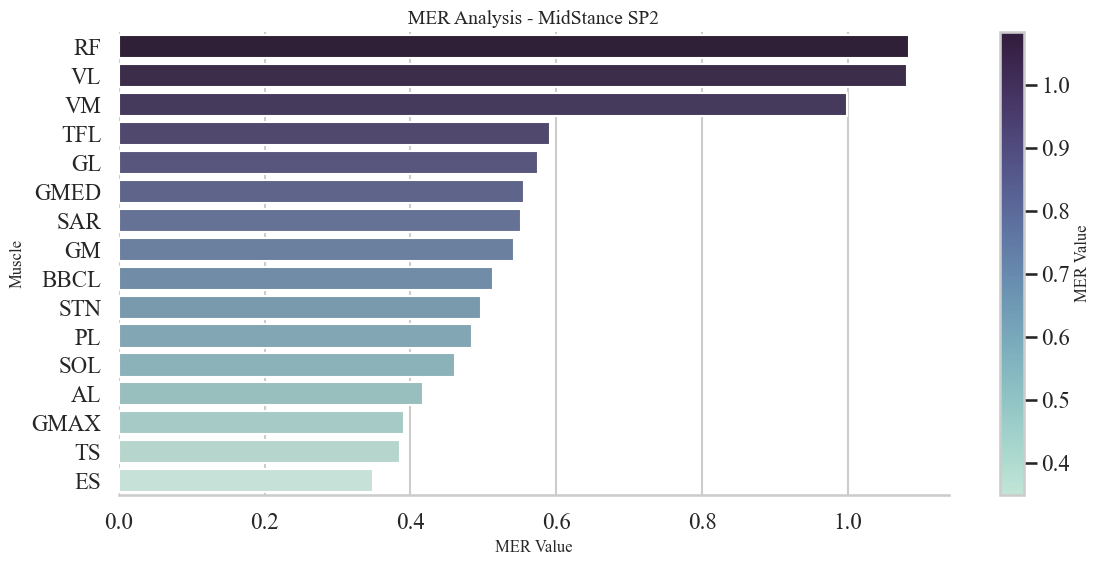

In [44]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidStance SP2", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidStance per SP2" (classe 9)**
shap_analysis_and_plot_mer(class_index=9, subset_size=2500)

SP3


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.00784264667646882), 'VL': np.float64(0.007640583610727356), 'VM': np.float64(0.0070887850403450105), 'GMED': np.float64(0.005944846264324763), 'TFL': np.float64(0.0061310640074682165), 'STN': np.float64(0.005257974352583226), 'BBCL': np.float64(0.005152761930772317), 'TS': np.float64(0.004587045694202641), 'PL': np.float64(0.006040509133223219), 'SOL': np.float64(0.005262957763993731), 'GM': np.float64(0.006116614151185792), 'GL': np.float64(0.005482771955852919), 'GMAX': np.float64(0.006378603784285167), 'ES': np.float64(0.004906817617910538), 'AL': np.float64(0.00536155606609158), 'SAR': np.float64(0.006596306201036984), 'Entropy_RF': np.float64(0.005934411904801533), 'Entropy_VL': np.float64(0.007077429975466272), 'Entropy_VM': np.float64(0.006942229461840634), 'Entropy_GMED': np.float64(0.008674757625513134), 'Entropy_TFL': np.float64(0.00732185584198511), 'Entropy_STN': np.float64(0.009285315642858996), 'Entr

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1583945761.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




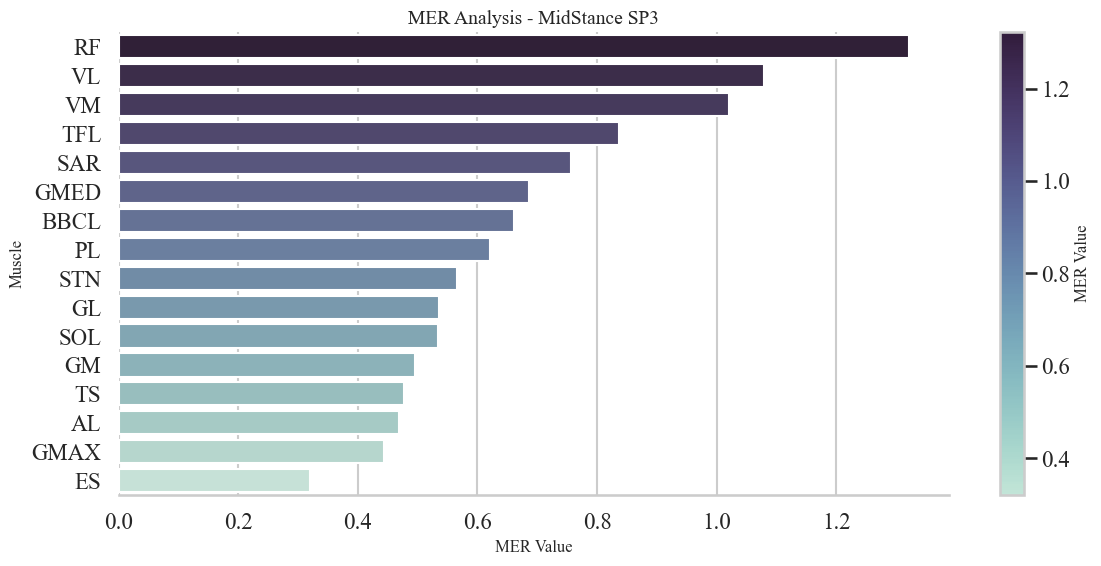

In [45]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidStance SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidStance per SP3" (classe 10)**
shap_analysis_and_plot_mer(class_index=10, subset_size=2500)

HS


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.021593318386723785), 'VL': np.float64(0.026222015328091947), 'VM': np.float64(0.02421277045741299), 'GMED': np.float64(0.01913878550610534), 'TFL': np.float64(0.019568007822243817), 'STN': np.float64(0.018929169476576864), 'BBCL': np.float64(0.016772946081280316), 'TS': np.float64(0.016269835907429298), 'PL': np.float64(0.018853244107241336), 'SOL': np.float64(0.020827018810784352), 'GM': np.float64(0.02212940541653097), 'GL': np.float64(0.01902585054399242), 'GMAX': np.float64(0.015323335704862438), 'ES': np.float64(0.013996882821324106), 'AL': np.float64(0.018109505546354557), 'SAR': np.float64(0.02010827514409252), 'Entropy_RF': np.float64(0.020572251053092804), 'Entropy_VL': np.float64(0.025825338898831797), 'Entropy_VM': np.float64(0.02499718736690802), 'Entropy_GMED': np.float64(0.027898195470053178), 'Entropy_TFL': np.float64(0.02449539551933085), 'Entropy_STN': np.float64(0.028732503390931835), 'Entropy_BB

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3132617986.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




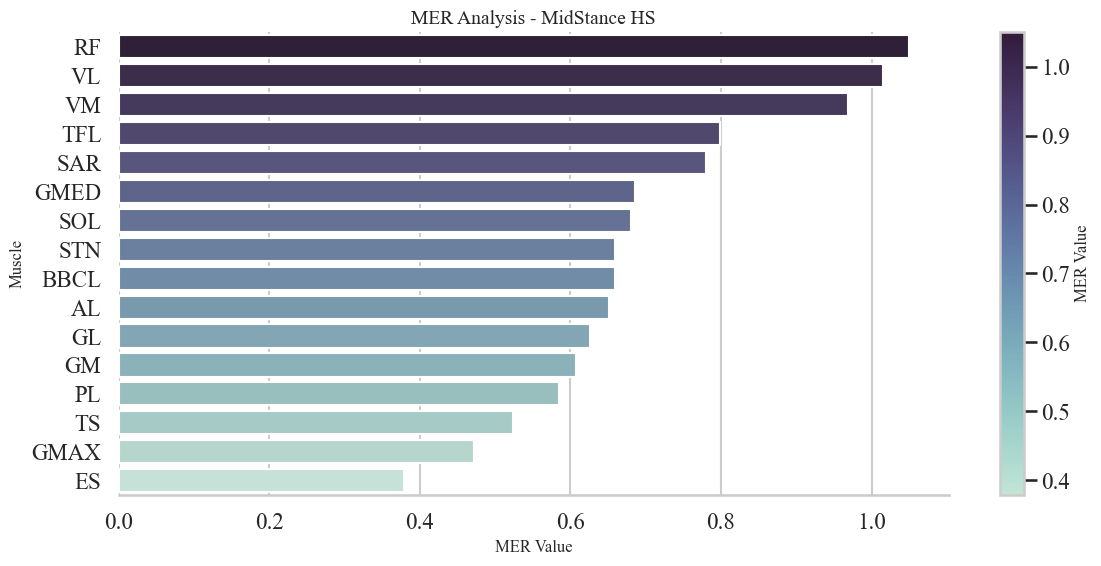

In [46]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidStance HS", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidStance per HS" (classe 11)**
shap_analysis_and_plot_mer(class_index=11, subset_size=2500)

# MidSwing per Output 2

SP1


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.011082721376183508), 'VL': np.float64(0.013025863321690173), 'VM': np.float64(0.012522933466997347), 'GMED': np.float64(0.00836809331034409), 'TFL': np.float64(0.00866835561120788), 'STN': np.float64(0.007463232846800292), 'BBCL': np.float64(0.007832917584893812), 'TS': np.float64(0.007187087714390646), 'PL': np.float64(0.007647753063488392), 'SOL': np.float64(0.007850202621104562), 'GM': np.float64(0.007873141429315092), 'GL': np.float64(0.007793178260032505), 'GMAX': np.float64(0.008691706158178351), 'ES': np.float64(0.009159439379814114), 'AL': np.float64(0.00857842981021488), 'SAR': np.float64(0.00954994225719306), 'Entropy_RF': np.float64(0.010434210011083541), 'Entropy_VL': np.float64(0.009843083413694421), 'Entropy_VM': np.float64(0.01033115073289082), 'Entropy_GMED': np.float64(0.013235394229557034), 'Entropy_TFL': np.float64(0.012749648230603998), 'Entropy_STN': np.float64(0.013728800753817768), 'Entropy_

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1855429311.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




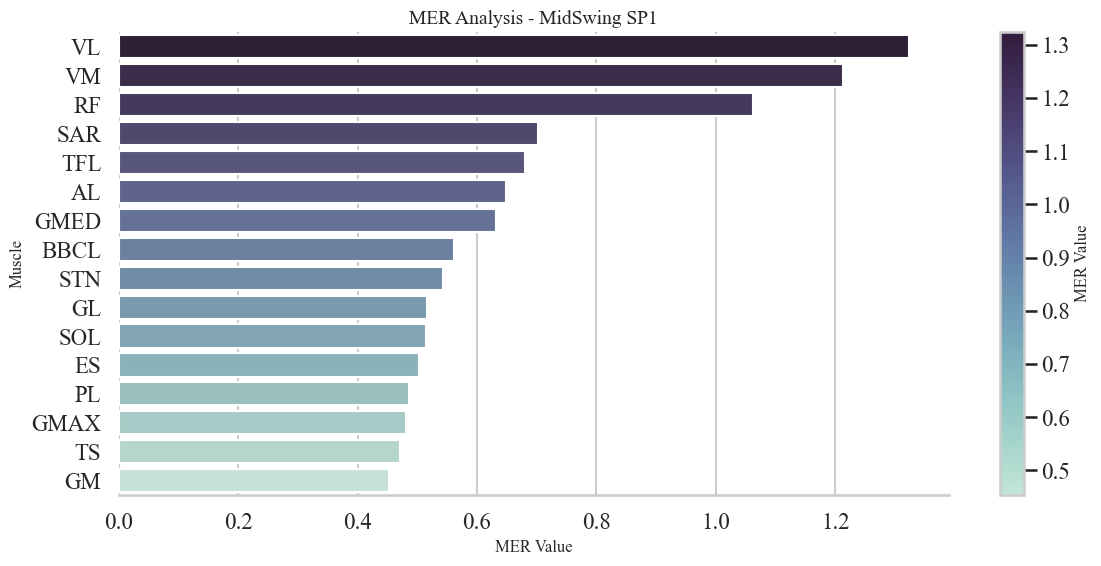

In [47]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidSwing SP1", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidSwing SP1" (classe 12)**
shap_analysis_and_plot_mer(class_index=12, subset_size=2500)

SP2


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.010805791893782188), 'VL': np.float64(0.010541213503200197), 'VM': np.float64(0.011656087500019384), 'GMED': np.float64(0.0075165341974834515), 'TFL': np.float64(0.007751563551131221), 'STN': np.float64(0.007597575949661405), 'BBCL': np.float64(0.007681481760701672), 'TS': np.float64(0.006357674392827823), 'PL': np.float64(0.007041761272227035), 'SOL': np.float64(0.006574216846875243), 'GM': np.float64(0.00760730887696252), 'GL': np.float64(0.00744956660872582), 'GMAX': np.float64(0.006255670280162591), 'ES': np.float64(0.006686048389634197), 'AL': np.float64(0.006778346356821907), 'SAR': np.float64(0.006843989007049186), 'Entropy_RF': np.float64(0.008960716903769836), 'Entropy_VL': np.float64(0.009318320895005412), 'Entropy_VM': np.float64(0.010260894242250334), 'Entropy_GMED': np.float64(0.011271891384690015), 'Entropy_TFL': np.float64(0.011242273387387104), 'Entropy_STN': np.float64(0.012728579468913268), 'Entr

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2740478105.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




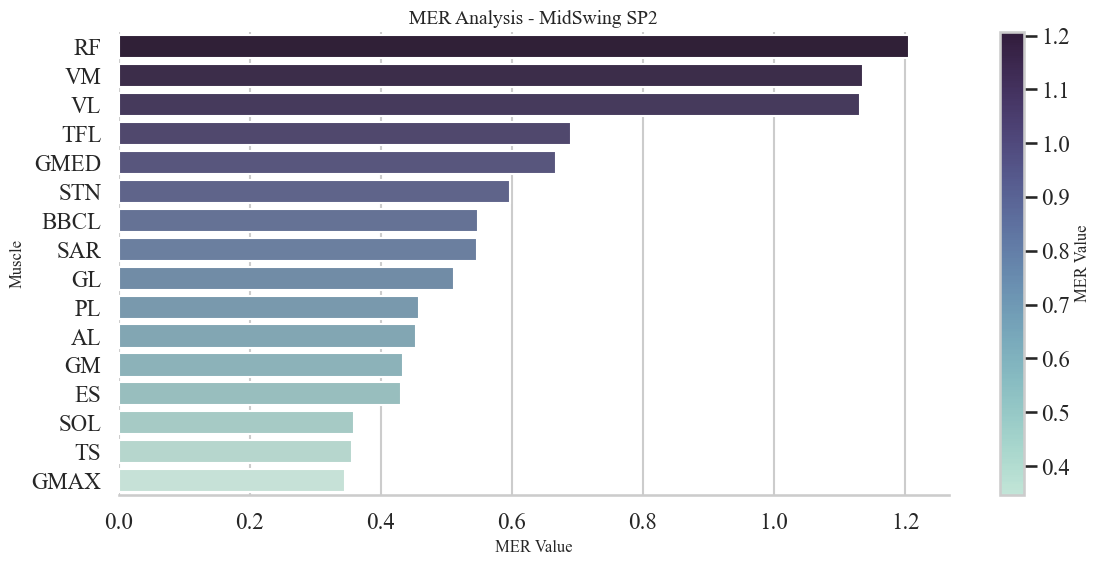

In [48]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidSwing SP2", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidSwing SP2" (classe 13)**
shap_analysis_and_plot_mer(class_index=13, subset_size=2500)

SP3


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.005032882794246658), 'VL': np.float64(0.005062376213096402), 'VM': np.float64(0.005192481257789027), 'GMED': np.float64(0.00408646780159134), 'TFL': np.float64(0.004036251911149713), 'STN': np.float64(0.0037717205169488766), 'BBCL': np.float64(0.003387073077404036), 'TS': np.float64(0.003226413372405301), 'PL': np.float64(0.0033545600404005513), 'SOL': np.float64(0.003069394917746958), 'GM': np.float64(0.0031380781706706394), 'GL': np.float64(0.0029427073111866113), 'GMAX': np.float64(0.005125983419331499), 'ES': np.float64(0.004609513624778467), 'AL': np.float64(0.0038221798956191762), 'SAR': np.float64(0.005860761220795274), 'Entropy_RF': np.float64(0.0043885997808746635), 'Entropy_VL': np.float64(0.004491819897070344), 'Entropy_VM': np.float64(0.004674926174185798), 'Entropy_GMED': np.float64(0.00567122398302072), 'Entropy_TFL': np.float64(0.004793622107014387), 'Entropy_STN': np.float64(0.005189074630983657), 

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1945483321.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




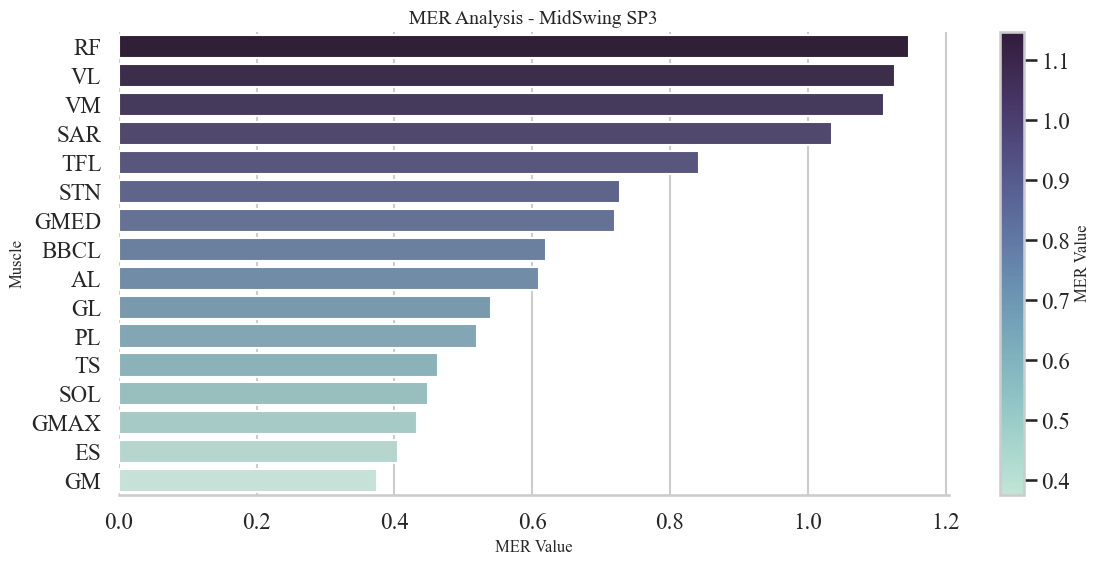

In [49]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidSwing SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidSwing SP3" (classe 14)**
shap_analysis_and_plot_mer(class_index=14, subset_size=2500)

HS


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.013427969409287652), 'VL': np.float64(0.015375084272874687), 'VM': np.float64(0.014945785131800312), 'GMED': np.float64(0.011397279982844429), 'TFL': np.float64(0.011938918579804954), 'STN': np.float64(0.011988988846795019), 'BBCL': np.float64(0.013086618463884406), 'TS': np.float64(0.009800470647917064), 'PL': np.float64(0.011518027074417864), 'SOL': np.float64(0.010953943343529773), 'GM': np.float64(0.011360843424594896), 'GL': np.float64(0.011691653108805143), 'GMAX': np.float64(0.009746085331800759), 'ES': np.float64(0.00922841407785636), 'AL': np.float64(0.011344790383231947), 'SAR': np.float64(0.012247956021637288), 'Entropy_RF': np.float64(0.012789248793038313), 'Entropy_VL': np.float64(0.014259378571249908), 'Entropy_VM': np.float64(0.013738649009688282), 'Entropy_GMED': np.float64(0.01617834367438562), 'Entropy_TFL': np.float64(0.014373084157954144), 'Entropy_STN': np.float64(0.017176161207632337), 'Entro

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3946607842.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




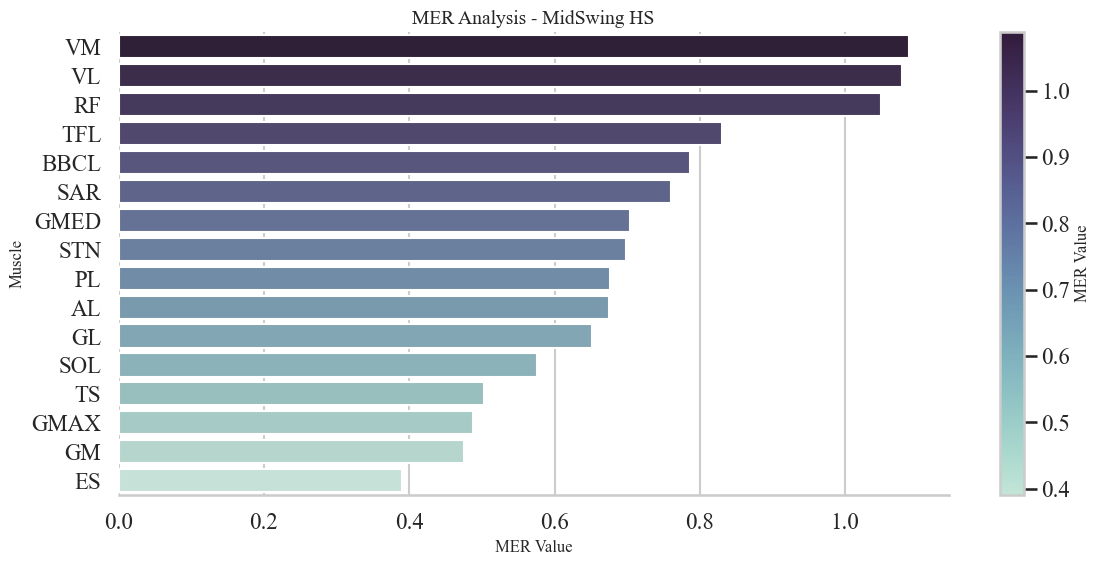

In [50]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - MidSwing HS", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "MidSwing HS" (classe 15)**
shap_analysis_and_plot_mer(class_index=15, subset_size=2500)

# PRESWING per Output 2

SP1


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.009988112613191333), 'VL': np.float64(0.01132302728720477), 'VM': np.float64(0.00996030188677969), 'GMED': np.float64(0.007949039080100966), 'TFL': np.float64(0.008923892060960089), 'STN': np.float64(0.007177461945929826), 'BBCL': np.float64(0.006584435574530471), 'TS': np.float64(0.00648839234540628), 'PL': np.float64(0.006546999416034032), 'SOL': np.float64(0.006760966054740129), 'GM': np.float64(0.007108764191901878), 'GL': np.float64(0.006592332388052364), 'GMAX': np.float64(0.007167999459269473), 'ES': np.float64(0.008691438275427708), 'AL': np.float64(0.011053730657314737), 'SAR': np.float64(0.012046146737057893), 'Entropy_RF': np.float64(0.00941730715986082), 'Entropy_VL': np.float64(0.011303560306578038), 'Entropy_VM': np.float64(0.011764938804278608), 'Entropy_GMED': np.float64(0.015994819396432786), 'Entropy_TFL': np.float64(0.013090491948365115), 'Entropy_STN': np.float64(0.012216162228698386), 'Entropy

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2719078935.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




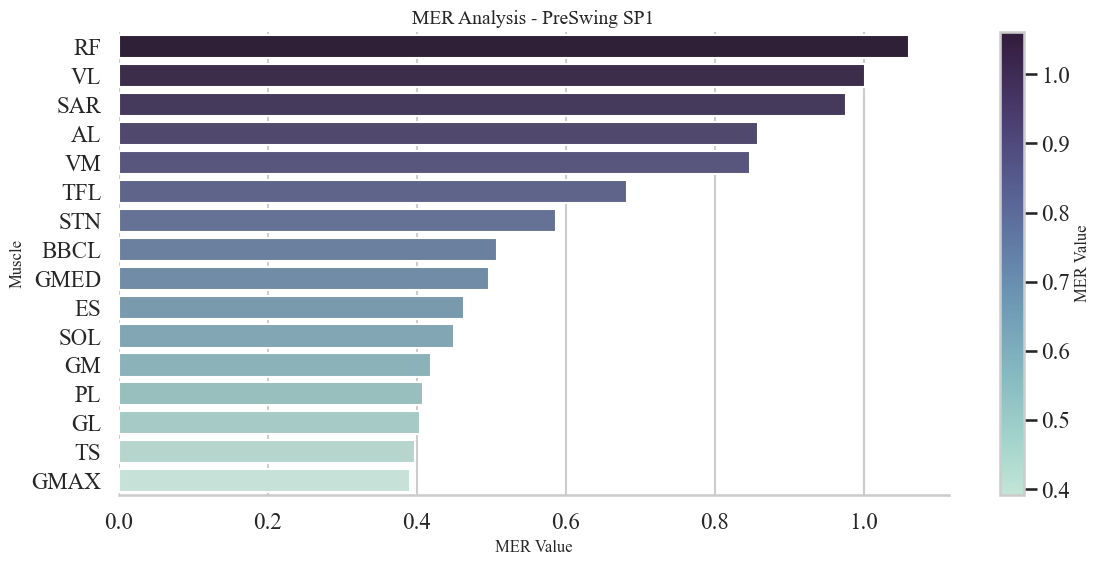

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - PreSwing SP1", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "PreSwing SP1" (classe 16)**
shap_analysis_and_plot_mer(class_index=16, subset_size=2500)

SP2


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.012832116796937168), 'VL': np.float64(0.013021923928277192), 'VM': np.float64(0.013562795584701961), 'GMED': np.float64(0.008301238958824843), 'TFL': np.float64(0.008606782001595911), 'STN': np.float64(0.007869004750211486), 'BBCL': np.float64(0.008089076870352256), 'TS': np.float64(0.007705767648546044), 'PL': np.float64(0.00768844545209032), 'SOL': np.float64(0.006795156928184224), 'GM': np.float64(0.008192159341506886), 'GL': np.float64(0.008221122546970747), 'GMAX': np.float64(0.007166553740073073), 'ES': np.float64(0.007545782200958524), 'AL': np.float64(0.008773233832679602), 'SAR': np.float64(0.0086776683999964), 'Entropy_RF': np.float64(0.011939167737447019), 'Entropy_VL': np.float64(0.011184860359132175), 'Entropy_VM': np.float64(0.013517926467664136), 'Entropy_GMED': np.float64(0.014097405817147746), 'Entropy_TFL': np.float64(0.01445454245350973), 'Entropy_STN': np.float64(0.01282380255839305), 'Entropy_

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3136130052.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




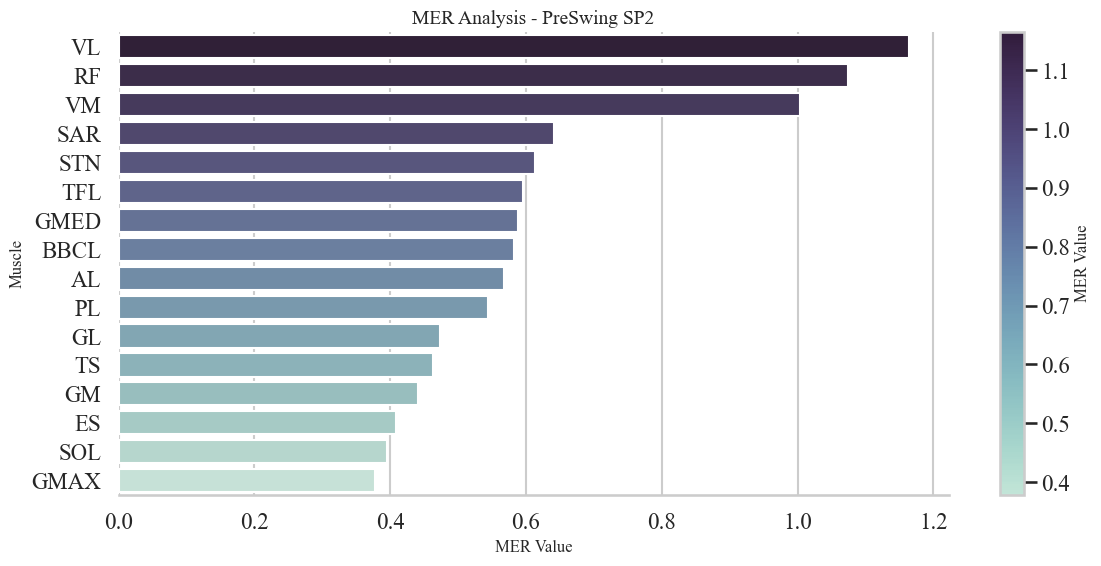

In [52]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - PreSwing SP2", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "PreSwing SP2" (classe 17)**
shap_analysis_and_plot_mer(class_index=17, subset_size=2500)

SP3


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.007266727988259819), 'VL': np.float64(0.006271271285896786), 'VM': np.float64(0.006823915919989056), 'GMED': np.float64(0.00457193747786501), 'TFL': np.float64(0.004812013060901917), 'STN': np.float64(0.00434620753552665), 'BBCL': np.float64(0.0038327327711613238), 'TS': np.float64(0.0039651239107882435), 'PL': np.float64(0.003938894635341639), 'SOL': np.float64(0.003920062127649332), 'GM': np.float64(0.003744931094619278), 'GL': np.float64(0.0038677522074212346), 'GMAX': np.float64(0.0055510096687183446), 'ES': np.float64(0.005354578733548908), 'AL': np.float64(0.004927399579044126), 'SAR': np.float64(0.00591281667550176), 'Entropy_RF': np.float64(0.005496135821942977), 'Entropy_VL': np.float64(0.005202358053957249), 'Entropy_VM': np.float64(0.005890847591645152), 'Entropy_GMED': np.float64(0.006204124897843206), 'Entropy_TFL': np.float64(0.00668839846620254), 'Entropy_STN': np.float64(0.006000882183166982), 'Ent

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/797683669.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




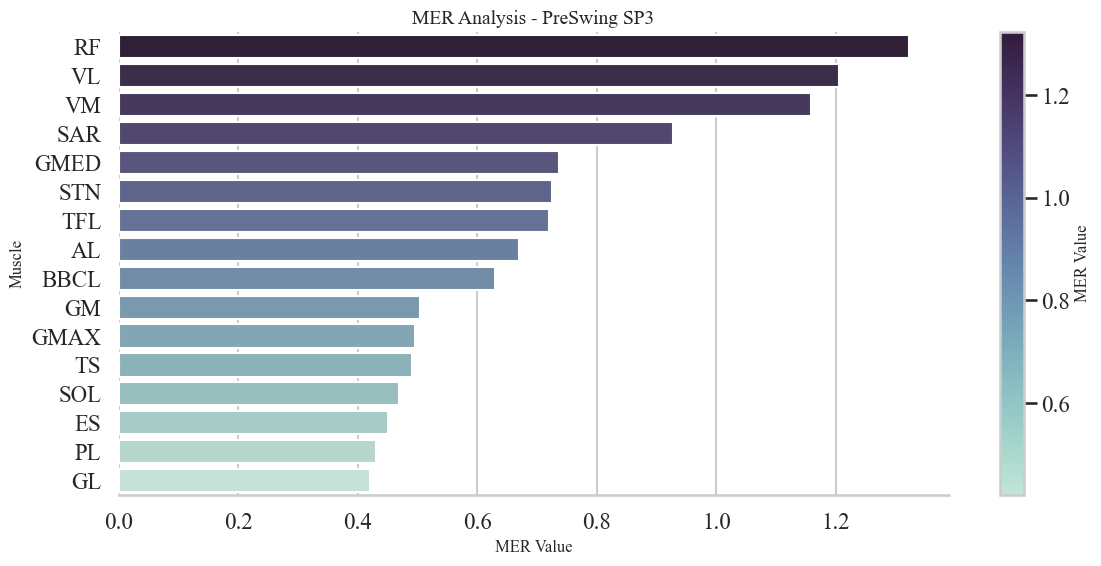

In [53]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - PreSwing SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "PreSwing SP3" (classe 18)**
shap_analysis_and_plot_mer(class_index=18, subset_size=2500)

HS


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.0092683883875839), 'VL': np.float64(0.010711492015725242), 'VM': np.float64(0.010235003917869665), 'GMED': np.float64(0.007550223200252754), 'TFL': np.float64(0.007791181361458624), 'STN': np.float64(0.0064469271071728885), 'BBCL': np.float64(0.00666997698208047), 'TS': np.float64(0.0066025985614526685), 'PL': np.float64(0.0062938863525618585), 'SOL': np.float64(0.006269157091104483), 'GM': np.float64(0.006308024205428455), 'GL': np.float64(0.006299883583307178), 'GMAX': np.float64(0.006984849507192576), 'ES': np.float64(0.006290064848219847), 'AL': np.float64(0.007788030701226525), 'SAR': np.float64(0.007631166042132452), 'Entropy_RF': np.float64(0.009027010837721457), 'Entropy_VL': np.float64(0.009684907669962906), 'Entropy_VM': np.float64(0.009335755760140523), 'Entropy_GMED': np.float64(0.011516893845334835), 'Entropy_TFL': np.float64(0.010535586353351277), 'Entropy_STN': np.float64(0.01139535299614422), 'Entr

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3956707225.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




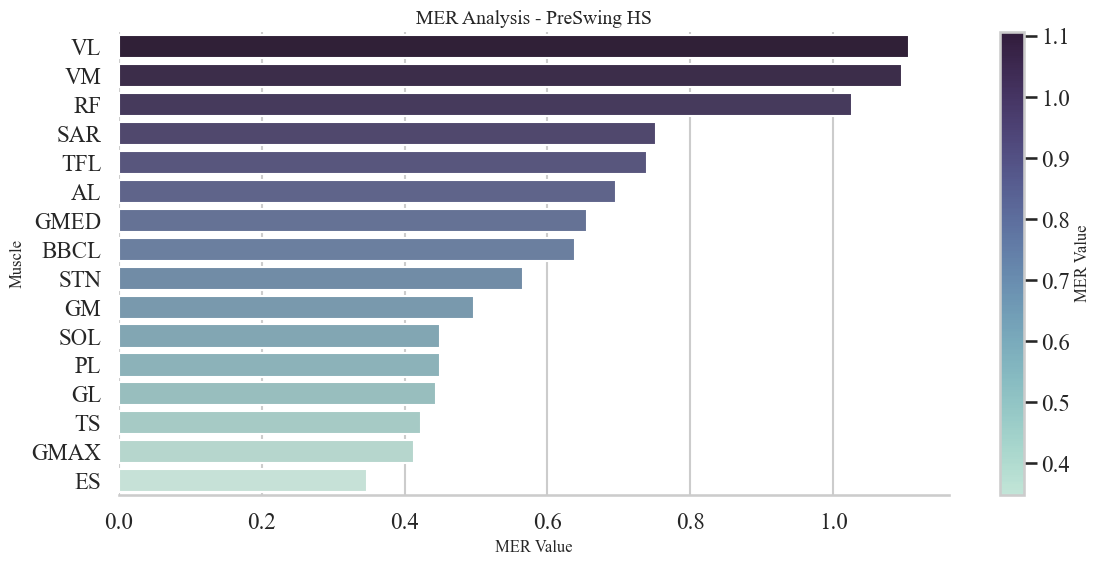

In [54]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - PreSwing HS", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "PreSwing HS" (classe 19)**
shap_analysis_and_plot_mer(class_index=19, subset_size=2500)

# TERMINAL STANCE per Output 2

SP1


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.012115861534914257), 'VL': np.float64(0.014571832821430644), 'VM': np.float64(0.012159285813209271), 'GMED': np.float64(0.009612012469105048), 'TFL': np.float64(0.01008277684161908), 'STN': np.float64(0.007859187709484013), 'BBCL': np.float64(0.008101237791334188), 'TS': np.float64(0.00793678980111963), 'PL': np.float64(0.00874800107252995), 'SOL': np.float64(0.008053605439508282), 'GM': np.float64(0.010591626320261708), 'GL': np.float64(0.00998092235560057), 'GMAX': np.float64(0.008367722442293007), 'ES': np.float64(0.010131809804096519), 'AL': np.float64(0.009899907013065002), 'SAR': np.float64(0.012479720479975913), 'Entropy_RF': np.float64(0.009974185445240329), 'Entropy_VL': np.float64(0.011549658070721443), 'Entropy_VM': np.float64(0.011187464961178012), 'Entropy_GMED': np.float64(0.016334931511999957), 'Entropy_TFL': np.float64(0.013348661997471572), 'Entropy_STN': np.float64(0.012960099461390064), 'Entropy

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/992079923.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




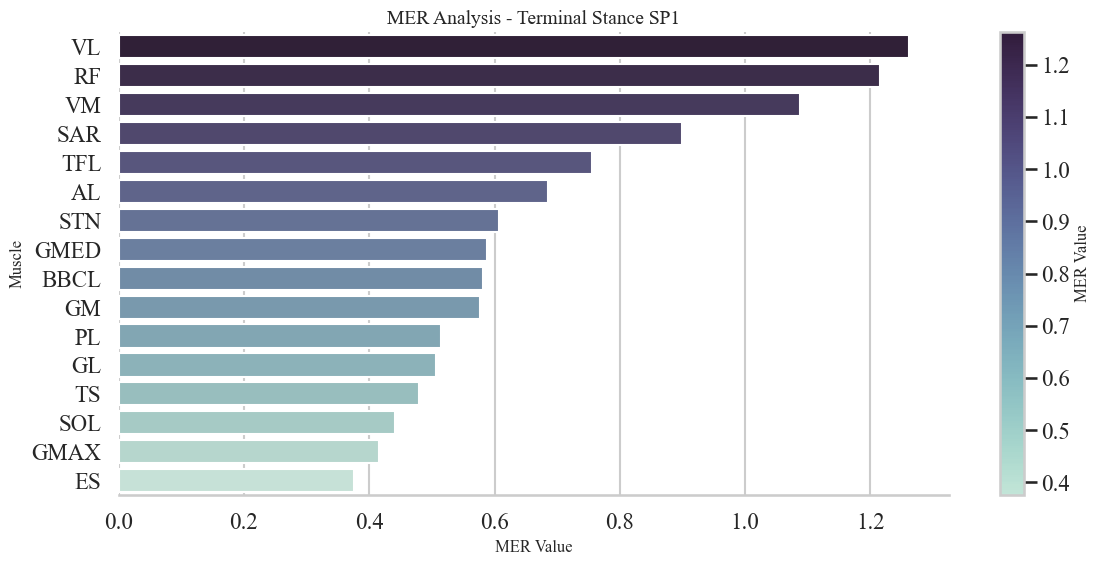

In [55]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Stance SP1", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Stance SP1" (classe 20)**
shap_analysis_and_plot_mer(class_index=20, subset_size=2500)

SP2


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.014568696719446167), 'VL': np.float64(0.014249042371481618), 'VM': np.float64(0.014851611840583563), 'GMED': np.float64(0.010385875293048411), 'TFL': np.float64(0.010583883484966736), 'STN': np.float64(0.009737024575651322), 'BBCL': np.float64(0.010100708385825875), 'TS': np.float64(0.009882468307388707), 'PL': np.float64(0.010363405922142828), 'SOL': np.float64(0.009692524569397074), 'GM': np.float64(0.012461631744189709), 'GL': np.float64(0.012058261111373668), 'GMAX': np.float64(0.008045981859858694), 'ES': np.float64(0.008722885061468913), 'AL': np.float64(0.009445698913454873), 'SAR': np.float64(0.009359683076192959), 'Entropy_RF': np.float64(0.011910575532205007), 'Entropy_VL': np.float64(0.012931504992594092), 'Entropy_VM': np.float64(0.013870872974877147), 'Entropy_GMED': np.float64(0.017405517960775524), 'Entropy_TFL': np.float64(0.014776410419945705), 'Entropy_STN': np.float64(0.01641969925903661), 'Entr

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1606401304.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




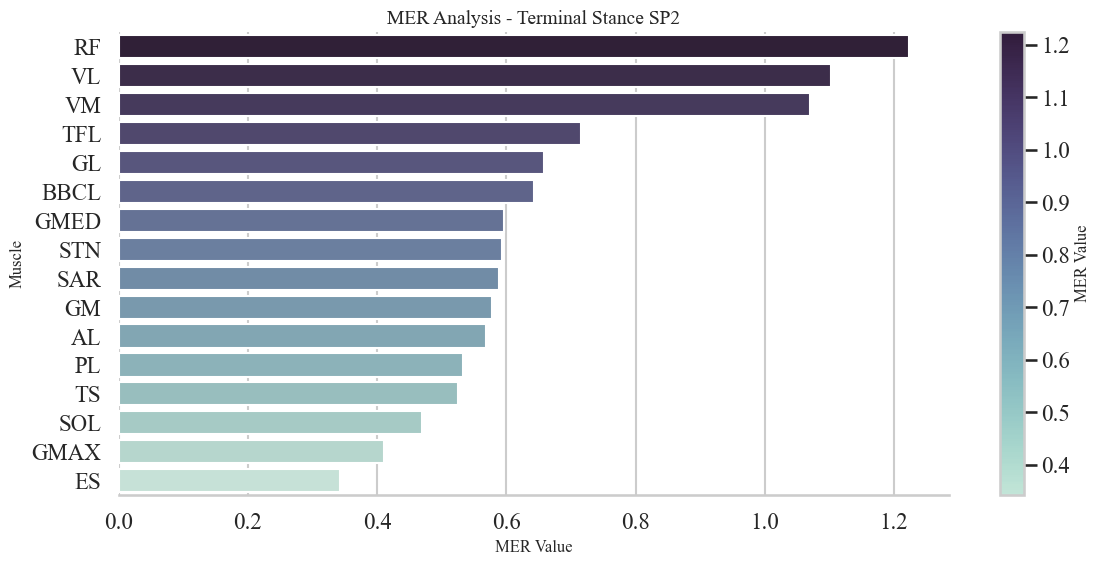

In [56]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Stance SP2", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Stance SP2" (classe 21)**
shap_analysis_and_plot_mer(class_index=21, subset_size=2500)

SP3


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.01100307936407994), 'VL': np.float64(0.010239473013080964), 'VM': np.float64(0.009727129089938523), 'GMED': np.float64(0.007789746389962374), 'TFL': np.float64(0.007977297740808523), 'STN': np.float64(0.006423882743207984), 'BBCL': np.float64(0.0067167325310760586), 'TS': np.float64(0.006355218621103359), 'PL': np.float64(0.00820044489195215), 'SOL': np.float64(0.007813691205964373), 'GM': np.float64(0.008360987930191494), 'GL': np.float64(0.008262693146074678), 'GMAX': np.float64(0.007554477184481522), 'ES': np.float64(0.007829379572465154), 'AL': np.float64(0.006758268223774917), 'SAR': np.float64(0.008972300524603087), 'Entropy_RF': np.float64(0.008116857420655595), 'Entropy_VL': np.float64(0.008957920011108024), 'Entropy_VM': np.float64(0.008567624771186048), 'Entropy_GMED': np.float64(0.01067881218490264), 'Entropy_TFL': np.float64(0.009166539613063037), 'Entropy_STN': np.float64(0.009898718774238433), 'Entro

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2999613562.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




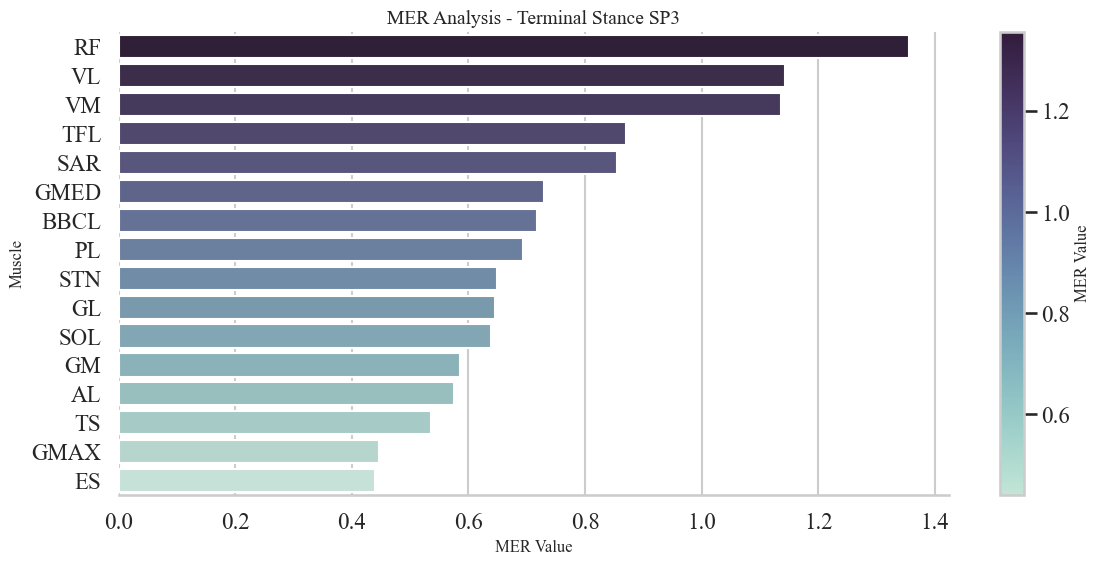

In [57]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Stance SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Stance SP3" (classe 22)**
shap_analysis_and_plot_mer(class_index=22, subset_size=2500)

HS


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.021017823781599894), 'VL': np.float64(0.02738959141103496), 'VM': np.float64(0.02216501225273023), 'GMED': np.float64(0.018074575336927957), 'TFL': np.float64(0.017805290169910767), 'STN': np.float64(0.018732260535360045), 'BBCL': np.float64(0.017333944248851048), 'TS': np.float64(0.015324017381329758), 'PL': np.float64(0.018305639929337224), 'SOL': np.float64(0.017343248447027507), 'GM': np.float64(0.019795731114885348), 'GL': np.float64(0.01965362406774075), 'GMAX': np.float64(0.013785989575477288), 'ES': np.float64(0.014668820098832839), 'AL': np.float64(0.016747027450474343), 'SAR': np.float64(0.018584720832177118), 'Entropy_RF': np.float64(0.017668429933007428), 'Entropy_VL': np.float64(0.020384772508938113), 'Entropy_VM': np.float64(0.019300494705449592), 'Entropy_GMED': np.float64(0.024904407991134987), 'Entropy_TFL': np.float64(0.021246232092918604), 'Entropy_STN': np.float64(0.02407000435351856), 'Entropy

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1662330705.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




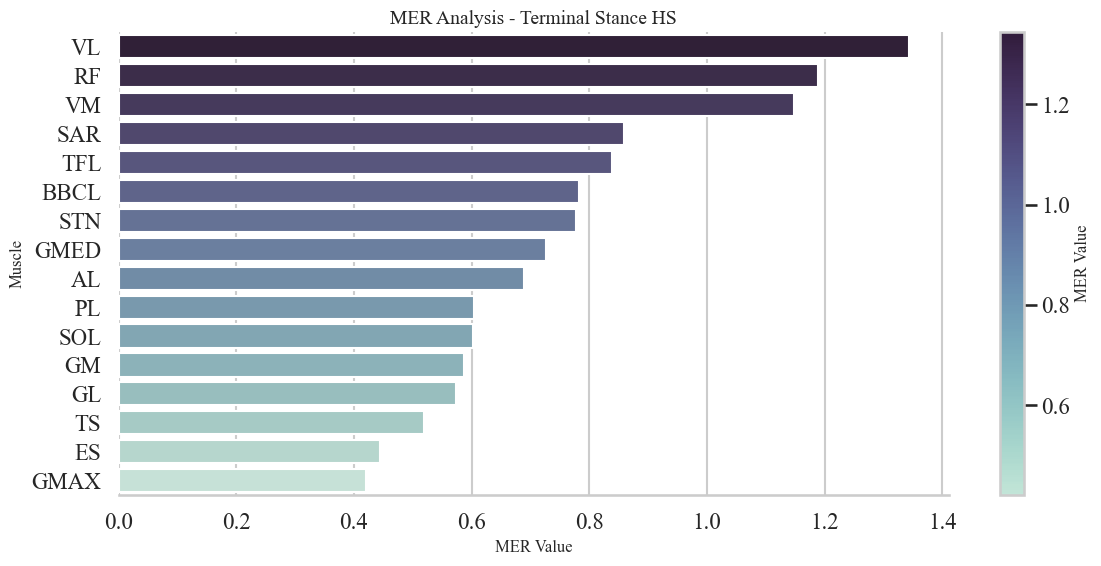

In [58]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Stance HS", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Stance HS" (classe 23)**
shap_analysis_and_plot_mer(class_index=23, subset_size=2500)

# TERMINAL SWING per Output 2

SP1


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.008418468056901702), 'VL': np.float64(0.011637058545827585), 'VM': np.float64(0.009028424433388681), 'GMED': np.float64(0.0069957376421341455), 'TFL': np.float64(0.006666160402522882), 'STN': np.float64(0.007464720272880118), 'BBCL': np.float64(0.007447840413731865), 'TS': np.float64(0.005828818057249873), 'PL': np.float64(0.005984053248983423), 'SOL': np.float64(0.005959759830598637), 'GM': np.float64(0.006610914428335303), 'GL': np.float64(0.005845595629172908), 'GMAX': np.float64(0.007172716516645429), 'ES': np.float64(0.006443999584109269), 'AL': np.float64(0.007074484600858594), 'SAR': np.float64(0.007957127233827743), 'Entropy_RF': np.float64(0.00773444213782991), 'Entropy_VL': np.float64(0.008876715945677972), 'Entropy_VM': np.float64(0.008674331649373607), 'Entropy_GMED': np.float64(0.011154827173688408), 'Entropy_TFL': np.float64(0.011169397900922558), 'Entropy_STN': np.float64(0.010558270799597346), 'Ent

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2411684632.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




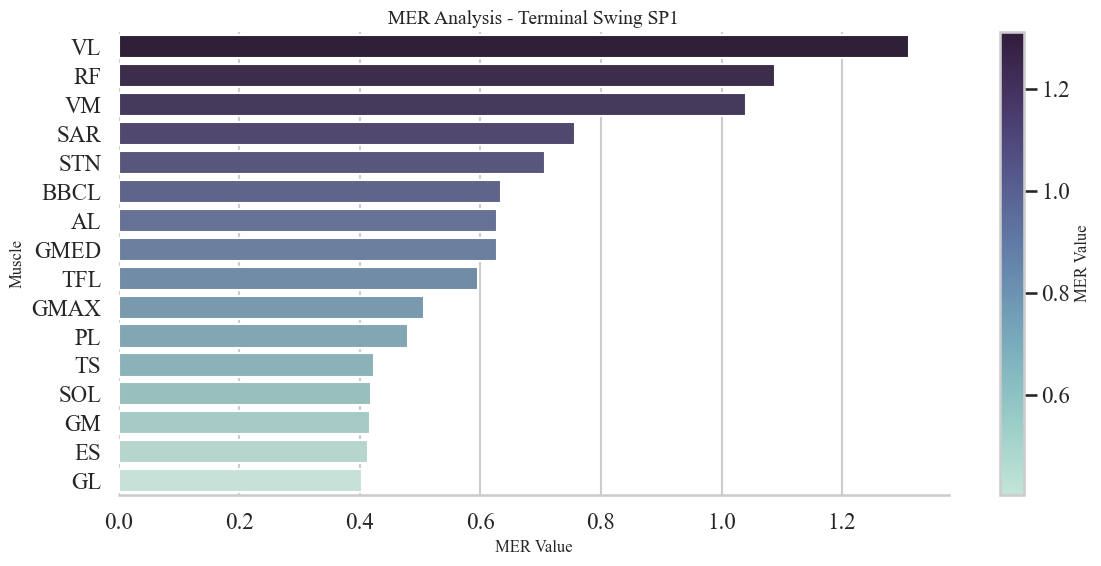

In [59]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Swing SP1", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Swing SP1" (classe 24)**
shap_analysis_and_plot_mer(class_index=24, subset_size=2500)

SP2


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.009873324483587362), 'VL': np.float64(0.010211535438045939), 'VM': np.float64(0.011186959586563546), 'GMED': np.float64(0.00703825752283304), 'TFL': np.float64(0.006758353443697706), 'STN': np.float64(0.007667718744679132), 'BBCL': np.float64(0.007593506366196675), 'TS': np.float64(0.005792541683855688), 'PL': np.float64(0.005713456491955553), 'SOL': np.float64(0.0055034127353385314), 'GM': np.float64(0.006395769879822251), 'GL': np.float64(0.005795756137153524), 'GMAX': np.float64(0.006931080114706504), 'ES': np.float64(0.00571932802006404), 'AL': np.float64(0.0063017959259667805), 'SAR': np.float64(0.006131484360670811), 'Entropy_RF': np.float64(0.008083491041437333), 'Entropy_VL': np.float64(0.008169609571254842), 'Entropy_VM': np.float64(0.00919125108905937), 'Entropy_GMED': np.float64(0.011821838087152424), 'Entropy_TFL': np.float64(0.010216420294155433), 'Entropy_STN': np.float64(0.012185624152756827), 'Entr

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3000685295.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




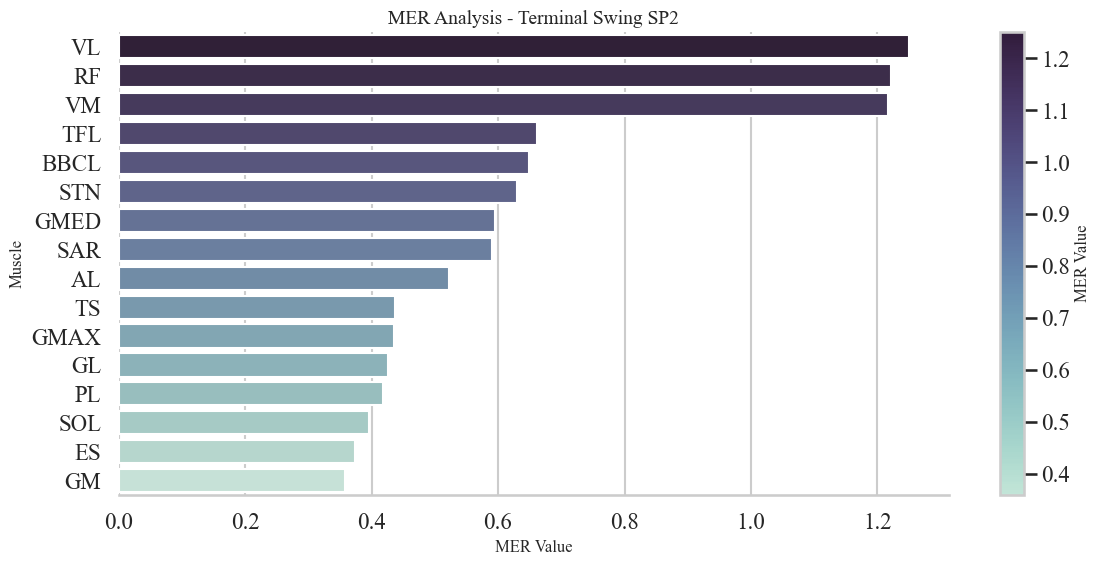

In [60]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Swing SP2", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Swing SP2" (classe 25)**
shap_analysis_and_plot_mer(class_index=25, subset_size=2500)

SP3


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.007742832378298259), 'VL': np.float64(0.009749146066177891), 'VM': np.float64(0.00841697129582376), 'GMED': np.float64(0.005973067890985544), 'TFL': np.float64(0.006294145331974829), 'STN': np.float64(0.006140077753391867), 'BBCL': np.float64(0.005882565448972895), 'TS': np.float64(0.005521228525067909), 'PL': np.float64(0.004808262196318656), 'SOL': np.float64(0.005038917802394953), 'GM': np.float64(0.0051787766184487735), 'GL': np.float64(0.005053039184792067), 'GMAX': np.float64(0.00759510137883833), 'ES': np.float64(0.006428901856688957), 'AL': np.float64(0.006038350330784602), 'SAR': np.float64(0.00817473678676713), 'Entropy_RF': np.float64(0.006975968325299175), 'Entropy_VL': np.float64(0.00795041235782634), 'Entropy_VM': np.float64(0.008401600515297173), 'Entropy_GMED': np.float64(0.0087238408419734), 'Entropy_TFL': np.float64(0.008943180819359237), 'Entropy_STN': np.float64(0.009615450332127079), 'Entropy_

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1747591848.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




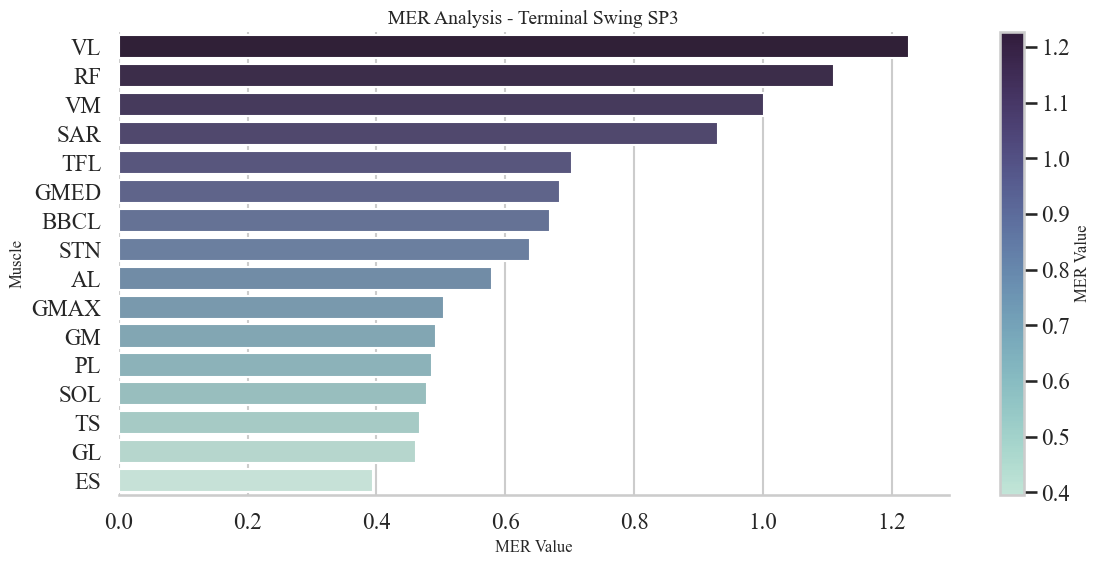

In [61]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Swing SP3", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Swing SP3" (classe 26)**
shap_analysis_and_plot_mer(class_index=26, subset_size=2500)

HS


Valori medi SHAP (modulo) per le feature temporali:
{'RF': np.float64(0.02896043589736173), 'VL': np.float64(0.027964341545239402), 'VM': np.float64(0.023467176184281926), 'GMED': np.float64(0.01496176117101204), 'TFL': np.float64(0.014678512647742172), 'STN': np.float64(0.022635776535488185), 'BBCL': np.float64(0.019190488978941357), 'TS': np.float64(0.013784629665193915), 'PL': np.float64(0.01230263505528601), 'SOL': np.float64(0.01289817643202623), 'GM': np.float64(0.011938663884312518), 'GL': np.float64(0.012143893805036351), 'GMAX': np.float64(0.01628339626424786), 'ES': np.float64(0.012159657430813741), 'AL': np.float64(0.01385900253022428), 'SAR': np.float64(0.015641375488609627), 'Entropy_RF': np.float64(0.01627754432386264), 'Entropy_VL': np.float64(0.017218676811112162), 'Entropy_VM': np.float64(0.018150907161697847), 'Entropy_GMED': np.float64(0.021548003138448256), 'Entropy_TFL': np.float64(0.018913540249435392), 'Entropy_STN': np.float64(0.019944228022305107), 'Entropy_BB

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/4192118466.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




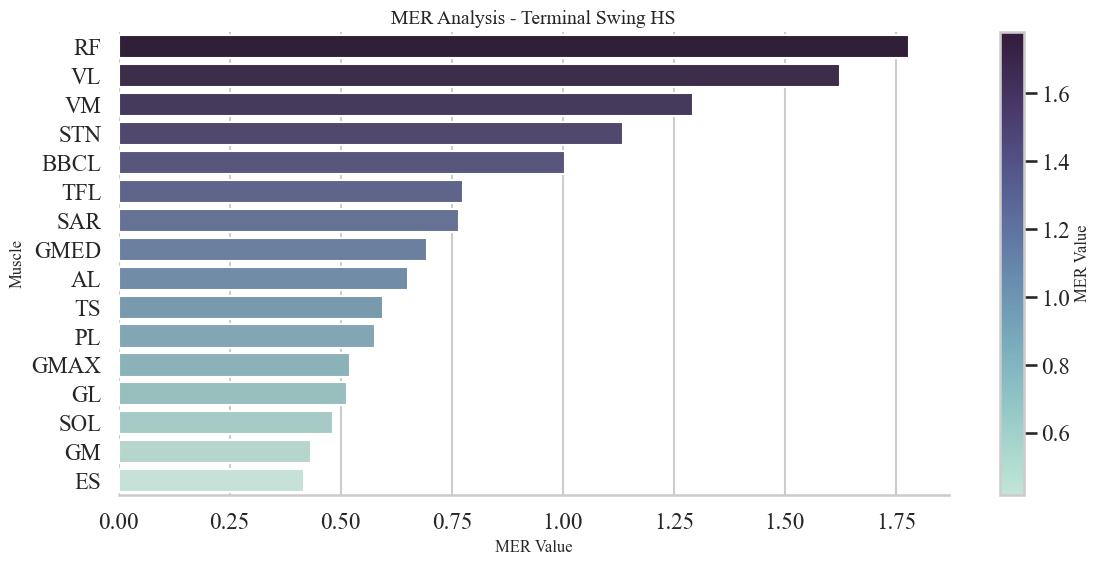

In [62]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

def shap_analysis_and_plot_mer(class_index, subset_size=2500):
    """
    Esegue l'analisi SHAP per una specifica classe dell'Output2 su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.
    
    Parameters:
    - class_index: Indice della classe da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static
    
    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il secondo output (output2)
    explainer_output2 = shap.GradientExplainer(
        (model.input, model.output[1]),  # Specifica il secondo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output2 = explainer_output2.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output2[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # Stampa dei valori medi SHAP per verifica
    print("\nValori medi SHAP (modulo) per le feature temporali:")
    print(shap_values_temporal)

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Terminal Swing HS", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi e genera il grafico per "Terminal Swing HS" (classe 27)**
shap_analysis_and_plot_mer(class_index=27, subset_size=2500)

# OUTPUT 1

# INITIAL SWING

HS


Analisi SHAP per la fase del passo con indice: 0


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2089678131.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




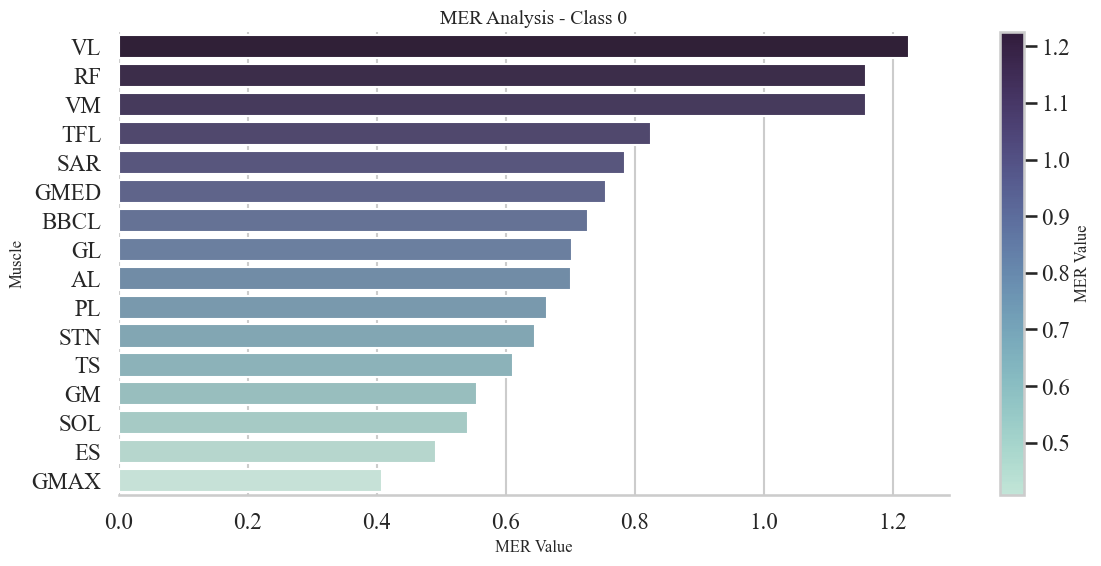

In [66]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (InitialSwing_NORMATIVO)**
shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=2000)

SP


Analisi SHAP per la fase del passo con indice: 1


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3391510574.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




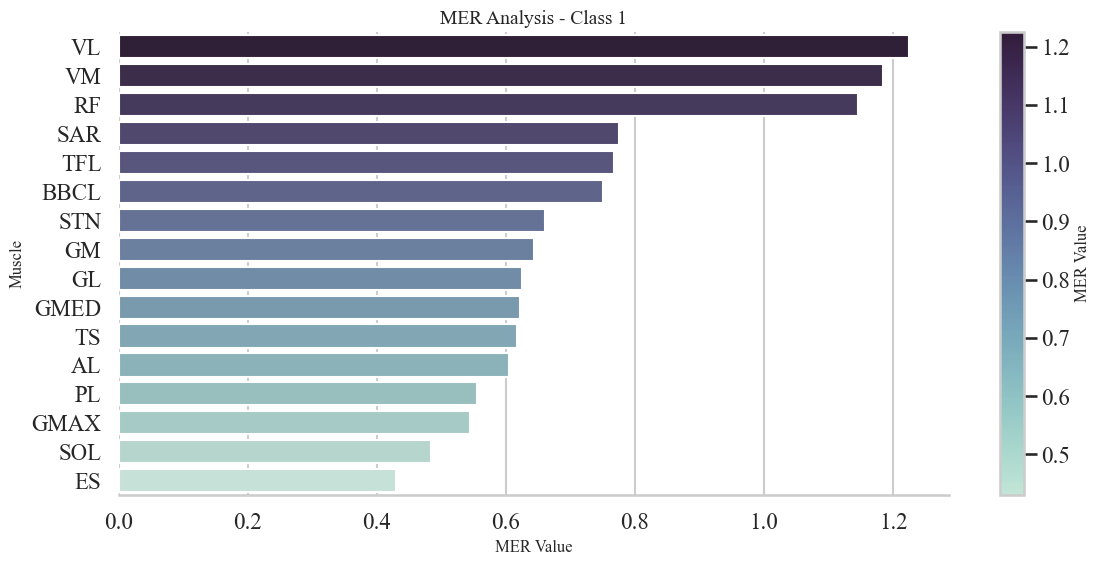

In [67]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (InitialSwing_PARAPARESI)**
shap_analysis_and_plot_mer_single_phase(class_index=1, subset_size=2000)

# LOADING RESPONSE

HS


Analisi SHAP per la fase del passo con indice: 2


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3486996428.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




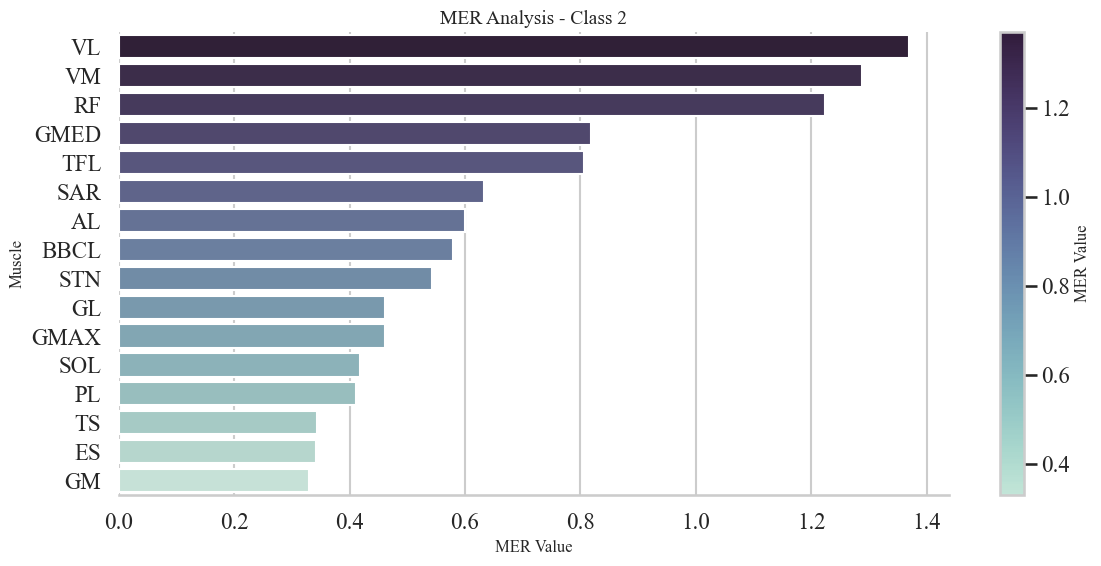

In [68]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (LoadingResponse_NORMATIVO)**
shap_analysis_and_plot_mer_single_phase(class_index=2, subset_size=2000)

SP


Analisi SHAP per la fase del passo con indice: 3


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2081996724.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




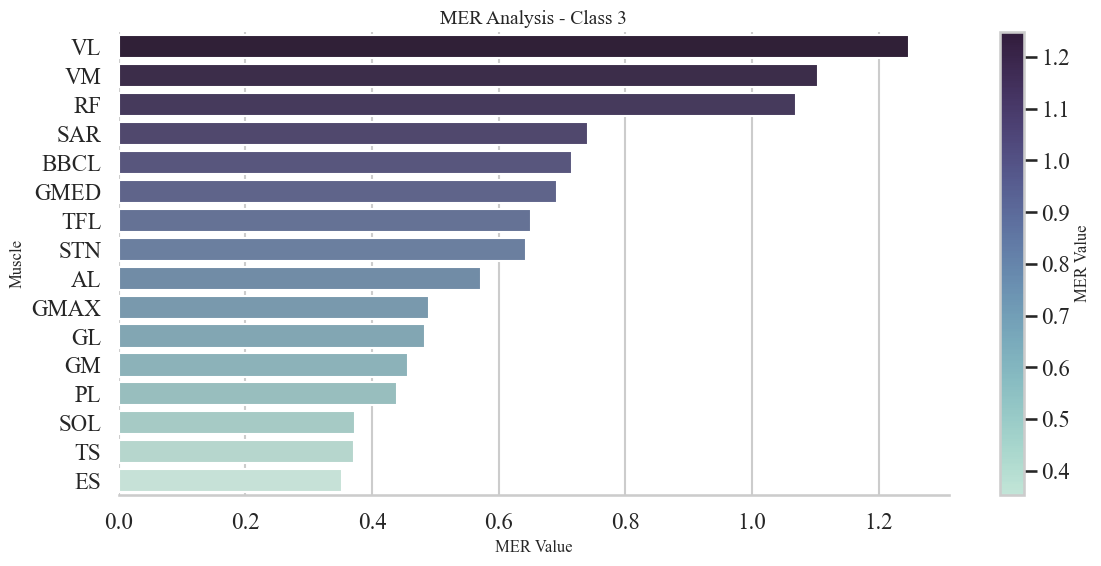

In [69]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (LoadingResponse_PARAPARESI)**
shap_analysis_and_plot_mer_single_phase(class_index=3, subset_size=2000)

# MIDSTANCE

HS


Analisi SHAP per la fase del passo con indice: 4


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/520280769.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




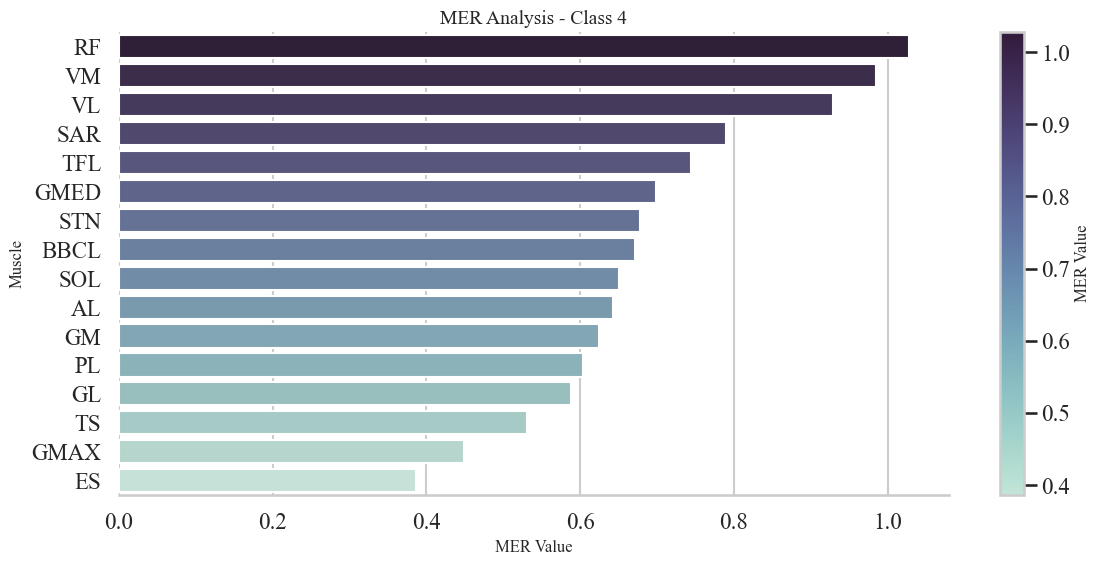

In [70]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (MidStance_NORMATIVO)**
shap_analysis_and_plot_mer_single_phase(class_index=4, subset_size=2000)

SP


Analisi SHAP per la fase del passo con indice: 5


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1178938163.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




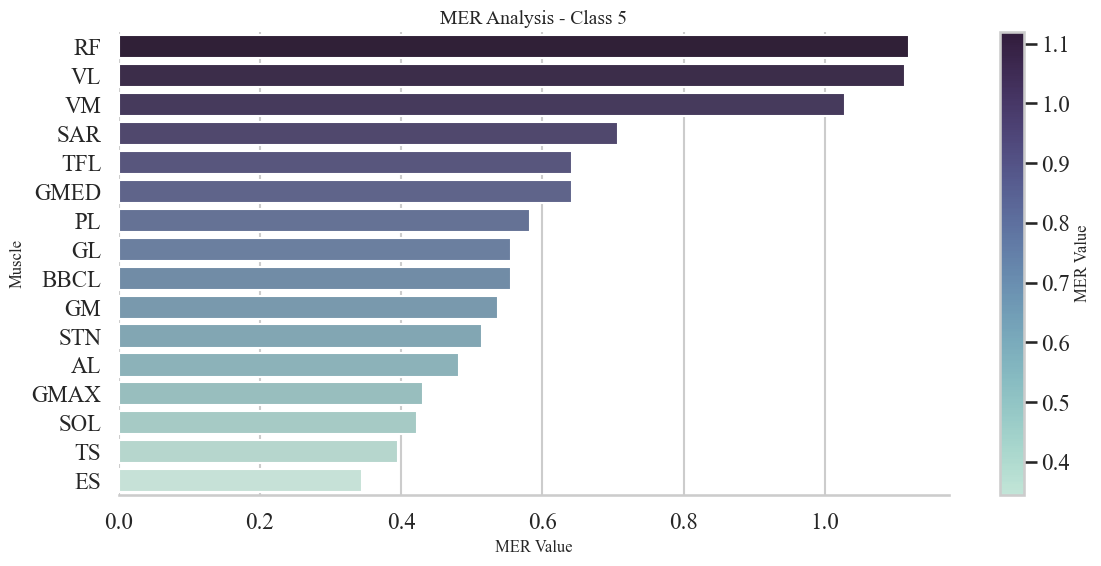

In [71]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (MidStance_PARAPARESI SPASTICA)**
shap_analysis_and_plot_mer_single_phase(class_index=5, subset_size=2000)

# MIDSWING

HS


Analisi SHAP per la fase del passo con indice: 6


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2586986395.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




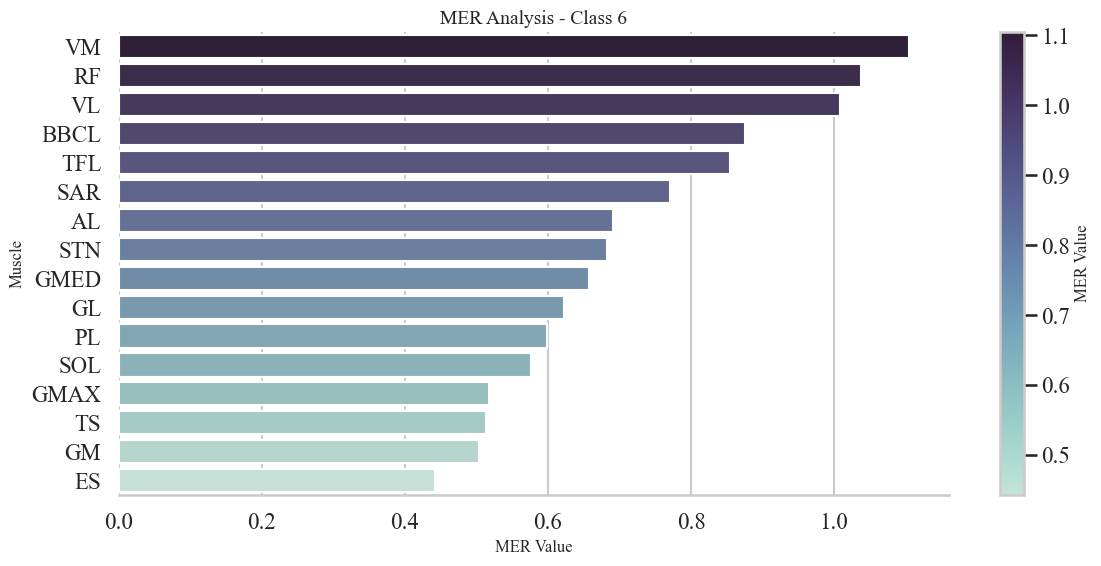

In [72]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (MidSwing_NORMATIVO)**
shap_analysis_and_plot_mer_single_phase(class_index=6, subset_size=2000)

SP


Analisi SHAP per la fase del passo con indice: 7


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2088325382.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




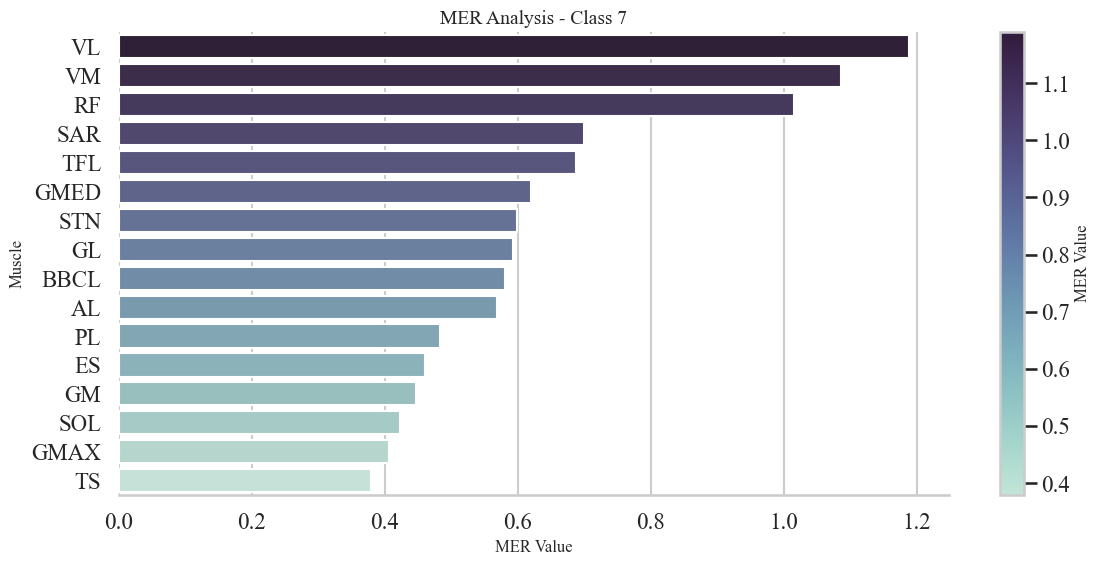

In [73]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (MidSwing_PARAPARESI)**
shap_analysis_and_plot_mer_single_phase(class_index=7, subset_size=2000)

# PRE SWING

HS


Analisi SHAP per la fase del passo con indice: 8


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1551401377.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




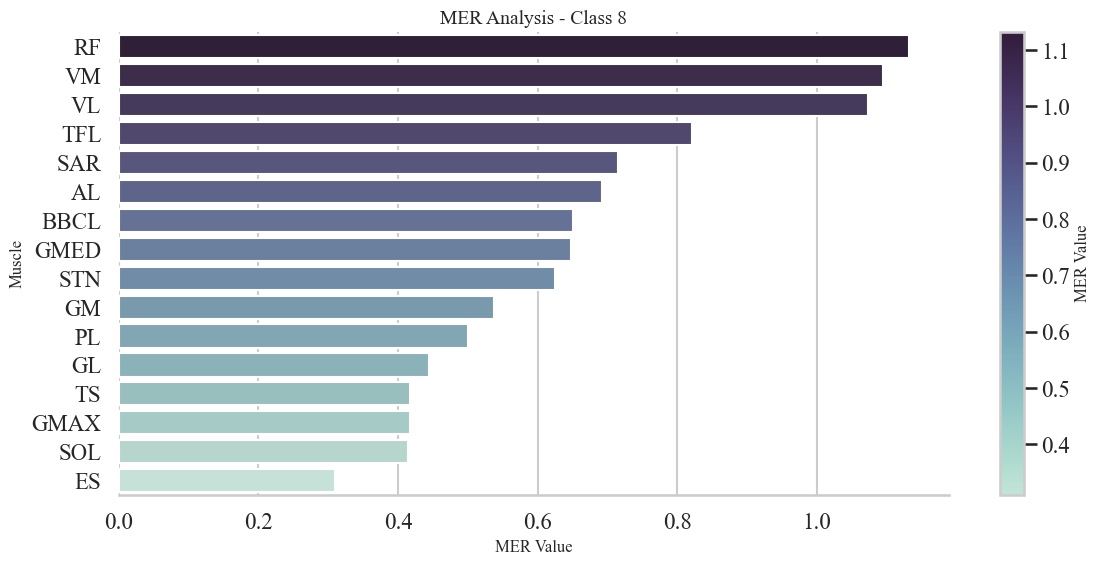

In [74]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (PreSwing_Normativo)**
shap_analysis_and_plot_mer_single_phase(class_index=8, subset_size=2000)

SP


Analisi SHAP per la fase del passo con indice: 9


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1008141659.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




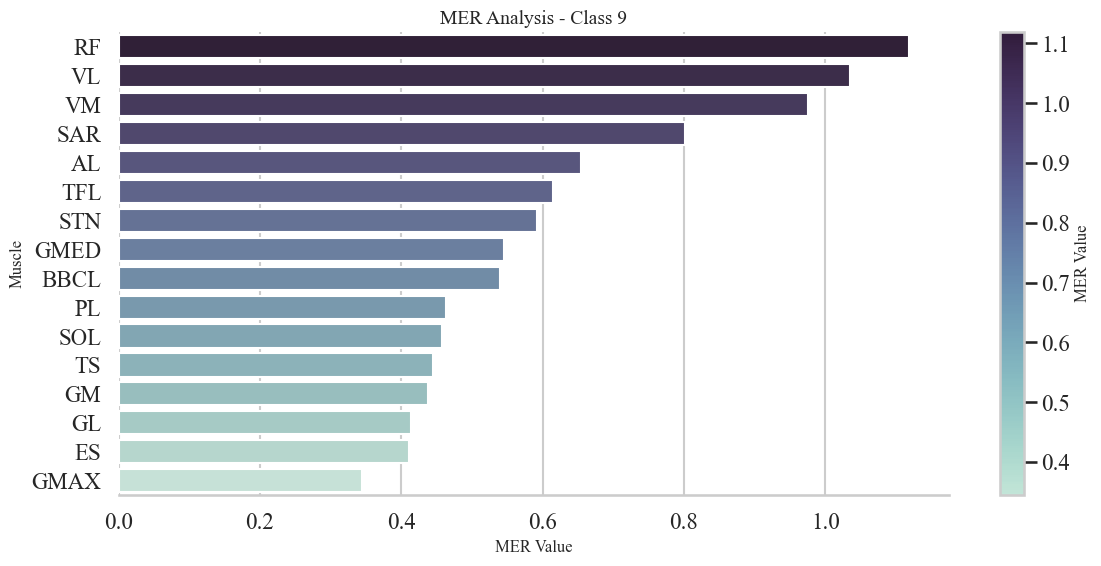

In [75]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (PreSwing_Paraparesi)**
shap_analysis_and_plot_mer_single_phase(class_index=9, subset_size=2000)

# TERMINAL STANCE

HS


Analisi SHAP per la fase del passo con indice: 10


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/3849205854.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




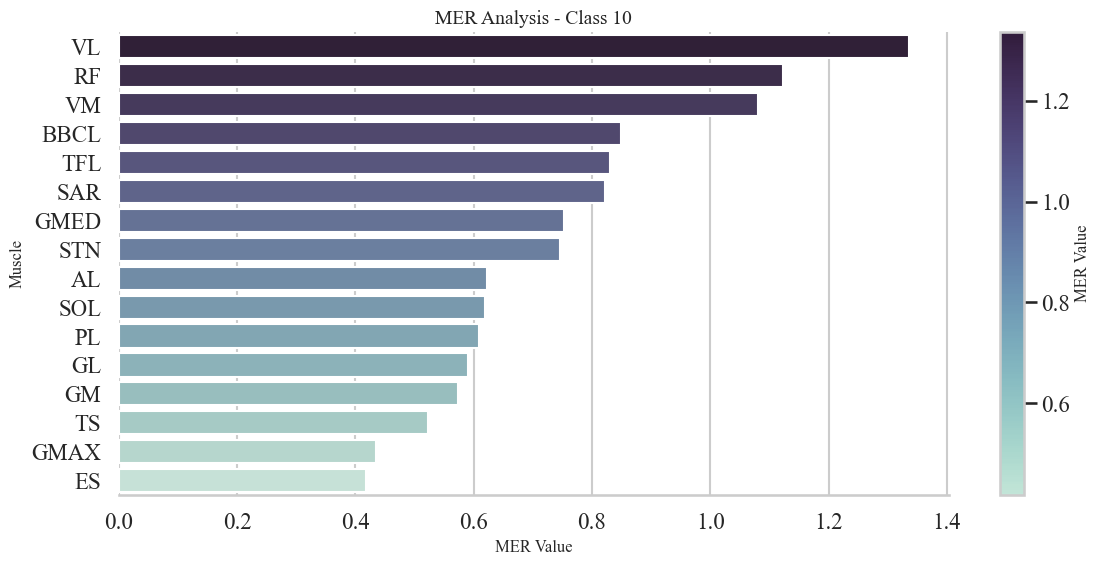

In [76]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (Terminal Stance_Normativo)**
shap_analysis_and_plot_mer_single_phase(class_index=10, subset_size=2000)

SP


Analisi SHAP per la fase del passo con indice: 11


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/540976112.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




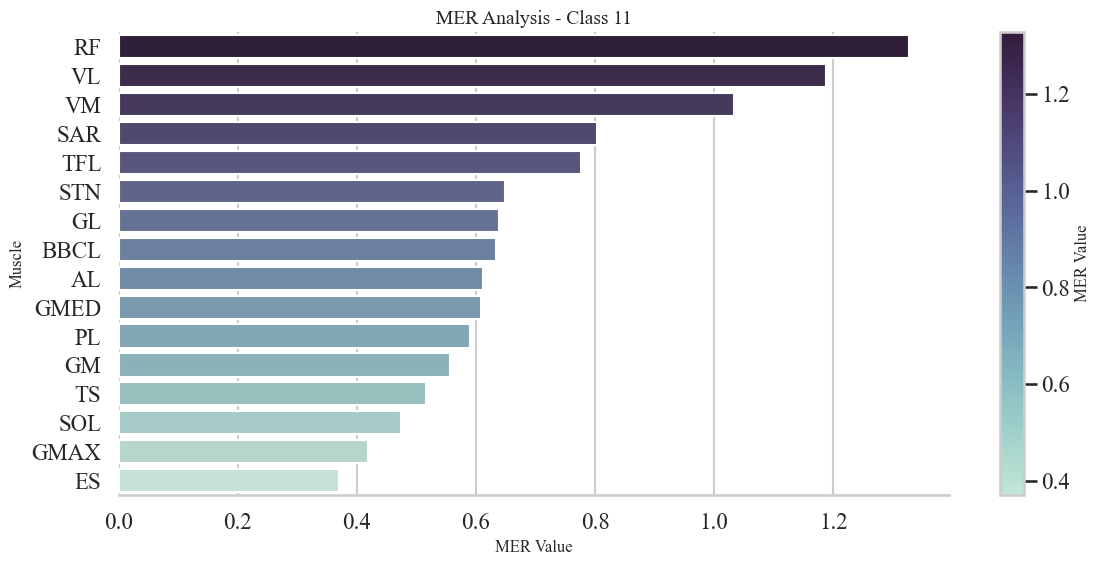

In [77]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (Terminal Stance_Paraparesi)**
shap_analysis_and_plot_mer_single_phase(class_index=11, subset_size=2000)

# TERMINAL SWING

HS


Analisi SHAP per la fase del passo con indice: 12


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/1101654026.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




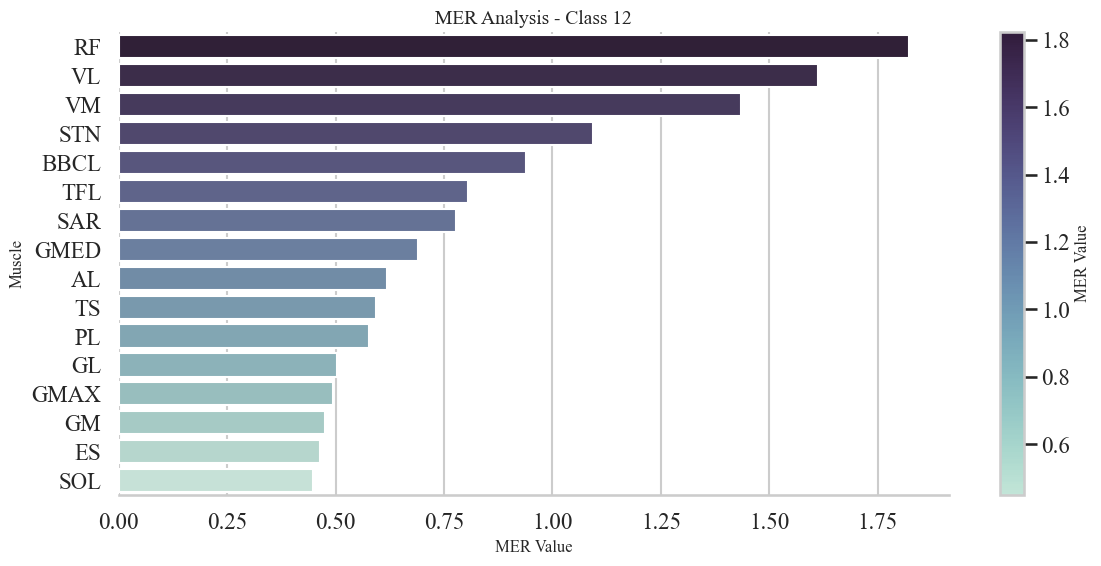

In [78]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (Terminal Swing_Normativo)**
shap_analysis_and_plot_mer_single_phase(class_index=12, subset_size=2000)

SP


Analisi SHAP per la fase del passo con indice: 13


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_16532/2085138034.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




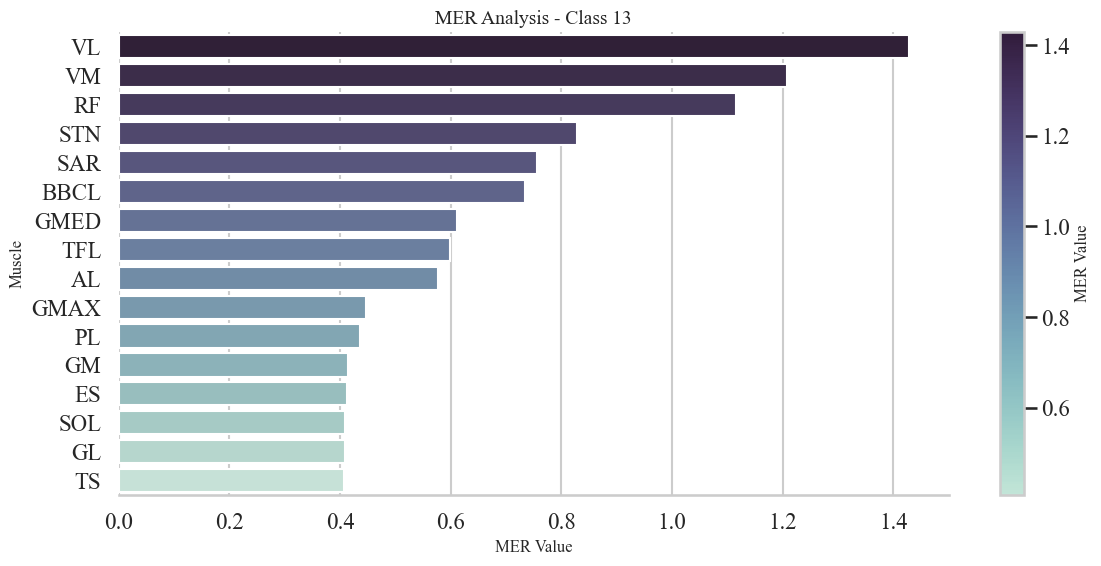

In [79]:
def shap_analysis_and_plot_mer_single_phase(class_index=0, subset_size=1000):
    """
    Esegue l'analisi SHAP per una specifica fase del passo su un subset ridotto,
    calcola il Muscle-to-Entropy Ratio (MER) e genera il relativo barplot.

    Parameters:
    - class_index: Indice della fase del passo da analizzare.
    - subset_size: Numero di campioni da includere nel subset.
    """

    print(f"\nAnalisi SHAP per la fase del passo con indice: {class_index}")

    # Filtrare il test set per la classe selezionata
    X_test_temp_class = X_test_temp
    X_test_static_class = X_test_static

    # Selezionare un subset casuale di campioni
    subset_indices = np.random.choice(X_test_temp_class.shape[0], size=subset_size, replace=False)
    X_test_temp_subset = X_test_temp_class[subset_indices]
    X_test_static_subset = X_test_static_class[subset_indices]

    # Creare l'explainer per il primo output (output1)
    explainer_output1 = shap.GradientExplainer(
        (model.input, model.output[0]),  # Specifica il primo output del modello
        [X_train_temp, X_train_static]
    )

    # Calcolo dei valori SHAP per il subset del test set
    shap_values_output1 = explainer_output1.shap_values([X_test_temp_subset, X_test_static_subset])

    # Calcolo della media dei valori SHAP per le feature temporali
    mean_shap_values_temporal = np.mean(np.abs(shap_values_output1[0][:, :, 0, class_index]), axis=0)

    # Dizionario dei valori medi SHAP per le feature temporali
    shap_values_temporal = dict(zip(temporal_features, mean_shap_values_temporal))

    # **Calcolo del Muscle-to-Entropy Ratio (MER)**
    muscle_features = [f for f in temporal_features if not f.startswith("Entropy_")]
    entropy_features = ["Entropy_" + f for f in muscle_features]

    mer_values = {}
    for muscle, entropy in zip(muscle_features, entropy_features):
        if muscle in shap_values_temporal and entropy in shap_values_temporal:
            # Calcolo di MER
            mer_values[muscle] = shap_values_temporal[muscle] / shap_values_temporal[entropy]

    # Ordinare i valori di MER
    sorted_mer = {k: v for k, v in sorted(mer_values.items(), key=lambda item: item[1], reverse=True)}

    # Generare la palette cubehelix e invertirla
    colors = sns.cubehelix_palette(len(sorted_mer), start=.5, rot=-.5)[::-1]

    # Creare il plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(sorted_mer.values()), y=list(sorted_mer.keys()), palette=colors)

    # Rimuovere i bordi del grafico, mantenendo solo asse X e Y
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Aggiungere una legenda colorata
    norm = mpl.colors.Normalize(vmin=min(sorted_mer.values()), vmax=max(sorted_mer.values()))
    sm = mpl.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.5), norm=norm)
    sm.set_array([])  # Necessario per il colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("MER Value", fontsize=12)

    # Titoli e label
    plt.title(f"MER Analysis - Class {class_index}", fontsize=14)
    plt.xlabel("MER Value", fontsize=12)
    plt.ylabel("Muscle", fontsize=12)

    plt.tight_layout()
    plt.show()

# **Esegui l'analisi per la classe 0 (Terminal Swing_Paraparesi)**
shap_analysis_and_plot_mer_single_phase(class_index=13, subset_size=2000)